<a href="https://colab.research.google.com/github/Ryong1998/house_price/blob/main/EDA_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 주제

- 해당 프로젝트는 미래의 아파트 집 값을 예측하는 프로젝트 입니다

# 프로젝트 소개 

- 다양한 부동산의 종류(아파트, 단독주택 등)들 중 서울의 아파트의 미래 가격을 예측함
- 부동산의 가치는 '거주지로서의 특성'과 '금융상품으로서의 특성' 두가지를 통해서 평가를 할 수 있다고 가정
- '거주지로서의 특성'은 주변 편의시설, 교육시설, 아파트 평수, 주변 교통시설 등 더 편한 거주환경을 제공하는 요소들을 포함
- '금융상품으로서의 특성'은 기준금리, 아파트 공급량, 아파트 미분양, 현재 매매가, 전세가율 등 금융관련 수치들로 표현이 되는 요소들을 포함
- '거주지로서의 특성'에서 높은 가치를 의미하는 요소들은 시대가 변함에 따라서 바뀔 수가 있음(예를 들어 대가족에서 소가족 형태로 가족 구성원 구조가 바뀌면서 시대에 따라 사람들이 선호하는 아파트 평수가 바뀔 수 있음)
- 하지만 '금융상품으로서의 특성'은 가격과 경제를 바탕으로 한 수치들을 표현 하기에 '거주지로서의 특성'보다 일관성 있게 부동산의 가치를 평가할 수 있음
- 즉, '금융상품으로서의 특성'에 해당하는 수치들은 그 자체로 변화하는 '거주지로서의 특성'의 가치를 내포하고 있다고 가정
- 해당 프로젝트는 '금융상품으로서의 특성'에 집중하여서 집값을 예측을 할 예정

# original_data 확보

- 'http://rtdown.molit.go.kr/' 사이트를 통해서 아파트매매가, 아파트 전/월세 가격 정보 파일로 얻음
- 'https://kr.investing.com/' 사이트를 통해서 한국국채금리, 미국국채금리, 코스피 정보를 얻음 
- 'https://data.kbland.kr/publicdata/unsold-apartments' 사이트를 통해서 미분양 아파트 수량 정보를 얻음
- 'https://asil.kr/asil/sub/movein.jsp' 사이트를 통해서 분양 아파트 수량 정보를 얻음
- 'https://www.bok.or.kr/portal/singl/baseRate/list.do?dataSeCd=01&menuNo=200643' 사이트를 통해서 기준금리 정보를 얻음
- 'https://data.seoul.go.kr/dataList/801/S/2/datasetView.do' 사이트를 통해서 서울시 주택가격지수를 얻음



>> 공공데이터포털을 이용해서 아파트매매가, 아파트 전/월세 가격 정보를 얻으로 했지만 일일 트래픽 제한으로 인해서 직접 'http://rtdown.molit.go.kr/' 사이트에 접속해서 파일들을 다운 받아 필요 데이터를 확보

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# apartment_deal.csv 파일 생성

- apartment_deal(아파트 매매) 파일 생성
- 'http://rtdown.molit.go.kr/' 사이트를 통해서 아파트매매가 정보 파일로 얻음

## csv 파일들 불러오기 및 병합

- 아파트 매매 정보 원본본파일들은 연도별로 파일들이 나누어져 되어있고, 각 csv 파일 내의 모든 정보들이 필요하지는 않기에 전처리 과정 진행

In [ ]:
import pandas as pd
import os

# 연도별 아파트 매매 정보들이 들어있는 csv경로 설정 
dir_path = "/content/drive/MyDrive/house_price/original_data/deal_price/Seoul" 
file_list = os.listdir(dir_path)
file_list.sort()
df_list = list()
# 해당 폴더 안에 있는 csv 파일들을 읽어서 리스트 안에 데이터프레임들을 담음
for csv_file in file_list:
    df_list.append(pd.read_csv(dir_path+"/"+csv_file ,skiprows=15,  encoding='cp949'))

>> 코랩은 파일을 읽어올 때 업로드한 순서대로 파일을 불러오는 듯

In [ ]:
df_list[0].info() # 리스트 안에 잘 담겼는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120812 entries, 0 to 120811
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       120812 non-null  object 
 1   번지        120812 non-null  object 
 2   본번        120812 non-null  int64  
 3   부번        120812 non-null  int64  
 4   단지명       120812 non-null  object 
 5   전용면적(㎡)   120812 non-null  float64
 6   계약년월      120812 non-null  int64  
 7   계약일       120812 non-null  int64  
 8   거래금액(만원)  120812 non-null  object 
 9   층         120812 non-null  int64  
 10  건축년도      120812 non-null  int64  
 11  도로명       120812 non-null  object 
 12  해제사유발생일   0 non-null       float64
 13  거래유형      120812 non-null  object 
 14  중개사소재지    120812 non-null  object 
dtypes: float64(2), int64(6), object(7)
memory usage: 13.8+ MB


In [ ]:
df_list[0].head()

시군구     번지   본번  부번             단지명  전용면적(㎡)    계약년월  계약일  \
0  서울특별시 강남구 개포동  655-2  655   2  개포2차현대아파트(220)    77.75  200603   10   
1  서울특별시 강남구 개포동  655-2  655   2  개포2차현대아파트(220)    77.75  200603   29   
2  서울특별시 강남구 개포동  655-2  655   2  개포2차현대아파트(220)    77.75  200604   29   
3  서울특별시 강남구 개포동  655-2  655   2  개포2차현대아파트(220)    77.75  200606    1   
4  서울특별시 강남구 개포동  655-2  655   2  개포2차현대아파트(220)    77.75  200610   20   

  거래금액(만원)  층  건축년도      도로명  해제사유발생일 거래유형 중개사소재지  
0   59,500  7  1988  언주로 103      NaN    -      -  
1   60,000  6  1988  언주로 103      NaN    -      -  
2   67,000  9  1988  언주로 103      NaN    -      -  
3   60,000  4  1988  언주로 103      NaN    -      -  
4   72,250  5  1988  언주로 103      NaN    -      -

In [ ]:
# 모든 데이터프레임을 하나의 데이터프레임으로 통합
df_default = df_list[0]
for df_csv in df_list[1:]:
    df_default = pd.concat([df_default, df_csv], axis=0)
df_default.reset_index(drop=True, inplace=True) # concat으로 합쳐질 때 인덱스 재설정
df_default.loc[1] 

시군구          서울특별시 강남구 개포동
번지                   655-2
본번                   655.0
부번                     2.0
단지명         개포2차현대아파트(220)
전용면적(㎡)              77.75
계약년월                200603
계약일                     29
거래금액(만원)            60,000
층                        6
건축년도                1988.0
도로명                언주로 103
해제사유발생일                NaN
거래유형                     -
중개사소재지                   -
Name: 1, dtype: object

In [ ]:
df_default.head() # 병합한 테이블의 정보 파악

시군구     번지     본번   부번             단지명  전용면적(㎡)    계약년월  계약일  \
0  서울특별시 강남구 개포동  655-2  655.0  2.0  개포2차현대아파트(220)    77.75  200603   10   
1  서울특별시 강남구 개포동  655-2  655.0  2.0  개포2차현대아파트(220)    77.75  200603   29   
2  서울특별시 강남구 개포동  655-2  655.0  2.0  개포2차현대아파트(220)    77.75  200604   29   
3  서울특별시 강남구 개포동  655-2  655.0  2.0  개포2차현대아파트(220)    77.75  200606    1   
4  서울특별시 강남구 개포동  655-2  655.0  2.0  개포2차현대아파트(220)    77.75  200610   20   

  거래금액(만원)  층    건축년도      도로명  해제사유발생일 거래유형 중개사소재지  
0   59,500  7  1988.0  언주로 103      NaN    -      -  
1   60,000  6  1988.0  언주로 103      NaN    -      -  
2   67,000  9  1988.0  언주로 103      NaN    -      -  
3   60,000  4  1988.0  언주로 103      NaN    -      -  
4   72,250  5  1988.0  언주로 103      NaN    -      -

In [ ]:
df_default.info() # 데이터프레임 합친 결과 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237491 entries, 0 to 1237490
Data columns (total 15 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   시군구       1237491 non-null  object 
 1   번지        1237270 non-null  object 
 2   본번        1237416 non-null  float64
 3   부번        1237416 non-null  float64
 4   단지명       1237491 non-null  object 
 5   전용면적(㎡)   1237491 non-null  float64
 6   계약년월      1237491 non-null  int64  
 7   계약일       1237491 non-null  int64  
 8   거래금액(만원)  1237491 non-null  object 
 9   층         1237491 non-null  int64  
 10  건축년도      1237489 non-null  float64
 11  도로명       1237491 non-null  object 
 12  해제사유발생일   5242 non-null     float64
 13  거래유형      1237491 non-null  object 
 14  중개사소재지    1237491 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 141.6+ MB


## 필요한 컬럼만 선택

- df_default 데이터프레임에서 모든 컬럼들을 사용하지 않기에, 사용할 컬럼들만을 선택

In [ ]:
# 사용할 컬럼들만 거르고 컬럼명 영어로 치환 - 필요한 컬럼들만 선택
df_default = df_default[['시군구','본번','부번','도로명','단지명','계약년월','계약일','거래금액(만원)','층']]
df_default.columns = ['address','main_number','sub_number','road','name','year_month','day','deal_price','floor']
df_default.head() # 잘 걸러졌는지 확인

address  main_number  sub_number     road            name  \
0  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)   
1  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)   
2  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)   
3  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)   
4  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)   

   year_month  day deal_price  floor  
0      200603   10     59,500      7  
1      200603   29     60,000      6  
2      200604   29     67,000      9  
3      200606    1     60,000      4  
4      200610   20     72,250      5

In [ ]:
# 타입 변경을 통해서 deal_price,year_month, day 타입 변경
df_default["deal_price"] = df_default["deal_price"].str.replace(",", "") # 'deal_price'에서 ','가 들어있는 부분 제거(추후 계산에 사용하기 위해서서)
df = df_default.astype({'year_month':'str','day':'str','deal_price':'int64'}).copy()
df.head() # 형태가 변경된거 확인

address  main_number  sub_number     road            name year_month  \
0  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)     200603   
1  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)     200603   
2  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)     200604   
3  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)     200606   
4  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)     200610   

  day  deal_price  floor  
0  10       59500      7  
1  29       60000      6  
2  29       67000      9  
3   1       60000      4  
4  20       72250      5

In [ ]:
df.info() # 타입변경 및 null 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237491 entries, 0 to 1237490
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   address      1237491 non-null  object 
 1   main_number  1237416 non-null  float64
 2   sub_number   1237416 non-null  float64
 3   road         1237491 non-null  object 
 4   name         1237491 non-null  object 
 5   year_month   1237491 non-null  object 
 6   day          1237491 non-null  object 
 7   deal_price   1237491 non-null  int64  
 8   floor        1237491 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 85.0+ MB


In [ ]:
# 'main_number'혹은 'sub_number'이 null 인데 'road'도 null 인 값을 확인 -> 없음
# 즉, 'road가 주소에 관한한 정보가 더욱 많음'
df[((df['main_number'].isnull()) |(df['sub_number'].isnull())) &(df['road'].isnull()) ]

Empty DataFrame
Columns: [address, main_number, sub_number, road, name, year_month, day, deal_price, floor]
Index: []

- main_number와 sub_number에 null 값들이 있음을 확인 -> road 정보가 주소에 관한 정보로 적합하다는 판단

## 새로운 컬럼 생성

- 날짜 관련한 컬럼들을 추후 그룹화등을 할 때 사용하기에 'year_month' 컬럼과 'day' 컬럼을 가공하여서 다양한 날짜 관련 컬럼들을 생성

In [ ]:
# 추후 데이터들 그룹화에 사용하기 위해서 날짜관련 컬럼들들 분리 및 생성
df['year'] = df['year_month'].str[0:4] # '연','월' 합쳐져 있는 컬럼에서 연도만 추출
df['month'] = df['year_month'].str[4:] # '연','월' 합쳐져 있는 컬럼에서 월만 추출
df.loc[df["day"].str.len()==1,"day"]='0'+df.loc[df["day"].str.len()==1,"day"] # '일'이 있는 컬럼에서 해당 '일'이 1일, 2일 처럼 1자리 숫자인 경우 앞에 0을 추가
df['date'] = pd.to_datetime(df['year']+df['month']+df['day']) # 일자들을 합쳐서 date 컬럼 생성
df = df.astype({'year':'int64','month':'int64','day':'int64'}) # 원하는 타입으로 변경경
df = df.drop(['year_month'], axis=1) # 사용 안하는 컬럼들 제거
df.head()

address  main_number  sub_number     road            name  day  \
0  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)   10   
1  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)   29   
2  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)   29   
3  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)    1   
4  서울특별시 강남구 개포동        655.0         2.0  언주로 103  개포2차현대아파트(220)   20   

   deal_price  floor  year  month       date  
0       59500      7  2006      3 2006-03-10  
1       60000      6  2006      3 2006-03-29  
2       67000      9  2006      4 2006-04-29  
3       60000      4  2006      6 2006-06-01  
4       72250      5  2006     10 2006-10-20

In [ ]:
df.info() # 타입들이 원하는데로 변경됨을 확인인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237491 entries, 0 to 1237490
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   address      1237491 non-null  object        
 1   main_number  1237416 non-null  float64       
 2   sub_number   1237416 non-null  float64       
 3   road         1237491 non-null  object        
 4   name         1237491 non-null  object        
 5   day          1237491 non-null  int64         
 6   deal_price   1237491 non-null  int64         
 7   floor        1237491 non-null  int64         
 8   year         1237491 non-null  int64         
 9   month        1237491 non-null  int64         
 10  date         1237491 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 103.9+ MB


In [ ]:
# 주소 및 도로명들 분리
df["address_0"] = df["address"].str.split(' ',expand=True)[0] # '시' 만 추출해야 하나, 서울만 함으로 일단은 실행 X
df["address_1"] = df["address"].str.split(' ',expand=True)[1] # '구' 만 추출
df["address_2"] = df["address"].str.split(' ',expand=True)[2] # '동' 만 추출
df["road_name"] = df["road"].str.split(' ',expand=True)[0] # '도로명' 만 추출
df["road_number"] = df["road"].str.split(' ',expand=True)[1] # '도로숫자' 만 추출
df= df[['year','month','day','address_0','address_1','address_2','road_name','road_number','floor','deal_price','name','main_number','sub_number','date']] # 사용할 컬럼만 선택
df.head()

year  month  day address_0 address_1 address_2 road_name road_number  \
0  2006      3   10     서울특별시       강남구       개포동       언주로         103   
1  2006      3   29     서울특별시       강남구       개포동       언주로         103   
2  2006      4   29     서울특별시       강남구       개포동       언주로         103   
3  2006      6    1     서울특별시       강남구       개포동       언주로         103   
4  2006     10   20     서울특별시       강남구       개포동       언주로         103   

   floor  deal_price            name  main_number  sub_number       date  
0      7       59500  개포2차현대아파트(220)        655.0         2.0 2006-03-10  
1      6       60000  개포2차현대아파트(220)        655.0         2.0 2006-03-29  
2      9       67000  개포2차현대아파트(220)        655.0         2.0 2006-04-29  
3      4       60000  개포2차현대아파트(220)        655.0         2.0 2006-06-01  
4      5       72250  개포2차현대아파트(220)        655.0         2.0 2006-10-20

## 결측치 처리1

In [ ]:
df.info() # road_number에 1개의의 null 값이 생김을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237491 entries, 0 to 1237490
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   year         1237491 non-null  int64         
 1   month        1237491 non-null  int64         
 2   day          1237491 non-null  int64         
 3   address_0    1237491 non-null  object        
 4   address_1    1237491 non-null  object        
 5   address_2    1237491 non-null  object        
 6   road_name    1237491 non-null  object        
 7   road_number  1237490 non-null  object        
 8   floor        1237491 non-null  int64         
 9   deal_price   1237491 non-null  int64         
 10  name         1237491 non-null  object        
 11  main_number  1237416 non-null  float64       
 12  sub_number   1237416 non-null  float64       
 13  date         1237491 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage

In [ ]:
df[df['road_number'].isnull()] # road_number에 null값이 들어 있는 row를 확인

year  month  day address_0 address_1 address_2 road_name road_number  \
1177515  2020     12   31     서울특별시        중구     만리동2가      만리재로        None   

         floor  deal_price          name  main_number  sub_number       date  
1177515      2      161000  서울역센트럴자이(임대)        176.0         1.0 2020-12-31

In [ ]:
# '서울역센트럴자이'를 확인 -> '' 값이 존재함을 확인..
df.loc[df['name'] == '서울역센트럴자이',:]

year  month  day address_0 address_1 address_2 road_name road_number  \
936223   2017      5    3     서울특별시        중구     만리동2가      만리재로         175   
936224   2017     12   20     서울특별시        중구     만리동2가      만리재로         175   
936225   2017     12   30     서울특별시        중구     만리동2가                         
1018067  2018      3   20     서울특별시        중구     만리동2가                         
1093938  2019      7   13     서울특별시        중구     만리동2가      만리재로         175   
1093939  2019      8   20     서울특별시        중구     만리동2가      만리재로         175   
1093940  2019      8   23     서울특별시        중구     만리동2가      만리재로         175   
1093941  2019      9    8     서울특별시        중구     만리동2가      만리재로         175   
1093942  2019      9   21     서울특별시        중구     만리동2가      만리재로         175   
1093943  2019     11   30     서울특별시        중구     만리동2가      만리재로         175   
1093944  2019     12   12     서울특별시        중구     만리동2가      만리재로         175   
1093945  2019     12   14     서울특별시        중구     만리동2가      만리재로         175   
1177510  2020      1    8     서울특별시        중구     만리동2가      만리재로         175   
1177511  2020      5   20     서울특별시        중구     만리동2가      만리재로         175   
1177512  2020      7   12     서울특별시        중구     만리동2가      만리재로         175   
1177513  2020      8   13     서울특별시        중구     만리동2가      만리재로         175   
1177514  2020     10   17     서울특별시        중구     만리동2가      만리재로         175   
1222610  2021     12   14     서울특별시        중구     만리동2가      만리재로         175   
1236741  2022      1   17     서울특별시        중구     만리동2가      만리재로         175   
1236742  2022      3    2     서울특별시        중구     만리동2가      만리재로         175   
1236743  2022      6    5     서울특별시        중구     만리동2가      만리재로         175   
1236744  2022     12   14     서울특별시        중구     만리동2가      만리재로         175   

         floor  deal_price      name  main_number  sub_number       date  
936223       6       79390  서울역센트럴자이        176.0         1.0 2017-05-03  
936224      13       85000  서울역센트럴자이        176.0         1.0 2017-12-20  
936225      17       85000  서울역센트럴자이        176.0         1.0 2017-12-30  
1018067     17       85000  서울역센트럴자이        176.0         1.0 2018-03-20  
1093938     13      134500  서울역센트럴자이        176.0         1.0 2019-07-13  
1093939      8       95000  서울역센트럴자이        176.0         1.0 2019-08-20  
1093940     15      139000  서울역센트럴자이        176.0         1.0 2019-08-23  
1093941     11      113800  서울역센트럴자이        176.0         1.0 2019-09-08  
1093942     24      132000  서울역센트럴자이        176.0         1.0 2019-09-21  
1093943     23      120000  서울역센트럴자이        176.0         1.0 2019-11-30  
1093944      2      136500  서울역센트럴자이        176.0         1.0 2019-12-12  
1093945      6      141000  서울역센트럴자이        176.0         1.0 2019-12-14  
1177510      6      141500  서울역센트럴자이        176.0         1.0 2020-01-08  
1177511     22      133500  서울역센트럴자이        176.0         1.0 2020-05-20  
1177512      1      142000  서울역센트럴자이        176.0         1.0 2020-07-12  
1177513     12      158000  서울역센트럴자이        176.0         1.0 2020-08-13  
1177514      1      136500  서울역센트럴자이        176.0         1.0 2020-10-17  
1222610     14      183000  서울역센트럴자이        176.0         1.0 2021-12-14  
1236741      4      170000  서울역센트럴자이        176.0         1.0 2022-01-17  
1236742     20      179500  서울역센트럴자이        176.0         1.0 2022-03-02  
1236743     10      148750  서울역센트럴자이        176.0         1.0 2022-06-05  
1236744      9      145000  서울역센트럴자이        176.0         1.0 2022-12-14

In [ ]:
# 값이 '' 로 되어 있는 row들을 확인인
df.loc[df['road_name'] == '',:]

year  month  day address_0 address_1 address_2 road_name road_number  \
1606     2006      2   23     서울특별시       강남구       논현동                         
1628     2006     10   19     서울특별시       강남구       논현동                         
2799     2006      1   24     서울특별시       강남구       대치동                         
2806     2006      2   14     서울특별시       강남구       대치동                         
2807     2006      2   14     서울특별시       강남구       대치동                         
...       ...    ...  ...       ...       ...       ...       ...         ...   
1234065  2022      6   24     서울특별시       송파구       거여동                         
1234066  2022      7   21     서울특별시       송파구       거여동                         
1234067  2022      7   23     서울특별시       송파구       거여동                         
1234069  2022      8   19     서울특별시       송파구       거여동                         
1234071  2022     10    7     서울특별시       송파구       거여동                         

         floor  deal_price          name  main_number  sub_number       date  
1606         1       73500            경복        276.0         0.0 2006-02-23  
1628         7       71000            경복        276.0         0.0 2006-10-19  
2799         4       80000           청실1        633.0         0.0 2006-01-24  
2806         7      143500           청실1        633.0         0.0 2006-02-14  
2807        10      142000           청실1        633.0         0.0 2006-02-14  
...        ...         ...           ...          ...         ...        ...  
1234065     14      128000  e편한세상송파파크센트럴        696.0         0.0 2022-06-24  
1234066     23      135000  e편한세상송파파크센트럴        696.0         0.0 2022-07-21  
1234067      7      125000  e편한세상송파파크센트럴        696.0         0.0 2022-07-23  
1234069      9      130000  e편한세상송파파크센트럴        696.0         0.0 2022-08-19  
1234071     22      148000  e편한세상송파파크센트럴        696.0         0.0 2022-10-07  

[2031 rows x 14 columns]

>> null 값이 없다고 ''값도 없는건 아니구나! -> 의미적으로는 결측치이지만 ''로 표시되어서 마치 값이 있는 것처럼 있을 수도 있음

In [ ]:
df.loc[df['name'] == '서울역센트럴자이(임대)','name']='서울역센트럴자이' # '서울역센트럴자이(임대)' 명칭을을 '서울역센트럴자이'로 수정
df.loc[df['name'] == '서울역센트럴자이','road_name']='만리재로' # 위에서 확인한 '서울역센트럴자이'의 값들로 'road_name' 수정
df.loc[df['name'] == '서울역센트럴자이','road_number']='175' # 위에서 확인한 '서울역센트럴자이'의 값들로 'road_number' 수정
df.info() # 우선 1차적으로 null 로 표시되는는 null 값들은 처리함을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237491 entries, 0 to 1237490
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   year         1237491 non-null  int64         
 1   month        1237491 non-null  int64         
 2   day          1237491 non-null  int64         
 3   address_0    1237491 non-null  object        
 4   address_1    1237491 non-null  object        
 5   address_2    1237491 non-null  object        
 6   road_name    1237491 non-null  object        
 7   road_number  1237491 non-null  object        
 8   floor        1237491 non-null  int64         
 9   deal_price   1237491 non-null  int64         
 10  name         1237491 non-null  object        
 11  main_number  1237416 non-null  float64       
 12  sub_number   1237416 non-null  float64       
 13  date         1237491 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage

## 결측치 처리2

- 앞에서 과정들을 통해서 ''들이 값들로 들어 있을 수도 있음을 깨닫고 '' 값들을 null로 간주하여서 결측치 처리 진행

In [ ]:
import numpy as np
df = df.replace('', np.nan) # ''값만 있는 값들을 null 값들로 수정
df.info() # 수정한 후 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237491 entries, 0 to 1237490
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   year         1237491 non-null  int64         
 1   month        1237491 non-null  int64         
 2   day          1237491 non-null  int64         
 3   address_0    1237491 non-null  object        
 4   address_1    1237491 non-null  object        
 5   address_2    1237491 non-null  object        
 6   road_name    1235462 non-null  object        
 7   road_number  1234196 non-null  object        
 8   floor        1237491 non-null  int64         
 9   deal_price   1237491 non-null  int64         
 10  name         1237491 non-null  object        
 11  main_number  1237416 non-null  float64       
 12  sub_number   1237416 non-null  float64       
 13  date         1237491 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage

In [ ]:
df.isnull().sum() # df의 'road_name'과 'road_number'의 null 값들이 증가함을 확인, 

year              0
month             0
day               0
address_0         0
address_1         0
address_2         0
road_name      2029
road_number    3295
floor             0
deal_price        0
name              0
main_number      75
sub_number       75
date              0
dtype: int64

- 처음에는 도로주소가 null값이 더 적은 줄 알았지만, 전처리 과정 중 지번주소가 null 값이 더 적은 것을 확인

In [ ]:
# 'main_number'나 'sub_number' 둘중 하나만 null 인 것을 확인 -> 없음
# 즉, 2개가 동시에 null 값을 가지고 있음
df[((df['main_number'].isnull()) &(df['sub_number'].notnull()))
  |((df['main_number'].notnull()) &(df['sub_number'].isnull()))]

Empty DataFrame
Columns: [year, month, day, address_0, address_1, address_2, road_name, road_number, floor, deal_price, name, main_number, sub_number, date]
Index: []

In [ ]:
# 도로명정보에는 null이고 지번주소도 null인 데이터를 확인 -> 없다
# 즉, 도로명주소나 지번주소 둘 중 하나를 활용해서 주소에 대한 정보를 얻을 수 있다
df[((df['road_name'].isnull()) | (df['road_number'].isnull())) & (df['main_number'].isnull())] 

Empty DataFrame
Columns: [year, month, day, address_0, address_1, address_2, road_name, road_number, floor, deal_price, name, main_number, sub_number, date]
Index: []

In [ ]:
# 처리해야 할 null 값이 있는 데이터프레임을 조회
df.loc[df['main_number'].isnull(),['address_0','address_1','address_2','road_name','road_number','name','main_number','sub_number']] 

address_0 address_1 address_2 road_name road_number           name  \
681633      서울특별시       서초구       신원동     헌릉로8길       10-12  힐스테이트 서초 젠트리스   
681634      서울특별시       서초구       신원동     헌릉로8길       10-12  힐스테이트 서초 젠트리스   
681635      서울특별시       서초구       신원동     헌릉로8길       10-12  힐스테이트 서초 젠트리스   
681636      서울특별시       서초구       신원동     헌릉로8길       10-12  힐스테이트 서초 젠트리스   
681637      서울특별시       서초구       신원동     헌릉로8길       10-12  힐스테이트 서초 젠트리스   
...           ...       ...       ...       ...         ...            ...   
1209122     서울특별시       서초구       신원동     헌릉로8길       10-12  힐스테이트 서초 젠트리스   
1209123     서울특별시       서초구       신원동     헌릉로8길       10-12  힐스테이트 서초 젠트리스   
1209124     서울특별시       서초구       신원동     헌릉로8길       10-12  힐스테이트 서초 젠트리스   
1232880     서울특별시       서초구       신원동     헌릉로8길       10-12  힐스테이트 서초 젠트리스   
1232881     서울특별시       서초구       신원동     헌릉로8길       10-12  힐스테이트 서초 젠트리스   

         main_number  sub_number  
681633           NaN         NaN  
681634           NaN         NaN  
681635           NaN         NaN  
681636           NaN         NaN  
681637           NaN         NaN  
...              ...         ...  
1209122          NaN         NaN  
1209123          NaN         NaN  
1209124          NaN         NaN  
1232880          NaN         NaN  
1232881          NaN         NaN  

[75 rows x 8 columns]

In [ ]:
df.loc[df['main_number'].isnull(),'name'].unique() # 처리해야 할 지번주소에 null 값이 있는 아파트명들 조회
                                                   # '힐스테이트 서초 젠트리스'만 수정하면 될듯

array(['힐스테이트 서초 젠트리스'], dtype=object)

In [ ]:
df.loc[df['name']=='힐스테이트 서초 젠트리스',:] # 기존 name 컬럼이 '힐스테이트 서초 젠트리스' 인 전체 값들이이 지번주소가 null값으로 되어 있음

year  month  day address_0 address_1 address_2 road_name road_number  \
681633   2015      3    1     서울특별시       서초구       신원동     헌릉로8길       10-12   
681634   2015      4   17     서울특별시       서초구       신원동     헌릉로8길       10-12   
681635   2015      5    1     서울특별시       서초구       신원동     헌릉로8길       10-12   
681636   2015      6   16     서울특별시       서초구       신원동     헌릉로8길       10-12   
681637   2015      6   26     서울특별시       서초구       신원동     헌릉로8길       10-12   
...       ...    ...  ...       ...       ...       ...       ...         ...   
1209122  2021      4   27     서울특별시       서초구       신원동     헌릉로8길       10-12   
1209123  2021      5   26     서울특별시       서초구       신원동     헌릉로8길       10-12   
1209124  2021      7   26     서울특별시       서초구       신원동     헌릉로8길       10-12   
1232880  2022      6   23     서울특별시       서초구       신원동     헌릉로8길       10-12   
1232881  2022      9   28     서울특별시       서초구       신원동     헌릉로8길       10-12   

         floor  deal_price           name  main_number  sub_number       date  
681633       5       73430  힐스테이트 서초 젠트리스          NaN         NaN 2015-03-01  
681634       9       79000  힐스테이트 서초 젠트리스          NaN         NaN 2015-04-17  
681635       6       95000  힐스테이트 서초 젠트리스          NaN         NaN 2015-05-01  
681636       6       87200  힐스테이트 서초 젠트리스          NaN         NaN 2015-06-16  
681637       8       94500  힐스테이트 서초 젠트리스          NaN         NaN 2015-06-26  
...        ...         ...            ...          ...         ...        ...  
1209122      3      184500  힐스테이트 서초 젠트리스          NaN         NaN 2021-04-27  
1209123      4      165000  힐스테이트 서초 젠트리스          NaN         NaN 2021-05-26  
1209124      7      182000  힐스테이트 서초 젠트리스          NaN         NaN 2021-07-26  
1232880      5      204000  힐스테이트 서초 젠트리스          NaN         NaN 2022-06-23  
1232881      8      173000  힐스테이트 서초 젠트리스          NaN         NaN 2022-09-28  

[75 rows x 14 columns]

In [ ]:
# 지번주소 null 값들을 네이버를 통해 검색하여서 정보를 얻고 수정
df.loc[df['name']=='힐스테이트 서초 젠트리스','main_number'] = 557
df.loc[df['name']=='힐스테이트 서초 젠트리스','sub_number'] = 0

In [ ]:
# 사용할 컬럼들 선택택과, 컬럼명들 수정
df_deal = df[['date','year','month','day','address_0','address_1','address_2','main_number','sub_number','name','floor','deal_price']].copy()
df_deal.columns =['date','year','month','day','address_0','address_1','address_2','address_3','address_4','name','floor','deal_price']
df_deal = df_deal[df_deal['year']>=2011] # 전세/월세데이터가 2011년 이후로 있어서 연도 선택
df_deal.head()

date  year  month  day address_0 address_1 address_2  address_3  \
355306 2011-07-09  2011      7    9     서울특별시       강남구       개포동      655.0   
355307 2011-07-28  2011      7   28     서울특별시       강남구       개포동      655.0   
355308 2011-01-19  2011      1   19     서울특별시       강남구       개포동      658.0   
355309 2011-09-02  2011      9    2     서울특별시       강남구       개포동      658.0   
355310 2011-12-17  2011     12   17     서울특별시       강남구       개포동      658.0   

        address_4            name  floor  deal_price  
355306        2.0  개포2차현대아파트(220)      3       64000  
355307        2.0  개포2차현대아파트(220)      5       65500  
355308        1.0  개포6차우성아파트1동~8동      3       70500  
355309        1.0  개포6차우성아파트1동~8동      5       85000  
355310        1.0  개포6차우성아파트1동~8동      1       68000

In [ ]:
df_deal.info() # 데이터프레임 정보 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882185 entries, 355306 to 1237490
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        882185 non-null  datetime64[ns]
 1   year        882185 non-null  int64         
 2   month       882185 non-null  int64         
 3   day         882185 non-null  int64         
 4   address_0   882185 non-null  object        
 5   address_1   882185 non-null  object        
 6   address_2   882185 non-null  object        
 7   address_3   882185 non-null  float64       
 8   address_4   882185 non-null  float64       
 9   name        882185 non-null  object        
 10  floor       882185 non-null  int64         
 11  deal_price  882185 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 87.5+ MB


In [ ]:
df_deal.iloc[200] # 정보들 제대로 있는지 확인

date          2011-12-23 00:00:00
year                         2011
month                          12
day                            23
address_0                   서울특별시
address_1                     강남구
address_2                     개포동
address_3                   141.0
address_4                     0.0
name                      개포주공1단지
floor                           5
deal_price                  95000
Name: 355506, dtype: object

In [ ]:
df_deal.to_csv('/content/drive/MyDrive/house_price/after_data/apartment_deal.csv',index=False)

# apartment_full_rent.csv, apartment_month_rent.csv 파일 생성

- apartment_full_rent(아파트 전세), apartment_month_rent(아파트 월세) 파일 생성
- 'http://rtdown.molit.go.kr/' 사이트를 통해서 아파트전세,월세 정보 파일로 얻음
- 아파트 전세정보 csv 파일들은 연도별로 파일들이 분류가 되어있고, 각 csv 파일 내의 모든 정보들이 전부 필요하지는 않기에 전처리 과정 진행

## csv 파일들 불러오기 및 병합

In [ ]:
import pandas as pd
import os


dir_path = "/content/drive/MyDrive/house_price/original_data/rent_price/Seoul"
file_list = os.listdir(dir_path)
file_list.sort()
df_list = list()

# 해당 폴더 안에 있는 csv 파일들을 읽어서 리스트 안에 데이터프레임들을 담음
for csv_file in file_list:
    df_list.append(pd.read_csv(dir_path+"/"+csv_file ,skiprows=15,  encoding='cp949'))


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_list[-1].info() # 리스트 안에 잘 담겼는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231846 entries, 0 to 231845
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   시군구            231846 non-null  object 
 1   번지             231657 non-null  object 
 2   본번             231819 non-null  float64
 3   부번             231819 non-null  float64
 4   단지명            231846 non-null  object 
 5   전월세구분          231846 non-null  object 
 6   전용면적(㎡)        231846 non-null  float64
 7   계약년월           231846 non-null  int64  
 8   계약일            231846 non-null  int64  
 9   보증금(만원)        231846 non-null  object 
 10  월세(만원)         231846 non-null  object 
 11  층              231846 non-null  int64  
 12  건축년도           231749 non-null  float64
 13  도로명            231846 non-null  object 
 14  계약기간           231846 non-null  object 
 15  계약구분           231846 non-null  object 
 16  갱신요구권 사용       231846 non-null  object 
 17  종전계약 보증금 (만원)  188985 non-nul

In [ ]:
# 모든 데이터프레임을을 통합
df_default = df_list[0]
for df_csv in df_list[1:]:
    df_default = pd.concat([df_default, df_csv], axis=0)
df_default.reset_index(drop=True, inplace=True) # concat으로 합쳐질 때 인덱스 재설정
df_default.info() # 데이터프레임 합친 결과 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085775 entries, 0 to 2085774
Data columns (total 19 columns):
 #   Column         Dtype  
---  ------         -----  
 0   시군구            object 
 1   번지             object 
 2   본번             float64
 3   부번             float64
 4   단지명            object 
 5   전월세구분          object 
 6   전용면적(㎡)        float64
 7   계약년월           int64  
 8   계약일            int64  
 9   보증금(만원)        object 
 10  월세(만원)         object 
 11  층              float64
 12  건축년도           float64
 13  도로명            object 
 14  계약기간           object 
 15  계약구분           object 
 16  갱신요구권 사용       object 
 17  종전계약 보증금 (만원)  object 
 18  종전계약 월세 (만원)   object 
dtypes: float64(5), int64(2), object(12)
memory usage: 302.4+ MB


In [ ]:
df_default.loc[1]

시군구               서울특별시 강남구 개포동
번지                        655-2
본번                        655.0
부번                          2.0
단지명              개포2차현대아파트(220)
전월세구분                        전세
전용면적(㎡)                   77.75
계약년월                     201101
계약일                          18
보증금(만원)                  20,000
월세(만원)                        0
층                           8.0
건축년도                     1988.0
도로명                     언주로 103
계약기간                          -
계약구분                          -
갱신요구권 사용                      -
종전계약 보증금 (만원)               NaN
종전계약 월세 (만원)                NaN
Name: 1, dtype: object

In [ ]:
df_default.head() # 데이터 형태 확인 

시군구     번지     본번   부번             단지명 전월세구분  전용면적(㎡)    계약년월  \
0  서울특별시 강남구 개포동  655-2  655.0  2.0  개포2차현대아파트(220)    전세    77.75  201101   
1  서울특별시 강남구 개포동  655-2  655.0  2.0  개포2차현대아파트(220)    전세    77.75  201101   
2  서울특별시 강남구 개포동  655-2  655.0  2.0  개포2차현대아파트(220)    전세    77.75  201102   
3  서울특별시 강남구 개포동  655-2  655.0  2.0  개포2차현대아파트(220)    전세    77.75  201102   
4  서울특별시 강남구 개포동  655-2  655.0  2.0  개포2차현대아파트(220)    전세    77.75  201102   

   계약일 보증금(만원) 월세(만원)    층    건축년도      도로명 계약기간 계약구분 갱신요구권 사용 종전계약 보증금 (만원)  \
0    5  35,000      0  7.0  1988.0  언주로 103    -    -        -           NaN   
1   18  20,000      0  8.0  1988.0  언주로 103    -    -        -           NaN   
2    1  24,000      0  5.0  1988.0  언주로 103    -    -        -           NaN   
3   11  31,000      0  9.0  1988.0  언주로 103    -    -        -           NaN   
4   24  30,500      0  9.0  1988.0  언주로 103    -    -        -           NaN   

  종전계약 월세 (만원)  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [ ]:
df_default.isnull().sum() # 번지, 본번, 부번이 null 값들이 있음

시군구                    0
번지                  1586
본번                   234
부번                   234
단지명                    0
전월세구분                  0
전용면적(㎡)               36
계약년월                   0
계약일                    0
보증금(만원)                0
월세(만원)                 0
층                     36
건축년도                 249
도로명                    0
계약기간                   0
계약구분                   0
갱신요구권 사용               0
종전계약 보증금 (만원)    1793799
종전계약 월세 (만원)     1793799
dtype: int64

In [ ]:
df_default['전월세구분'].unique()

array(['전세', '월세'], dtype=object)

- 전월세구분이 '전세'와 '월세' 두 가지만 있음으로 조건문을 활용해서 나누기에 용이함

## 전세 데이터 프레임 생성 

- apartment_deal 과 진행 과정이 거의 동일하기에 apartment_deal.ipynb 파일의 진행과정을 참조해서 하나의 셀로 합쳐서 진행
- 주석 부분들은 중간과정 확인 부분

In [ ]:
# 전세 데이터 프레임 생성 - 주석부분은 중간에서 값 확인하는 부분들
df_full_rent = df_default.loc[df_default['전월세구분']=='전세',['시군구','본번','부번','도로명','계약년월','계약일','보증금(만원)','층','단지명']].copy()
df_full_rent.columns = ['address','main_number','sub_number','road','year_month','day','full_rent_price','floor','name']
# print(df_full_rent.head())
# print(df_full_rent.info())

df_full_rent = df_full_rent.astype({'full_rent_price':'str','year_month':'str','day':'str','full_rent_price':'str'})
df_full_rent["full_rent_price"] = df_full_rent["full_rent_price"].str.replace(",", "")
df_full_rent.loc[df_full_rent["day"].str.len()==1,"day"]='0'+df_full_rent.loc[df_full_rent["day"].str.len()==1,"day"] # 일이 있는 컬럼에서 1자리 숫자인 경우 앞에 0을 추가성
df_full_rent['year'] = df_full_rent['year_month'].str[0:4] # 연,월 합쳐져 있는 컬럼에서 연도만 추출
df_full_rent['month'] = df_full_rent['year_month'].str[4:] # 연,월 합쳐져 있는 컬럼에서 월만 추출
df_full_rent['date'] = pd.to_datetime(df_full_rent['year']+df_full_rent['month']+df_full_rent['day']) # 일자들을 합쳐서 date 컬럼 생
df_full_rent = df_full_rent.astype({'year':'int64','month':'int64','day':'int64','full_rent_price':'int64'})
df_full_rent = df_full_rent.drop(['year_month'], axis=1) # 사용 안하는 컬럼들 제거
# print(df_full_rent.head())
# print(df_full_rent.info())

df_full_rent["address_0"] = df_full_rent["address"].str.split(' ',expand=True)[0] # '시' 만 추출해야 하나, 서울만 함으로 일단은 실행 X
df_full_rent["address_1"] = df_full_rent["address"].str.split(' ',expand=True)[1] # '구' 만 추출
df_full_rent["address_2"] = df_full_rent["address"].str.split(' ',expand=True)[2] # '동' 만 추출
df_full_rent["road_name"] = df_full_rent["road"].str.split(' ',expand=True)[0] # '도로명' 만 추출
df_full_rent["road_number"] = df_full_rent["road"].str.split(' ',expand=True)[1] # '도로숫자' 만 추출
df_full_rent= df_full_rent[['year','month','day','address_0','address_1','address_2','main_number','sub_number','road_name','road_number','floor',"full_rent_price",'name','date']] # 사용할 컬럼만 선택
# print(df_full_rent.head())
# print(df_full_rent.info())
# print(df_full_rent.isnull().sum())

df_full_rent = df_full_rent.replace('', None) # ''값만 있는 값들을 null 값들로 수정
# print(df_full_rent.isnull().sum())

# df_full_rent[((df_full_rent['main_number'].isnull()) &(df_full_rent['sub_number'].notnull()))
#   |((df_full_rent['main_number'].notnull()) &(df_full_rent['sub_number'].isnull()))]

# df_full_rent[((df_full_rent['road_name'].isnull()) | (df_full_rent['road_number'].isnull())) & (df_full_rent['main_number'].isnull())] 

# df_full_rent.loc[df_full_rent['main_number'].isnull(),['address_0','address_1','address_2','main_number','sub_number','road_name','road_number','name']]

# df_full_rent.loc[df_full_rent['main_number'].isnull(),'name'].unique()

# df_full_rent.loc[df_full_rent['name']=='힐스테이트 서초 젠트리스',:]

df_full_rent.loc[df_full_rent['name']=='힐스테이트 서초 젠트리스','main_number'] = 557
df_full_rent.loc[df_full_rent['name']=='힐스테이트 서초 젠트리스','sub_number'] = 0


df_full_rent = df_full_rent[['date','year','month','day','address_0','address_1','address_2','main_number','sub_number','name','floor','full_rent_price']].copy()
df_full_rent.columns =['date','year','month','day','address_0','address_1','address_2','address_3','address_4','name','floor','full_rent_price']
# df_full_rent.head()

# df_full_rent.info() 

/usr/local/lib/python3.8/dist-packages/pandas/core/missing.py:94: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= arr == x


### 'floor' 컬럼 결측치 처리

- apartment_deal.ipynb 와 달리 floor 컬럼에 결측치가 존재하기에 결측치 처리 부분 추가
- 결측치는 해당 주소의 전세 아파트의 거래 내역 중 가장 거래가 많았던 floor 컬럼의 값 으로 대체하여 처리

In [ ]:
# floor의 빈 칸들 해결
df_full_rent[df_full_rent['floor'].isnull()].tail()

date  year  month  day address_0 address_1 address_2  address_3  \
357440 2013-11-16  2013     11   16     서울특별시       노원구       공릉동      683.0   
375219 2013-11-30  2013     11   30     서울특별시      동대문구       장안동      312.0   
389892 2013-01-17  2013      1   17     서울특별시      서대문구       창천동      501.0   
439901 2013-01-20  2013      1   20     서울특별시      영등포구    영등포동4가      103.0   
490009 2014-02-19  2014      2   19     서울특별시       강서구       화곡동       29.0   

        address_4          name  floor  full_rent_price  
357440       14.0        한일휴니스빌    NaN             8000  
375219        8.0         태솔에버빌    NaN            12000  
389892       14.0         삼성아트빌    NaN             9000  
439901        0.0       영등포그랑그루    NaN             8000  
490009       47.0  드림하우스(29-47)    NaN             9500

In [ ]:
# floor가 null값인 row들이 다른 주소정보관련 컬럼들을 리스트 화
add_1 = list(df_full_rent.loc[df_full_rent['floor'].isnull(),'address_1'])
add_2 = list(df_full_rent.loc[df_full_rent['floor'].isnull(),'address_2'])
add_3 = list(df_full_rent.loc[df_full_rent['floor'].isnull(),'address_3'])
add_4 = list(df_full_rent.loc[df_full_rent['floor'].isnull(),'address_4'])
floor_list = list()

In [ ]:
# floor_list 에 값 추가
for i in range(len(add_1)):
    # 해당 주소에서 거래된 매물들의 '층' 정보가 없을 경우, floor null을 처리할 참조 자료가 없음으로 ''으로 처리리
    if (len(df_full_rent.loc[(df_full_rent['address_1'] ==add_1[i]) & 
                     (df_full_rent['address_2'] ==add_2[i]) &
                     (df_full_rent['address_3'] ==add_3[i]) &
                     (df_full_rent['address_4'] ==add_4[i]),
                     'floor'].value_counts())) == 0:

        floor_list.append('')
    else:
        # 해당 주소에서 가장 많이 거래되었던 층수를 null 값에 채움움
        floor_list.append(df_full_rent.loc[(df_full_rent['address_1'] ==add_1[i]) & 
                     (df_full_rent['address_2'] ==add_2[i]) &
                     (df_full_rent['address_3'] ==add_3[i]) &
                     (df_full_rent['address_4'] ==add_4[i]),
                     'floor'].value_counts().idxmax())
print(floor_list) # floor 이 null 값인 주소의 매물들의 가장 많이 거래된 층들을 출력력

[3.0, 4.0, 14.0, 14.0, 4.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 4.0, 3.0, 11.0, '']


- 마지막에 ''인 값이 있는데 이건 해당 매물은 참조할 만할 거래내역이 없음을 의미

In [ ]:
# len을 통해서 리스트들이 다 만들어 졌는지 확인
print(len(add_1),len(add_2),len(add_3),len(add_4),len(floor_list)) 

25 25 25 25 25


In [ ]:
# 맨 마지막 row가 '' 여서 해당 row의 floor 값을 채우기 위해 참조할 값을 확인 -> 없음
# 해당은 floor를 알수있는 방법이 없음 - 다른 참조할만할 floor 값들이 없음 -> 추후 제거 필요
df_full_rent.loc[(df_full_rent['address_3']==29)&(df_full_rent['address_4']==47),:] # 테스트로 floor이 null 값인 row를 대표로 확인인

date  year  month  day address_0 address_1 address_2  address_3  \
490009 2014-02-19  2014      2   19     서울특별시       강서구       화곡동       29.0   

        address_4          name  floor  full_rent_price  
490009       47.0  드림하우스(29-47)    NaN             9500

In [ ]:
# floor가 null인 값들을 처리, 가장 많이 거래된 '층'의 정보로 결측치 처리리
for i in range(len(add_1)):
    df_full_rent.loc[(df_full_rent['address_1'] ==add_1[i]) & 
                         (df_full_rent['address_2'] ==add_2[i]) &
                         (df_full_rent['address_3'] ==add_3[i]) &
                         (df_full_rent['address_4'] ==add_4[i]),
                         'floor']=floor_list[i]

In [ ]:
# null 대신 ''이 잘 들어있는지 확인
df_full_rent.loc[df_full_rent['floor']=='',:]

date  year  month  day address_0 address_1 address_2  address_3  \
490009 2014-02-19  2014      2   19     서울특별시       강서구       화곡동       29.0   

        address_4          name floor  full_rent_price  
490009       47.0  드림하우스(29-47)                   9500

In [ ]:
# floor이 ''인 값 제거
df_full_rent=df_full_rent.drop(df_full_rent[df_full_rent['floor']==''].index)

# 제거후 값 확인
df_full_rent.loc[df_full_rent['floor']=='',:] # 제거가 된음 확인인

Empty DataFrame
Columns: [date, year, month, day, address_0, address_1, address_2, address_3, address_4, name, floor, full_rent_price]
Index: []

In [ ]:
df_full_rent.info() # 값확인을 통해서 null값 처리가 되었는지 확인인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448686 entries, 0 to 2085774
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   date             1448686 non-null  datetime64[ns]
 1   year             1448686 non-null  int64         
 2   month            1448686 non-null  int64         
 3   day              1448686 non-null  int64         
 4   address_0        1448686 non-null  object        
 5   address_1        1448686 non-null  object        
 6   address_2        1448686 non-null  object        
 7   address_3        1448686 non-null  float64       
 8   address_4        1448686 non-null  float64       
 9   name             1448686 non-null  object        
 10  floor            1448686 non-null  object        
 11  full_rent_price  1448686 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 143.7+ MB


In [ ]:
df_full_rent.to_csv('/content/drive/MyDrive/house_price/after_data/apartment_full_rent.csv', index=False) # 전세 csv 파일 생성성

## 월세 데이터 프레임 생성

- 전세 데이터프레임 생성 파트 참조

In [ ]:
# 월세 데이터 프레임 생성, 필요한 컬럼들만 필터링
df_month_rent = df_default.loc[df_default['전월세구분']=='월세',['시군구','본번','부번','도로명','계약년월','계약일','보증금(만원)','월세(만원)','층','단지명']].copy()
df_month_rent.columns = ['address','main_number','sub_number','road','year_month','day','rent_deposit','month_rent_price','floor','name']
# df_month_rent.head()

df_month_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637088 entries, 25 to 2085770
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   address           637088 non-null  object 
 1   main_number       637039 non-null  float64
 2   sub_number        637039 non-null  float64
 3   road              637088 non-null  object 
 4   year_month        637088 non-null  int64  
 5   day               637088 non-null  int64  
 6   rent_deposit      637088 non-null  object 
 7   month_rent_price  637088 non-null  object 
 8   floor             637077 non-null  float64
 9   name              637088 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 53.5+ MB


전세 파트와 다른 부분 확인! ↓

In [ ]:
df_month_rent["month_rent_price2"] = df_month_rent["month_rent_price"].str.replace(',','')
df_month_rent.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637088 entries, 25 to 2085770
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   address            637088 non-null  object 
 1   main_number        637039 non-null  float64
 2   sub_number         637039 non-null  float64
 3   road               637088 non-null  object 
 4   year_month         637088 non-null  int64  
 5   day                637088 non-null  int64  
 6   rent_deposit       637088 non-null  object 
 7   month_rent_price   637088 non-null  object 
 8   floor              637077 non-null  float64
 9   name               637088 non-null  object 
 10  month_rent_price2  349840 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 58.3+ MB


- "month_rent_price"를 replace를 적용해서 month_rent_price2를 생성하는데 replace 함수가 제데로 처리가 안됨을 확인

>> df_month_rent["month_rent_price"].str.replace(',','') 

>> 진행했을 때, 'month_rent_price2' 컬럼에서의 null 값이 매우 커짐 -> replace 매소드가 제대로 동작 안함을 확인

>> 왜 동작을 안할까? -> string 과 object 타입의 차이, object는 타입의 혼용?

In [ ]:
# 해당 파트를 통해서 우선 type 을 변경한 다음에 진행해야 함
df_month_rent = df_month_rent.astype({'month_rent_price':'str','rent_deposit':'str'})

- apartment_deal 과 진행 과정이 거의 동일하기에 한 셀로 합쳐서 진행
- 주석 부분들은 중간과정 확인 부분

In [ ]:
df_month_rent["rent_deposit"] = df_month_rent["rent_deposit"].str.replace(",", "")
df_month_rent["month_rent_price"] = df_month_rent["month_rent_price"].str.replace(',','')
df_month_rent = df_month_rent.astype({'year_month':'str','day':'str','rent_deposit':'int64','month_rent_price':'int64'})
df_month_rent['year'] = df_month_rent['year_month'].str[0:4] # 연,월 합쳐져 있는 컬럼에서 연도만 추출
df_month_rent['month'] = df_month_rent['year_month'].str[4:] # 연,월 합쳐져 있는 컬럼에서 월만 추출
df_month_rent.loc[df_month_rent["day"].str.len()==1,"day"]='0'+df_month_rent.loc[df_month_rent["day"].str.len()==1,"day"] # 일이 있는 컬럼에서 1자리 숫자인 경우 앞에 0을 추가성
df_month_rent['date'] = pd.to_datetime(df_month_rent['year']+df_month_rent['month']+df_month_rent['day']) # 일자들을 합쳐서 date 컬럼 생
df_month_rent = df_month_rent.astype({'year':'int64','month':'int64','day':'int64'})
df_month_rent = df_month_rent.drop(['year_month'], axis=1) # 사용 안하는 컬럼들 제거
# print(df_month_rent.head())

df_month_rent["address_0"] = df_month_rent["address"].str.split(' ',expand=True)[0] # '시' 만 추출해야 하나, 서울만 함으로 일단은 실행 X
df_month_rent["address_1"] = df_month_rent["address"].str.split(' ',expand=True)[1] # '구' 만 추출
df_month_rent["address_2"] = df_month_rent["address"].str.split(' ',expand=True)[2] # '동' 만 추출
df_month_rent["road_name"] = df_month_rent["road"].str.split(' ',expand=True)[0] # '도로명' 만 추출
df_month_rent["road_number"] = df_month_rent["road"].str.split(' ',expand=True)[1] # '도로숫자' 만 추출
df_month_rent= df_month_rent[['year','month','day','address_0','address_1','address_2','main_number','sub_number','road_name','road_number','floor',"rent_deposit","month_rent_price",'name','date']] # 사용할 컬럼만 선택
# print(df_month_rent.head())

# print(df_month_rent.info())
# print(df_month_rent.isnull().sum())

df_month_rent = df_month_rent.replace('', None) # ''값만 있는 값들을 null 값들로 수정
# print(df_month_rent.isnull().sum()) # 수정한 후 정보 확인 -> road_name과 road_number가 기하급수적으로 증가함

# df_month_rent[((df_month_rent['main_number'].isnull()) &(df_month_rent['sub_number'].notnull()))
#   |((df_month_rent['main_number'].notnull()) &(df_month_rent['sub_number'].isnull()))]

# df_month_rent[((df_month_rent['road_name'].isnull()) | (df_month_rent['road_number'].isnull())) & (df_month_rent['main_number'].isnull())] 

# df_month_rent.loc[df_month_rent['main_number'].isnull(),['address_0','address_1','address_2','main_number','sub_number','road_name','road_number','name']]

# df_month_rent.loc[df_month_rent['main_number'].isnull(),'name'].unique()

# df_month_rent.loc[df_month_rent['name']=='힐스테이트 서초 젠트리스',:]


df_month_rent.loc[df_month_rent['name']=='힐스테이트 서초 젠트리스','main_number'] = 557
df_month_rent.loc[df_month_rent['name']=='힐스테이트 서초 젠트리스','sub_number'] = 0

df_month_rent = df_month_rent[['date','year','month','day','address_0','address_1','address_2','main_number','sub_number','name','floor','rent_deposit','month_rent_price']]
df_month_rent.columns =['date','year','month','day','address_0','address_1','address_2','address_3','address_4','name','floor','rent_deposit','month_rent_price']
# df_month_rent.head()

# df_month_rent.info()

/usr/local/lib/python3.8/dist-packages/pandas/core/missing.py:94: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= arr == x


### 'floor' 컬럼 결측치 처리

- 전세의 floor 결측치 처리 부분 참조

In [ ]:
# df_month_rent[df_month_rent['floor'].isnull()].tail()


add_1 = list(df_month_rent.loc[df_month_rent['floor'].isnull(),'address_1'])
add_2 = list(df_month_rent.loc[df_month_rent['floor'].isnull(),'address_2'])
add_3 = list(df_month_rent.loc[df_month_rent['floor'].isnull(),'address_3'])
add_4 = list(df_month_rent.loc[df_month_rent['floor'].isnull(),'address_4'])
floor_list = list()
# floor_list 에 값 추가
for i in range(len(add_1)):
    # 해당 주소에서 거래된 매물들의 '층' 정보가 없을 경우, floor null을 처리할 참조 자료가 없음으로 ''으로 처리리
    if (len(df_month_rent.loc[(df_month_rent['address_1'] ==add_1[i]) & 
                     (df_month_rent['address_2'] ==add_2[i]) &
                     (df_month_rent['address_3'] ==add_3[i]) &
                     (df_month_rent['address_4'] ==add_4[i]),
                     'floor'].value_counts())) == 0:

        floor_list.append('')
    else:
        # 해당 주소에서 가장 많이 거래되었던 층수를 null 값에 채울거임
        floor_list.append(df_month_rent.loc[(df_month_rent['address_1'] ==add_1[i]) & 
                     (df_month_rent['address_2'] ==add_2[i]) &
                     (df_month_rent['address_3'] ==add_3[i]) &
                     (df_month_rent['address_4'] ==add_4[i]),
                     'floor'].value_counts().idxmax())
# print(floor_list)

# print(len(add_1),len(add_2),len(add_3),len(add_4),len(floor_list)) 

for i in range(len(add_1)):
    df_month_rent.loc[(df_month_rent['address_1'] ==add_1[i]) & 
                         (df_month_rent['address_2'] ==add_2[i]) &
                         (df_month_rent['address_3'] ==add_3[i]) &
                         (df_month_rent['address_4'] ==add_4[i]),
                         'floor']=floor_list[i]

# df_month_rent.head()

# df_month_rent.info()



In [ ]:
df_month_rent.head()

date  year  month  day address_0 address_1 address_2  address_3  \
25 2011-03-18  2011      3   18     서울특별시       강남구       개포동      658.0   
28 2011-04-09  2011      4    9     서울특별시       강남구       개포동      658.0   
38 2011-07-09  2011      7    9     서울특별시       강남구       개포동      658.0   
46 2011-09-19  2011      9   19     서울특별시       강남구       개포동      658.0   
47 2011-09-20  2011      9   20     서울특별시       강남구       개포동      658.0   

    address_4            name  floor  rent_deposit  month_rent_price  
25        1.0  개포6차우성아파트1동~8동    1.0         19000                63  
28        1.0  개포6차우성아파트1동~8동    1.0         21000                35  
38        1.0  개포6차우성아파트1동~8동    4.0          3000               160  
46        1.0  개포6차우성아파트1동~8동    1.0          6000               140  
47        1.0  개포6차우성아파트1동~8동    2.0          5000               160

In [ ]:
df_month_rent.to_csv('/content/drive/MyDrive/house_price/after_data/apartment_month_rent.csv', index=False)

# economic_data.csv 파일생성

- economic_data(거시경제 정보관련) 파일 생성
- economic_data 에는 한국기준금리, 부동산지수, 기준금리, 코스피지수, 한국국채금리, 미국국채금리, 장단기금리차, 아파트 분양 공급량, 아파트 미분양수, 아파트 미분양률 의 정보를 포함함

## 기준금리 정보관련 데이터 프레임 생성

- 'https://www.bok.or.kr/portal/singl/baseRate/list.do?dataSeCd=01&menuNo=200643' 홈페이지에서 기준금리의 변경 일자들을 제공하기에 크롤링을 하여 일자별 기준금리를 나타내는 데이터프레임을 생성

### 크롤링을 통해서 기준금리 정보 가져오기

In [ ]:
#라이브러리 임포트

import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
#웹페이지 가져오기

res = requests.get('https://www.bok.or.kr/portal/singl/baseRate/list.do?dataSeCd=01&menuNo=200643')

#웹페이지 파싱하기
soup = BeautifulSoup(res.content,'html.parser')

#필요한 데이터 추출하기
items = soup.select('#content > div.table.tac > table > tbody > tr')

# 크롤링할 정보들을 담을 리스트 -> 추후 데이터프레임의 컬럼으로 대입할 예정정
change_year_list = list()
change_date_list = list()
rp_list = list()

# 사이트에서 표 안에 있는 정보들(text 정보들)을 가져와서 각 리스트에 삽입입
for item in items:
    table_list = item.select('td')
    change_year_list.append(table_list[0].get_text())
    change_date_list.append(table_list[1].get_text())
    rp_list.append(table_list[2].get_text())
    
# df는 기준금리 정보를 가져온 데이터 프레임 생성성
df = pd.DataFrame({
    "year": change_year_list,
    "change_date": change_date_list,
    "korea_rp": rp_list
}, columns=["year", "change_date", "korea_rp"])

df.tail() # 데이터프레임 형태 확인인

year change_date korea_rp
50  2001     07월 05일     4.75
51  2001     02월 08일     5.00
52  2000     10월 05일     5.25
53  2000     02월 10일     5.00
54  1999     05월 06일     4.75

- change_date는 기준금리가 변경된 일자를, korea_rp는 변경한 기준금리를 나타냄

### 컬럼 통합

- year 컬럼과 change_date 컬럼이 일자를 나타내는 컬럼이므로 하나의 컬럼으로 통합

In [ ]:
df['month']=df['change_date'].str[0:2] # 월의 정보만 추출
df['date'] = df['change_date'].str[4:6] # 일의 정보만 추출
df = df.astype({'korea_rp':'float64'}) # rp 컬럼 타입 변경
df['rp_date'] = df['year']+df['month']+df['date'] # 새로운 컬럼 생성
df = df.drop(['change_date', 'year','month','date'], axis=1) # 안쓰는 컬럼 제거
df=df.sort_index(ascending=False) # 날짜가 역순으로 되어 있어서 정렬
df['rp_date'] = pd.to_datetime(df['rp_date'], format='%Y-%m-%d %H:%M:%S', errors='raise') # date 타입으로 변경

In [ ]:
df.head() # 데이터프레임 형태 확인

korea_rp    rp_date
54      4.75 1999-05-06
53      5.00 2000-02-10
52      5.25 2000-10-05
51      5.00 2001-02-08
50      4.75 2001-07-05

In [ ]:
df.tail() # 데이터프레임 형태 확인

korea_rp    rp_date
4      2.25 2022-07-13
3      2.50 2022-08-25
2      3.00 2022-10-12
1      3.25 2022-11-24
0      3.50 2023-01-13

### '기준금리 변경날짜'들 사이에 있는 날짜들의 기준금리 정보 생성

- 위에서의 데이터 프레임은 '기준금리 변경일자'와 '변경된 기준금리'의 정보를 나타내는데, '기준금리 변경일자'들 사이에 있는 모든 날짜들에 대응하는 '기준금리'에 대한 정보도 필요하기에 사이 날짜들에 대한 기준금리 정보들을 생성 

In [ ]:
import datetime

# 크롤링한 날짜 기간에 있는 모든 날짜들을 계산
start = datetime.datetime.strptime("06-05-1999", "%d-%m-%Y") # 시작날짜 설정
end = datetime.datetime.strptime("31-01-2023", "%d-%m-%Y") # 끝날짜 설정정
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)] # 시작날짜와 끝날짜 사이에 있는 날짜들 생성
date_list=list()
for date in date_generated:
    date_list.append(date.strftime("%Y-%m-%d")) # date_list 에서 생성한 날짜들의 형식을 맞춰서 대입 

In [ ]:
# df_date는 조회할 모든 날짜들의 정보가 들어있는 series
df_date = pd.DataFrame({
    "date": date_list
}, columns=["date"])
df_date['date'] = pd.to_datetime(df_date['date'], format='%Y-%m-%d %H:%M:%S', errors='raise') # date 타입으로 변경

In [ ]:
df_date.head() # 데이터 프레임 형태 확인 

date
0 1999-05-06
1 1999-05-07
2 1999-05-08
3 1999-05-09
4 1999-05-10

In [ ]:
# 두개의 데이터프레임 결합을 통해서 날짜별 기준금리 현황을 생성
df_rp=pd.merge(df_date, df, left_on='date', right_on='rp_date', how='left')

In [ ]:
# 사용할 컬럼만을 선택
df_rp = df_rp[['date','korea_rp']]
df_rp # 생성한 데이터 프레임 형태 확인 

date  korea_rp
0    1999-05-06      4.75
1    1999-05-07       NaN
2    1999-05-08       NaN
3    1999-05-09       NaN
4    1999-05-10       NaN
...         ...       ...
8666 2023-01-26       NaN
8667 2023-01-27       NaN
8668 2023-01-28       NaN
8669 2023-01-29       NaN
8670 2023-01-30       NaN

[8671 rows x 2 columns]

In [ ]:
# 가장 최근에 변경된 기준금리가 이후 변경되기 전까지 유지가 되기에, null값들을 젤 위에 있는 값(변경된 가장 최근의 기준금리 값)들로 채움
# 일자별 기준금리의 정보들을 생성
df_rp=df_rp.ffill() # ffill() 매소드를 통해서 젤 위의 있는 값으로 null 값들을 채움 
df_rp

date  korea_rp
0    1999-05-06      4.75
1    1999-05-07      4.75
2    1999-05-08      4.75
3    1999-05-09      4.75
4    1999-05-10      4.75
...         ...       ...
8666 2023-01-26      3.50
8667 2023-01-27      3.50
8668 2023-01-28      3.50
8669 2023-01-29      3.50
8670 2023-01-30      3.50

[8671 rows x 2 columns]

In [ ]:
# 기준금리 현황 그래프 출력
# x축을 날짜, y축을 기준금리 값으로 한 그래프 출력력
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_rp['date'], y=df_rp['korea_rp'],
                    mode='lines',
                    name='korea_rp',yaxis='y1'))


fig.show(renderer="colab")

## 부동산 지수 데이터 프레임 생성

- https://data.seoul.go.kr/dataList/801/S/2/datasetView.do 사이트에서 아파트 매매 지수 파일을 다운 받아서 진행
- 아파트 매매 지수는 거시경제관련 지표들이 아파트 가격에 연관이 있는지 대략적인 확인을 위해서 사용 -> 추후 사용은 X

In [ ]:
# 부동산지수 파일을 불러옴
df_real_estate = pd.read_csv("/content/drive/MyDrive/house_price/original_data/seoul_deal_index.csv",  encoding='UTF8') # 부동산 지수 불러오기
df_real_estate= df_real_estate.loc[(df_real_estate['시점']>1998) & (df_real_estate['자치구별(2)']=='소계'),['시점','아파트']]# 해당 조건에 대응하는 데이터만 거르기
df_real_estate.head()


시점   아파트
39  1999  38.7
42  2000  40.3
45  2001  48.1
48  2002  62.9
51  2003  61.2

In [ ]:
df_real_estate.info() # 데이터프레임 정보 확인인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 39 to 519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      23 non-null     int64  
 1   아파트     23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 552.0 bytes


In [ ]:
#  지수의 head를 파악
df_real_estate['시점'] = pd.to_datetime(df_real_estate['시점'], format='%Y') # 연도만을 datetime형식으로 변환
df_real_estate.head()

시점   아파트
39 1999-01-01  38.7
42 2000-01-01  40.3
45 2001-01-01  48.1
48 2002-01-01  62.9
51 2003-01-01  61.2

In [ ]:
df_real_estate.info() # 타입이 변경된을 확인인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 39 to 519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시점      23 non-null     datetime64[ns]
 1   아파트     23 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 552.0 bytes


## 기준금리 & 부동산지수 통합

- 기준금리와 부동산지수 데이터프레임들을 통합
- 기준금리 데이터프레임이 모든 날짜들에 대한 정보를 가지고 있기에, 기준금리 데이터 프레임을 left로 두어서 merge 실행
- 부동산지수 데이터프레임의 수치들은 1년동안 값이 일정하다 가정

In [ ]:
df_final=pd.merge(df_rp, df_real_estate, left_on='date', right_on='시점', how='left') # 기준금리 데이터 프레임과 부동산지수 데이터 프레임을 병합합
df_final=df_final.ffill() # 젤 위의 값으로 null 값을 채움, 부동산지수의 수치가 1년동안 일정하다 가정정
df_final.head()

date  korea_rp  시점  아파트
0 1999-05-06      4.75 NaT  NaN
1 1999-05-07      4.75 NaT  NaN
2 1999-05-08      4.75 NaT  NaN
3 1999-05-09      4.75 NaT  NaN
4 1999-05-10      4.75 NaT  NaN

In [ ]:
df_final.info() # 데이터프레임 정보 확인인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8671 entries, 0 to 8670
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      8671 non-null   datetime64[ns]
 1   korea_rp  8671 non-null   float64       
 2   시점        8431 non-null   datetime64[ns]
 3   아파트       8431 non-null   float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 338.7 KB


In [ ]:
df_final.tail()

date  korea_rp         시점    아파트
8666 2023-01-26       3.5 2021-01-01  104.4
8667 2023-01-27       3.5 2021-01-01  104.4
8668 2023-01-28       3.5 2021-01-01  104.4
8669 2023-01-29       3.5 2021-01-01  104.4
8670 2023-01-30       3.5 2021-01-01  104.4

In [ ]:
df_final = df_final.fillna(38.7) # 결측치를 채움, 38.7이 가장 과거의 값이기에 해당 값으로 값을 채움
df_final = df_final[['date','korea_rp','아파트']] # 사용할 컬럼만을 선택
df_final.columns = ['date','korea_rp','apartment_index'] # 컬럼명 수정정

In [ ]:
df_final.head()

date  korea_rp  apartment_index
0 1999-05-06      4.75             38.7
1 1999-05-07      4.75             38.7
2 1999-05-08      4.75             38.7
3 1999-05-09      4.75             38.7
4 1999-05-10      4.75             38.7

### 기준금리(역) 과 부동산지수 비교

In [ ]:
# 기준금리와 부동산지수 2개의 그래프를 출력
# 기준금리는 x축을 기준으로 뒤짚은 값값

import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['korea_rp'],
                    mode='lines',
                    name='korea_rp',yaxis='y1'))
# x축으로 그래프를 뒤집음
fig.update_layout(
    yaxis = dict(autorange="reversed")
)


fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['apartment_index'],
                    mode='lines',
                    name='apartment_index',
                    yaxis="y2"))
fig.update_layout(

   # create first Y-axis
   yaxis=dict(
      title="rp point",
      titlefont=dict(color="blue"),
      tickfont=dict(color="blue")
   ),

   # create second Y-axis
   yaxis2=dict(
      title="apartment index",
      overlaying="y",
      side="right")
)
fig.show(renderer="colab")

2005년 이전까지는 동일한움직임, 2005년 부터 2008년은 반대로, 2008년 이후로는 어느정도 동일하게 움직인다
2008년 이후부터 양적완화의 등장으로 인한 유동성의 증가로 기준금리(역)과 부동산 가격이 유사하게 움직이는 건가?

## 데이터프레임 기간 수정

- 전세,월세에 대한 정보가 2011년 이후 부터 있기에 데이터 프레임을 2011년 ~2022년 으로 자름

In [ ]:
df_final = df_final[(df_final['date']>='2011-01-01') & (df_final['date']<='2022-12-31')] # 사용할 날자만 자름
df_final.head()

date  korea_rp  apartment_index
4258 2011-01-01       2.5             93.0
4259 2011-01-02       2.5             93.0
4260 2011-01-03       2.5             93.0
4261 2011-01-04       2.5             93.0
4262 2011-01-05       2.5             93.0

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 4258 to 8640
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             4383 non-null   datetime64[ns]
 1   korea_rp         4383 non-null   float64       
 2   apartment_index  4383 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 137.0 KB


### 기준금리(역) 과 부동산지수 비교

In [ ]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['korea_rp'],
                    mode='lines',
                    name='korea_rp',yaxis='y1'))
# x축으로 그래프를 뒤집음
fig.update_layout(
    yaxis = dict(autorange="reversed")
)


fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['apartment_index'],
                    mode='lines',
                    name='apartment_index',
                    yaxis="y2"))
fig.update_layout(

   # create first Y-axis
   yaxis=dict(
      title="rp point",
      titlefont=dict(color="blue"),
      tickfont=dict(color="blue")
   ),

   # create second Y-axis
   yaxis2=dict(
      title="apartment index",
      overlaying="y",
      side="right")
)

- 기준금리(역)과 부동산 지수는 연관성이 있는듯

## 코스피 지수 데이터 프레임 생성

In [ ]:
df_kospi = pd.read_csv("/content/drive/MyDrive/house_price/original_data/kospi.csv",  encoding='UTF8') # 코스피 지수 정보 불러오기
df_kospi.head()

날짜        종가        오픈        고가        저가      거래량    변동 %
0  2022- 12- 29  2,236.40  2,265.73  2,272.67  2,236.38  361.19M  -1.93%
1  2022- 12- 28  2,280.45  2,296.45  2,296.45  2,276.90  405.89M  -2.24%
2  2022- 12- 27  2,332.79  2,327.52  2,335.99  2,321.48  448.50M   0.68%
3  2022- 12- 26  2,317.14  2,312.54  2,321.92  2,304.20  427.84M   0.15%
4  2022- 12- 23  2,313.69  2,325.86  2,333.08  2,311.90  366.99M  -1.83%

In [ ]:
df_kospi=df_kospi.sort_index(ascending=False) # 날짜가 역순으로 되어 있어서 정렬
df_kospi.reset_index(drop=True, inplace=True) # index 재설정
df_kospi.head()

날짜        종가        오픈        고가        저가      거래량    변동 %
0  2007- 01- 02  1,435.26  1,438.89  1,439.71  1,430.06  147.74M   0.06%
1  2007- 01- 03  1,409.35  1,436.42  1,437.79  1,409.31  203.21M  -1.81%
2  2007- 01- 04  1,397.29  1,410.55  1,411.12  1,388.50  241.17M  -0.86%
3  2007- 01- 05  1,385.76  1,398.60  1,400.59  1,372.36  277.29M  -0.83%
4  2007- 01- 08  1,370.81  1,376.76  1,384.65  1,366.48  177.59M  -1.08%

In [ ]:
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956 entries, 0 to 3955
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      3956 non-null   object
 1   종가      3956 non-null   object
 2   오픈      3956 non-null   object
 3   고가      3956 non-null   object
 4   저가      3956 non-null   object
 5   거래량     3956 non-null   object
 6   변동 %    3956 non-null   object
dtypes: object(7)
memory usage: 216.5+ KB


In [ ]:
# 필요한 컬럼만 선택 후, 컬럼명 수정, 타입변경경
df_kospi = df_kospi[['날짜','종가']]
df_kospi.columns = ['kospi_date','kospi_index']
df_kospi["kospi_date"] = pd.to_datetime(df_kospi["kospi_date"])
df_kospi.head()

kospi_date kospi_index
0 2007-01-02    1,435.26
1 2007-01-03    1,409.35
2 2007-01-04    1,397.29
3 2007-01-05    1,385.76
4 2007-01-08    1,370.81

In [ ]:
df_kospi.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956 entries, 0 to 3955
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   kospi_date   3956 non-null   datetime64[ns]
 1   kospi_index  3956 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 61.9+ KB


In [ ]:
# kospi_index 값을 이후 계산에 사용하기 위해서 숫자 형태로 수정
df_kospi["kospi_index"] = df_kospi["kospi_index"].str.replace(",", "") # 문자형으로 되어 있기에 , 을 제거 
df_kospi = df_kospi.astype({'kospi_index': 'float64'})# 컬럼 타입 변경 
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956 entries, 0 to 3955
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   kospi_date   3956 non-null   datetime64[ns]
 1   kospi_index  3956 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 61.9 KB


In [ ]:
df_kospi.head() # 데이터프레임 형태 확인 

kospi_date  kospi_index
0 2007-01-02      1435.26
1 2007-01-03      1409.35
2 2007-01-04      1397.29
3 2007-01-05      1385.76
4 2007-01-08      1370.81

## 코스피 지수 데이터 프레임과 병합

In [ ]:
# 기준금리&부동산지수 데이터프레임과 코스피 지수 데이터프레임 병합합
df_final=pd.merge(df_final, df_kospi, left_on='date', right_on='kospi_date', how='left') # 두 데이터프레임을 결함
df_final.head()

date  korea_rp  apartment_index kospi_date  kospi_index
0 2011-01-01       2.5             93.0        NaT          NaN
1 2011-01-02       2.5             93.0        NaT          NaN
2 2011-01-03       2.5             93.0 2011-01-03      2070.08
3 2011-01-04       2.5             93.0 2011-01-04      2085.14
4 2011-01-05       2.5             93.0 2011-01-05      2082.55

In [ ]:
df_final.info() # 정보확인 -> 주말등 휴장일들의 존재로 kospi_date 컬럼과 kospi_index 컬럼에서 null 값들이 있음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             4383 non-null   datetime64[ns]
 1   korea_rp         4383 non-null   float64       
 2   apartment_index  4383 non-null   float64       
 3   kospi_date       2958 non-null   datetime64[ns]
 4   kospi_index      2958 non-null   float64       
dtypes: datetime64[ns](2), float64(3)
memory usage: 205.5 KB


In [ ]:
# 휴장일에는 이전의 지수가 유지된다고 가정 
# 해결방안으로 이전의 값으로 null 값을 채우기
df_final["kospi_index"]=df_final["kospi_index"].fillna(method='ffill')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             4383 non-null   datetime64[ns]
 1   korea_rp         4383 non-null   float64       
 2   apartment_index  4383 non-null   float64       
 3   kospi_date       2958 non-null   datetime64[ns]
 4   kospi_index      4381 non-null   float64       
dtypes: datetime64[ns](2), float64(3)
memory usage: 205.5 KB


In [ ]:
# 가장 위에 있는 null 값은 직접 찾아서(네이버 검색을 통해서서) 대입
df_final["kospi_index"] = df_final["kospi_index"].fillna(2051)
df_final.info() # 값들 대입이 되었는지 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             4383 non-null   datetime64[ns]
 1   korea_rp         4383 non-null   float64       
 2   apartment_index  4383 non-null   float64       
 3   kospi_date       2958 non-null   datetime64[ns]
 4   kospi_index      4383 non-null   float64       
dtypes: datetime64[ns](2), float64(3)
memory usage: 205.5 KB


In [ ]:
df_final.head() # 형태 확인

date  korea_rp  apartment_index kospi_date  kospi_index
0 2011-01-01       2.5             93.0        NaT      2051.00
1 2011-01-02       2.5             93.0        NaT      2051.00
2 2011-01-03       2.5             93.0 2011-01-03      2070.08
3 2011-01-04       2.5             93.0 2011-01-04      2085.14
4 2011-01-05       2.5             93.0 2011-01-05      2082.55

In [ ]:
# 사용할 컬럼만 설정
df_final = df_final[['date','korea_rp','apartment_index','kospi_index']]
df_final.head()

date  korea_rp  apartment_index  kospi_index
0 2011-01-01       2.5             93.0      2051.00
1 2011-01-02       2.5             93.0      2051.00
2 2011-01-03       2.5             93.0      2070.08
3 2011-01-04       2.5             93.0      2085.14
4 2011-01-05       2.5             93.0      2082.55

### 코스피지수의 필요성 그래프로 점검

In [ ]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['kospi_index'],
                    mode='lines',
                    name='kospi_index',yaxis='y1'))



fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['apartment_index'],
                    mode='lines',
                    name='apartment_index',
                    yaxis="y2"))
fig.update_layout(

   # create first Y-axis
   yaxis=dict(
      title="kospi index",
      titlefont=dict(color="blue"),
      tickfont=dict(color="blue")
   ),

   # create second Y-axis
   yaxis2=dict(
      title="apartment index",
      overlaying="y",
      side="right")
)

- 코스피지수와 부동산 지수는 어느정도의 상관성은 있나? 그래프로 봐서는 잘 모르겠음

## 한국국채 금리 데이터프레임 생성

- 코스피 데이터프레임 생성과정과 거의 비슷

In [ ]:
import os


dir_path = "/content/drive/MyDrive/house_price/original_data/korean_bond"
file_list = os.listdir(dir_path)
file_list.sort()
name_list = list()
df_list = list()

# 해당 폴더 안에 있는 csv 파일들을 읽어서 리스트 안에 데이터프레임들을 담음
for csv_file in file_list:
    df_list.append(pd.read_csv(dir_path+"/"+csv_file , encoding='UTF8'))
    name_list.append(csv_file.split('.')[0])
for i in range(len(df_list)):
    df_korea = df_list[i] # 파일이 잘 들어갔는지 확인
    df_korea=df_korea.sort_index(ascending=False) # 날짜가 역순으로 되어 있어서 정렬
    df_korea.reset_index(drop=True, inplace=True) # index 재설정
    df_korea = df_korea[['날짜','종가']]
    df_korea.columns = ['korea_date',name_list[i]]
    df_korea['korea_date'] = pd.to_datetime(df_korea['korea_date'])
    df_final=pd.merge(df_final, df_korea, left_on='date', right_on='korea_date', how='left')
    df_final[name_list[i]]=df_final[name_list[i]].fillna(method='ffill') # 중간 공휴일들을 처리
    df_final[name_list[i]]=df_final[name_list[i]].fillna(method='bfill') # 제일 위의 있는 값을 근처 값으로 처리
    df_final = df_final.drop(['korea_date'], axis=1)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             4383 non-null   datetime64[ns]
 1   korea_rp         4383 non-null   float64       
 2   apartment_index  4383 non-null   float64       
 3   kospi_index      4383 non-null   float64       
 4   korea_10_year    4383 non-null   float64       
 5   korea_1_year     4383 non-null   float64       
 6   korea_20_year    4383 non-null   float64       
 7   korea_2_year     4383 non-null   float64       
 8   korea_3_year     4383 non-null   float64       
 9   korea_4_year     4383 non-null   float64       
 10  korea_5_year     4383 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 410.9 KB


In [ ]:
# 컬럼 순서 변경
df_final = df_final[['date', 'apartment_index','kospi_index','korea_rp',
                    'korea_1_year','korea_2_year','korea_3_year','korea_4_year','korea_5_year',
                    'korea_10_year','korea_20_year']]
df_final.head()

date  apartment_index  kospi_index  korea_rp  korea_1_year  \
0 2011-01-01             93.0      2051.00       2.5          2.81   
1 2011-01-02             93.0      2051.00       2.5          2.81   
2 2011-01-03             93.0      2070.08       2.5          2.81   
3 2011-01-04             93.0      2085.14       2.5          2.83   
4 2011-01-05             93.0      2082.55       2.5          2.80   

   korea_2_year  korea_3_year  korea_4_year  korea_5_year  korea_10_year  \
0          3.40         3.440          4.09          4.14           4.57   
1          3.40         3.440          4.09          4.14           4.57   
2          3.40         3.440          4.09          4.14           4.57   
3          3.37         3.495          4.16          4.20           4.58   
4          3.42         3.495          4.15          4.17           4.63   

   korea_20_year  
0           4.73  
1           4.73  
2           4.73  
3           4.74  
4           4.75

In [ ]:
# 년,월,일일 컬럼 생성
df_final['year'] = df_final['date'].dt.year
df_final['month'] = df_final['date'].dt.month
df_final['day'] = df_final['date'].dt.day
df_final.head()

date  apartment_index  kospi_index  korea_rp  korea_1_year  \
0 2011-01-01             93.0      2051.00       2.5          2.81   
1 2011-01-02             93.0      2051.00       2.5          2.81   
2 2011-01-03             93.0      2070.08       2.5          2.81   
3 2011-01-04             93.0      2085.14       2.5          2.83   
4 2011-01-05             93.0      2082.55       2.5          2.80   

   korea_2_year  korea_3_year  korea_4_year  korea_5_year  korea_10_year  \
0          3.40         3.440          4.09          4.14           4.57   
1          3.40         3.440          4.09          4.14           4.57   
2          3.40         3.440          4.09          4.14           4.57   
3          3.37         3.495          4.16          4.20           4.58   
4          3.42         3.495          4.15          4.17           4.63   

   korea_20_year  year  month  day  
0           4.73  2011      1    1  
1           4.73  2011      1    2  
2           4.73  2011      1    3  
3           4.74  2011      1    4  
4           4.75  2011      1    5

### 부동산지수와 한국국채금리 시각화

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['korea_rp'],
                    mode='lines',
                    name='korea_rp',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['korea_1_year'],
                    mode='lines',
                    name='korea_1_year',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['korea_2_year'],
                    mode='lines',
                    name='korea_2_year',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['korea_3_year'],
                    mode='lines',
                    name='korea_3_year',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['korea_4_year'],
                    mode='lines',
                    name='korea_4_year',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['korea_5_year'],
                    mode='lines',
                    name='korea_5_year',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['korea_10_year'],
                    mode='lines',
                    name='korea_10_year',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['korea_20_year'],
                    mode='lines',
                    name='korea_20_year',yaxis='y1'))

# 앞에서의 그래프들은 뒤집기
fig.update_layout(
    yaxis = dict(autorange="reversed")
)
fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['apartment_index'],
                    mode='lines',
                    name='apartment_index',
                    yaxis="y2"))
fig.update_layout(

   # create first Y-axis
   yaxis=dict(
      title="rate index",
      titlefont=dict(color="black"),
      tickfont=dict(color="black")
   ),

   # create second Y-axis
   yaxis2=dict(
      title="apartment index",
      overlaying="y",
      side="right")
)

- 한국국채금리(역)과 부동산지수는 연관이 있는듯

In [ ]:
# 금리들이 얼추 비슷한 흐름을 보임으로 국채에서 3년과 10년만 사용
df_final = df_final[['date','year','month','day','apartment_index','kospi_index','korea_rp',
                    'korea_3_year','korea_10_year']]
df_final.head()

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0 2011-01-01  2011      1    1             93.0      2051.00       2.5   
1 2011-01-02  2011      1    2             93.0      2051.00       2.5   
2 2011-01-03  2011      1    3             93.0      2070.08       2.5   
3 2011-01-04  2011      1    4             93.0      2085.14       2.5   
4 2011-01-05  2011      1    5             93.0      2082.55       2.5   

   korea_3_year  korea_10_year  
0         3.440           4.57  
1         3.440           4.57  
2         3.440           4.57  
3         3.495           4.58  
4         3.495           4.63

### 한국 장단기금리차 컬럼들 추가

In [ ]:
# 장단기 금리차로 우선 10년 금리와 3년 금리만을 사용
df_final['korea_10-3_year'] = df_final['korea_10_year']- df_final['korea_3_year']
df_final.head()

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0 2011-01-01  2011      1    1             93.0      2051.00       2.5   
1 2011-01-02  2011      1    2             93.0      2051.00       2.5   
2 2011-01-03  2011      1    3             93.0      2070.08       2.5   
3 2011-01-04  2011      1    4             93.0      2085.14       2.5   
4 2011-01-05  2011      1    5             93.0      2082.55       2.5   

   korea_3_year  korea_10_year  korea_10-3_year  
0         3.440           4.57            1.130  
1         3.440           4.57            1.130  
2         3.440           4.57            1.130  
3         3.495           4.58            1.085  
4         3.495           4.63            1.135

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['korea_10-3_year'],
                    mode='lines',
                    name='korea_10-3_year',yaxis='y1'))



fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['apartment_index'],
                    mode='lines',
                    name='apartment_index',
                    yaxis="y2"))
fig.update_layout(

   # create first Y-axis
   yaxis=dict(
      title="korea_10-3_year",
      titlefont=dict(color="black"),
      tickfont=dict(color="black")
   ),

   # create second Y-axis
   yaxis2=dict(
      title="apartment index",
      overlaying="y",
      side="right")
)

- 한국 장단기 금리차와 부동산 지수가 연관이 있나? - 잘 모르겠다

## 미국금채 금리 데이터프레임 생성

- 한국국채금리 데이터프레임 생성과정과 거의 동일

In [ ]:
# 변수들 초기화
dir_path = "/content/drive/MyDrive/house_price/original_data/us_bond"
file_list = os.listdir(dir_path)
file_list.sort()
name_list = list()
df_list = list()

# 해당 폴더 안에 있는 csv 파일들을 읽어서 리스트 안에 데이터프레임들을 담음
for csv_file in file_list:
    df_list.append(pd.read_csv(dir_path+"/"+csv_file , encoding='UTF8'))
    name_list.append(csv_file.split('.')[0])
for i in range(len(df_list)):
    df_us = df_list[i]
    df_us=df_us.sort_index(ascending=False) # 날짜가 역순으로 되어 있어서 정렬
    df_us.reset_index(drop=True, inplace=True) # index 재설정
    df_us = df_us[['날짜','종가']]
    df_us.columns = ['us_date',name_list[i]]
    df_us['us_date'] = pd.to_datetime(df_us['us_date'])
    df_final=pd.merge(df_final, df_us, left_on='date', right_on='us_date', how='left')
    df_final[name_list[i]]=df_final[name_list[i]].fillna(method='ffill') # 중간 공휴일들을 처리
    df_final[name_list[i]]=df_final[name_list[i]].fillna(method='bfill') # 제일 위의 있는 값을 근처 값으로 처리
    df_final = df_final.drop(['us_date'], axis=1)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             4383 non-null   datetime64[ns]
 1   year             4383 non-null   int64         
 2   month            4383 non-null   int64         
 3   day              4383 non-null   int64         
 4   apartment_index  4383 non-null   float64       
 5   kospi_index      4383 non-null   float64       
 6   korea_rp         4383 non-null   float64       
 7   korea_3_year     4383 non-null   float64       
 8   korea_10_year    4383 non-null   float64       
 9   korea_10-3_year  4383 non-null   float64       
 10  us_10_year       4383 non-null   float64       
 11  us_1_month       4383 non-null   float64       
 12  us_2_year        4383 non-null   float64       
 13  us_30_year       4383 non-null   float64       
 14  us_3_month       4383 non-null   float64

In [ ]:
df_final = df_final[['date','year','month','day','apartment_index','kospi_index','korea_rp',
                    'korea_3_year','korea_10_year','korea_10-3_year','us_1_month','us_3_month',
                    'us_6_month','us_2_year', 'us_3_year', 'us_5_year',
                    'us_10_year','us_30_year']]

In [ ]:
df_final.head()

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0 2011-01-01  2011      1    1             93.0      2051.00       2.5   
1 2011-01-02  2011      1    2             93.0      2051.00       2.5   
2 2011-01-03  2011      1    3             93.0      2070.08       2.5   
3 2011-01-04  2011      1    4             93.0      2085.14       2.5   
4 2011-01-05  2011      1    5             93.0      2082.55       2.5   

   korea_3_year  korea_10_year  korea_10-3_year  us_1_month  us_3_month  \
0         3.440           4.57            1.130       0.096       0.124   
1         3.440           4.57            1.130       0.096       0.124   
2         3.440           4.57            1.130       0.096       0.124   
3         3.495           4.58            1.085       0.106       0.142   
4         3.495           4.63            1.135       0.129       0.142   

   us_6_month  us_2_year  us_3_year  us_5_year  us_10_year  us_30_year  
0       0.183      0.601      1.006      2.011       3.334       4.401  
1       0.183      0.601      1.006      2.011       3.334       4.401  
2       0.183      0.601      1.006      2.011       3.334       4.401  
3       0.187      0.621      1.026      2.016       3.338       4.422  
4       0.184      0.708      1.129      2.133       3.463       4.541

### 미국국채금리와 부동산 지수 비교

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['us_1_month'],
                    mode='lines',
                    name='us_1_month',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['us_3_month'],
                    mode='lines',
                    name='us_3_month',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['us_6_month'],
                    mode='lines',
                    name='us_6_month',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['us_2_year'],
                    mode='lines',
                    name='us_2_year',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['us_3_year'],
                    mode='lines',
                    name='us_3_year',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['us_5_year'],
                    mode='lines',
                    name='us_5_year',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['us_10_year'],
                    mode='lines',
                    name='us_10_year',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['us_30_year'],
                    mode='lines',
                    name='us_30_year',yaxis='y1'))

# 앞에서의 그래프들은 뒤집기
fig.update_layout(
    yaxis = dict(autorange="reversed")
)
fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['apartment_index'],
                    mode='lines',
                    name='apartment_index',
                    yaxis="y2"))
fig.update_layout(

   # create first Y-axis
   yaxis=dict(
      title="rate index",
      titlefont=dict(color="black"),
      tickfont=dict(color="black")
   ),

   # create second Y-axis
   yaxis2=dict(
      title="apartment index",
      overlaying="y",
      side="right")
)

- 미국 국채금리(역)은 한국 국채금리(역)보다는 부동산지수와 어느정도 연관이 있는듯?

In [ ]:
# 금리들이 얼추 비슷한 흐름을 보임으로 국채에서 3개월, 2년, 10년 데이터프레임을 생성
df_final = df_final[['date','year','month','day','apartment_index','kospi_index','korea_rp',
                    'korea_3_year','korea_10_year','korea_10-3_year','us_3_month', 'us_2_year', 'us_10_year']]
df_final.head()

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0 2011-01-01  2011      1    1             93.0      2051.00       2.5   
1 2011-01-02  2011      1    2             93.0      2051.00       2.5   
2 2011-01-03  2011      1    3             93.0      2070.08       2.5   
3 2011-01-04  2011      1    4             93.0      2085.14       2.5   
4 2011-01-05  2011      1    5             93.0      2082.55       2.5   

   korea_3_year  korea_10_year  korea_10-3_year  us_3_month  us_2_year  \
0         3.440           4.57            1.130       0.124      0.601   
1         3.440           4.57            1.130       0.124      0.601   
2         3.440           4.57            1.130       0.124      0.601   
3         3.495           4.58            1.085       0.142      0.621   
4         3.495           4.63            1.135       0.142      0.708   

   us_10_year  
0       3.334  
1       3.334  
2       3.334  
3       3.338  
4       3.463

### 미국 장단기금리차 컬럼들 추가

In [ ]:
df_final['us_10-2_year'] = df_final['us_10_year'] - df_final['us_2_year']
df_final['us_10-3_year_month'] = df_final['us_10_year'] -df_final['us_3_month']
df_final.head()

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0 2011-01-01  2011      1    1             93.0      2051.00       2.5   
1 2011-01-02  2011      1    2             93.0      2051.00       2.5   
2 2011-01-03  2011      1    3             93.0      2070.08       2.5   
3 2011-01-04  2011      1    4             93.0      2085.14       2.5   
4 2011-01-05  2011      1    5             93.0      2082.55       2.5   

   korea_3_year  korea_10_year  korea_10-3_year  us_3_month  us_2_year  \
0         3.440           4.57            1.130       0.124      0.601   
1         3.440           4.57            1.130       0.124      0.601   
2         3.440           4.57            1.130       0.124      0.601   
3         3.495           4.58            1.085       0.142      0.621   
4         3.495           4.63            1.135       0.142      0.708   

   us_10_year  us_10-2_year  us_10-3_year_month  
0       3.334         2.733               3.210  
1       3.334         2.733               3.210  
2       3.334         2.733               3.210  
3       3.338         2.717               3.196  
4       3.463         2.755               3.321

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                4383 non-null   datetime64[ns]
 1   year                4383 non-null   int64         
 2   month               4383 non-null   int64         
 3   day                 4383 non-null   int64         
 4   apartment_index     4383 non-null   float64       
 5   kospi_index         4383 non-null   float64       
 6   korea_rp            4383 non-null   float64       
 7   korea_3_year        4383 non-null   float64       
 8   korea_10_year       4383 non-null   float64       
 9   korea_10-3_year     4383 non-null   float64       
 10  us_3_month          4383 non-null   float64       
 11  us_2_year           4383 non-null   float64       
 12  us_10_year          4383 non-null   float64       
 13  us_10-2_year        4383 non-null   float64     

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['us_10-2_year'],
                    mode='lines',
                    name='us_10-2_year',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['us_10-3_year_month'],
                    mode='lines',
                    name='us_10-3_year_month',yaxis='y1'))



# 앞에서의 그래프들은 뒤집기
fig.update_layout(
    yaxis = dict(autorange="reversed")
)

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['apartment_index'],
                    mode='lines',
                    name='apartment_index',
                    yaxis="y2"))
fig.update_layout(

   # create first Y-axis
   yaxis=dict(
      title="rate gap",
      titlefont=dict(color="black"),
      tickfont=dict(color="black")
   ),

   # create second Y-axis
   yaxis2=dict(
      title="apartment index",
      overlaying="y",
      side="right")
)

- 미국 장단기 금리차(역)는 부동산지수와 어느정도 상관이 있나?

## 아파트 분양 공급 데이터프레임 생성

- https://asil.kr/asil/sub/movein.jsp 사이트를 통해서 아파트 공급량의 정보를 확보

In [ ]:
# txt 파일을 불러옴옴
df_apartment_supply = pd.read_csv("/content/drive/MyDrive/house_price/original_data/apartment_supply.txt",  encoding='UTF8',sep="\t")
df_apartment_supply.head()

위치                단지명       입주년월     총세대수
0  서울 서대문구 홍은동       e편한세상홍제가든플라츠  2022년 12월    481세대
1   서울 서초구 잠원동              르엘신반포  2022년 12월    280세대
2   서울 마포구 아현동             마포더클래시  2022년 12월  1,419세대
3   서울 중랑구 면목동  봄작시티201(민간임대,도시형)  2022년 12월    128세대
4  서울 서대문구 홍은동        힐스테이트홍은포레스트  2022년 11월    623세대

In [ ]:
df_apartment_supply.info() # 데이터프레임 정보 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   위치      1003 non-null   object
 1   단지명     1003 non-null   object
 2   입주년월    1003 non-null   object
 3   총세대수    1003 non-null   object
dtypes: object(4)
memory usage: 31.5+ KB


In [ ]:
# 년, 월 컬럼들 생성
# ' ' 을 기준으로 잘라서 컬럼들을 생성
df_apartment_supply['year'] =df_apartment_supply['입주년월'].str.split(' ',expand=True)[0]
df_apartment_supply['month'] =df_apartment_supply['입주년월'].str.split(' ',expand=True)[1]

In [ ]:
df_apartment_supply.head()

위치                단지명       입주년월     총세대수   year month
0  서울 서대문구 홍은동       e편한세상홍제가든플라츠  2022년 12월    481세대  2022년   12월
1   서울 서초구 잠원동              르엘신반포  2022년 12월    280세대  2022년   12월
2   서울 마포구 아현동             마포더클래시  2022년 12월  1,419세대  2022년   12월
3   서울 중랑구 면목동  봄작시티201(민간임대,도시형)  2022년 12월    128세대  2022년   12월
4  서울 서대문구 홍은동        힐스테이트홍은포레스트  2022년 11월    623세대  2022년   11월

In [ ]:
df_apartment_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   위치      1003 non-null   object
 1   단지명     1003 non-null   object
 2   입주년월    1003 non-null   object
 3   총세대수    1003 non-null   object
 4   year    1003 non-null   object
 5   month   1003 non-null   object
dtypes: object(6)
memory usage: 47.1+ KB


In [ ]:
# 문자열 특정 문자들 수정
# 추후 데이터프레임 계산에 용이하게 문자들을 수정 
df_apartment_supply["year"] = df_apartment_supply["year"].str.replace("년", "")
df_apartment_supply["month"] = df_apartment_supply["month"].str.replace("월", "")
df_apartment_supply["apartment_supply"] = df_apartment_supply["총세대수"].str.replace("세대", "")
df_apartment_supply["apartment_supply"] = df_apartment_supply["apartment_supply"].str.replace(",", "")
df_apartment_supply.head()

위치                단지명       입주년월     총세대수  year month  \
0  서울 서대문구 홍은동       e편한세상홍제가든플라츠  2022년 12월    481세대  2022    12   
1   서울 서초구 잠원동              르엘신반포  2022년 12월    280세대  2022    12   
2   서울 마포구 아현동             마포더클래시  2022년 12월  1,419세대  2022    12   
3   서울 중랑구 면목동  봄작시티201(민간임대,도시형)  2022년 12월    128세대  2022    12   
4  서울 서대문구 홍은동        힐스테이트홍은포레스트  2022년 11월    623세대  2022    11   

  apartment_supply  
0              481  
1              280  
2             1419  
3              128  
4              623

In [ ]:
df_apartment_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   위치                1003 non-null   object
 1   단지명               1003 non-null   object
 2   입주년월              1003 non-null   object
 3   총세대수              1003 non-null   object
 4   year              1003 non-null   object
 5   month             1003 non-null   object
 6   apartment_supply  1003 non-null   object
dtypes: object(7)
memory usage: 55.0+ KB


In [ ]:
# date 컬럼 생성
df_apartment_supply['date'] = pd.to_datetime(df_apartment_supply['year']+'-'+df_apartment_supply['month'], format="%Y-%m")

- 해당 달의 수치의 결과는 다음달에 발표한다고 가정(예를들어 2011년 1월의 거래수치는 2011년 1월동안에는 알 수 없고 2월이 되어야 1월의 결과를 종합해서 수치를 알 수 있다)

In [ ]:
# 다음 달에 지수가 발표한다고 가정
df_apartment_supply['date_column'] = df_apartment_supply['date'] + datetime.timedelta(days=32)
df_apartment_supply['announcement_year'] = df_apartment_supply['date_column'].dt.year
df_apartment_supply['announcement_month'] = df_apartment_supply['date_column'].dt.month

In [ ]:
df_apartment_supply.head()

위치                단지명       입주년월     총세대수  year month  \
0  서울 서대문구 홍은동       e편한세상홍제가든플라츠  2022년 12월    481세대  2022    12   
1   서울 서초구 잠원동              르엘신반포  2022년 12월    280세대  2022    12   
2   서울 마포구 아현동             마포더클래시  2022년 12월  1,419세대  2022    12   
3   서울 중랑구 면목동  봄작시티201(민간임대,도시형)  2022년 12월    128세대  2022    12   
4  서울 서대문구 홍은동        힐스테이트홍은포레스트  2022년 11월    623세대  2022    11   

  apartment_supply       date date_column  announcement_year  \
0              481 2022-12-01  2023-01-02               2023   
1              280 2022-12-01  2023-01-02               2023   
2             1419 2022-12-01  2023-01-02               2023   
3              128 2022-12-01  2023-01-02               2023   
4              623 2022-11-01  2022-12-03               2022   

   announcement_month  
0                   1  
1                   1  
2                   1  
3                   1  
4                  12

In [ ]:
df_apartment_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   위치                  1003 non-null   object        
 1   단지명                 1003 non-null   object        
 2   입주년월                1003 non-null   object        
 3   총세대수                1003 non-null   object        
 4   year                1003 non-null   object        
 5   month               1003 non-null   object        
 6   apartment_supply    1003 non-null   object        
 7   date                1003 non-null   datetime64[ns]
 8   date_column         1003 non-null   datetime64[ns]
 9   announcement_year   1003 non-null   int64         
 10  announcement_month  1003 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 86.3+ KB


In [ ]:
# 사용할 컬럼만을 거른 후, 타입 변경
df_apartment_supply = df_apartment_supply[['announcement_year','announcement_month','apartment_supply']]
df_apartment_supply = df_apartment_supply.astype({'apartment_supply': 'int64'})
df_apartment_supply.head()

announcement_year  announcement_month  apartment_supply
0               2023                   1               481
1               2023                   1               280
2               2023                   1              1419
3               2023                   1               128
4               2022                  12               623

In [ ]:
df_apartment_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   announcement_year   1003 non-null   int64
 1   announcement_month  1003 non-null   int64
 2   apartment_supply    1003 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [ ]:
# 연, 월별 분양공급량을 group by를 통해서 구한 후, reset_index를 통해서 다시 컬럼화
df_apartment_supply=df_apartment_supply.groupby(['announcement_year','announcement_month'])['apartment_supply'].agg('sum')
df_apartment_supply = df_apartment_supply.reset_index(['announcement_year','announcement_month'])
df_apartment_supply.head()

announcement_year  announcement_month  apartment_supply
0               2011                   2              5342
1               2011                   3              3494
2               2011                   4              1511
3               2011                   5               709
4               2011                   6              1507

## 아파트 미분양 데이터 프레임 생성

- https://data.kbland.kr/publicdata/unsold-apartments 사이트를 통해서 미분양 데이터 정보를 확보

In [ ]:
df_apartment_unsold = pd.read_excel("/content/drive/MyDrive/house_price/original_data/unsold/서울 미분양 현황.xlsx")
df_apartment_unsold.index = df_apartment_unsold['구분']
df_apartment_unsold=df_apartment_unsold.drop('구분',axis=1)
df_apartment_unsold.head()

'07.01  '07.02  '07.03  '07.04  '07.05  '07.06  '07.07  '07.08  '07.09  \
구분                                                                           
미분양    697  590.00  687.00  685.00  704.00  778.00  840.00   730.0  724.00   
변동률      -  -15.35   16.44   -0.29    2.77   10.51    7.97   -13.1   -0.82   

     '07.10  ...  '22.02  '22.03  '22.04  '22.05  '22.06  '22.07  '22.08  \
구분           ...                                                           
미분양  977.00  ...      47  180.00     360  688.00  719.00  592.00  610.00   
변동률   34.94  ...       0  282.98     100   91.11    4.51  -17.66    3.04   

     '22.09  '22.10  '22.11  
구분                           
미분양  719.00  866.00  865.00  
변동률   17.87   20.45   -0.12  

[2 rows x 191 columns]

In [ ]:
# T 매소드를 통해서 row와 column을 교환환
df_apartment_unsold=df_apartment_unsold.T
df_apartment_unsold.head()

구분        미분양    변동률
'07.01    697      -
'07.02  590.0 -15.35
'07.03  687.0  16.44
'07.04  685.0  -0.29
'07.05  704.0   2.77

In [ ]:
df_apartment_unsold.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, '07.01 to '22.11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   미분양     191 non-null    object
 1   변동률     191 non-null    object
dtypes: object(2)
memory usage: 8.5+ KB


In [ ]:
# index가 날짜의 정보를 가지고 있음으로 reset_index를 통해서 날짜 정보를 컬럼으로 생성성
df_apartment_unsold = df_apartment_unsold.reset_index()
df_apartment_unsold.head()

구분   index    미분양    변동률
0   '07.01    697      -
1   '07.02  590.0 -15.35
2   '07.03  687.0  16.44
3   '07.04  685.0  -0.29
4   '07.05  704.0   2.77

In [ ]:
# 컬럼명 수정정
df_apartment_unsold.columns=['year_month','unsold_count','ratio']
df_apartment_unsold.head()

year_month unsold_count  ratio
0     '07.01          697      -
1     '07.02        590.0 -15.35
2     '07.03        687.0  16.44
3     '07.04        685.0  -0.29
4     '07.05        704.0   2.77

In [ ]:
# year_month 컬럼에서 ' 부분을 제거
df_apartment_unsold["year_month"] = df_apartment_unsold["year_month"].str.replace("'", "")
df_apartment_unsold.head()

year_month unsold_count  ratio
0      07.01          697      -
1      07.02        590.0 -15.35
2      07.03        687.0  16.44
3      07.04        685.0  -0.29
4      07.05        704.0   2.77

In [ ]:
# 연, 월 컬럼 생성성
df_apartment_unsold['year'] =df_apartment_unsold["year_month"].str.split('.',expand=True)[0]
df_apartment_unsold['month'] =df_apartment_unsold["year_month"].str.split('.',expand=True)[1]
df_apartment_unsold.head()

year_month unsold_count  ratio year month
0      07.01          697      -   07    01
1      07.02        590.0 -15.35   07    02
2      07.03        687.0  16.44   07    03
3      07.04        685.0  -0.29   07    04
4      07.05        704.0   2.77   07    05

In [ ]:
# 연 컬럼 수정 및 사용할 컬럼 선택택
df_apartment_unsold['year'] = '20'+df_apartment_unsold['year']
df_apartment_unsold = df_apartment_unsold[['year','month','unsold_count']]
df_apartment_unsold.head()

year month unsold_count
0  2007    01          697
1  2007    02        590.0
2  2007    03        687.0
3  2007    04        685.0
4  2007    05        704.0

In [ ]:
df_apartment_unsold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          191 non-null    object
 1   month         191 non-null    object
 2   unsold_count  191 non-null    object
dtypes: object(3)
memory usage: 4.6+ KB


In [ ]:
# 미분양에 대한 정보는 한달이 지나야 결과를 알 수 있다 가정정
df_apartment_unsold['date'] = pd.to_datetime(df_apartment_unsold['year']+'-'+df_apartment_unsold['month'], format="%Y-%m")
df_apartment_unsold['date_column'] = df_apartment_unsold['date'] + datetime.timedelta(days=32)
df_apartment_unsold['announcement_year'] = df_apartment_unsold['date_column'].dt.year
df_apartment_unsold['announcement_month'] = df_apartment_unsold['date_column'].dt.month
df_apartment_unsold = df_apartment_unsold[['announcement_year','announcement_month','unsold_count']]
df_apartment_unsold = df_apartment_unsold.astype({'unsold_count': 'int64'})
df_apartment_unsold.head()

announcement_year  announcement_month  unsold_count
0               2007                   2           697
1               2007                   3           590
2               2007                   4           687
3               2007                   5           685
4               2007                   6           704

In [ ]:
# 사용할 연도의의 범위만을 설정 
df_apartment_unsold=df_apartment_unsold[df_apartment_unsold['announcement_year']>=2011]
df_apartment_unsold.head()

announcement_year  announcement_month  unsold_count
47               2011                   1          2729
48               2011                   2          2269
49               2011                   3          2216
50               2011                   4          2104
51               2011                   5          1855

In [ ]:
df_apartment_unsold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 47 to 190
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   announcement_year   144 non-null    int64
 1   announcement_month  144 non-null    int64
 2   unsold_count        144 non-null    int64
dtypes: int64(3)
memory usage: 4.5 KB


## 아파트 분양 & 미분양 데이터 프레임 병합 

In [ ]:
df_apartment_supply.tail()

announcement_year  announcement_month  apartment_supply
139               2022                   9              1853
140               2022                  10              1552
141               2022                  11              1265
142               2022                  12              1759
143               2023                   1              2308

In [ ]:
df_apartment_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   announcement_year   144 non-null    int64
 1   announcement_month  144 non-null    int64
 2   apartment_supply    144 non-null    int64
dtypes: int64(3)
memory usage: 3.5 KB


In [ ]:
df_apartment_unsold.tail()

announcement_year  announcement_month  unsold_count
186               2022                   8           592
187               2022                   9           610
188               2022                  10           719
189               2022                  11           866
190               2022                  12           865

In [ ]:
df_apartment_unsold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 47 to 190
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   announcement_year   144 non-null    int64
 1   announcement_month  144 non-null    int64
 2   unsold_count        144 non-null    int64
dtypes: int64(3)
memory usage: 4.5 KB


In [ ]:
# 미분양 데이터 row 가 하나 부족함으로 임의로 하나 추가
df_apartment_unsold.loc[191] = [2023,1,865]
df_apartment_unsold.tail()

announcement_year  announcement_month  unsold_count
187               2022                   9           610
188               2022                  10           719
189               2022                  11           866
190               2022                  12           865
191               2023                   1           865

In [ ]:
df_apartment_unsold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 47 to 191
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   announcement_year   145 non-null    int64
 1   announcement_month  145 non-null    int64
 2   unsold_count        145 non-null    int64
dtypes: int64(3)
memory usage: 4.5 KB


In [ ]:
# 데이터 프레임 병합합
df_apartment_supply_unsold=pd.merge(df_apartment_supply, df_apartment_unsold, on=['announcement_year','announcement_month'], how='left')
df_apartment_supply_unsold.tail()

announcement_year  announcement_month  apartment_supply  unsold_count
139               2022                   9              1853           610
140               2022                  10              1552           719
141               2022                  11              1265           866
142               2022                  12              1759           865
143               2023                   1              2308           865

In [ ]:
# 2011년 1월달 값을 2월달 값과 같다고 가정하고 대입
df_apartment_supply_unsold.loc[-1] = [2011,1,5345,2269]  # adding a row
df_apartment_supply_unsold.index = df_apartment_supply_unsold.index + 1  # shifting index
df_apartment_supply_unsold.sort_index(inplace=True) 

In [ ]:
df_apartment_supply_unsold.head()

announcement_year  announcement_month  apartment_supply  unsold_count
0               2011                   1              5345          2269
1               2011                   2              5342          2269
2               2011                   3              3494          2216
3               2011                   4              1511          2104
4               2011                   5               709          1855

In [ ]:
df_apartment_supply_unsold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   announcement_year   145 non-null    int64
 1   announcement_month  145 non-null    int64
 2   apartment_supply    145 non-null    int64
 3   unsold_count        145 non-null    int64
dtypes: int64(4)
memory usage: 5.7 KB


### 미분양 비율 컬럼 추가

In [ ]:
# 미분양 비율을 구함
df_apartment_supply_unsold['unsold_ratio'] = 100*(df_apartment_supply_unsold['unsold_count'] / df_apartment_supply_unsold['apartment_supply'])
df_apartment_supply_unsold.head()

announcement_year  announcement_month  apartment_supply  unsold_count  \
0               2011                   1              5345          2269   
1               2011                   2              5342          2269   
2               2011                   3              3494          2216   
3               2011                   4              1511          2104   
4               2011                   5               709          1855   

   unsold_ratio  
0     42.450889  
1     42.474729  
2     63.423011  
3    139.245533  
4    261.636107

In [ ]:
df_apartment_supply_unsold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   announcement_year   145 non-null    int64  
 1   announcement_month  145 non-null    int64  
 2   apartment_supply    145 non-null    int64  
 3   unsold_count        145 non-null    int64  
 4   unsold_ratio        145 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


## 최종 테이블에 병합

In [ ]:
# 데이터 병합
df_final=pd.merge(df_final, df_apartment_supply_unsold, left_on=['year','month'], right_on=['announcement_year','announcement_month'], how='left')
df_final = df_final.drop(["announcement_year", "announcement_month"], axis=1)
df_final.head()

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0 2011-01-01  2011      1    1             93.0      2051.00       2.5   
1 2011-01-02  2011      1    2             93.0      2051.00       2.5   
2 2011-01-03  2011      1    3             93.0      2070.08       2.5   
3 2011-01-04  2011      1    4             93.0      2085.14       2.5   
4 2011-01-05  2011      1    5             93.0      2082.55       2.5   

   korea_3_year  korea_10_year  korea_10-3_year  us_3_month  us_2_year  \
0         3.440           4.57            1.130       0.124      0.601   
1         3.440           4.57            1.130       0.124      0.601   
2         3.440           4.57            1.130       0.124      0.601   
3         3.495           4.58            1.085       0.142      0.621   
4         3.495           4.63            1.135       0.142      0.708   

   us_10_year  us_10-2_year  us_10-3_year_month  apartment_supply  \
0       3.334         2.733               3.210              5345   
1       3.334         2.733               3.210              5345   
2       3.334         2.733               3.210              5345   
3       3.338         2.717               3.196              5345   
4       3.463         2.755               3.321              5345   

   unsold_count  unsold_ratio  
0          2269     42.450889  
1          2269     42.450889  
2          2269     42.450889  
3          2269     42.450889  
4          2269     42.450889

In [ ]:
df_final.info() # 데이터프레임 정보 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                4383 non-null   datetime64[ns]
 1   year                4383 non-null   int64         
 2   month               4383 non-null   int64         
 3   day                 4383 non-null   int64         
 4   apartment_index     4383 non-null   float64       
 5   kospi_index         4383 non-null   float64       
 6   korea_rp            4383 non-null   float64       
 7   korea_3_year        4383 non-null   float64       
 8   korea_10_year       4383 non-null   float64       
 9   korea_10-3_year     4383 non-null   float64       
 10  us_3_month          4383 non-null   float64       
 11  us_2_year           4383 non-null   float64       
 12  us_10_year          4383 non-null   float64       
 13  us_10-2_year        4383 non-null   float64     

## 분양&미분양 관련 데이터와 부동산 지수 비교 

In [ ]:
# 아파트 공급량, 미분양, 부동산 지수 비교교
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['apartment_supply'],
                    mode='lines',
                    name='apartment_supply',yaxis='y1'))

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['unsold_count'],
                    mode='lines',
                    name='unsold_count',yaxis='y1'))



fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['apartment_index'],
                    mode='lines',
                    name='apartment_index',
                    yaxis="y2"))
fig.update_layout(

   # create first Y-axis
   yaxis=dict(
      title="supply&unsold",
      titlefont=dict(color="black"),
      tickfont=dict(color="black")
   ),

   # create second Y-axis
   yaxis2=dict(
      title="apartment index",
      overlaying="y",
      side="right")
)

In [ ]:
# 미분양 개수수, 부동산 지수 비교교
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['unsold_count'],
                    mode='lines',
                    name='unsold_count',yaxis='y1'))


# 앞에서의 그래프들은 뒤집기
fig.update_layout(
    yaxis = dict(autorange="reversed")
)
fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['apartment_index'],
                    mode='lines',
                    name='apartment_index',
                    yaxis="y2"))
fig.update_layout(

   # create first Y-axis
   yaxis=dict(
      title="unsold",
      titlefont=dict(color="black"),
      tickfont=dict(color="black")
   ),

   # create second Y-axis
   yaxis2=dict(
      title="apartment index",
      overlaying="y",
      side="right")
)

- 공급량은 부동산지수와 연관이 있는지 잘 모르겠다
- 미분양 개수(역)만 따로 추출해서 부동산지수와 비교한 결과 연관성이 있는듯

## 미분양 비율 데이터와 부동산 지수 비교

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['unsold_ratio'],
                    mode='lines',
                    name='unsold_ratio',yaxis='y1'))




# 앞에서의 그래프들은 뒤집기
fig.update_layout(
    yaxis = dict(autorange="reversed")
)
fig.add_trace(go.Scatter(x=df_final['date'], y=df_final['apartment_index'],
                    mode='lines',
                    name='apartment_index',
                    yaxis="y2"))
fig.update_layout(

   # create first Y-axis
   yaxis=dict(
      title="unsold_ratio",
      titlefont=dict(color="black"),
      tickfont=dict(color="black")
   ),

   # create second Y-axis
   yaxis2=dict(
      title="apartment index",
      overlaying="y",
      side="right")
)

- 미분양비율(역) 과 부동산 지수는 어느정도 연관성이 있는듯?

In [ ]:
df_final.head()

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0 2011-01-01  2011      1    1             93.0      2051.00       2.5   
1 2011-01-02  2011      1    2             93.0      2051.00       2.5   
2 2011-01-03  2011      1    3             93.0      2070.08       2.5   
3 2011-01-04  2011      1    4             93.0      2085.14       2.5   
4 2011-01-05  2011      1    5             93.0      2082.55       2.5   

   korea_3_year  korea_10_year  korea_10-3_year  us_3_month  us_2_year  \
0         3.440           4.57            1.130       0.124      0.601   
1         3.440           4.57            1.130       0.124      0.601   
2         3.440           4.57            1.130       0.124      0.601   
3         3.495           4.58            1.085       0.142      0.621   
4         3.495           4.63            1.135       0.142      0.708   

   us_10_year  us_10-2_year  us_10-3_year_month  apartment_supply  \
0       3.334         2.733               3.210              5345   
1       3.334         2.733               3.210              5345   
2       3.334         2.733               3.210              5345   
3       3.338         2.717               3.196              5345   
4       3.463         2.755               3.321              5345   

   unsold_count  unsold_ratio  
0          2269     42.450889  
1          2269     42.450889  
2          2269     42.450889  
3          2269     42.450889  
4          2269     42.450889

In [ ]:
df_final.to_csv('/content/drive/MyDrive/house_price/after_data/economic_data.csv',index=False)

# economic_data2 파일, deal_everyday 파일들, full_rent_everyday 파일들, year_rent_everyday 파일들 생성

In [ ]:
import pandas as pd
import numpy as np
# 데이터들 불러오기
df_deal = pd.read_csv("/content/drive/MyDrive/house_price/after_data/apartment_deal.csv",  encoding='UTF8')
df_month_rent = pd.read_csv("/content/drive/MyDrive/house_price/after_data/apartment_month_rent.csv",  encoding='UTF8')
df_full_rent = pd.read_csv("/content/drive/MyDrive/house_price/after_data/apartment_full_rent.csv",  encoding='UTF8')
df_economic = pd.read_csv("/content/drive/MyDrive/house_price/after_data/economic_data.csv",  encoding='UTF8')

>> 데이터를 저장하고 불러올 때 버전들을 제대로 확인해야 한다

# economic_data2 파일 생성 


- economic_data2 파일은 economic_data 파일에 월별 아파트 거래체결량들(매매체결량, 전세체결량,월세체결량) 정보를 추가한 파일
- '아파트 거래' 는 '아파트 매매', '아파트 전세', '아파트 월세' 를 합친 개념
- 아파트 월별 거래량은 해당 달에 체결된 서울 총 아파트 거래량을 의미

## 아파트 매매 체결량 데이터프레임 생성

In [ ]:
df_deal.head()

date  year  month  day address_0 address_1 address_2  address_3  \
0  2011-07-09  2011      7    9     서울특별시       강남구       개포동      655.0   
1  2011-07-28  2011      7   28     서울특별시       강남구       개포동      655.0   
2  2011-01-19  2011      1   19     서울특별시       강남구       개포동      658.0   
3  2011-09-02  2011      9    2     서울특별시       강남구       개포동      658.0   
4  2011-12-17  2011     12   17     서울특별시       강남구       개포동      658.0   

   address_4            name  floor  deal_price  
0        2.0  개포2차현대아파트(220)      3       64000  
1        2.0  개포2차현대아파트(220)      5       65500  
2        1.0  개포6차우성아파트1동~8동      3       70500  
3        1.0  개포6차우성아파트1동~8동      5       85000  
4        1.0  개포6차우성아파트1동~8동      1       68000

In [ ]:
df_deal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882185 entries, 0 to 882184
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        882185 non-null  object 
 1   year        882185 non-null  int64  
 2   month       882185 non-null  int64  
 3   day         882185 non-null  int64  
 4   address_0   882185 non-null  object 
 5   address_1   882185 non-null  object 
 6   address_2   882185 non-null  object 
 7   address_3   882185 non-null  float64
 8   address_4   882185 non-null  float64
 9   name        882185 non-null  object 
 10  floor       882185 non-null  int64  
 11  deal_price  882185 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 80.8+ MB


In [ ]:
# 서울 아파트 월별 거래량을 group by를 이용하여여 계산
df_count = df_deal.groupby(["year","month"])["name"].agg('count').copy()
df_count = df_count.reset_index(["year","month"]) # index로 있던 컬럼들을 다시 컬럼화
df_count.columns = ["year","month","deal_count"] # 컬럼명들 수정정
df_count

year  month  deal_count
0    2011      1        7179
1    2011      2        6026
2    2011      3        5419
3    2011      4        4028
4    2011      5        3836
..    ...    ...         ...
139  2022      8         760
140  2022      9         649
141  2022     10         574
142  2022     11         750
143  2022     12         888

[144 rows x 3 columns]

In [ ]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        144 non-null    int64
 1   month       144 non-null    int64
 2   deal_count  144 non-null    int64
dtypes: int64(3)
memory usage: 3.5 KB


## 아파트 전세 체결량 데이터프레임 추가

- 아파트 매매 체결량 부분 참조

In [ ]:
df_full_rent.head()

date  year  month  day address_0 address_1 address_2  address_3  \
0  2011-01-05  2011      1    5     서울특별시       강남구       개포동      655.0   
1  2011-01-18  2011      1   18     서울특별시       강남구       개포동      655.0   
2  2011-02-01  2011      2    1     서울특별시       강남구       개포동      655.0   
3  2011-02-11  2011      2   11     서울특별시       강남구       개포동      655.0   
4  2011-02-24  2011      2   24     서울특별시       강남구       개포동      655.0   

   address_4            name  floor  full_rent_price  
0        2.0  개포2차현대아파트(220)    7.0            35000  
1        2.0  개포2차현대아파트(220)    8.0            20000  
2        2.0  개포2차현대아파트(220)    5.0            24000  
3        2.0  개포2차현대아파트(220)    9.0            31000  
4        2.0  개포2차현대아파트(220)    9.0            30500

In [ ]:
df_temp = df_full_rent.groupby(["year","month"])["name"].agg('count').copy()
df_temp = df_temp.reset_index(["year","month"])
df_temp.columns = ["year","month","full_rent_count"]
df_temp

year  month  full_rent_count
0    2011      1            12336
1    2011      2            12261
2    2011      3            12121
3    2011      4             9754
4    2011      5             9280
..    ...    ...              ...
139  2022      8            11341
140  2022      9            10258
141  2022     10            10559
142  2022     11             8890
143  2022     12             8783

[144 rows x 3 columns]

In [ ]:
# 아파트 매매 체결량 데이터프레임과 아파트 전세 체결량 데이터프레임임을 병합합
df_count=pd.merge(df_count,df_temp, left_on=["year","month"], right_on=["year","month"], how="inner")
df_count.head()

year  month  deal_count  full_rent_count
0  2011      1        7179            12336
1  2011      2        6026            12261
2  2011      3        5419            12121
3  2011      4        4028             9754
4  2011      5        3836             9280

In [ ]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   year             144 non-null    int64
 1   month            144 non-null    int64
 2   deal_count       144 non-null    int64
 3   full_rent_count  144 non-null    int64
dtypes: int64(4)
memory usage: 5.6 KB


## 아파트 월세 체결량 데이터프레임 추가

- 아파트 매매 체결량 데이터프레임 참조

In [ ]:
df_month_rent.head()

date  year  month  day address_0 address_1 address_2  address_3  \
0  2011-03-18  2011      3   18     서울특별시       강남구       개포동      658.0   
1  2011-04-09  2011      4    9     서울특별시       강남구       개포동      658.0   
2  2011-07-09  2011      7    9     서울특별시       강남구       개포동      658.0   
3  2011-09-19  2011      9   19     서울특별시       강남구       개포동      658.0   
4  2011-09-20  2011      9   20     서울특별시       강남구       개포동      658.0   

   address_4            name  floor  rent_deposit  month_rent_price  
0        1.0  개포6차우성아파트1동~8동    1.0         19000                63  
1        1.0  개포6차우성아파트1동~8동    1.0         21000                35  
2        1.0  개포6차우성아파트1동~8동    4.0          3000               160  
3        1.0  개포6차우성아파트1동~8동    1.0          6000               140  
4        1.0  개포6차우성아파트1동~8동    2.0          5000               160

In [ ]:
df_temp = df_month_rent.groupby(["year","month"])["name"].agg('count').copy()
df_temp = df_temp.reset_index(["year","month"])
df_temp.columns = ["year","month","month_rent_count"]
df_temp

year  month  month_rent_count
0    2011      1              2514
1    2011      2              2711
2    2011      3              2775
3    2011      4              2210
4    2011      5              2168
..    ...    ...               ...
139  2022      8              7415
140  2022      9              7793
141  2022     10              7694
142  2022     11              7709
143  2022     12              8588

[144 rows x 3 columns]

In [ ]:
# 아파트 월세 거래량 데이터프레임을 추가하여 병합합
df_count=pd.merge(df_count,df_temp, left_on=["year","month"], right_on=["year","month"], how="inner")
df_count.head()

year  month  deal_count  full_rent_count  month_rent_count
0  2011      1        7179            12336              2514
1  2011      2        6026            12261              2711
2  2011      3        5419            12121              2775
3  2011      4        4028             9754              2210
4  2011      5        3836             9280              2168

In [ ]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year              144 non-null    int64
 1   month             144 non-null    int64
 2   deal_count        144 non-null    int64
 3   full_rent_count   144 non-null    int64
 4   month_rent_count  144 non-null    int64
dtypes: int64(5)
memory usage: 6.8 KB


## 월 정보들 shift

- 해당 달의 거래량은 다음달에 알 수 있음으로 한칸씩 shift(1달씩 미룸)

In [ ]:
df_count['deal_count'] = df_count['deal_count'].shift(1)
df_count['month_rent_count'] = df_count['month_rent_count'].shift(1)
df_count['full_rent_count'] = df_count['full_rent_count'].shift(1)
# 컬럼명 수정
df_count.columns = ['year','month','last_month_deal_count','last_month_full_rent_count', 'last_month_month_rent_count']
df_count

year  month  last_month_deal_count  last_month_full_rent_count  \
0    2011      1                    NaN                         NaN   
1    2011      2                 7179.0                     12336.0   
2    2011      3                 6026.0                     12261.0   
3    2011      4                 5419.0                     12121.0   
4    2011      5                 4028.0                      9754.0   
..    ...    ...                    ...                         ...   
139  2022      8                  688.0                     11654.0   
140  2022      9                  760.0                     11341.0   
141  2022     10                  649.0                     10258.0   
142  2022     11                  574.0                     10559.0   
143  2022     12                  750.0                      8890.0   

     last_month_month_rent_count  
0                            NaN  
1                         2514.0  
2                         2711.0  
3                         2775.0  
4                         2210.0  
..                           ...  
139                       8916.0  
140                       7415.0  
141                       7793.0  
142                       7694.0  
143                       7709.0  

[144 rows x 5 columns]

In [ ]:
# 첫째 달의 값을 임시로 채움
df_count=df_count.fillna(method='bfill')
df_count.head()

year  month  last_month_deal_count  last_month_full_rent_count  \
0  2011      1                 7179.0                     12336.0   
1  2011      2                 7179.0                     12336.0   
2  2011      3                 6026.0                     12261.0   
3  2011      4                 5419.0                     12121.0   
4  2011      5                 4028.0                      9754.0   

   last_month_month_rent_count  
0                       2514.0  
1                       2514.0  
2                       2711.0  
3                       2775.0  
4                       2210.0

In [ ]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         144 non-null    int64  
 1   month                        144 non-null    int64  
 2   last_month_deal_count        144 non-null    float64
 3   last_month_full_rent_count   144 non-null    float64
 4   last_month_month_rent_count  144 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 6.8 KB


## economic_data 와의 통합 

In [ ]:
df_economic.head()

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0  2011-01-01  2011      1    1             93.0      2051.00       2.5   
1  2011-01-02  2011      1    2             93.0      2051.00       2.5   
2  2011-01-03  2011      1    3             93.0      2070.08       2.5   
3  2011-01-04  2011      1    4             93.0      2085.14       2.5   
4  2011-01-05  2011      1    5             93.0      2082.55       2.5   

   korea_3_year  korea_10_year  korea_10-3_year  us_3_month  us_2_year  \
0         3.440           4.57            1.130       0.124      0.601   
1         3.440           4.57            1.130       0.124      0.601   
2         3.440           4.57            1.130       0.124      0.601   
3         3.495           4.58            1.085       0.142      0.621   
4         3.495           4.63            1.135       0.142      0.708   

   us_10_year  us_10-2_year  us_10-3_year_month  apartment_supply  \
0       3.334         2.733               3.210              5345   
1       3.334         2.733               3.210              5345   
2       3.334         2.733               3.210              5345   
3       3.338         2.717               3.196              5345   
4       3.463         2.755               3.321              5345   

   unsold_count  unsold_ratio  
0          2269     42.450889  
1          2269     42.450889  
2          2269     42.450889  
3          2269     42.450889  
4          2269     42.450889

In [ ]:
# 거시경제 지표가 모든 날짜들에 대한 정보를 가지고 있음으로, year과 month를 통해서 병합
df_economic=pd.merge(df_economic, df_count, left_on=["year","month"], right_on=["year","month"], how="left")
df_economic.head()

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0  2011-01-01  2011      1    1             93.0      2051.00       2.5   
1  2011-01-02  2011      1    2             93.0      2051.00       2.5   
2  2011-01-03  2011      1    3             93.0      2070.08       2.5   
3  2011-01-04  2011      1    4             93.0      2085.14       2.5   
4  2011-01-05  2011      1    5             93.0      2082.55       2.5   

   korea_3_year  korea_10_year  korea_10-3_year  ...  us_2_year  us_10_year  \
0         3.440           4.57            1.130  ...      0.601       3.334   
1         3.440           4.57            1.130  ...      0.601       3.334   
2         3.440           4.57            1.130  ...      0.601       3.334   
3         3.495           4.58            1.085  ...      0.621       3.338   
4         3.495           4.63            1.135  ...      0.708       3.463   

   us_10-2_year  us_10-3_year_month  apartment_supply  unsold_count  \
0         2.733               3.210              5345          2269   
1         2.733               3.210              5345          2269   
2         2.733               3.210              5345          2269   
3         2.717               3.196              5345          2269   
4         2.755               3.321              5345          2269   

   unsold_ratio  last_month_deal_count  last_month_full_rent_count  \
0     42.450889                 7179.0                     12336.0   
1     42.450889                 7179.0                     12336.0   
2     42.450889                 7179.0                     12336.0   
3     42.450889                 7179.0                     12336.0   
4     42.450889                 7179.0                     12336.0   

   last_month_month_rent_count  
0                       2514.0  
1                       2514.0  
2                       2514.0  
3                       2514.0  
4                       2514.0  

[5 rows x 21 columns]

In [ ]:
df_economic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         4383 non-null   object 
 1   year                         4383 non-null   int64  
 2   month                        4383 non-null   int64  
 3   day                          4383 non-null   int64  
 4   apartment_index              4383 non-null   float64
 5   kospi_index                  4383 non-null   float64
 6   korea_rp                     4383 non-null   float64
 7   korea_3_year                 4383 non-null   float64
 8   korea_10_year                4383 non-null   float64
 9   korea_10-3_year              4383 non-null   float64
 10  us_3_month                   4383 non-null   float64
 11  us_2_year                    4383 non-null   float64
 12  us_10_year                   4383 non-null   float64
 13  us_10-2_year      

In [ ]:
# 데이터프레임 타입 변경 
df_economic=df_economic.astype({'year': 'int16','month': 'int16','day': 'int16',
                    'apartment_supply': 'int32',
                    'unsold_count': 'int32',
                   'last_month_deal_count': 'int32',
                    'last_month_full_rent_count': 'int32',
                    'last_month_month_rent_count': 'int32'})

In [ ]:
df_economic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         4383 non-null   object 
 1   year                         4383 non-null   int16  
 2   month                        4383 non-null   int16  
 3   day                          4383 non-null   int16  
 4   apartment_index              4383 non-null   float64
 5   kospi_index                  4383 non-null   float64
 6   korea_rp                     4383 non-null   float64
 7   korea_3_year                 4383 non-null   float64
 8   korea_10_year                4383 non-null   float64
 9   korea_10-3_year              4383 non-null   float64
 10  us_3_month                   4383 non-null   float64
 11  us_2_year                    4383 non-null   float64
 12  us_10_year                   4383 non-null   float64
 13  us_10-2_year      

In [ ]:
# csv 파일 저장
df_economic.to_pickle('/content/drive/MyDrive/house_price/after_data/economic_data2.pkl')

# 피봇 테이블 생성

- '아파트 거래'가 체결된 날 이외의 날들은 가장 최근에 체결된 거래가격이 유지된다고 가정

## 필요한 데이터들 불러오기

In [ ]:
import pandas as pd
import numpy as np
# 데이터들 불러오기
df_deal = pd.read_csv("/content/drive/MyDrive/house_price/after_data/apartment_deal.csv",  encoding='UTF8')
df_month_rent = pd.read_csv("/content/drive/MyDrive/house_price/after_data/apartment_month_rent.csv",  encoding='UTF8')
df_full_rent = pd.read_csv("/content/drive/MyDrive/house_price/after_data/apartment_full_rent.csv",  encoding='UTF8')
df_economic = pd.read_csv("/content/drive/MyDrive/house_price/after_data/economic_data.csv",  encoding='UTF8')

## 아파트 매매 피봇 테이블 생성

In [ ]:
# 대표 데이터 파악
df_deal.head()

date  year  month  day address_0 address_1 address_2  address_3  \
0  2011-07-09  2011      7    9     서울특별시       강남구       개포동      655.0   
1  2011-07-28  2011      7   28     서울특별시       강남구       개포동      655.0   
2  2011-01-19  2011      1   19     서울특별시       강남구       개포동      658.0   
3  2011-09-02  2011      9    2     서울특별시       강남구       개포동      658.0   
4  2011-12-17  2011     12   17     서울특별시       강남구       개포동      658.0   

   address_4            name  floor  deal_price  
0        2.0  개포2차현대아파트(220)      3       64000  
1        2.0  개포2차현대아파트(220)      5       65500  
2        1.0  개포6차우성아파트1동~8동      3       70500  
3        1.0  개포6차우성아파트1동~8동      5       85000  
4        1.0  개포6차우성아파트1동~8동      1       68000

In [ ]:
# 최근에 체결된 가격이 계속 유지된다고 생각을 하고 모든 날짜의 가격들을 결정
# 이를 위해서 피봇테이블 생성
pivot_table_deal=df_deal.pivot_table(index=['year','month','day'], columns=['address_1','address_2','address_3','address_4'], values="deal_price")
pivot_table_deal

address_1           강남구                                                       \
address_2           개포동                                                        
address_3         12.0          138.0 140.0    141.0 166.0 172.0 176.0 177.0   
address_4          0.0  2.0      0.0   0.0      0.0   4.0   3.0   1.0   0.0    
year month day                                                                 
2011 1     1        NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           2        NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           3        NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           4    33800.0  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           5    43000.0  NaN  89400.0   NaN  80300.0   NaN   NaN   NaN   NaN   
...                 ...  ...      ...   ...      ...   ...   ...   ...   ...   
2022 12    27       NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           28       NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           29       NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           30       NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           31       NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   

address_1             ...   중랑구                                               \
address_2             ...   중화동                                                
address_3      179.0  ... 307.0 314.0 318.0 331.0 413.0 438.0    450.0 452.0   
address_4       0.0   ...  76.0  1.0   81.0  64.0  8.0   0.0      0.0   0.0    
year month day        ...                                                      
2011 1     1     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           2     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN  25800.0   NaN   
           3     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           4     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           5     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
...              ...  ...   ...   ...   ...   ...   ...   ...      ...   ...   
2022 12    27    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           28    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           29    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           30    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           31    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   

address_1                   
address_2                   
address_3      453.0 454.0  
address_4       0.0   0.0   
year month day              
2011 1     1     NaN   NaN  
           2     NaN   NaN  
           3     NaN   NaN  
           4     NaN   NaN  
           5     NaN   NaN  
...              ...   ...  
2022 12    27    NaN   NaN  
           28    NaN   NaN  
           29    NaN   NaN  
           30    NaN   NaN  
           31    NaN   NaN  

[4381 rows x 8860 columns]

In [ ]:
# '거래날짜'들이 '모든날짜'들이 아님으로 '모든날짜'들의 정보가 있는
# df_economic을 통해서 '모든날짜'들을 리스트로 생성
date_range_list = list(df_economic['date'])
date_list = list()
for date_element in date_range_list:
    date_list_element = list()
    for i in range(3):
        date_list_element.append(int(date_element.split('-')[i]))
    date_list.append(tuple(date_list_element))
date_list

[(2011, 1, 1),
 (2011, 1, 2),
 (2011, 1, 3),
 (2011, 1, 4),
 (2011, 1, 5),
 (2011, 1, 6),
 (2011, 1, 7),
 (2011, 1, 8),
 (2011, 1, 9),
 (2011, 1, 10),
 (2011, 1, 11),
 (2011, 1, 12),
 (2011, 1, 13),
 (2011, 1, 14),
 (2011, 1, 15),
 (2011, 1, 16),
 (2011, 1, 17),
 (2011, 1, 18),
 (2011, 1, 19),
 (2011, 1, 20),
 (2011, 1, 21),
 (2011, 1, 22),
 (2011, 1, 23),
 (2011, 1, 24),
 (2011, 1, 25),
 (2011, 1, 26),
 (2011, 1, 27),
 (2011, 1, 28),
 (2011, 1, 29),
 (2011, 1, 30),
 (2011, 1, 31),
 (2011, 2, 1),
 (2011, 2, 2),
 (2011, 2, 3),
 (2011, 2, 4),
 (2011, 2, 5),
 (2011, 2, 6),
 (2011, 2, 7),
 (2011, 2, 8),
 (2011, 2, 9),
 (2011, 2, 10),
 (2011, 2, 11),
 (2011, 2, 12),
 (2011, 2, 13),
 (2011, 2, 14),
 (2011, 2, 15),
 (2011, 2, 16),
 (2011, 2, 17),
 (2011, 2, 18),
 (2011, 2, 19),
 (2011, 2, 20),
 (2011, 2, 21),
 (2011, 2, 22),
 (2011, 2, 23),
 (2011, 2, 24),
 (2011, 2, 25),
 (2011, 2, 26),
 (2011, 2, 27),
 (2011, 2, 28),
 (2011, 3, 1),
 (2011, 3, 2),
 (2011, 3, 3),
 (2011, 3, 4),
 (2011, 3, 5),

In [ ]:
pivot_table_deal.info() # 2011년 1월 1일부터 2022년 12월 31일까지 '모든날짜'는 4383의 날이 있는데 하는데 '거래날짜'는 4381로 2날짜가 비어있음

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4381 entries, (2011, 1, 1) to (2022, 12, 31)
Columns: 8860 entries, ('강남구', '개포동', 12.0, 0.0) to ('중랑구', '중화동', 454.0, 0.0)
dtypes: float64(8860)
memory usage: 296.2 MB


In [ ]:
# 기간 내 모든 날짜들에서 '거래날짜'들 빼서 '거래날짜'에서 없는 날짜들을 고름
print(set(date_list) - set(pivot_table_deal.index)) # '모든날짜'에 있고 '거래날짜'에 없는 날짜
print(set(pivot_table_deal.index) - set(date_list)) # 잘못 추가 생성된 날짜 

{(2016, 2, 9), (2022, 9, 11)}
set()


In [ ]:
# 빈 날짜 들(거래날짜에서 포함되지 않은 날짜의 거래가격들)을 null 로 채워서 row로 추가
pivot_table_deal.loc[(2016, 2, 9)]=np.nan
pivot_table_deal.loc[(2022, 9, 11)]=np.nan

In [ ]:
# 연, 월, 일 로 정렬을 함 - 정렬을 하지 않으면 바로 위에서 추가한 row들이 적절한 위치에 들어가 있지 않는다
pivot_table_deal = pivot_table_deal.sort_values(by=['year','month','day'])
pivot_table_deal

address_1           강남구                                                       \
address_2           개포동                                                        
address_3         12.0          138.0 140.0    141.0 166.0 172.0 176.0 177.0   
address_4          0.0  2.0      0.0   0.0      0.0   4.0   3.0   1.0   0.0    
year month day                                                                 
2011 1     1        NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           2        NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           3        NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           4    33800.0  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           5    43000.0  NaN  89400.0   NaN  80300.0   NaN   NaN   NaN   NaN   
...                 ...  ...      ...   ...      ...   ...   ...   ...   ...   
2022 12    27       NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           28       NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           29       NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           30       NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           31       NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   

address_1             ...   중랑구                                               \
address_2             ...   중화동                                                
address_3      179.0  ... 307.0 314.0 318.0 331.0 413.0 438.0    450.0 452.0   
address_4       0.0   ...  76.0  1.0   81.0  64.0  8.0   0.0      0.0   0.0    
year month day        ...                                                      
2011 1     1     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           2     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN  25800.0   NaN   
           3     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           4     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           5     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
...              ...  ...   ...   ...   ...   ...   ...   ...      ...   ...   
2022 12    27    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           28    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           29    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           30    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           31    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   

address_1                   
address_2                   
address_3      453.0 454.0  
address_4       0.0   0.0   
year month day              
2011 1     1     NaN   NaN  
           2     NaN   NaN  
           3     NaN   NaN  
           4     NaN   NaN  
           5     NaN   NaN  
...              ...   ...  
2022 12    27    NaN   NaN  
           28    NaN   NaN  
           29    NaN   NaN  
           30    NaN   NaN  
           31    NaN   NaN  

[4383 rows x 8860 columns]

In [ ]:
pivot_table_deal.info() 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4383 entries, (2011, 1, 1) to (2022, 12, 31)
Columns: 8860 entries, ('강남구', '개포동', 12.0, 0.0) to ('중랑구', '중화동', 454.0, 0.0)
dtypes: float64(8860)
memory usage: 296.3 MB


In [ ]:
# 가장 최근에 체결된 값이 거래가격으로 유지 됨으로 ffill()을 사용
pivot_table_deal=pivot_table_deal.ffill()
pivot_table_deal

address_1            강남구                                                   \
address_2            개포동                                                    
address_3          12.0                138.0    140.0     141.0     166.0   
address_4           0.0       2.0       0.0      0.0       0.0       4.0    
year month day                                                              
2011 1     1         NaN       NaN       NaN      NaN       NaN       NaN   
           2         NaN       NaN       NaN      NaN       NaN       NaN   
           3         NaN       NaN       NaN      NaN       NaN       NaN   
           4     33800.0       NaN       NaN      NaN       NaN       NaN   
           5     43000.0       NaN   89400.0      NaN   80300.0       NaN   
...                  ...       ...       ...      ...       ...       ...   
2022 12    27   104000.0  303000.0  220000.0  63250.0  184000.0  120000.0   
           28   104000.0  303000.0  220000.0  63250.0  184000.0  120000.0   
           29   104000.0  303000.0  220000.0  63250.0  184000.0  120000.0   
           30   104000.0  303000.0  220000.0  63250.0  184000.0  120000.0   
           31   104000.0  303000.0  220000.0  63250.0  184000.0  120000.0   

address_1                                               ...      중랑구           \
address_2                                               ...      중화동            
address_3          172.0     176.0     177.0     179.0  ...    307.0    314.0   
address_4           3.0       1.0       0.0       0.0   ...     76.0     1.0    
year month day                                          ...                     
2011 1     1         NaN       NaN       NaN       NaN  ...      NaN      NaN   
           2         NaN       NaN       NaN       NaN  ...      NaN      NaN   
           3         NaN       NaN       NaN       NaN  ...      NaN      NaN   
           4         NaN       NaN       NaN       NaN  ...      NaN      NaN   
           5         NaN       NaN       NaN       NaN  ...      NaN      NaN   
...                  ...       ...       ...       ...  ...      ...      ...   
2022 12    27   179500.0  350000.0  390000.0  240000.0  ...  37800.0  74000.0   
           28   179500.0  350000.0  390000.0  240000.0  ...  37800.0  74000.0   
           29   179500.0  350000.0  390000.0  240000.0  ...  37800.0  74000.0   
           30   179500.0  350000.0  390000.0  240000.0  ...  37800.0  74000.0   
           31   179500.0  350000.0  390000.0  240000.0  ...  37800.0  74000.0   

address_1                                                                      \
address_2                                                                       
address_3         318.0    331.0    413.0    438.0    450.0    452.0    453.0   
address_4          81.0     64.0     8.0      0.0      0.0      0.0      0.0    
year month day                                                                  
2011 1     1        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
           2        NaN      NaN      NaN      NaN  25800.0      NaN      NaN   
           3        NaN      NaN      NaN      NaN  25800.0      NaN      NaN   
           4        NaN      NaN      NaN      NaN  25800.0      NaN      NaN   
           5        NaN      NaN      NaN      NaN  25800.0      NaN      NaN   
...                 ...      ...      ...      ...      ...      ...      ...   
2022 12    27   32500.0  76500.0  28000.0  69500.0  91500.0  55000.0  85500.0   
           28   32500.0  76500.0  28000.0  69500.0  91500.0  55000.0  85500.0   
           29   32500.0  76500.0  28000.0  69500.0  91500.0  55000.0  85500.0   
           30   32500.0  76500.0  28000.0  69500.0  91500.0  55000.0  85500.0   
           31   32500.0  76500.0  28000.0  69500.0  91500.0  55000.0  85500.0   

address_1                
address_2                
address_3         454.0  
address_4          0.0   
year month day           
2011 1     1        NaN  
           2     

## 아파트 전세 피봇 테이블 생성

- 아파트 매매 피봇 테이블 생성 부분 참조

In [ ]:
pivot_table_full_rent=df_full_rent.pivot_table(index=['year','month','day'], columns=['address_1','address_2','address_3','address_4'], values="full_rent_price")
pivot_table_full_rent # 해당 날짜에 거래가 많을 경우 mean 값이 나옴을 확인!

address_1                강남구                                                 \
address_2                개포동                                                  
address_3              12.0              138.0         140.0    141.0 166.0   
address_4               0.0      2.0      0.0           0.0      0.0   4.0    
year month day                                                                
2011 1     1             NaN      NaN      NaN           NaN      NaN   NaN   
           2             NaN      NaN      NaN           NaN      NaN   NaN   
           3    17000.000000  63000.0      NaN           NaN   9500.0   NaN   
           4    18833.333333      NaN      NaN  16000.000000   7250.0   NaN   
           5             NaN      NaN  11000.0  15833.333333  10000.0   NaN   
...                      ...      ...      ...           ...      ...   ...   
2022 12    27            NaN      NaN  75000.0           NaN      NaN   NaN   
           28   30200.000000      NaN      NaN           NaN      NaN   NaN   
           29            NaN      NaN      NaN           NaN      NaN   NaN   
           30            NaN      NaN      NaN           NaN      NaN   NaN   
           31   38000.000000      NaN      NaN           NaN      NaN   NaN   

address_1                                  ...   중랑구                       \
address_2                                  ...   중화동                        
address_3      172.0 176.0 177.0    179.0  ... 307.0 314.0    318.0 331.0   
address_4       3.0   1.0   0.0      0.0   ...  76.0  1.0      81.0  64.0   
year month day                             ...                              
2011 1     1     NaN   NaN   NaN      NaN  ...   NaN   NaN      NaN   NaN   
           2     NaN   NaN   NaN      NaN  ...   NaN   NaN      NaN   NaN   
           3     NaN   NaN   NaN      NaN  ...   NaN   NaN      NaN   NaN   
           4     NaN   NaN   NaN      NaN  ...   NaN   NaN  15000.0   NaN   
           5     NaN   NaN   NaN      NaN  ...   NaN   NaN      NaN   NaN   
...              ...   ...   ...      ...  ...   ...   ...      ...   ...   
2022 12    27    NaN   NaN   NaN      NaN  ...   NaN   NaN      NaN   NaN   
           28    NaN   NaN   NaN      NaN  ...   NaN   NaN      NaN   NaN   
           29    NaN   NaN   NaN  68000.0  ...   NaN   NaN      NaN   NaN   
           30    NaN   NaN   NaN      NaN  ...   NaN   NaN      NaN   NaN   
           31    NaN   NaN   NaN      NaN  ...   NaN   NaN      NaN   NaN   

address_1                                              
address_2                                              
address_3      413.0 438.0    450.0 452.0 453.0 454.0  
address_4       8.0   0.0      0.0   0.0   0.0   0.0   
year month day                                         
2011 1     1     NaN   NaN      NaN   NaN   NaN   NaN  
           2     NaN   NaN      NaN   NaN   NaN   NaN  
           3     NaN   NaN      NaN   NaN   NaN   NaN  
           4     NaN   NaN  15000.0   NaN   NaN   NaN  
           5     NaN   NaN  16000.0   NaN   NaN   NaN  
...              ...   ...      ...   ...   ...   ...  
2022 12    27    NaN   NaN      NaN   NaN   NaN   NaN  
           28    NaN   NaN      NaN   NaN   NaN   NaN  
           29    NaN   NaN      NaN   NaN   NaN   NaN  
           30    NaN   NaN      NaN   NaN   NaN   NaN  
           31    NaN   NaN      NaN   NaN   NaN   NaN  

[4383 rows x 9258 columns]

In [ ]:
pivot_table_full_rent.info() # 2011년 1월 1일부터 2022년 12월 31일까지 총 4383의 날이 있음

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4383 entries, (2011, 1, 1) to (2022, 12, 31)
Columns: 9258 entries, ('강남구', '개포동', 12.0, 0.0) to ('중랑구', '중화동', 454.0, 0.0)
dtypes: float64(9258)
memory usage: 309.6 MB


In [ ]:
# 모든 날짜들이 있음을 확인함
print(set(date_list) - set(pivot_table_full_rent.index))
print(set(pivot_table_full_rent.index) - set(date_list))

set()
set()


In [ ]:
pivot_table_full_rent=pivot_table_full_rent.ffill()
pivot_table_full_rent

address_1                강남구                                             \
address_2                개포동                                              
address_3              12.0               138.0          140.0    141.0   
address_4               0.0       2.0      0.0            0.0      0.0    
year month day                                                            
2011 1     1             NaN       NaN      NaN            NaN      NaN   
           2             NaN       NaN      NaN            NaN      NaN   
           3    17000.000000   63000.0      NaN            NaN   9500.0   
           4    18833.333333   63000.0      NaN   16000.000000   7250.0   
           5    18833.333333   63000.0  11000.0   15833.333333  10000.0   
...                      ...       ...      ...            ...      ...   
2022 12    27   36550.000000  140000.0  75000.0  107000.000000   8000.0   
           28   30200.000000  140000.0  75000.0  107000.000000   8000.0   
           29   30200.000000  140000.0  75000.0  107000.000000   8000.0   
           30   30200.000000  140000.0  75000.0  107000.000000   8000.0   
           31   38000.000000  140000.0  75000.0  107000.000000   8000.0   

address_1                                                      ...      중랑구  \
address_2                                                      ...      중화동   
address_3         166.0    172.0     176.0     177.0    179.0  ...    307.0   
address_4          4.0      3.0       1.0       0.0      0.0   ...     76.0   
year month day                                                 ...            
2011 1     1        NaN      NaN       NaN       NaN      NaN  ...      NaN   
           2        NaN      NaN       NaN       NaN      NaN  ...      NaN   
           3        NaN      NaN       NaN       NaN      NaN  ...      NaN   
           4        NaN      NaN       NaN       NaN      NaN  ...      NaN   
           5        NaN      NaN       NaN       NaN      NaN  ...      NaN   
...                 ...      ...       ...       ...      ...  ...      ...   
2022 12    27   60900.0  73500.0  150000.0  130000.0  70000.0  ...  33600.0   
           28   60900.0  73500.0  150000.0  130000.0  70000.0  ...  33600.0   
           29   60900.0  73500.0  150000.0  130000.0  68000.0  ...  33600.0   
           30   60900.0  73500.0  150000.0  130000.0  68000.0  ...  33600.0   
           31   60900.0  73500.0  150000.0  130000.0  68000.0  ...  33600.0   

address_1                                                                      \
address_2                                                                       
address_3         314.0    318.0    331.0    413.0    438.0    450.0    452.0   
address_4          1.0      81.0     64.0     8.0      0.0      0.0      0.0    
year month day                                                                  
2011 1     1        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
           2        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
           3        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
           4        NaN  15000.0      NaN      NaN      NaN  15000.0      NaN   
           5        NaN  15000.0      NaN      NaN      NaN  16000.0      NaN   
...                 ...      ...      ...      ...      ...      ...      ...   
2022 12    27   37000.0  12000.0  15500.0  26000.0  32000.0  32500.0  33000.0   
           28   37000.0  12000.0  15500.0  26000.0  32000.0  32500.0  33000.0   
           29   37000.0  12000.0  15500.0  26000.0  32000.0  32500.0  33000.0   
           30   37000.0  12000.0  15500.0  26000.0  32000.0  32500.0  33000.0   
           31   37000.0  12000.0  15500.0  26000.0  32000.0  32500.0  33000.0   

address_1                         
address_2                         
address_3         453.0    454.0  
address_4          0.0      0.0   
year month day                    
2011 1     1        NaN      NaN  
           2        NaN    

## 아파트월세 피봇테이블 -> 아파트연세 피봇테이블 

- 아파트 매매 피봇 테이블 생성 부분 참조
- 보증금은 계약시의 상황마다 다를 것
- 전월세전환률을 적용하여서 월세에서의 보증금을 변환
- 거래들마다 상황에 따라 보증금과 월세금액은 다를 수 있음으로, 보증금의 5.8% 값에 월세*12을 더하여 1년간 들어가는 금액인 연세를 계산

In [ ]:
# 보증금의 5.8% 값에 월세*12을 더하여 1년간 들어가는 금액인 연세를 계산
df_month_rent['year_rent_price'] = (df_month_rent['rent_deposit']*0.058)+(df_month_rent['month_rent_price']*12)
df_month_rent

date  year  month  day address_0 address_1 address_2  address_3  \
0       2011-03-18  2011      3   18     서울특별시       강남구       개포동      658.0   
1       2011-04-09  2011      4    9     서울특별시       강남구       개포동      658.0   
2       2011-07-09  2011      7    9     서울특별시       강남구       개포동      658.0   
3       2011-09-19  2011      9   19     서울특별시       강남구       개포동      658.0   
4       2011-09-20  2011      9   20     서울특별시       강남구       개포동      658.0   
...            ...   ...    ...  ...       ...       ...       ...        ...   
637083  2022-11-25  2022     11   25     서울특별시       중랑구       중화동      450.0   
637084  2022-12-10  2022     12   10     서울특별시       중랑구       중화동      450.0   
637085  2022-12-24  2022     12   24     서울특별시       중랑구       중화동      450.0   
637086  2022-12-28  2022     12   28     서울특별시       중랑구       중화동      450.0   
637087  2022-03-19  2022      3   19     서울특별시       중랑구       중화동      274.0   

        address_4            name  floor  rent_deposit  month_rent_price  \
0             1.0  개포6차우성아파트1동~8동    1.0         19000                63   
1             1.0  개포6차우성아파트1동~8동    1.0         21000                35   
2             1.0  개포6차우성아파트1동~8동    4.0          3000               160   
3             1.0  개포6차우성아파트1동~8동    1.0          6000               140   
4             1.0  개포6차우성아파트1동~8동    2.0          5000               160   
...           ...             ...    ...           ...               ...   
637083        0.0  한신아파트(103~109)   21.0         30000                48   
637084        0.0  한신아파트(103~109)    7.0         25000                50   
637085        0.0  한신아파트(103~109)   17.0         20000                50   
637086        0.0  한신아파트(103~109)    2.0          5000               150   
637087       75.0         한영(102)    6.0         10000                85   

        year_rent_price  
0                1858.0  
1                1638.0  
2                2094.0  
3                2028.0  
4                2210.0  
...                 ...  
637083           2316.0  
637084           2050.0  
637085           1760.0  
637086           2090.0  
637087           1600.0  

[637088 rows x 14 columns]

In [ ]:
pivot_table_year_rent=df_month_rent.pivot_table(index=['year','month','day'], columns=['address_1','address_2','address_3','address_4'], values='year_rent_price')
pivot_table_year_rent

address_1          강남구                                                   \
address_2          개포동                                                    
address_3        12.0         138.0 140.0 141.0 172.0 176.0 177.0 179.0   
address_4         0.0  2.0     0.0   0.0   0.0   3.0   1.0   0.0   0.0    
year month day                                                            
2011 1     1       NaN  NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
           2       NaN  NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
           3       NaN  NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
           4       NaN  NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
           5       NaN  NaN   778.0   NaN   NaN   NaN   NaN   NaN   NaN   
...                ...  ...     ...   ...   ...   ...   ...   ...   ...   
2022 12    27      NaN  NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
           28   2240.0  NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
           29   1781.0  NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
           30   2036.5  NaN  4000.0   NaN   NaN   NaN   NaN   NaN   NaN   
           31      NaN  NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   

address_1               ...   중랑구                                             \
address_2               ...   중화동                                              
address_3        185.0  ... 307.0      314.0 318.0 331.0 438.0   450.0 452.0   
address_4         0.0   ...  6.0  76.0  1.0   81.0  64.0  0.0     0.0   0.0    
year month day          ...                                                    
2011 1     1       NaN  ...   NaN  NaN   NaN   NaN   NaN   NaN     NaN   NaN   
           2       NaN  ...   NaN  NaN   NaN   NaN   NaN   NaN     NaN   NaN   
           3       NaN  ...   NaN  NaN   NaN   NaN   NaN   NaN     NaN   NaN   
           4    1786.0  ...   NaN  NaN   NaN   NaN   NaN   NaN     NaN   NaN   
           5       NaN  ...   NaN  NaN   NaN   NaN   NaN   NaN     NaN   NaN   
...                ...  ...   ...  ...   ...   ...   ...   ...     ...   ...   
2022 12    27      NaN  ...   NaN  NaN   NaN   NaN   NaN   NaN     NaN   NaN   
           28   1779.0  ...   NaN  NaN   NaN   NaN   NaN   NaN  2090.0   NaN   
           29      NaN  ...   NaN  NaN   NaN   NaN   NaN   NaN     NaN   NaN   
           30   2096.0  ...   NaN  NaN   NaN   NaN   NaN   NaN     NaN   NaN   
           31      NaN  ...   NaN  NaN   NaN   NaN   NaN   NaN     NaN   NaN   

address_1                   
address_2                   
address_3      453.0 454.0  
address_4       0.0   0.0   
year month day              
2011 1     1     NaN   NaN  
           2     NaN   NaN  
           3     NaN   NaN  
           4     NaN   NaN  
           5     NaN   NaN  
...              ...   ...  
2022 12    27    NaN   NaN  
           28    NaN   NaN  
           29    NaN   NaN  
           30    NaN   NaN  
           31    NaN   NaN  

[4383 rows x 8358 columns]

In [ ]:
print(pivot_table_year_rent.info()) # 4383 모든 인덱스가 있음
# 모든 날짜들이 있음을 확인함
print(set(date_list) - set(pivot_table_year_rent.index))
print(set(pivot_table_year_rent.index) - set(date_list))

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4383 entries, (2011, 1, 1) to (2022, 12, 31)
Columns: 8358 entries, ('강남구', '개포동', 12.0, 0.0) to ('중랑구', '중화동', 454.0, 0.0)
dtypes: float64(8358)
memory usage: 279.5 MB
None
set()
set()


In [ ]:
pivot_table_year_rent=pivot_table_year_rent.ffill()
pivot_table_year_rent

address_1          강남구                                                        \
address_2          개포동                                                         
address_3        12.0            138.0  140.0  141.0   172.0   176.0   177.0   
address_4         0.0     2.0     0.0    0.0    0.0     3.0     1.0     0.0    
year month day                                                                 
2011 1     1       NaN     NaN     NaN    NaN    NaN     NaN     NaN     NaN   
           2       NaN     NaN     NaN    NaN    NaN     NaN     NaN     NaN   
           3       NaN     NaN     NaN    NaN    NaN     NaN     NaN     NaN   
           4       NaN     NaN     NaN    NaN    NaN     NaN     NaN     NaN   
           5       NaN     NaN   778.0    NaN    NaN     NaN     NaN     NaN   
...                ...     ...     ...    ...    ...     ...     ...     ...   
2022 12    27    958.0  6546.0  3920.0  251.6  365.8  2740.0  9560.0  3700.0   
           28   2240.0  6546.0  3920.0  251.6  365.8  2740.0  9560.0  3700.0   
           29   1781.0  6546.0  3920.0  251.6  365.8  2740.0  9560.0  3700.0   
           30   2036.5  6546.0  4000.0  251.6  365.8  2740.0  9560.0  3700.0   
           31   2036.5  6546.0  4000.0  251.6  365.8  2740.0  9560.0  3700.0   

address_1                       ...     중랑구                                 \
address_2                       ...     중화동                                  
address_3        179.0   185.0  ...   307.0           314.0  318.0   331.0   
address_4         0.0     0.0   ...    6.0     76.0    1.0    81.0    64.0   
year month day                  ...                                          
2011 1     1       NaN     NaN  ...     NaN     NaN     NaN    NaN     NaN   
           2       NaN     NaN  ...     NaN     NaN     NaN    NaN     NaN   
           3       NaN     NaN  ...     NaN     NaN     NaN    NaN     NaN   
           4       NaN  1786.0  ...     NaN     NaN     NaN    NaN     NaN   
           5       NaN  1786.0  ...     NaN     NaN     NaN    NaN     NaN   
...                ...     ...  ...     ...     ...     ...    ...     ...   
2022 12    27   3160.0  2700.0  ...  1234.0  1304.0  2244.0  298.0  1000.0   
           28   3160.0  1779.0  ...  1234.0  1304.0  2244.0  298.0  1000.0   
           29   3160.0  1779.0  ...  1234.0  1304.0  2244.0  298.0  1000.0   
           30   3160.0  2096.0  ...  1234.0  1304.0  2244.0  298.0  1000.0   
           31   3160.0  2096.0  ...  1234.0  1304.0  2244.0  298.0  1000.0   

address_1                                              
address_2                                              
address_3       438.0   450.0   452.0   453.0   454.0  
address_4        0.0     0.0     0.0     0.0     0.0   
year month day                                         
2011 1     1      NaN     NaN     NaN     NaN     NaN  
           2      NaN     NaN     NaN     NaN     NaN  
           3      NaN     NaN     NaN     NaN     NaN  
           4      NaN     NaN     NaN     NaN     NaN  
           5      NaN     NaN     NaN     NaN     NaN  
...               ...     ...     ...     ...     ...  
2022 12    27   389.0  1760.0  1610.0  2070.0  2140.0  
           28   389.0  2090.0  1610.0  2070.0  2140.0  
           29   389.0  2090.0  1610.0  2070.0  2140.0  
           30   389.0  2090.0  1610.0  2070.0  2140.0  
           31   389.0  2090.0  1610.0  2070.0  2140.0  

[4383 rows x 8358 columns]

# deal_everyday, full_rent_everyday, year_rent_everyday 폴더 및 파일들 생성

- deal_everyday 폴더에 있는 파일들은 apartment_deal 파일에 모든 날짜의 아파트매매가 현황 정보를 추가한 파일 
- full_rent_everyday 폴더에 있는 파일들은 apartment_full_rent 파일에 모든 날짜의 아파트전세가 현황 정보를 추가한 파일 
- year_rent_everyday 폴더에 있는 파일들은 apartment_month_rent 파일에 모든 날짜의 아파트월세가 현황 정보를 추가한 파일 

- 이전에 만들었던 apartment_deal, apartment_full_rent,apartment_month_rent 데이터프레임들은 거래가 체결된 날짜에 대한 정보만 데이터로 가지고 있다. 
- 거래가 체결된 날짜 외에 주어진 기간에 해당하는 모든 날짜들에 대한 매매, 전세, 연세 관련 정보들을 구하기 위해서 데이터프레임 생성
- 추후 데이터처리를 위해 위에서 생성한 피봇테이블들을 컬럼을 address_1, address_2, address_3, address_4, year, month, day, 거래가격(매매가격,전세가격,연세가격) 으로 재구조화 해야 함
- 하지만 피봇테이블들은 컬럼의 갯수가 너무 많기에 재구조화 하는 과정에서 메모리 부족 오류가 발생
- 메모리 부족 사태를 해결하기 위해서 다양한 방법 시도

## 실패한 시도들

### 1. row를 slice

- slice 를 통해서 피봇테이블의 row들을 여러 부분으로 나누어서, 각 부분에 대해서 데이터프레임 재구조화 진행

In [ ]:
import pandas as pd
import time

start = time.time()
pivot_table_deal= pd.read_csv("pivot_table_deal.csv", header=[0,1,2,3], index_col=[0,1,2], encoding='UTF8')
pivot_table_deal_list = [pivot_table_deal.iloc[i:i+2] for i in range(0, len(pivot_table_deal), 2)]
end = time.time()
pandas_duration = end - start
print('time :',pandas_duration)
pivot_table_deal_list[0]

time : 10.169880390167236


year      강남구                                                      ...   중랑구  \
          개포동                                                      ...   중화동   
         12.0     138.0 140.0 141.0 166.0 172.0 176.0 177.0 179.0  ... 307.0   
          0.0 2.0   0.0   0.0   0.0   4.0   3.0   1.0   0.0   0.0  ...  76.0   
2011 1 1  NaN NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
       2  NaN NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

year                                                               
                                                                   
         314.0 318.0 331.0 413.0 438.0    450.0 452.0 453.0 454.0  
           1.0  81.0  64.0   8.0   0.0      0.0   0.0   0.0   0.0  
2011 1 1   NaN   NaN   NaN   NaN   NaN      NaN   NaN   NaN   NaN  
       2   NaN   NaN   NaN   NaN   NaN  25800.0   NaN   NaN   NaN  

[2 rows x 8860 columns]

- 한번 실행에 10초 정도로 모든 row에 대해서 진행을 할 경우, 많은 시간이 소요됨을 예상할 수 있음

### 2. chunksize 활용

In [ ]:
start = time.time()
pivot_table_deal_list = pd.read_csv("pivot_table_deal.csv", header=[0,1,2,3], index_col=[0,1,2],chunksize=2,encoding='UTF8')
pivot_table_deal_list = list(pivot_table_deal_list)
end = time.time()
pandas_duration = end - start
print('time :',pandas_duration)
pivot_table_deal_list[0]

time : 575.5457537174225


year      강남구                                                      ...   중랑구  \
          개포동                                                      ...   중화동   
         12.0     138.0 140.0 141.0 166.0 172.0 176.0 177.0 179.0  ... 307.0   
          0.0 2.0   0.0   0.0   0.0   4.0   3.0   1.0   0.0   0.0  ...  76.0   
2011 1 1  NaN NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
       2  NaN NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

year                                                               
                                                                   
         314.0 318.0 331.0 413.0 438.0    450.0 452.0 453.0 454.0  
           1.0  81.0  64.0   8.0   0.0      0.0   0.0   0.0   0.0  
2011 1 1   NaN   NaN   NaN   NaN   NaN      NaN   NaN   NaN   NaN  
       2   NaN   NaN   NaN   NaN   NaN  25800.0   NaN   NaN   NaN  

[2 rows x 8860 columns]

- slice를 통해서 부분들을 실행하는 것보다, chunksize를 활용할 때, 메모리도 더 많이(2.5G정도) 작아먹고, 시간도  훨씬 더 걸림

>> chunksize 한후 list화 시키는 것보다, list comprehension 활용하는 것이 훨씬 빠름

### 3. sparse 사용

- 피봇테이블을 csr_matrix를 활용해서 데이터 처리 속도를 높이려 했으나 어떻게 수정을 해야 할지 잘 모르겠음

In [ ]:
from numpy import array
import scipy # sparse matrix 사용 위해서 임포트

sparse_csr=scipy.sparse.csr_matrix(pivot_table_deal.values)
sparse_csr

<4381x8863 sparse matrix of type '<class 'numpy.float64'>'
	with 38828803 stored elements in Compressed Sparse Row format>

In [ ]:
print(sparse_csr.toarray())
print(sparse_csr.toarray().nbytes)

### 4. dask 사용

- dask라는 라이브러리를 활용해서 처리속도를 향상시키려 했지만, dask 라이브러리는 멀티인덱스를 제공하지 않아서 활용에 어려움이 있음

### 5. modin 사용

- 설치가 제대로 안되는 것 같고, 실행속독 그렇게 빠른것 같지 않음 좀더 실험 필요

### 6. multiprocess 사용

- 아직 구현중, 다른 방법이 없을까 좀 더 고민 필요

In [ ]:
import multiprocessing

import multiprocessing as mp

def stack_pivot_table(pivot_table_part):
    pivot_table_part=pivot_table_part.stack(level=[0,1,2,3])
    pivot_table_part=pivot_table_part.reset_index()
    pivot_table_part.columns=['year','month','day','address_1','address_2','address_3','address_4','deal_price']
    print(pivot_table_part.head())
    return pivot_table_part

num_processes = 4
pivot_table_deal_list = [pivot_table_deal.iloc[i:i+2] for i in range(0, 10, 2)] # 10대신에 전체 데이터프레임 길이를 넣음

with mp.Pool(processes=num_processes) as pool:
    results = pool.map(stack_pivot_table, pivot_table_deal_list)

## 7. 컬럼을 슬라이싱해서 stack

- 메모리 문제도 없고, 속도도 매우 빠름 -> 컬럼이 매우 많으면 잘라 부분으로 나눈 후, 부분들을 처리

>> row 뿐만이 아니라, 컬럼도 잘라서 진행할 수 있다.

### deal_everyday 폴더 및 파일 생성

- 여러 파트로 나누어서 저장해야 하기에, 폴더 안에 파일들을 담아서 진행

In [ ]:
# 여기서 pivo_table_deal은 reset_index 하기 전 테이블
pivot_table_deal.head()

address_1           강남구                                                       \
address_2           개포동                                                        
address_3         12.0          138.0 140.0    141.0 166.0 172.0 176.0 177.0   
address_4          0.0  2.0      0.0   0.0      0.0   4.0   3.0   1.0   0.0    
year month day                                                                 
2011 1     1        NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           2        NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           3        NaN  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           4    33800.0  NaN      NaN   NaN      NaN   NaN   NaN   NaN   NaN   
           5    43000.0  NaN  89400.0   NaN  80300.0   NaN   NaN   NaN   NaN   

address_1             ...   중랑구                                               \
address_2             ...   중화동                                                
address_3      179.0  ... 307.0 314.0 318.0 331.0 413.0 438.0    450.0 452.0   
address_4       0.0   ...  76.0  1.0   81.0  64.0  8.0   0.0      0.0   0.0    
year month day        ...                                                      
2011 1     1     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN      NaN   NaN   
           2     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN  25800.0   NaN   
           3     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN  25800.0   NaN   
           4     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN  25800.0   NaN   
           5     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN  25800.0   NaN   

address_1                   
address_2                   
address_3      453.0 454.0  
address_4       0.0   0.0   
year month day              
2011 1     1     NaN   NaN  
           2     NaN   NaN  
           3     NaN   NaN  
           4     NaN   NaN  
           5     NaN   NaN  

[5 rows x 8860 columns]

In [ ]:
pivot_table_deal.info() # 피봇 테이블 정보 확인인

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4383 entries, (2011, 1, 1) to (2022, 12, 31)
Columns: 8860 entries, ('강남구', '개포동', 12.0, 0.0) to ('중랑구', '중화동', 454.0, 0.0)
dtypes: float64(8860)
memory usage: 296.3 MB


In [ ]:
# null 값을 채움 - 값을 채우지 않으면 추후 stack을 할 때 null 값을 계산을 안함
pivot_table_deal = pivot_table_deal.fillna(0)
pivot_table_deal

address_1            강남구                                                   \
address_2            개포동                                                    
address_3          12.0                138.0    140.0     141.0     166.0   
address_4           0.0       2.0       0.0      0.0       0.0       4.0    
year month day                                                              
2011 1     1         0.0       0.0       0.0      0.0       0.0       0.0   
           2         0.0       0.0       0.0      0.0       0.0       0.0   
           3         0.0       0.0       0.0      0.0       0.0       0.0   
           4     33800.0       0.0       0.0      0.0       0.0       0.0   
           5     43000.0       0.0   89400.0      0.0   80300.0       0.0   
...                  ...       ...       ...      ...       ...       ...   
2022 12    27   104000.0  303000.0  220000.0  63250.0  184000.0  120000.0   
           28   104000.0  303000.0  220000.0  63250.0  184000.0  120000.0   
           29   104000.0  303000.0  220000.0  63250.0  184000.0  120000.0   
           30   104000.0  303000.0  220000.0  63250.0  184000.0  120000.0   
           31   104000.0  303000.0  220000.0  63250.0  184000.0  120000.0   

address_1                                               ...      중랑구           \
address_2                                               ...      중화동            
address_3          172.0     176.0     177.0     179.0  ...    307.0    314.0   
address_4           3.0       1.0       0.0       0.0   ...     76.0     1.0    
year month day                                          ...                     
2011 1     1         0.0       0.0       0.0       0.0  ...      0.0      0.0   
           2         0.0       0.0       0.0       0.0  ...      0.0      0.0   
           3         0.0       0.0       0.0       0.0  ...      0.0      0.0   
           4         0.0       0.0       0.0       0.0  ...      0.0      0.0   
           5         0.0       0.0       0.0       0.0  ...      0.0      0.0   
...                  ...       ...       ...       ...  ...      ...      ...   
2022 12    27   179500.0  350000.0  390000.0  240000.0  ...  37800.0  74000.0   
           28   179500.0  350000.0  390000.0  240000.0  ...  37800.0  74000.0   
           29   179500.0  350000.0  390000.0  240000.0  ...  37800.0  74000.0   
           30   179500.0  350000.0  390000.0  240000.0  ...  37800.0  74000.0   
           31   179500.0  350000.0  390000.0  240000.0  ...  37800.0  74000.0   

address_1                                                                      \
address_2                                                                       
address_3         318.0    331.0    413.0    438.0    450.0    452.0    453.0   
address_4          81.0     64.0     8.0      0.0      0.0      0.0      0.0    
year month day                                                                  
2011 1     1        0.0      0.0      0.0      0.0      0.0      0.0      0.0   
           2        0.0      0.0      0.0      0.0  25800.0      0.0      0.0   
           3        0.0      0.0      0.0      0.0  25800.0      0.0      0.0   
           4        0.0      0.0      0.0      0.0  25800.0      0.0      0.0   
           5        0.0      0.0      0.0      0.0  25800.0      0.0      0.0   
...                 ...      ...      ...      ...      ...      ...      ...   
2022 12    27   32500.0  76500.0  28000.0  69500.0  91500.0  55000.0  85500.0   
           28   32500.0  76500.0  28000.0  69500.0  91500.0  55000.0  85500.0   
           29   32500.0  76500.0  28000.0  69500.0  91500.0  55000.0  85500.0   
           30   32500.0  76500.0  28000.0  69500.0  91500.0  55000.0  85500.0   
           31   32500.0  76500.0  28000.0  69500.0  91500.0  55000.0  85500.0   

address_1                
address_2                
address_3         454.0  
address_4          0.0   
year month day           
2011 1     1        0.0  
           2     

>> stack을 할 때 null 값을 계산을 안함으로, 계산 시 값 변경을 예방하기 위해서 null 값들을 채워야 한다

In [ ]:
# 최종코드
# 컬럼의 개수는 8860
# 메모리를 많이 잡아먹어서 중간에 저장을 해야 할 듯
column_range_list = [[0,100],[100,200],[200,300],[300,400],[400,443]] # 컬럼의 범위들을 나눔(총 5개의 부분으로 나눌 예정)
for column_range in column_range_list:
    for i in range(column_range[0],column_range[1]):
        start = 20*i # 시작위치의 컬럼인덱스
        end = 20*i + 20 # 끝 위치의 컬럼 인덱스스
        pivot_table_deal_part = pivot_table_deal.iloc[:,start:end] # 피봇테이블의 부분을 생성
        stack_deal_table =pivot_table_deal_part.stack(level=[0,1,2,3]) # stack 을 통해서 피봇테이블 재구조화
        stack_deal_table=stack_deal_table.reset_index() # index에 있는 컬럼들을 컬럼화
        stack_deal_table.columns=['year','month','day','address_1','address_2','address_3','address_4','deal_price'] # 컬럼명 수정
        if i == column_range[0]: # 5개의 부분 중에서 첫번째 부분일 경우
            df_deal_final = stack_deal_table.copy() # 첫번째 데이터프레임 생성
        else: # 5개의 부분 중에서 첫번째 부분이 아닐 경우
            df_deal_final = pd.concat([df_deal_final, stack_deal_table], axis=0) # 위아래로 병합
            df_deal_final.reset_index(drop=True, inplace=True) # 인덱스 초기화
        print(i)
        print(stack_deal_table.head(1)) # 출력을 통해서 값 확인인
    df_deal_final.to_csv('/content/drive/MyDrive/house_price/after_data/deal_everyday/'+str(column_range[0])+'_'+str(column_range[1])+'.csv',index=False)

0
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       강남구       개포동       12.0        0.0         0.0
1
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       강남구       개포동      655.0        3.0         0.0
2
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       강남구       논현동        9.0        2.0         0.0
3
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       강남구       논현동      103.0       11.0         0.0
4
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       강남구       논현동      196.0        4.0         0.0
5
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       강남구       논현동      261.0        8.0         0.0
6
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1     

55
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       강동구       천호동       27.0        6.0         0.0
56
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       강동구       천호동       49.0        8.0         0.0
57
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       강동구       천호동       55.0        4.0         0.0
58
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       강동구       천호동      302.0        3.0         0.0
59
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       강동구       천호동      416.0       12.0         0.0
60
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       강동구       천호동      570.0        0.0         0.0
61
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1   

112
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       관악구       신림동     1684.0        7.0         0.0
113
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       관악구       신림동     1718.0        0.0         0.0
114
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       관악구       신림동     1738.0        0.0         0.0
115
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       광진구       광장동      453.0        1.0         0.0
116
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       광진구       구의동       45.0       11.0         0.0
117
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       광진구       구의동      224.0        7.0         0.0
118
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011   

166
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       금천구       시흥동      798.0       64.0         0.0
167
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       금천구       시흥동      949.0       18.0         0.0
168
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       금천구       시흥동      999.0        1.0         0.0
169
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       노원구       공릉동      109.0        0.0         0.0
170
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       노원구       공릉동      380.0       56.0         0.0
171
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       노원구       공릉동      585.0        7.0         0.0
172
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011   

221
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       동작구      신대방동      360.0       17.0         0.0
222
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       동작구      신대방동      711.0        0.0         0.0
223
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       동작구       흑석동      332.0        0.0         0.0
224
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       마포구       공덕동      464.0        0.0         0.0
225
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       마포구       도화동       82.0        0.0         0.0
226
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       마포구       망원동      239.0        0.0         0.0
227
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011   

275
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       서초구       방배동     2626.0        0.0         0.0
276
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       서초구       서초동     1315.0        0.0         0.0
277
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       서초구       서초동     1337.0       22.0         0.0
278
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       서초구       서초동     1363.0       25.0         0.0
279
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       서초구       서초동     1454.0       29.0         0.0
280
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       서초구       서초동     1472.0        1.0         0.0
281
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011   

330
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       송파구       송파동      187.0        5.0         0.0
331
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       송파구       오금동        9.0        7.0         0.0
332
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       송파구       오금동       75.0        0.0         0.0
333
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       송파구       오금동      615.0        0.0         0.0
334
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       송파구       잠실동      336.0        5.0         0.0
335
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       송파구       장지동      896.0        0.0         0.0
336
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011   

384
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       용산구       한남동      805.0        0.0         0.0
385
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       용산구       효창동        5.0      127.0         0.0
386
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       용산구       후암동      143.0       23.0         0.0
387
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       은평구       갈현동      281.0      208.0         0.0
388
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       은평구       갈현동      499.0       18.0         0.0
389
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       은평구       구산동       24.0       59.0         0.0
390
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011   

439
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       중랑구       상봉동      269.0        7.0         0.0
440
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       중랑구       신내동      449.0        1.0         0.0
441
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       중랑구       신내동      788.0        0.0         0.0
442
   year  month  day address_1 address_2  address_3  address_4  deal_price
0  2011      1    1       중랑구       중화동      207.0       14.0         0.0


>> 컬럼의 개수가 많을 경우, 데이터 재구조화를 할 때 메모리 용량 문제가 발생할 수 있다.

>> 컬럼의 개수가 많을 경우, 컬럼을 슬라이싱 해서 해당 문제를 해결할 수 있다.

### full_rent_everday 폴더 및 파일 생성

- 위에서의 deal_everday 생성 부분 참조

In [ ]:
pivot_table_full_rent.info() # 컬럼의 개수가 총 9258개

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4383 entries, (2011, 1, 1) to (2022, 12, 31)
Columns: 9258 entries, ('강남구', '개포동', 12.0, 0.0) to ('중랑구', '중화동', 454.0, 0.0)
dtypes: float64(9258)
memory usage: 309.6 MB


In [ ]:
pivot_table_full_rent = pivot_table_full_rent.fillna(0)
pivot_table_full_rent

address_1                강남구                                             \
address_2                개포동                                              
address_3              12.0               138.0          140.0    141.0   
address_4               0.0       2.0      0.0            0.0      0.0    
year month day                                                            
2011 1     1        0.000000       0.0      0.0       0.000000      0.0   
           2        0.000000       0.0      0.0       0.000000      0.0   
           3    17000.000000   63000.0      0.0       0.000000   9500.0   
           4    18833.333333   63000.0      0.0   16000.000000   7250.0   
           5    18833.333333   63000.0  11000.0   15833.333333  10000.0   
...                      ...       ...      ...            ...      ...   
2022 12    27   36550.000000  140000.0  75000.0  107000.000000   8000.0   
           28   30200.000000  140000.0  75000.0  107000.000000   8000.0   
           29   30200.000000  140000.0  75000.0  107000.000000   8000.0   
           30   30200.000000  140000.0  75000.0  107000.000000   8000.0   
           31   38000.000000  140000.0  75000.0  107000.000000   8000.0   

address_1                                                      ...      중랑구  \
address_2                                                      ...      중화동   
address_3         166.0    172.0     176.0     177.0    179.0  ...    307.0   
address_4          4.0      3.0       1.0       0.0      0.0   ...     76.0   
year month day                                                 ...            
2011 1     1        0.0      0.0       0.0       0.0      0.0  ...      0.0   
           2        0.0      0.0       0.0       0.0      0.0  ...      0.0   
           3        0.0      0.0       0.0       0.0      0.0  ...      0.0   
           4        0.0      0.0       0.0       0.0      0.0  ...      0.0   
           5        0.0      0.0       0.0       0.0      0.0  ...      0.0   
...                 ...      ...       ...       ...      ...  ...      ...   
2022 12    27   60900.0  73500.0  150000.0  130000.0  70000.0  ...  33600.0   
           28   60900.0  73500.0  150000.0  130000.0  70000.0  ...  33600.0   
           29   60900.0  73500.0  150000.0  130000.0  68000.0  ...  33600.0   
           30   60900.0  73500.0  150000.0  130000.0  68000.0  ...  33600.0   
           31   60900.0  73500.0  150000.0  130000.0  68000.0  ...  33600.0   

address_1                                                                      \
address_2                                                                       
address_3         314.0    318.0    331.0    413.0    438.0    450.0    452.0   
address_4          1.0      81.0     64.0     8.0      0.0      0.0      0.0    
year month day                                                                  
2011 1     1        0.0      0.0      0.0      0.0      0.0      0.0      0.0   
           2        0.0      0.0      0.0      0.0      0.0      0.0      0.0   
           3        0.0      0.0      0.0      0.0      0.0      0.0      0.0   
           4        0.0  15000.0      0.0      0.0      0.0  15000.0      0.0   
           5        0.0  15000.0      0.0      0.0      0.0  16000.0      0.0   
...                 ...      ...      ...      ...      ...      ...      ...   
2022 12    27   37000.0  12000.0  15500.0  26000.0  32000.0  32500.0  33000.0   
           28   37000.0  12000.0  15500.0  26000.0  32000.0  32500.0  33000.0   
           29   37000.0  12000.0  15500.0  26000.0  32000.0  32500.0  33000.0   
           30   37000.0  12000.0  15500.0  26000.0  32000.0  32500.0  33000.0   
           31   37000.0  12000.0  15500.0  26000.0  32000.0  32500.0  33000.0   

address_1                         
address_2                         
address_3         453.0    454.0  
address_4          0.0      0.0   
year month day                    
2011 1     1        0.0      0.0  
           2        0.0    

In [ ]:
column_range_list = [[0,100],[100,200],[200,300],[300,400],[400,463]]
for column_range in column_range_list:
    for i in range(column_range[0],column_range[1]):
        start = 20*i
        end = 20*i + 20
        if i == 462:
            end = 9258
        pivot_table_full_rent_part = pivot_table_full_rent.iloc[:,start:end]
        stack_full_rent_table = pivot_table_full_rent_part.stack(level=[0,1,2,3])
        stack_full_rent_table=stack_full_rent_table.reset_index()
        stack_full_rent_table.columns=['year','month','day','address_1','address_2','address_3','address_4','full_rent_price']
        if i == column_range[0]:
            df_full_rent_final = stack_full_rent_table.copy()
        else:
            df_full_rent_final = pd.concat([df_full_rent_final, stack_full_rent_table], axis=0)
            df_full_rent_final.reset_index(drop=True, inplace=True)
        print(i)
        print(stack_full_rent_table.head(1))
        print()  
    df_full_rent_final.to_csv('/content/drive/MyDrive/house_price/after_data/full_rent_everyday/'+str(column_range[0])+'_'+str(column_range[1])+'.csv',index=False)

0
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       강남구       개포동       12.0        0.0              0.0

1
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       강남구       개포동      655.0        3.0              0.0

2
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       강남구       개포동     1283.0        0.0              0.0

3
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       강남구       논현동       80.0       13.0              0.0

4
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       강남구       논현동      194.0       22.0              0.0

5
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       강남구       논현동      252.0        0.0              0.0

6
   year  month  day address_1 ad

51
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       강동구       성내동      438.0        6.0              0.0

52
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       강동구       성내동      452.0        2.0              0.0

53
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       강동구       성내동      513.0        0.0              0.0

54
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       강동구       성내동      601.0        0.0              0.0

55
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       강동구       암사동      442.0        1.0              0.0

56
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       강동구       암사동      487.0       37.0              0.0

57
   year  month  day addre

104
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       강서구       화곡동     1160.0        0.0              0.0

105
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       관악구       남현동      602.0      201.0              0.0

106
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       관악구       남현동     1072.0       46.0              0.0

107
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       관악구       남현동     1139.0        0.0              0.0

108
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       관악구       봉천동      148.0      129.0              0.0

109
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       관악구       봉천동      645.0       87.0              0.0

110
   year  month  da

155
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       구로구       구로동      796.0        3.0              0.0

156
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       구로구       구로동      797.0        9.0              0.0

157
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       구로구       구로동      799.0        1.0              0.0

158
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       구로구       구로동      803.0       13.0              0.0

159
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       구로구       구로동      807.0       16.0              0.0

160
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       구로구       구로동     1268.0        0.0              0.0

161
   year  month  da

206
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1      동대문구       용두동       29.0        1.0              0.0

207
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1      동대문구       용두동      792.0        0.0              0.0

208
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1      동대문구       이문동      327.0        1.0              0.0

209
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1      동대문구       장안동      306.0       13.0              0.0

210
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1      동대문구       장안동      333.0        5.0              0.0

211
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1      동대문구       장안동      345.0       10.0              0.0

212
   year  month  da

257
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1      서대문구       연희동      103.0        1.0              0.0

258
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1      서대문구       연희동      708.0        4.0              0.0

259
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1      서대문구       창천동      501.0       14.0              0.0

260
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1      서대문구     충정로3가      222.0        0.0              0.0

261
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1      서대문구       홍은동      150.0       13.0              0.0

262
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1      서대문구       홍은동      274.0       60.0              0.0

263
   year  month  da

308
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       서초구       잠원동      162.0        0.0              0.0

309
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       성동구     금호동4가      180.0        0.0              0.0

310
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       성동구       마장동      784.0        0.0              0.0

311
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       성동구     상왕십리동      811.0        0.0              0.0

312
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       성동구     성수동1가      716.0        0.0              0.0

313
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       성동구     성수동2가      838.0        0.0              0.0

314
   year  month  da

359
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       양천구       신월동       54.0       10.0              0.0

360
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       양천구       신월동      134.0       17.0              0.0

361
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       양천구       신월동      222.0        7.0              0.0

362
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       양천구       신월동      440.0       10.0              0.0

363
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       양천구       신월동      485.0        2.0              0.0

364
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       양천구       신월동      510.0        3.0              0.0

365
   year  month  da

412
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       은평구       대조동       59.0       48.0              0.0

413
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       은평구       대조동      197.0       16.0              0.0

414
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       은평구       불광동      305.0        1.0              0.0

415
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       은평구       불광동      629.0        0.0              0.0

416
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       은평구       수색동       75.0        0.0              0.0

417
   year  month  day address_1 address_2  address_3  address_4  full_rent_price
0  2011      1    1       은평구       신사동       19.0       84.0              0.0

418
   year  month  da

### year_rent_everyday 폴더 및 파일 생성

- deal_everyday 생성 참조

In [ ]:
pivot_table_year_rent.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4383 entries, (2011, 1, 1) to (2022, 12, 31)
Columns: 8358 entries, ('강남구', '개포동', 12.0, 0.0) to ('중랑구', '중화동', 454.0, 0.0)
dtypes: float64(8358)
memory usage: 279.5 MB


In [ ]:
pivot_table_year_rent = pivot_table_year_rent.fillna(0)
pivot_table_year_rent

address_1          강남구                                                        \
address_2          개포동                                                         
address_3        12.0            138.0  140.0  141.0   172.0   176.0   177.0   
address_4         0.0     2.0     0.0    0.0    0.0     3.0     1.0     0.0    
year month day                                                                 
2011 1     1       0.0     0.0     0.0    0.0    0.0     0.0     0.0     0.0   
           2       0.0     0.0     0.0    0.0    0.0     0.0     0.0     0.0   
           3       0.0     0.0     0.0    0.0    0.0     0.0     0.0     0.0   
           4       0.0     0.0     0.0    0.0    0.0     0.0     0.0     0.0   
           5       0.0     0.0   778.0    0.0    0.0     0.0     0.0     0.0   
...                ...     ...     ...    ...    ...     ...     ...     ...   
2022 12    27    958.0  6546.0  3920.0  251.6  365.8  2740.0  9560.0  3700.0   
           28   2240.0  6546.0  3920.0  251.6  365.8  2740.0  9560.0  3700.0   
           29   1781.0  6546.0  3920.0  251.6  365.8  2740.0  9560.0  3700.0   
           30   2036.5  6546.0  4000.0  251.6  365.8  2740.0  9560.0  3700.0   
           31   2036.5  6546.0  4000.0  251.6  365.8  2740.0  9560.0  3700.0   

address_1                       ...     중랑구                                 \
address_2                       ...     중화동                                  
address_3        179.0   185.0  ...   307.0           314.0  318.0   331.0   
address_4         0.0     0.0   ...    6.0     76.0    1.0    81.0    64.0   
year month day                  ...                                          
2011 1     1       0.0     0.0  ...     0.0     0.0     0.0    0.0     0.0   
           2       0.0     0.0  ...     0.0     0.0     0.0    0.0     0.0   
           3       0.0     0.0  ...     0.0     0.0     0.0    0.0     0.0   
           4       0.0  1786.0  ...     0.0     0.0     0.0    0.0     0.0   
           5       0.0  1786.0  ...     0.0     0.0     0.0    0.0     0.0   
...                ...     ...  ...     ...     ...     ...    ...     ...   
2022 12    27   3160.0  2700.0  ...  1234.0  1304.0  2244.0  298.0  1000.0   
           28   3160.0  1779.0  ...  1234.0  1304.0  2244.0  298.0  1000.0   
           29   3160.0  1779.0  ...  1234.0  1304.0  2244.0  298.0  1000.0   
           30   3160.0  2096.0  ...  1234.0  1304.0  2244.0  298.0  1000.0   
           31   3160.0  2096.0  ...  1234.0  1304.0  2244.0  298.0  1000.0   

address_1                                              
address_2                                              
address_3       438.0   450.0   452.0   453.0   454.0  
address_4        0.0     0.0     0.0     0.0     0.0   
year month day                                         
2011 1     1      0.0     0.0     0.0     0.0     0.0  
           2      0.0     0.0     0.0     0.0     0.0  
           3      0.0     0.0     0.0     0.0     0.0  
           4      0.0     0.0     0.0     0.0     0.0  
           5      0.0     0.0     0.0     0.0     0.0  
...               ...     ...     ...     ...     ...  
2022 12    27   389.0  1760.0  1610.0  2070.0  2140.0  
           28   389.0  2090.0  1610.0  2070.0  2140.0  
           29   389.0  2090.0  1610.0  2070.0  2140.0  
           30   389.0  2090.0  1610.0  2070.0  2140.0  
           31   389.0  2090.0  1610.0  2070.0  2140.0  

[4383 rows x 8358 columns]

In [ ]:
column_range_list = [[0,100],[100,200],[200,300],[300,400],[400,418]]
for column_range in column_range_list:
    for i in range(column_range[0],column_range[1]):
        start = 20*i
        end = 20*i + 20
        if i == 417:
            end = 8358
        pivot_table_year_rent_part = pivot_table_year_rent.iloc[:,start:end]
        stack_year_rent_table = pivot_table_year_rent_part.stack(level=[0,1,2,3])
        stack_year_rent_table = stack_year_rent_table.reset_index()
        stack_year_rent_table.columns=['year','month','day','address_1','address_2','address_3','address_4','year_rent_price']
        if i == column_range[0]:
            df_year_rent_final = stack_year_rent_table.copy()
        else:
            df_year_rent_final = pd.concat([df_year_rent_final, stack_year_rent_table], axis=0)
            df_year_rent_final.reset_index(drop=True, inplace=True)
        print(i)
        print(stack_year_rent_table.head(1))
        print()  
    df_year_rent_final.to_csv('/content/drive/MyDrive/house_price/after_data/year_rent_everyday/'+str(column_range[0])+'_'+str(column_range[1])+'.csv',index=False)

0
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       강남구       개포동       12.0        0.0              0.0

1
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       강남구       개포동      656.0        0.0              0.0

2
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       강남구       논현동       22.0        0.0              0.0

3
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       강남구       논현동      103.0       11.0              0.0

4
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       강남구       논현동      194.0       23.0              0.0

5
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       강남구       논현동      252.0        1.0              0.0

6
   year  month  day address_1 ad

51
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       강동구       성내동      604.0        0.0              0.0

52
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       강동구       암사동      451.0       16.0              0.0

53
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       강동구       암사동      508.0        0.0              0.0

54
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       강동구       천호동       35.0        4.0              0.0

55
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       강동구       천호동       52.0        3.0              0.0

56
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       강동구       천호동      166.0      106.0              0.0

57
   year  month  day addre

103
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       관악구       봉천동     1644.0       26.0              0.0

104
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       관악구       봉천동     1705.0        0.0              0.0

105
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       관악구       봉천동     1723.0        0.0              0.0

106
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       관악구       신림동      244.0       21.0              0.0

107
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       관악구       신림동      746.0       43.0              0.0

108
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       관악구       신림동     1463.0       11.0              0.0

109
   year  month  da

155
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       금천구       독산동      958.0        0.0              0.0

156
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       금천구       독산동     1006.0      139.0              0.0

157
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       금천구       독산동     1141.0        0.0              0.0

158
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       금천구       시흥동      791.0       40.0              0.0

159
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       금천구       시흥동      959.0       11.0              0.0

160
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       금천구       시흥동     1012.0        0.0              0.0

161
   year  month  da

207
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       동작구       사당동     1151.0        0.0              0.0

208
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       동작구       상도동        1.0        7.0              0.0

209
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       동작구       상도동      301.0        4.0              0.0

210
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       동작구       상도동      421.0        0.0              0.0

211
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       동작구       상도동      532.0        0.0              0.0

212
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       동작구      신대방동      686.0       48.0              0.0

213
   year  month  da

258
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       서초구       방배동      963.0       16.0              0.0

259
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       서초구       방배동     1002.0       10.0              0.0

260
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       서초구       방배동     2525.0        0.0              0.0

261
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       서초구       서초동     1311.0       10.0              0.0

262
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       서초구       서초동     1336.0        0.0              0.0

263
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       서초구       서초동     1359.0       50.0              0.0

264
   year  month  da

311
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       송파구       방이동      217.0        0.0              0.0

312
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       송파구       석촌동       54.0       31.0              0.0

313
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       송파구       송파동       14.0        0.0              0.0

314
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       송파구       송파동      164.0        0.0              0.0

315
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       송파구       신천동       11.0       10.0              0.0

316
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       송파구       오금동       54.0        4.0              0.0

317
   year  month  da

362
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       용산구      이태원동      198.0       16.0              0.0

363
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       용산구     한강로2가        2.0       11.0              0.0

364
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       용산구       한남동        1.0      349.0              0.0

365
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       용산구       한남동      723.0        3.0              0.0

366
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       용산구       효창동        5.0        1.0              0.0

367
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       용산구       후암동      143.0       23.0              0.0

368
   year  month  da

414
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       중랑구       상봉동      284.0       11.0              0.0

415
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       중랑구       신내동      479.0        0.0              0.0

416
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       중랑구       신내동      795.0        0.0              0.0

417
   year  month  day address_1 address_2  address_3  address_4  year_rent_price
0  2011      1    1       중랑구       중화동      207.0       14.0              0.0



# final_economic 파일 생성

- economic_data2 은 '해당 일자'에 대한 거시경제 지표들을 가지고 있다. 
- final_economic 파일은 economic_data2 파일에 추가적으로 과거 수치대비 변화에 대한 정보들을 추가한 파일

In [ ]:
import pandas as pd
import os

## 기본정보 파악

In [ ]:
# 데이터 프레임 불러오기기
df_economic = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/economic_data2.pkl')
df_economic.head()

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0  2011-01-01  2011      1    1             93.0      2051.00       2.5   
1  2011-01-02  2011      1    2             93.0      2051.00       2.5   
2  2011-01-03  2011      1    3             93.0      2070.08       2.5   
3  2011-01-04  2011      1    4             93.0      2085.14       2.5   
4  2011-01-05  2011      1    5             93.0      2082.55       2.5   

   korea_3_year  korea_10_year  korea_10-3_year  ...  us_2_year  us_10_year  \
0         3.440           4.57            1.130  ...      0.601       3.334   
1         3.440           4.57            1.130  ...      0.601       3.334   
2         3.440           4.57            1.130  ...      0.601       3.334   
3         3.495           4.58            1.085  ...      0.621       3.338   
4         3.495           4.63            1.135  ...      0.708       3.463   

   us_10-2_year  us_10-3_year_month  apartment_supply  unsold_count  \
0         2.733               3.210              5345          2269   
1         2.733               3.210              5345          2269   
2         2.733               3.210              5345          2269   
3         2.717               3.196              5345          2269   
4         2.755               3.321              5345          2269   

   unsold_ratio  last_month_deal_count  last_month_full_rent_count  \
0     42.450889                   7179                       12336   
1     42.450889                   7179                       12336   
2     42.450889                   7179                       12336   
3     42.450889                   7179                       12336   
4     42.450889                   7179                       12336   

   last_month_month_rent_count  
0                         2514  
1                         2514  
2                         2514  
3                         2514  
4                         2514  

[5 rows x 21 columns]

In [ ]:
df_economic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         4383 non-null   object 
 1   year                         4383 non-null   int16  
 2   month                        4383 non-null   int16  
 3   day                          4383 non-null   int16  
 4   apartment_index              4383 non-null   float64
 5   kospi_index                  4383 non-null   float64
 6   korea_rp                     4383 non-null   float64
 7   korea_3_year                 4383 non-null   float64
 8   korea_10_year                4383 non-null   float64
 9   korea_10-3_year              4383 non-null   float64
 10  us_3_month                   4383 non-null   float64
 11  us_2_year                    4383 non-null   float64
 12  us_10_year                   4383 non-null   float64
 13  us_10-2_year      

In [ ]:
# 컬럼명들 수정정
# apartment_supply 등의 컬럼명은 서울 전체 공급량을 나타내기에 헷갈림을 방지하기 위해서 total_을 붙임임
df_economic.columns=['date','year','month','day','apartment_index',
                    'kospi_index','korea_rp','korea_3_year',
                    'korea_10_year','korea_10-3_year','us_3_month','us_2_year',
                    'us_10_year','us_10-2_year','us_10-3_year_month',
                    'total_apartment_supply','total_unsold_count', 'total_unsold_ratio',
                    'total_last_month_deal_count','total_last_month_full_rent_count',
                    'total_last_month_month_rent_count']

In [ ]:
# 원본 컬럼 목록 생성성
origin_column_list = list(df_economic.columns)
origin_column_list = origin_column_list[5:]
origin_column_list

['kospi_index',
 'korea_rp',
 'korea_3_year',
 'korea_10_year',
 'korea_10-3_year',
 'us_3_month',
 'us_2_year',
 'us_10_year',
 'us_10-2_year',
 'us_10-3_year_month',
 'total_apartment_supply',
 'total_unsold_count',
 'total_unsold_ratio',
 'total_last_month_deal_count',
 'total_last_month_full_rent_count',
 'total_last_month_month_rent_count']

## 1,3,6,12개월 전 대비 변화정도 계산

- 수치들의 추세를 확인하기 위해서 1,3,6,12 개월 전 과거 수치 대비 변화 수치들을 계산

In [ ]:
# 1,3,6,12달전 날짜들 구한
# 과거 날짜를 datetime 변수로 생성
df_economic['1m_before_year'] = (pd.to_datetime(df_economic['date'])- pd.DateOffset(months=1)).dt.year
df_economic['1m_before_month'] = (pd.to_datetime(df_economic['date'])- pd.DateOffset(months=1)).dt.month
df_economic['1m_before_day'] = (pd.to_datetime(df_economic['date'])- pd.DateOffset(months=1)).dt.day
df_economic['3m_before_year'] = (pd.to_datetime(df_economic['date'])- pd.DateOffset(months=3)).dt.year
df_economic['3m_before_month'] = (pd.to_datetime(df_economic['date'])- pd.DateOffset(months=3)).dt.month
df_economic['3m_before_day'] = (pd.to_datetime(df_economic['date'])- pd.DateOffset(months=3)).dt.day
df_economic['6m_before_year'] = (pd.to_datetime(df_economic['date'])- pd.DateOffset(months=6)).dt.year
df_economic['6m_before_month'] = (pd.to_datetime(df_economic['date'])- pd.DateOffset(months=6)).dt.month
df_economic['6m_before_day'] = (pd.to_datetime(df_economic['date'])- pd.DateOffset(months=6)).dt.day
df_economic['12m_before_year'] = (pd.to_datetime(df_economic['date'])- pd.DateOffset(months=12)).dt.year
df_economic['12m_before_month'] = (pd.to_datetime(df_economic['date'])- pd.DateOffset(months=12)).dt.month
df_economic['12m_before_day'] = (pd.to_datetime(df_economic['date'])- pd.DateOffset(months=12)).dt.day
df_economic

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0     2011-01-01  2011      1    1             93.0      2051.00      2.50   
1     2011-01-02  2011      1    2             93.0      2051.00      2.50   
2     2011-01-03  2011      1    3             93.0      2070.08      2.50   
3     2011-01-04  2011      1    4             93.0      2085.14      2.50   
4     2011-01-05  2011      1    5             93.0      2082.55      2.50   
...          ...   ...    ...  ...              ...          ...       ...   
4378  2022-12-27  2022     12   27            104.4      2332.79      3.25   
4379  2022-12-28  2022     12   28            104.4      2280.45      3.25   
4380  2022-12-29  2022     12   29            104.4      2236.40      3.25   
4381  2022-12-30  2022     12   30            104.4      2236.40      3.25   
4382  2022-12-31  2022     12   31            104.4      2236.40      3.25   

      korea_3_year  korea_10_year  korea_10-3_year  ...  1m_before_day  \
0            3.440          4.570            1.130  ...              1   
1            3.440          4.570            1.130  ...              2   
2            3.440          4.570            1.130  ...              3   
3            3.495          4.580            1.085  ...              4   
4            3.495          4.630            1.135  ...              5   
...            ...            ...              ...  ...            ...   
4378         3.661          3.612           -0.049  ...             27   
4379         3.668          3.675            0.007  ...             28   
4380         3.718          3.723            0.005  ...             29   
4381         3.725          3.735            0.010  ...             30   
4382         3.725          3.735            0.010  ...             30   

      3m_before_year  3m_before_month  3m_before_day  6m_before_year  \
0               2010               10              1            2010   
1               2010               10              2            2010   
2               2010               10              3            2010   
3               2010               10              4            2010   
4               2010               10              5            2010   
...              ...              ...            ...             ...   
4378            2022                9             27            2022   
4379            2022                9             28            2022   
4380            2022                9             29            2022   
4381            2022                9             30            2022   
4382            2022                9             30            2022   

      6m_before_month  6m_before_day  12m_before_year  12m_before_month  \
0                   7              1             2010                 1   
1                   7              2             2010                 1   
2                   7              3             2010                 1   
3                   7              4             2010                 1   
4                   7              5             2010                 1   
...               ...            ...              ...               ...   
4378                6             27             2021                12   
4379                6             28             2021                12   
4380                6             29             2021                12   
4381                6             30             2021                12   
4382                6             30             2021                12   

      12m_before_day  
0                  1  
1                  2  
2                  3  
3                  4  
4                  5  
...              ...  
4378              27  
4379              28  
4380              29  
4381              30  
4382              31  

[4383 rows x 33 columns]

In [ ]:
# 추가할 컬럼들의 컬럼명들을 생성
temp_column_total_list = list()
month_num_list = [1,3,6,12] # 1개월,3개월,6개월,12개월 이전 자료들 생성
for i in month_num_list:
    column_list = list()
    column_list.append('temp_year_'+str(i)+'m_before')
    column_list.append('temp_month_'+str(i)+'m_before')
    column_list.append('temp_day_'+str(i)+'m_before')
    column_list.append('kospi_index_'+str(i)+'m_before')
    column_list.append('korea_rp_'+str(i)+'m_before')
    column_list.append('korea_3_year_'+str(i)+'m_before')
    column_list.append('korea_10_year_'+str(i)+'m_before')
    column_list.append('korea_10-3_year_'+str(i)+'m_before')
    column_list.append('us_3_month_'+str(i)+'m_before')
    column_list.append('us_2_year_'+str(i)+'m_before')
    column_list.append('us_10_year_'+str(i)+'m_before')
    column_list.append('us_10-2_year_'+str(i)+'m_before')
    column_list.append('us_10-3_year_month_'+str(i)+'m_before')
    column_list.append('total_apartment_supply_'+str(i)+'m_before')
    column_list.append('total_unsold_count_'+str(i)+'m_before')
    column_list.append('total_unsold_ratio_'+str(i)+'m_before')
    column_list.append('total_last_month_deal_count_'+str(i)+'m_before')
    column_list.append('total_last_month_full_rent_count_'+str(i)+'m_before')
    column_list.append('total_last_month_month_rent_count_'+str(i)+'m_before')
    temp_column_total_list.append(column_list)

In [ ]:
temp_column_total_list[0]

['temp_year_1m_before',
 'temp_month_1m_before',
 'temp_day_1m_before',
 'kospi_index_1m_before',
 'korea_rp_1m_before',
 'korea_3_year_1m_before',
 'korea_10_year_1m_before',
 'korea_10-3_year_1m_before',
 'us_3_month_1m_before',
 'us_2_year_1m_before',
 'us_10_year_1m_before',
 'us_10-2_year_1m_before',
 'us_10-3_year_month_1m_before',
 'total_apartment_supply_1m_before',
 'total_unsold_count_1m_before',
 'total_unsold_ratio_1m_before',
 'total_last_month_deal_count_1m_before',
 'total_last_month_full_rent_count_1m_before',
 'total_last_month_month_rent_count_1m_before']

In [ ]:
# 컬럼을 추가할 때 key로 매칭할 df_economic의 컬럼명들을 설정
economic_columns_list = [['1m_before_year','1m_before_month','1m_before_day'],
                        ['3m_before_year','3m_before_month','3m_before_day'],
                        ['6m_before_year','6m_before_month','6m_before_day'],
                        ['12m_before_year','12m_before_month','12m_before_day']]

In [ ]:
# merge를 하기 위해서 copy 로 생성
# df_temp는 붙일 과거의 데이터들을 뜻함
# df_economic의 과거 날짜들(before_year, before_month 등)과 df_temp의 'year', 'month', 'day'와 을 매칭하면 과거 수치들을 컬럼으로 생성 가능
df_temp= df_economic[['year','month','day',
                    'kospi_index','korea_rp','korea_3_year',
                    'korea_10_year','korea_10-3_year','us_3_month','us_2_year',
                    'us_10_year','us_10-2_year','us_10-3_year_month',
                    'total_apartment_supply','total_unsold_count', 'total_unsold_ratio',
                    'total_last_month_deal_count','total_last_month_full_rent_count',
                    'total_last_month_month_rent_count']].copy()

In [ ]:
# 데이터들을 merge
pd.set_option('display.max_columns', 100)
for i,column_list in enumerate(temp_column_total_list):
    df_temp.columns = column_list
    # inner join 이므로 null 값들을 알아서 제거가 됨
    df_economic = pd.merge(df_economic, df_temp, left_on=economic_columns_list[i], 
         right_on=[column_list[0],column_list[1],column_list[2]])

In [ ]:
df_economic

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0     2012-01-01  2012      1    1             86.8      1825.74      3.25   
1     2012-01-02  2012      1    2             86.8      1826.37      3.25   
2     2012-01-03  2012      1    3             86.8      1875.41      3.25   
3     2012-01-04  2012      1    4             86.8      1866.22      3.25   
4     2012-01-05  2012      1    5             86.8      1863.74      3.25   
...          ...   ...    ...  ...              ...          ...       ...   
4013  2022-12-27  2022     12   27            104.4      2332.79      3.25   
4014  2022-12-28  2022     12   28            104.4      2280.45      3.25   
4015  2022-12-29  2022     12   29            104.4      2236.40      3.25   
4016  2022-12-30  2022     12   30            104.4      2236.40      3.25   
4017  2022-12-31  2022     12   31            104.4      2236.40      3.25   

      korea_3_year  korea_10_year  korea_10-3_year  us_3_month  us_2_year  \
0            3.320          3.770            0.450       0.020     0.2470   
1            3.340          3.780            0.440       0.020     0.2470   
2            3.360          3.790            0.430       0.020     0.2590   
3            3.360          3.790            0.430       0.015     0.2630   
4            3.340          3.780            0.440       0.015     0.2630   
...            ...            ...              ...         ...        ...   
4013         3.661          3.612           -0.049       4.311     4.3827   
4014         3.668          3.675            0.007       4.457     4.3574   
4015         3.718          3.723            0.005       4.423     4.3656   
4016         3.725          3.735            0.010       4.405     4.4279   
4017         3.725          3.735            0.010       4.405     4.4279   

      us_10_year  us_10-2_year  us_10-3_year_month  total_apartment_supply  \
0          1.876        1.6290               1.856                    6960   
1          1.873        1.6260               1.853                    6960   
2          1.956        1.6970               1.936                    6960   
3          1.984        1.7210               1.969                    6960   
4          1.996        1.7330               1.981                    6960   
...          ...           ...                 ...                     ...   
4013       3.849       -0.5337              -0.462                    1759   
4014       3.886       -0.4714              -0.571                    1759   
4015       3.820       -0.5456              -0.603                    1759   
4016       3.879       -0.5489              -0.526                    1759   
4017       3.879       -0.5489              -0.526                    1759   

      total_unsold_count  total_unsold_ratio  total_last_month_deal_count  \
0                   1861           26.738506                         3712   
1                   1861           26.738506                         3712   
2                   1861           26.738506                         3712   
3                   1861           26.738506                         3712   
4                   1861           26.738506                         3712   
...                  ...                 ...                          ...   
4013                 865           49.175668                          750   
4014                 865           49.175668                          750   
4015                 865           49.175668                          750   
4016                 865           49.175668                          750   
4017                 865           49.175668                          750   

      total_last_month_full_rent_count  total_last_month_month_rent_count  \
0                                 9861                               1988   
1                                 9861                               1988   
2                                 9861                   

In [ ]:
df_economic.isnull().sum()[:50]

date                                     0
year                                     0
month                                    0
day                                      0
apartment_index                          0
kospi_index                              0
korea_rp                                 0
korea_3_year                             0
korea_10_year                            0
korea_10-3_year                          0
us_3_month                               0
us_2_year                                0
us_10_year                               0
us_10-2_year                             0
us_10-3_year_month                       0
total_apartment_supply                   0
total_unsold_count                       0
total_unsold_ratio                       0
total_last_month_deal_count              0
total_last_month_full_rent_count         0
total_last_month_month_rent_count        0
1m_before_year                           0
1m_before_month                          0
1m_before_d

In [ ]:
df_economic2 = df_economic.copy()

- 처음에 변화율을 구하려 했지만, 수치가 0인 값들이 있어서 계산을 할 때 null이나 inf가 되는 경우들이 있어서 변화율보다는 변화정도로 진행을 하기로 함

>> 계산식을 생성할 때, 0으로 나누거나 나누어지는 경우들에 대해서 조심해야 한다

In [ ]:
# 존재하는 컬럼들에 계산한 변화정도를를 덮어씀
for column_list in temp_column_total_list:
    for i,column_name in enumerate(column_list[3:]): # column_name은 과거 날짜 데이터
        # 변화정도(이전에는 과거수치에서 덮어씀)= (현재수치-과거수치)
        df_economic2[column_name] = df_economic2[origin_column_list[i]] - df_economic2[column_name]
df_economic2

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0     2012-01-01  2012      1    1             86.8      1825.74      3.25   
1     2012-01-02  2012      1    2             86.8      1826.37      3.25   
2     2012-01-03  2012      1    3             86.8      1875.41      3.25   
3     2012-01-04  2012      1    4             86.8      1866.22      3.25   
4     2012-01-05  2012      1    5             86.8      1863.74      3.25   
...          ...   ...    ...  ...              ...          ...       ...   
4013  2022-12-27  2022     12   27            104.4      2332.79      3.25   
4014  2022-12-28  2022     12   28            104.4      2280.45      3.25   
4015  2022-12-29  2022     12   29            104.4      2236.40      3.25   
4016  2022-12-30  2022     12   30            104.4      2236.40      3.25   
4017  2022-12-31  2022     12   31            104.4      2236.40      3.25   

      korea_3_year  korea_10_year  korea_10-3_year  us_3_month  us_2_year  \
0            3.320          3.770            0.450       0.020     0.2470   
1            3.340          3.780            0.440       0.020     0.2470   
2            3.360          3.790            0.430       0.020     0.2590   
3            3.360          3.790            0.430       0.015     0.2630   
4            3.340          3.780            0.440       0.015     0.2630   
...            ...            ...              ...         ...        ...   
4013         3.661          3.612           -0.049       4.311     4.3827   
4014         3.668          3.675            0.007       4.457     4.3574   
4015         3.718          3.723            0.005       4.423     4.3656   
4016         3.725          3.735            0.010       4.405     4.4279   
4017         3.725          3.735            0.010       4.405     4.4279   

      us_10_year  us_10-2_year  us_10-3_year_month  total_apartment_supply  \
0          1.876        1.6290               1.856                    6960   
1          1.873        1.6260               1.853                    6960   
2          1.956        1.6970               1.936                    6960   
3          1.984        1.7210               1.969                    6960   
4          1.996        1.7330               1.981                    6960   
...          ...           ...                 ...                     ...   
4013       3.849       -0.5337              -0.462                    1759   
4014       3.886       -0.4714              -0.571                    1759   
4015       3.820       -0.5456              -0.603                    1759   
4016       3.879       -0.5489              -0.526                    1759   
4017       3.879       -0.5489              -0.526                    1759   

      total_unsold_count  total_unsold_ratio  total_last_month_deal_count  \
0                   1861           26.738506                         3712   
1                   1861           26.738506                         3712   
2                   1861           26.738506                         3712   
3                   1861           26.738506                         3712   
4                   1861           26.738506                         3712   
...                  ...                 ...                          ...   
4013                 865           49.175668                          750   
4014                 865           49.175668                          750   
4015                 865           49.175668                          750   
4016                 865           49.175668                          750   
4017                 865           49.175668                          750   

      total_last_month_full_rent_count  total_last_month_month_rent_count  \
0                                 9861                               1988   
1                                 9861                               1988   
2                                 9861                   

In [ ]:
# inf 값들을 null값로 수정한 후, null 값을 구해서 inf값과 null 값을 동시에 구함
import numpy as np
df_economic2.replace([np.inf, -np.inf], np.nan, inplace=True)
var = df_economic2.isnull().sum()
print(var.to_string())

date                                            0
year                                            0
month                                           0
day                                             0
apartment_index                                 0
kospi_index                                     0
korea_rp                                        0
korea_3_year                                    0
korea_10_year                                   0
korea_10-3_year                                 0
us_3_month                                      0
us_2_year                                       0
us_10_year                                      0
us_10-2_year                                    0
us_10-3_year_month                              0
total_apartment_supply                          0
total_unsold_count                              0
total_unsold_ratio                              0
total_last_month_deal_count                     0
total_last_month_full_rent_count                0


In [ ]:
# 사용 안하는 컬럼들 제거거
df_economic2.drop(["1m_before_year", "1m_before_month","1m_before_day",
                 "3m_before_year", "3m_before_month","3m_before_day",
                 "6m_before_year", "6m_before_month","6m_before_day",
                 "12m_before_year", "12m_before_month","12m_before_day",
                 "temp_year_1m_before", "temp_month_1m_before","temp_day_1m_before",
                 "temp_year_3m_before", "temp_month_3m_before","temp_day_3m_before",
                 "temp_year_6m_before", "temp_month_6m_before","temp_day_6m_before",
                 "temp_year_12m_before", "temp_month_12m_before","temp_day_12m_before"], 
                 inplace=True,axis=1)

In [ ]:
df_economic2

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0     2012-01-01  2012      1    1             86.8      1825.74      3.25   
1     2012-01-02  2012      1    2             86.8      1826.37      3.25   
2     2012-01-03  2012      1    3             86.8      1875.41      3.25   
3     2012-01-04  2012      1    4             86.8      1866.22      3.25   
4     2012-01-05  2012      1    5             86.8      1863.74      3.25   
...          ...   ...    ...  ...              ...          ...       ...   
4013  2022-12-27  2022     12   27            104.4      2332.79      3.25   
4014  2022-12-28  2022     12   28            104.4      2280.45      3.25   
4015  2022-12-29  2022     12   29            104.4      2236.40      3.25   
4016  2022-12-30  2022     12   30            104.4      2236.40      3.25   
4017  2022-12-31  2022     12   31            104.4      2236.40      3.25   

      korea_3_year  korea_10_year  korea_10-3_year  us_3_month  us_2_year  \
0            3.320          3.770            0.450       0.020     0.2470   
1            3.340          3.780            0.440       0.020     0.2470   
2            3.360          3.790            0.430       0.020     0.2590   
3            3.360          3.790            0.430       0.015     0.2630   
4            3.340          3.780            0.440       0.015     0.2630   
...            ...            ...              ...         ...        ...   
4013         3.661          3.612           -0.049       4.311     4.3827   
4014         3.668          3.675            0.007       4.457     4.3574   
4015         3.718          3.723            0.005       4.423     4.3656   
4016         3.725          3.735            0.010       4.405     4.4279   
4017         3.725          3.735            0.010       4.405     4.4279   

      us_10_year  us_10-2_year  us_10-3_year_month  total_apartment_supply  \
0          1.876        1.6290               1.856                    6960   
1          1.873        1.6260               1.853                    6960   
2          1.956        1.6970               1.936                    6960   
3          1.984        1.7210               1.969                    6960   
4          1.996        1.7330               1.981                    6960   
...          ...           ...                 ...                     ...   
4013       3.849       -0.5337              -0.462                    1759   
4014       3.886       -0.4714              -0.571                    1759   
4015       3.820       -0.5456              -0.603                    1759   
4016       3.879       -0.5489              -0.526                    1759   
4017       3.879       -0.5489              -0.526                    1759   

      total_unsold_count  total_unsold_ratio  total_last_month_deal_count  \
0                   1861           26.738506                         3712   
1                   1861           26.738506                         3712   
2                   1861           26.738506                         3712   
3                   1861           26.738506                         3712   
4                   1861           26.738506                         3712   
...                  ...                 ...                          ...   
4013                 865           49.175668                          750   
4014                 865           49.175668                          750   
4015                 865           49.175668                          750   
4016                 865           49.175668                          750   
4017                 865           49.175668                          750   

      total_last_month_full_rent_count  total_last_month_month_rent_count  \
0                                 9861                               1988   
1                                 9861                               1988   
2                                 9861                   

In [ ]:
df_economic2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4018 entries, 0 to 4017
Data columns (total 85 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   date                                          4018 non-null   object 
 1   year                                          4018 non-null   int16  
 2   month                                         4018 non-null   int16  
 3   day                                           4018 non-null   int16  
 4   apartment_index                               4018 non-null   float64
 5   kospi_index                                   4018 non-null   float64
 6   korea_rp                                      4018 non-null   float64
 7   korea_3_year                                  4018 non-null   float64
 8   korea_10_year                                 4018 non-null   float64
 9   korea_10-3_year                               4018 non-null   f

In [ ]:
# type 이 floay64 인 컬럼을 float32로 변경, 메모리 사용량을 줄이기 위해서서
df_economic2_columns = list(df_economic2.columns)
for df_economic2_column in df_economic2_columns:
    if df_economic2[df_economic2_column].dtypes =='float64':
        df_economic2[df_economic2_column]=df_economic2[df_economic2_column].astype('float32')
    else:
        pass

In [ ]:
df_economic2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4018 entries, 0 to 4017
Data columns (total 85 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   date                                          4018 non-null   object 
 1   year                                          4018 non-null   int16  
 2   month                                         4018 non-null   int16  
 3   day                                           4018 non-null   int16  
 4   apartment_index                               4018 non-null   float32
 5   kospi_index                                   4018 non-null   float32
 6   korea_rp                                      4018 non-null   float32
 7   korea_3_year                                  4018 non-null   float32
 8   korea_10_year                                 4018 non-null   float32
 9   korea_10-3_year                               4018 non-null   f

In [ ]:
df_economic2

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0     2012-01-01  2012      1    1        86.800003  1825.739990      3.25   
1     2012-01-02  2012      1    2        86.800003  1826.369995      3.25   
2     2012-01-03  2012      1    3        86.800003  1875.410034      3.25   
3     2012-01-04  2012      1    4        86.800003  1866.219971      3.25   
4     2012-01-05  2012      1    5        86.800003  1863.739990      3.25   
...          ...   ...    ...  ...              ...          ...       ...   
4013  2022-12-27  2022     12   27       104.400002  2332.790039      3.25   
4014  2022-12-28  2022     12   28       104.400002  2280.449951      3.25   
4015  2022-12-29  2022     12   29       104.400002  2236.399902      3.25   
4016  2022-12-30  2022     12   30       104.400002  2236.399902      3.25   
4017  2022-12-31  2022     12   31       104.400002  2236.399902      3.25   

      korea_3_year  korea_10_year  korea_10-3_year  us_3_month  us_2_year  \
0            3.320          3.770            0.450       0.020     0.2470   
1            3.340          3.780            0.440       0.020     0.2470   
2            3.360          3.790            0.430       0.020     0.2590   
3            3.360          3.790            0.430       0.015     0.2630   
4            3.340          3.780            0.440       0.015     0.2630   
...            ...            ...              ...         ...        ...   
4013         3.661          3.612           -0.049       4.311     4.3827   
4014         3.668          3.675            0.007       4.457     4.3574   
4015         3.718          3.723            0.005       4.423     4.3656   
4016         3.725          3.735            0.010       4.405     4.4279   
4017         3.725          3.735            0.010       4.405     4.4279   

      us_10_year  us_10-2_year  us_10-3_year_month  total_apartment_supply  \
0          1.876        1.6290               1.856                    6960   
1          1.873        1.6260               1.853                    6960   
2          1.956        1.6970               1.936                    6960   
3          1.984        1.7210               1.969                    6960   
4          1.996        1.7330               1.981                    6960   
...          ...           ...                 ...                     ...   
4013       3.849       -0.5337              -0.462                    1759   
4014       3.886       -0.4714              -0.571                    1759   
4015       3.820       -0.5456              -0.603                    1759   
4016       3.879       -0.5489              -0.526                    1759   
4017       3.879       -0.5489              -0.526                    1759   

      total_unsold_count  total_unsold_ratio  total_last_month_deal_count  \
0                   1861           26.738506                         3712   
1                   1861           26.738506                         3712   
2                   1861           26.738506                         3712   
3                   1861           26.738506                         3712   
4                   1861           26.738506                         3712   
...                  ...                 ...                          ...   
4013                 865           49.175667                          750   
4014                 865           49.175667                          750   
4015                 865           49.175667                          750   
4016                 865           49.175667                          750   
4017                 865           49.175667                          750   

      total_last_month_full_rent_count  total_last_month_month_rent_count  \
0                                 9861                               1988   
1                                 9861                               1988   
2                                 9861                   

In [ ]:
# null 값이나 inf 값들을 확인
import numpy as np
df_economic2.replace([np.inf, -np.inf], np.nan, inplace=True)
var = df_economic2.isnull().sum()
print(var.to_string())

date                                            0
year                                            0
month                                           0
day                                             0
apartment_index                                 0
kospi_index                                     0
korea_rp                                        0
korea_3_year                                    0
korea_10_year                                   0
korea_10-3_year                                 0
us_3_month                                      0
us_2_year                                       0
us_10_year                                      0
us_10-2_year                                    0
us_10-3_year_month                              0
total_apartment_supply                          0
total_unsold_count                              0
total_unsold_ratio                              0
total_last_month_deal_count                     0
total_last_month_full_rent_count                0


In [ ]:
df_economic2.to_pickle('/content/drive/MyDrive/house_price/after_data/final_economic.pkl')

>> 메모리 용량을 줄이기 위해서 타입들을 변환할 수도 있다.

>> 값들을 병합하거나 수정한 후, null 값이나 inf 값들이 존재하는 확인을 해야 한다 -> 나중에 진행이 된 다음에 발견을 하면 많은 부분을 수정해야 한다

# month_region_count 생성 

- 세부적인 아파트의 거래량(매매, 전세, 월세 체결)에 대한 데이터프레임 생성
- 이전 economic_data2를 만들 때, 추가했던 아파트 거래량 정보들은 서울 전체 거래량에 대한 정보 - 이번에 추가하는 거래량 정보들은 year, month, address_1, address_2, address_3 까지 동일 아파트의 거래량을 추가

In [ ]:
import pandas as pd
import os
# 데이터 정보 불러오기
df_deal = pd.read_csv('/content/drive/MyDrive/house_price/after_data/apartment_deal.csv',encoding='utf-8')
df_full_rent = pd.read_csv('/content/drive/MyDrive/house_price/after_data/apartment_full_rent.csv',encoding='utf-8')
df_month_rent = pd.read_csv('/content/drive/MyDrive/house_price/after_data/apartment_month_rent.csv',encoding='utf-8')
df_economic = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/economic_data2.pkl')

## 데이터 특징 확인

- 거래량에 대한 데이터프레임을 생성하기 전, 데이터의 특징을 파악하기 위해 테스트 진행

In [ ]:
# 거래 일별 거래 개수들을 생성
df_deal_count = df_deal.groupby(['year','month','day','address_1','address_2','address_3','address_4'])['deal_price'].count()
df_deal_count = df_deal_count.reset_index()
df_deal_count.columns = ['year','month','day','address_1','address_2','address_3','address_4','deal_count']

df_full_rent_count = df_full_rent.groupby(['year','month','day','address_1','address_2','address_3','address_4'])['full_rent_price'].count()
df_full_rent_count = df_full_rent_count.reset_index()
df_full_rent_count.columns = ['year','month','day','address_1','address_2','address_3','address_4','full_rent_count']

df_month_rent_count = df_month_rent.groupby(['year','month','day','address_1','address_2','address_3','address_4'])['month_rent_price'].count()
df_month_rent_count = df_month_rent_count.reset_index()
df_month_rent_count.columns = ['year','month','day','address_1','address_2','address_3','address_4','month_rent_count']

In [ ]:
df_deal_count['deal_count'].value_counts()

1      673402
2       70339
3       12832
4        3224
5         958
        ...  
32          1
134         1
65          1
31          1
72          1
Name: deal_count, Length: 71, dtype: int64

In [ ]:
df_full_rent_count['full_rent_count'].value_counts()

1      977795
2      140427
3       30791
4        9477
5        3613
        ...  
56          1
71          1
100         1
48          1
44          1
Name: full_rent_count, Length: 65, dtype: int64

In [ ]:
df_month_rent_count['month_rent_count'].value_counts()

1      455309
2       48783
3        9272
4        2814
5        1231
        ...  
304         1
243         1
163         1
67          1
52          1
Name: month_rent_count, Length: 94, dtype: int64

- 거래개수들이 날짜의 정보는  year,month, day까지, 그리고 주소의 정보는 address_1, address_2, address_3, address_4까지 그룹으로 하면 1,2,3 등 적은 수의 개수가 너무 많아서 거래량 변화등을 계산하기가 용이하지 않은듯
- 그래서 날짜의 정보는 year,month 까지, 주소의 정보는 address_1, address_2, address_3 까지 그룹화를 할 예정 

## 달별, 지역별 거래개수 데이터프레임 생성 

In [ ]:
# 거래 달별, 지역별(address_3 까지지) 거래 개수들을 생성
df_deal_count = df_deal.groupby(['address_1','address_2','address_3','year','month'])['deal_price'].count()
df_deal_count = df_deal_count.reset_index()
df_deal_count.columns = ['address_1','address_2','address_3','year','month','deal_count']

df_full_rent_count = df_full_rent.groupby(['address_1','address_2','address_3','year','month'])['full_rent_price'].count()
df_full_rent_count = df_full_rent_count.reset_index()
df_full_rent_count.columns = ['address_1','address_2','address_3','year','month','full_rent_count']

df_month_rent_count = df_month_rent.groupby(['address_1','address_2','address_3','year','month'])['month_rent_price'].count()
df_month_rent_count = df_month_rent_count.reset_index()
df_month_rent_count.columns = ['address_1','address_2','address_3','year','month','month_rent_count']

In [ ]:
df_deal_count

address_1 address_2  address_3  year  month  deal_count
0            강남구       개포동       12.0  2011      1          16
1            강남구       개포동       12.0  2011      2          17
2            강남구       개포동       12.0  2011      3           8
3            강남구       개포동       12.0  2011      4          13
4            강남구       개포동       12.0  2011      5           7
...          ...       ...        ...   ...    ...         ...
292758       중랑구       중화동      454.0  2020     12           1
292759       중랑구       중화동      454.0  2021      1           1
292760       중랑구       중화동      454.0  2021      7           1
292761       중랑구       중화동      454.0  2021      8           1
292762       중랑구       중화동      454.0  2021     12           1

[292763 rows x 6 columns]

- 해당 거래량은 해당 달의 거래량인데, 거래 종합은 다음달에 발표가 된다고 가정

In [ ]:
# 거래 개수들(매매 체결개수, 전세 체결개수, 월세 체결개수 3개의 데이터프레임)을 통합
# 각 데이터프레임의 값들이 다 쓸모가 있으므로 outer를 통해서 병합
df_final_count = pd.merge(df_deal_count, df_full_rent_count, on=['year','month','address_1','address_2','address_3'], how='outer')
df_final_count = pd.merge(df_final_count,df_month_rent_count, on=['year','month','address_1','address_2','address_3'], how='outer')
df_final_count.fillna(0,inplace=True)
df_final_count

address_1 address_2  address_3  year  month  deal_count  \
0            강남구       개포동       12.0  2011      1        16.0   
1            강남구       개포동       12.0  2011      2        17.0   
2            강남구       개포동       12.0  2011      3         8.0   
3            강남구       개포동       12.0  2011      4        13.0   
4            강남구       개포동       12.0  2011      5         7.0   
...          ...       ...        ...   ...    ...         ...   
495788       중랑구       중화동      453.0  2021      9         0.0   
495789       중랑구       중화동      453.0  2021     11         0.0   
495790       중랑구       중화동      453.0  2021     12         0.0   
495791       중랑구       중화동      454.0  2015     12         0.0   
495792       중랑구       중화동      454.0  2018     12         0.0   

        full_rent_count  month_rent_count  
0                  38.0               7.0  
1                  38.0               8.0  
2                  46.0              16.0  
3                  30.0              11.0  
4                  21.0               8.0  
...                 ...               ...  
495788              0.0               1.0  
495789              0.0               1.0  
495790              0.0               1.0  
495791              0.0               1.0  
495792              0.0               1.0  

[495793 rows x 8 columns]

## 체결 날짜외 모든 날짜들을 추가

- 거래가 체결되는 날짜들 외에 날짜들도 필요함으로, 값 처리
- 체결되는 날짜들 외에 날짜들은 거래량을 0으로 처리

In [ ]:
# 범위내 모든 날짜 파트만 추려서 저장
# df_economic 에는 모든 날짜들의 대한 정보가 있기에 날짜 정보들을 가져옴 
df_date = df_economic[['year','month']].copy()
df_date.columns=['temp_year','temp_month']
# 기간 내 날짜(year,month)들을 데이터 프레임으로 생성
# 겹치는 값들을 제거
df_date = df_date.drop_duplicates(subset=['temp_year','temp_month'], keep='last')
df_date

temp_year  temp_month
30         2011           1
58         2011           2
89         2011           3
119        2011           4
150        2011           5
...         ...         ...
4260       2022           8
4290       2022           9
4321       2022          10
4351       2022          11
4382       2022          12

[144 rows x 2 columns]

In [ ]:
# 년과 월만 리스트로 생성
df_date_year_list = list(df_date['temp_year'])
df_date_month_list = list(df_date['temp_month'])
print(df_date_year_list,len(df_date_year_list))
print(df_date_month_list,len(df_date_month_list))

[2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022] 144
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5

- df_final_count가 모든 날짜들이 아닌 체결된 날짜만 가지고 있음으로 모든 날짜들을 데이터프레임으로 만든 후 merge를 진행 

In [ ]:
# 주소의 종류들을 알기 위해서 
df_index_is_address = df_final_count.set_index(['address_1','address_2','address_3']).copy()
df_index_is_address

year  month  deal_count  full_rent_count  \
address_1 address_2 address_3                                             
강남구       개포동       12.0       2011      1        16.0             38.0   
                    12.0       2011      2        17.0             38.0   
                    12.0       2011      3         8.0             46.0   
                    12.0       2011      4        13.0             30.0   
                    12.0       2011      5         7.0             21.0   
...                             ...    ...         ...              ...   
중랑구       중화동       453.0      2021      9         0.0              0.0   
                    453.0      2021     11         0.0              0.0   
                    453.0      2021     12         0.0              0.0   
                    454.0      2015     12         0.0              0.0   
                    454.0      2018     12         0.0              0.0   

                               month_rent_count  
address_1 address_2 address_3                    
강남구       개포동       12.0                    7.0  
                    12.0                    8.0  
                    12.0                   16.0  
                    12.0                   11.0  
                    12.0                    8.0  
...                                         ...  
중랑구       중화동       453.0                   1.0  
                    453.0                   1.0  
                    453.0                   1.0  
                    454.0                   1.0  
                    454.0                   1.0  

[495793 rows x 5 columns]

In [ ]:
# 인덱스들을이 겹치는 것들이 많음으로 겹치는 것들을 처리 
address_kind_list = list(df_index_is_address.index)
address_kind_list = list(dict.fromkeys(address_kind_list)) # 겹치는 부분을 제거
print(len(address_kind_list))
address_kind_list

6902


[('강남구', '개포동', 12.0),
 ('강남구', '개포동', 138.0),
 ('강남구', '개포동', 140.0),
 ('강남구', '개포동', 141.0),
 ('강남구', '개포동', 166.0),
 ('강남구', '개포동', 172.0),
 ('강남구', '개포동', 176.0),
 ('강남구', '개포동', 177.0),
 ('강남구', '개포동', 179.0),
 ('강남구', '개포동', 185.0),
 ('강남구', '개포동', 187.0),
 ('강남구', '개포동', 189.0),
 ('강남구', '개포동', 649.0),
 ('강남구', '개포동', 651.0),
 ('강남구', '개포동', 652.0),
 ('강남구', '개포동', 653.0),
 ('강남구', '개포동', 654.0),
 ('강남구', '개포동', 655.0),
 ('강남구', '개포동', 656.0),
 ('강남구', '개포동', 658.0),
 ('강남구', '개포동', 1164.0),
 ('강남구', '개포동', 1165.0),
 ('강남구', '개포동', 1167.0),
 ('강남구', '개포동', 1204.0),
 ('강남구', '개포동', 1242.0),
 ('강남구', '개포동', 1260.0),
 ('강남구', '개포동', 1280.0),
 ('강남구', '개포동', 1282.0),
 ('강남구', '논현동', 9.0),
 ('강남구', '논현동', 16.0),
 ('강남구', '논현동', 22.0),
 ('강남구', '논현동', 39.0),
 ('강남구', '논현동', 43.0),
 ('강남구', '논현동', 44.0),
 ('강남구', '논현동', 46.0),
 ('강남구', '논현동', 47.0),
 ('강남구', '논현동', 53.0),
 ('강남구', '논현동', 55.0),
 ('강남구', '논현동', 58.0),
 ('강남구', '논현동', 62.0),
 ('강남구', '논현동', 79.0),
 ('강남구', '논현동', 80.0),


In [ ]:
address_1_list = list()
address_2_list = list()
address_3_list = list()
year_list = list()
month_list = list()
# 모든 주소들의 종류에 대해서 적용 
for address_kind in address_kind_list:
    # 연-월의 쌍이 총 144개 있음으로
    for i in range(144): # 해당 리스트들에 값을 대입
        address_1_list.append(address_kind[0])
        address_2_list.append(address_kind[1])
        address_3_list.append(address_kind[2])
        year_list.append(df_date_year_list[i])
        month_list.append(df_date_month_list[i])
        

In [ ]:
# 기간내 모든 날짜들에 대한 데이터프레임 생성
df_every_day = pd.DataFrame({'address_1':address_1_list,
                            'address_2':address_2_list,
                            'address_3':address_3_list,
                            'year':year_list,
                            'month':month_list,},columns=['address_1','address_2','address_3','year','month'])
df_every_day

address_1 address_2  address_3  year  month
0            강남구       개포동       12.0  2011      1
1            강남구       개포동       12.0  2011      2
2            강남구       개포동       12.0  2011      3
3            강남구       개포동       12.0  2011      4
4            강남구       개포동       12.0  2011      5
...          ...       ...        ...   ...    ...
993883       중랑구       신내동      831.0  2022      8
993884       중랑구       신내동      831.0  2022      9
993885       중랑구       신내동      831.0  2022     10
993886       중랑구       신내동      831.0  2022     11
993887       중랑구       신내동      831.0  2022     12

[993888 rows x 5 columns]

In [ ]:
# 데이터를 병합
# 모든 날짜들에 대한 정보들이 있어야 함으로 df_every_day를 left로 해서 병합합
df_final_count = pd.merge(df_every_day, df_final_count, on=['address_1','address_2','address_3','year','month'], how='left')

In [ ]:
df_final_count.head()

address_1 address_2  address_3  year  month  deal_count  full_rent_count  \
0       강남구       개포동       12.0  2011      1        16.0             38.0   
1       강남구       개포동       12.0  2011      2        17.0             38.0   
2       강남구       개포동       12.0  2011      3         8.0             46.0   
3       강남구       개포동       12.0  2011      4        13.0             30.0   
4       강남구       개포동       12.0  2011      5         7.0             21.0   

   month_rent_count  
0               7.0  
1               8.0  
2              16.0  
3              11.0  
4               8.0

In [ ]:
df_final_count.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993888 entries, 0 to 993887
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   address_1         993888 non-null  object 
 1   address_2         993888 non-null  object 
 2   address_3         993888 non-null  float64
 3   year              993888 non-null  int64  
 4   month             993888 non-null  int64  
 5   deal_count        495793 non-null  float64
 6   full_rent_count   495793 non-null  float64
 7   month_rent_count  495793 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 68.2+ MB


In [ ]:
# 거래 결과 컬럼들이 null값들이 있는데, 그 달에 그 지역에 체결이력력이 없었다는 뜻이므로 0으로 채워야 함
df_final_count.fillna(0,inplace=True)

In [ ]:
df_final_count.info() # null 값들이 채워졌음을 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993888 entries, 0 to 993887
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   address_1         993888 non-null  object 
 1   address_2         993888 non-null  object 
 2   address_3         993888 non-null  float64
 3   year              993888 non-null  int64  
 4   month             993888 non-null  int64  
 5   deal_count        993888 non-null  float64
 6   full_rent_count   993888 non-null  float64
 7   month_rent_count  993888 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 68.2+ MB


## 체결 달을 한 달 씩 미룸 

- 체결결과는 다음달이 되어서야 알 수 있음으로 한달씩미룸

In [ ]:
# 해당 부분이 addres_3가 바뀌는 부분
df_final_count.iloc[140:150]

address_1 address_2  address_3  year  month  deal_count  full_rent_count  \
140       강남구       개포동       12.0  2022      9         1.0             47.0   
141       강남구       개포동       12.0  2022     10         2.0             38.0   
142       강남구       개포동       12.0  2022     11         3.0             28.0   
143       강남구       개포동       12.0  2022     12         3.0             30.0   
144       강남구       개포동      138.0  2011      1         4.0             11.0   
145       강남구       개포동      138.0  2011      2         2.0             14.0   
146       강남구       개포동      138.0  2011      3         4.0             15.0   
147       강남구       개포동      138.0  2011      4         2.0              7.0   
148       강남구       개포동      138.0  2011      5         2.0             14.0   
149       강남구       개포동      138.0  2011      6         2.0              5.0   

     month_rent_count  
140              21.0  
141              26.0  
142              15.0  
143              24.0  
144               9.0  
145               4.0  
146              10.0  
147               9.0  
148               2.0  
149               5.0

In [ ]:
# 한칸씩 미루기 위해서 마지막 달의 값을 null 값으로 생성
import numpy as np
df_final_count.loc[(df_final_count['year']==2022)&(df_final_count['month']==12),['deal_count','full_rent_count','month_rent_count']]=np.nan
df_final_count.iloc[140:150] # 지역이 바뀌는 지점의 값들이 null 값이 됨을 확인

address_1 address_2  address_3  year  month  deal_count  full_rent_count  \
140       강남구       개포동       12.0  2022      9         1.0             47.0   
141       강남구       개포동       12.0  2022     10         2.0             38.0   
142       강남구       개포동       12.0  2022     11         3.0             28.0   
143       강남구       개포동       12.0  2022     12         NaN              NaN   
144       강남구       개포동      138.0  2011      1         4.0             11.0   
145       강남구       개포동      138.0  2011      2         2.0             14.0   
146       강남구       개포동      138.0  2011      3         4.0             15.0   
147       강남구       개포동      138.0  2011      4         2.0              7.0   
148       강남구       개포동      138.0  2011      5         2.0             14.0   
149       강남구       개포동      138.0  2011      6         2.0              5.0   

     month_rent_count  
140              21.0  
141              26.0  
142              15.0  
143               NaN  
144               9.0  
145               4.0  
146              10.0  
147               9.0  
148               2.0  
149               5.0

In [ ]:
# 체결 달만 1달씩 미룸
df_final_count[['last_month_deal_count','last_month_full_rent_count','last_month_month_rent_count']] = df_final_count[['deal_count','full_rent_count','month_rent_count']].shift(1)
df_final_count

address_1 address_2  address_3  year  month  deal_count  \
0            강남구       개포동       12.0  2011      1        16.0   
1            강남구       개포동       12.0  2011      2        17.0   
2            강남구       개포동       12.0  2011      3         8.0   
3            강남구       개포동       12.0  2011      4        13.0   
4            강남구       개포동       12.0  2011      5         7.0   
...          ...       ...        ...   ...    ...         ...   
993883       중랑구       신내동      831.0  2022      8         0.0   
993884       중랑구       신내동      831.0  2022      9         0.0   
993885       중랑구       신내동      831.0  2022     10         0.0   
993886       중랑구       신내동      831.0  2022     11         0.0   
993887       중랑구       신내동      831.0  2022     12         NaN   

        full_rent_count  month_rent_count  last_month_deal_count  \
0                  38.0               7.0                    NaN   
1                  38.0               8.0                   16.0   
2                  46.0              16.0                   17.0   
3                  30.0              11.0                    8.0   
4                  21.0               8.0                   13.0   
...                 ...               ...                    ...   
993883              0.0               0.0                    0.0   
993884              0.0               0.0                    0.0   
993885              0.0               1.0                    0.0   
993886              0.0              97.0                    0.0   
993887              NaN               NaN                    0.0   

        last_month_full_rent_count  last_month_month_rent_count  
0                              NaN                          NaN  
1                             38.0                          7.0  
2                             38.0                          8.0  
3                             46.0                         16.0  
4                             30.0                         11.0  
...                            ...                          ...  
993883                         0.0                          2.0  
993884                         0.0                          0.0  
993885                         0.0                          0.0  
993886                         0.0                          1.0  
993887                         0.0                         97.0  

[993888 rows x 11 columns]

In [ ]:
# 이전 컬럼 제거
df_final_count.drop(["deal_count", "full_rent_count","month_rent_count"], axis=1,inplace=True)

In [ ]:
df_final_count.iloc[140:150] # 칸들이 잘 미뤄줬음을 확인

address_1 address_2  address_3  year  month  last_month_deal_count  \
140       강남구       개포동       12.0  2022      9                    3.0   
141       강남구       개포동       12.0  2022     10                    1.0   
142       강남구       개포동       12.0  2022     11                    2.0   
143       강남구       개포동       12.0  2022     12                    3.0   
144       강남구       개포동      138.0  2011      1                    NaN   
145       강남구       개포동      138.0  2011      2                    4.0   
146       강남구       개포동      138.0  2011      3                    2.0   
147       강남구       개포동      138.0  2011      4                    4.0   
148       강남구       개포동      138.0  2011      5                    2.0   
149       강남구       개포동      138.0  2011      6                    2.0   

     last_month_full_rent_count  last_month_month_rent_count  
140                        44.0                         17.0  
141                        47.0                         21.0  
142                        38.0                         26.0  
143                        28.0                         15.0  
144                         NaN                          NaN  
145                        11.0                          9.0  
146                        14.0                          4.0  
147                        15.0                         10.0  
148                         7.0                          9.0  
149                        14.0                          2.0

## 새로운 컬럼들을 생성

- 과거 수치들을 컬럼으로 추가

In [ ]:
df_final_count2 = df_final_count.copy()
# 1개월 전 수치들을 구함
df_final_count2['deal_count_1m_before'] = df_final_count2['last_month_deal_count']
df_final_count2['full_rent_count_1m_before'] = df_final_count2['last_month_full_rent_count']
df_final_count2['month_rent_count_1m_before'] = df_final_count2['last_month_month_rent_count']
df_final_count2.loc[(df_final_count2['year']==2022)&(df_final_count2['month']==12),
                    ['deal_count_1m_before','full_rent_count_1m_before',
                     'month_rent_count_1m_before']]=np.nan
df_final_count2[['deal_count_1m_before','full_rent_count_1m_before',
                 'month_rent_count_1m_before']] = df_final_count2[['deal_count_1m_before',
                 'full_rent_count_1m_before','month_rent_count_1m_before']].shift(1)

# 3개월 전 수치들을 구함
df_final_count2['deal_count_3m_before'] = df_final_count2['last_month_deal_count']
df_final_count2['full_rent_count_3m_before'] = df_final_count2['last_month_full_rent_count']
df_final_count2['month_rent_count_3m_before'] = df_final_count2['last_month_month_rent_count']
for i in range(3):
    number=12-i
    df_final_count2.loc[(df_final_count2['year']==2022)&(df_final_count2['month']==number),
                        ['deal_count_3m_before','full_rent_count_3m_before',
                         'month_rent_count_3m_before']]=np.nan
df_final_count2[['deal_count_3m_before','full_rent_count_3m_before',
                 'month_rent_count_3m_before']] = df_final_count2[['deal_count_3m_before',
                 'full_rent_count_3m_before','month_rent_count_3m_before']].shift(3)

# 6개월 전 수치들을 구함
df_final_count2['deal_count_6m_before'] = df_final_count2['last_month_deal_count']
df_final_count2['full_rent_count_6m_before'] = df_final_count2['last_month_full_rent_count']
df_final_count2['month_rent_count_6m_before'] = df_final_count2['last_month_month_rent_count']
for i in range(6):
    number=12-i
    df_final_count2.loc[(df_final_count2['year']==2022)&(df_final_count2['month']==number),
                        ['deal_count_6m_before','full_rent_count_6m_before',
                         'month_rent_count_6m_before']]=np.nan
df_final_count2[['deal_count_6m_before','full_rent_count_6m_before',
                 'month_rent_count_6m_before']] = df_final_count2[['deal_count_6m_before',
                 'full_rent_count_6m_before','month_rent_count_6m_before']].shift(6)

# 12개월 전 수치들을 구함
df_final_count2['deal_count_12m_before'] = df_final_count2['last_month_deal_count']
df_final_count2['full_rent_count_12m_before'] = df_final_count2['last_month_full_rent_count']
df_final_count2['month_rent_count_12m_before'] = df_final_count2['last_month_month_rent_count']
df_final_count2.loc[(df_final_count2['year']==2022), ['deal_count_12m_before',
              'full_rent_count_12m_before','month_rent_count_12m_before']]=np.nan
df_final_count2[['deal_count_12m_before','full_rent_count_12m_before',
                 'month_rent_count_12m_before']] = df_final_count2[['deal_count_12m_before',
                 'full_rent_count_12m_before','month_rent_count_12m_before']].shift(12)

In [ ]:
df_final_count2.head(30) # 컬럼들이 생성됨을 확인

address_1 address_2  address_3  year  month  last_month_deal_count  \
0        강남구       개포동       12.0  2011      1                    NaN   
1        강남구       개포동       12.0  2011      2                   16.0   
2        강남구       개포동       12.0  2011      3                   17.0   
3        강남구       개포동       12.0  2011      4                    8.0   
4        강남구       개포동       12.0  2011      5                   13.0   
5        강남구       개포동       12.0  2011      6                    7.0   
6        강남구       개포동       12.0  2011      7                    8.0   
7        강남구       개포동       12.0  2011      8                    4.0   
8        강남구       개포동       12.0  2011      9                    8.0   
9        강남구       개포동       12.0  2011     10                    8.0   
10       강남구       개포동       12.0  2011     11                    8.0   
11       강남구       개포동       12.0  2011     12                    4.0   
12       강남구       개포동       12.0  2012      1                    9.0   
13       강남구       개포동       12.0  2012      2                    7.0   
14       강남구       개포동       12.0  2012      3                    7.0   
15       강남구       개포동       12.0  2012      4                    5.0   
16       강남구       개포동       12.0  2012      5                    1.0   
17       강남구       개포동       12.0  2012      6                    6.0   
18       강남구       개포동       12.0  2012      7                    5.0   
19       강남구       개포동       12.0  2012      8                    3.0   
20       강남구       개포동       12.0  2012      9                    5.0   
21       강남구       개포동       12.0  2012     10                    8.0   
22       강남구       개포동       12.0  2012     11                   10.0   
23       강남구       개포동       12.0  2012     12                   11.0   
24       강남구       개포동       12.0  2013      1                   12.0   
25       강남구       개포동       12.0  2013      2                    7.0   
26       강남구       개포동       12.0  2013      3                   15.0   
27       강남구       개포동       12.0  2013      4                   18.0   
28       강남구       개포동       12.0  2013      5                   21.0   
29       강남구       개포동       12.0  2013      6                   13.0   

    last_month_full_rent_count  last_month_month_rent_count  \
0                          NaN                          NaN   
1                         38.0                          7.0   
2                         38.0                          8.0   
3                         46.0                         16.0   
4                         30.0                         11.0   
5                         21.0                          8.0   
6                         41.0                         14.0   
7                         33.0                         13.0   
8                         29.0                          9.0   
9                         28.0                         13.0   
10                        40.0                         14.0   
11                        36.0                          5.0   
12                        32.0                          9.0   
13                        33.0                          9.0   
14                        42.0                          9.0   
15                        49.0                          9.0   
16                        35.0                         12.0   
17                        26.0                          8.0   
18                        28.0                          8.0   
19                        26.0                         10.0   
20                        38.0                          8.0   
21                        32.0                          8.0   
22                        49.0                          9.0   
23                        33.0                          5.0   
24                        31.0                          9.0   
25                        40.0                         14.0   
26                        43.0        

In [ ]:
# 결측치가 있는 row들을  제거
df_final_count2.dropna(inplace=True)

In [ ]:
df_final_count2

address_1 address_2  address_3  year  month  last_month_deal_count  \
13           강남구       개포동       12.0  2012      2                    7.0   
14           강남구       개포동       12.0  2012      3                    7.0   
15           강남구       개포동       12.0  2012      4                    5.0   
16           강남구       개포동       12.0  2012      5                    1.0   
17           강남구       개포동       12.0  2012      6                    6.0   
...          ...       ...        ...   ...    ...                    ...   
993883       중랑구       신내동      831.0  2022      8                    0.0   
993884       중랑구       신내동      831.0  2022      9                    0.0   
993885       중랑구       신내동      831.0  2022     10                    0.0   
993886       중랑구       신내동      831.0  2022     11                    0.0   
993887       중랑구       신내동      831.0  2022     12                    0.0   

        last_month_full_rent_count  last_month_month_rent_count  \
13                            33.0                          9.0   
14                            42.0                          9.0   
15                            49.0                          9.0   
16                            35.0                         12.0   
17                            26.0                          8.0   
...                            ...                          ...   
993883                         0.0                          2.0   
993884                         0.0                          0.0   
993885                         0.0                          0.0   
993886                         0.0                          1.0   
993887                         0.0                         97.0   

        deal_count_1m_before  full_rent_count_1m_before  \
13                       9.0                       32.0   
14                       7.0                       33.0   
15                       7.0                       42.0   
16                       5.0                       49.0   
17                       1.0                       35.0   
...                      ...                        ...   
993883                   0.0                        0.0   
993884                   0.0                        0.0   
993885                   0.0                        0.0   
993886                   0.0                        0.0   
993887                   0.0                        0.0   

        month_rent_count_1m_before  deal_count_3m_before  \
13                             9.0                   8.0   
14                             9.0                   4.0   
15                             9.0                   9.0   
16                             9.0                   7.0   
17                            12.0                   7.0   
...                            ...                   ...   
993883                         3.0                   0.0   
993884                         2.0                   0.0   
993885                         0.0                   0.0   
993886                         0.0                   0.0   
993887                         1.0                   0.0   

        full_rent_count_3m_before  month_rent_count_3m_before  \
13                           40.0                        14.0   
14                           36.0                         5.0   
15                           32.0                         9.0   
16                           33.0                         9.0   
17                           42.0                         9.0   
...                           ...                         ...   
993883                        0.0                         3.0   
993884                        0.0                         5.0   
993885                        0.0                         3.0   
993886                        0.0                         2.0   
993887                        0.0                         0.0   

        deal_count_6m_before  full_rent_count_6m_before  \
13     

## 변화개수들을 계산함

- 위에서 새로 생성한 컬럼들에 계산한 변화값들을 덮어씀

In [ ]:
# 변화개수 = 현재개수 = 과거개수
df_final_count2['deal_count_1m_before'] = df_final_count2['last_month_deal_count']-df_final_count2['deal_count_1m_before']
df_final_count2['full_rent_count_1m_before'] = df_final_count2['last_month_full_rent_count']-df_final_count2['full_rent_count_1m_before']
df_final_count2['month_rent_count_1m_before'] = df_final_count2['last_month_month_rent_count']-df_final_count2['month_rent_count_1m_before']

df_final_count2['deal_count_3m_before'] = df_final_count2['last_month_deal_count']-df_final_count2['deal_count_3m_before']
df_final_count2['full_rent_count_3m_before'] = df_final_count2['last_month_full_rent_count']-df_final_count2['full_rent_count_3m_before']
df_final_count2['month_rent_count_3m_before'] = df_final_count2['last_month_month_rent_count']-df_final_count2['month_rent_count_3m_before']

df_final_count2['deal_count_6m_before'] = df_final_count2['last_month_deal_count']-df_final_count2['deal_count_6m_before']
df_final_count2['full_rent_count_6m_before'] = df_final_count2['last_month_full_rent_count']-df_final_count2['full_rent_count_6m_before']
df_final_count2['month_rent_count_6m_before'] = df_final_count2['last_month_month_rent_count']-df_final_count2['month_rent_count_6m_before']

df_final_count2['deal_count_12m_before'] = df_final_count2['last_month_deal_count']-df_final_count2['deal_count_12m_before']
df_final_count2['full_rent_count_12m_before'] = df_final_count2['last_month_full_rent_count']-df_final_count2['full_rent_count_12m_before']
df_final_count2['month_rent_count_12m_before'] = df_final_count2['last_month_month_rent_count']-df_final_count2['month_rent_count_12m_before']

In [ ]:
df_final_count2 # 계산할때 0값들이 있어서 null 이 됨을 확인

address_1 address_2  address_3  year  month  last_month_deal_count  \
13           강남구       개포동       12.0  2012      2                    7.0   
14           강남구       개포동       12.0  2012      3                    7.0   
15           강남구       개포동       12.0  2012      4                    5.0   
16           강남구       개포동       12.0  2012      5                    1.0   
17           강남구       개포동       12.0  2012      6                    6.0   
...          ...       ...        ...   ...    ...                    ...   
993883       중랑구       신내동      831.0  2022      8                    0.0   
993884       중랑구       신내동      831.0  2022      9                    0.0   
993885       중랑구       신내동      831.0  2022     10                    0.0   
993886       중랑구       신내동      831.0  2022     11                    0.0   
993887       중랑구       신내동      831.0  2022     12                    0.0   

        last_month_full_rent_count  last_month_month_rent_count  \
13                            33.0                          9.0   
14                            42.0                          9.0   
15                            49.0                          9.0   
16                            35.0                         12.0   
17                            26.0                          8.0   
...                            ...                          ...   
993883                         0.0                          2.0   
993884                         0.0                          0.0   
993885                         0.0                          0.0   
993886                         0.0                          1.0   
993887                         0.0                         97.0   

        deal_count_1m_before  full_rent_count_1m_before  \
13                      -2.0                        1.0   
14                       0.0                        9.0   
15                      -2.0                        7.0   
16                      -4.0                      -14.0   
17                       5.0                       -9.0   
...                      ...                        ...   
993883                   0.0                        0.0   
993884                   0.0                        0.0   
993885                   0.0                        0.0   
993886                   0.0                        0.0   
993887                   0.0                        0.0   

        month_rent_count_1m_before  deal_count_3m_before  \
13                             0.0                  -1.0   
14                             0.0                   3.0   
15                             0.0                  -4.0   
16                             3.0                  -6.0   
17                            -4.0                  -1.0   
...                            ...                   ...   
993883                        -1.0                   0.0   
993884                        -2.0                   0.0   
993885                         0.0                   0.0   
993886                         1.0                   0.0   
993887                        96.0                   0.0   

        full_rent_count_3m_before  month_rent_count_3m_before  \
13                           -7.0                        -5.0   
14                            6.0                         4.0   
15                           17.0                         0.0   
16                            2.0                         3.0   
17                          -16.0                        -1.0   
...                           ...                         ...   
993883                        0.0                        -1.0   
993884                        0.0                        -5.0   
993885                        0.0                        -3.0   
993886                        0.0                        -1.0   
993887                        0.0                        97.0   

        deal_count_6m_before  full_rent_count_6m_before  \
13     

In [ ]:
df_final_count2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904162 entries, 13 to 993887
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   address_1                    904162 non-null  object 
 1   address_2                    904162 non-null  object 
 2   address_3                    904162 non-null  float64
 3   year                         904162 non-null  int64  
 4   month                        904162 non-null  int64  
 5   last_month_deal_count        904162 non-null  float64
 6   last_month_full_rent_count   904162 non-null  float64
 7   last_month_month_rent_count  904162 non-null  float64
 8   deal_count_1m_before         904162 non-null  float64
 9   full_rent_count_1m_before    904162 non-null  float64
 10  month_rent_count_1m_before   904162 non-null  float64
 11  deal_count_3m_before         904162 non-null  float64
 12  full_rent_count_3m_before    904162 non-null  float64
 13

In [ ]:
# 타입 변경 
df_final_count2 = df_final_count2.astype({'address_3':'int16','year': 'int16', 'month':'int16', 'month':'int16',
                                         'last_month_deal_count':'int16','last_month_full_rent_count':'int16', 'last_month_month_rent_count':'int16',
                                         'deal_count_1m_before':'int16', 'full_rent_count_1m_before':'int16', 'month_rent_count_1m_before':'int16',
                                         'deal_count_3m_before':'int16', 'full_rent_count_3m_before':'int16', 'month_rent_count_3m_before':'int16',
                                         'deal_count_6m_before':'int16', 'full_rent_count_6m_before':'int16', 'month_rent_count_6m_before':'int16',
                                         'deal_count_12m_before':'int16', 'full_rent_count_12m_before':'int16', 'month_rent_count_12m_before':'int16'})

In [ ]:
df_final_count2.head()

address_1 address_2  address_3  year  month  last_month_deal_count  \
13       강남구       개포동         12  2012      2                      7   
14       강남구       개포동         12  2012      3                      7   
15       강남구       개포동         12  2012      4                      5   
16       강남구       개포동         12  2012      5                      1   
17       강남구       개포동         12  2012      6                      6   

    last_month_full_rent_count  last_month_month_rent_count  \
13                          33                            9   
14                          42                            9   
15                          49                            9   
16                          35                           12   
17                          26                            8   

    deal_count_1m_before  full_rent_count_1m_before  \
13                    -2                          1   
14                     0                          9   
15                    -2                          7   
16                    -4                        -14   
17                     5                         -9   

    month_rent_count_1m_before  deal_count_3m_before  \
13                           0                    -1   
14                           0                     3   
15                           0                    -4   
16                           3                    -6   
17                          -4                    -1   

    full_rent_count_3m_before  month_rent_count_3m_before  \
13                         -7                          -5   
14                          6                           4   
15                         17                           0   
16                          2                           3   
17                        -16                          -1   

    deal_count_6m_before  full_rent_count_6m_before  \
13                     3                          0   
14                    -1                         13   
15                    -3                         21   
16                    -7                         -5   
17                     2                        -10   

    month_rent_count_6m_before  deal_count_12m_before  \
13                          -4                     -9   
14                           0                    -10   
15                          -4                     -3   
16                          -2                    -12   
17                           3                     -1   

    full_rent_count_12m_before  month_rent_count_12m_before  
13                          -5                            2  
14                           4                            1  
15                           3                           -7  
16                           5                            1  
17                           5                            0

In [ ]:
df_final_count2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904162 entries, 13 to 993887
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   address_1                    904162 non-null  object
 1   address_2                    904162 non-null  object
 2   address_3                    904162 non-null  int16 
 3   year                         904162 non-null  int16 
 4   month                        904162 non-null  int16 
 5   last_month_deal_count        904162 non-null  int16 
 6   last_month_full_rent_count   904162 non-null  int16 
 7   last_month_month_rent_count  904162 non-null  int16 
 8   deal_count_1m_before         904162 non-null  int16 
 9   full_rent_count_1m_before    904162 non-null  int16 
 10  month_rent_count_1m_before   904162 non-null  int16 
 11  deal_count_3m_before         904162 non-null  int16 
 12  full_rent_count_3m_before    904162 non-null  int16 
 13  month_rent_co

In [ ]:
df_final_count2.to_pickle('/content/drive/MyDrive/house_price/after_data/month_region_count.pkl')

# deal_everyday 파일 들 통합

## final_deal 생성

- 메모리 부족 문제로 나누어서 생성한 deal_everyday 폴더 안에 파일들을 통합하여서 final_deal 파일 생성

In [ ]:
import pandas as pd
import os

dir_path = "/content/drive/MyDrive/house_price/after_data/deal_everyday"
file_list = os.listdir(dir_path)
file_list.sort()
# 해당 폴더 안에 있는 csv 파일들을 읽어서 리스트 안에 데이터프레임들을 담음
for i,csv_file in enumerate(file_list):
    if i == 0:
        final_deal = pd.read_csv(dir_path+"/"+csv_file ,encoding='utf-8')
    else:
        final_deal = pd.concat([final_deal, pd.read_csv(dir_path+"/"+csv_file ,encoding='utf-8')], axis=0)
final_deal.reset_index(drop=True, inplace=True)

In [ ]:
final_deal.tail()

year  month  day address_1 address_2  address_3  address_4  \
38833375  2022     12   31       중랑구       중화동        438          0   
38833376  2022     12   31       중랑구       중화동        450          0   
38833377  2022     12   31       중랑구       중화동        452          0   
38833378  2022     12   31       중랑구       중화동        453          0   
38833379  2022     12   31       중랑구       중화동        454          0   

          deal_price  
38833375       69500  
38833376       91500  
38833377       55000  
38833378       85500  
38833379       96000

In [ ]:
final_deal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38833380 entries, 0 to 38833379
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   year        int64 
 1   month       int64 
 2   day         int64 
 3   address_1   object
 4   address_2   object
 5   address_3   int64 
 6   address_4   int64 
 7   deal_price  int64 
dtypes: int64(6), object(2)
memory usage: 2.3+ GB


In [ ]:
# 용량을 줄이기 위해서 타입을 변경
final_deal=final_deal.astype({'year': 'int16','month': 'int16','day': 'int16','address_3': 'int16','address_4': 'int16','deal_price': 'int32'})

In [ ]:
final_deal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38833380 entries, 0 to 38833379
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   year        int16 
 1   month       int16 
 2   day         int16 
 3   address_1   object
 4   address_2   object
 5   address_3   int16 
 6   address_4   int16 
 7   deal_price  int32 
dtypes: int16(5), int32(1), object(2)
memory usage: 1.1+ GB


In [ ]:
# 파일로 저장
final_deal.to_pickle('/content/drive/MyDrive/house_price/after_data/final_deal.pkl')

## final_full_rent 생성

- final_deal 생성 참조

In [ ]:
import pandas as pd
import os
dir_path = "/content/drive/MyDrive/house_price/after_data/full_rent_everyday"
file_list = os.listdir(dir_path)
file_list.sort()
for i,csv_file in enumerate(file_list):
    if i == 0:
        final_full_rent = pd.read_csv(dir_path+"/"+csv_file ,encoding='utf-8')
    else:
        final_full_rent = pd.concat([final_full_rent, pd.read_csv(dir_path+"/"+csv_file ,encoding='utf-8')], axis=0)
final_full_rent.reset_index(drop=True, inplace=True)

In [ ]:
final_full_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40577814 entries, 0 to 40577813
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   year             int64 
 1   month            int64 
 2   day              int64 
 3   address_1        object
 4   address_2        object
 5   address_3        int64 
 6   address_4        int64 
 7   full_rent_price  int64 
dtypes: int64(6), object(2)
memory usage: 2.4+ GB


In [ ]:
final_full_rent = final_full_rent.astype({'year': 'int16','month': 'int16','day': 'int16','address_3': 'int16','address_4': 'int16','full_rent_price': 'int32'})
final_full_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40577814 entries, 0 to 40577813
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   year             int16 
 1   month            int16 
 2   day              int16 
 3   address_1        object
 4   address_2        object
 5   address_3        int16 
 6   address_4        int16 
 7   full_rent_price  int32 
dtypes: int16(5), int32(1), object(2)
memory usage: 1.1+ GB


In [ ]:
# 파일로 저장
final_full_rent.to_pickle('/content/drive/MyDrive/house_price/after_data/final_full_rent.pkl')

## final_year_rent 생성

- final_deal 참조

In [ ]:
import pandas as pd
import os

dir_path = "/content/drive/MyDrive/house_price/after_data/year_rent_everyday"
file_list = os.listdir(dir_path)
file_list.sort()
# 해당 폴더 안에 있는 csv 파일들을 읽어서 리스트 안에 데이터프레임들을 담음
for i,csv_file in enumerate(file_list):
    if i == 0:
        final_year_rent = pd.read_csv(dir_path+"/"+csv_file ,encoding='utf-8')
    else:
        final_year_rent = pd.concat([final_year_rent, pd.read_csv(dir_path+"/"+csv_file ,encoding='utf-8')], axis=0)
final_year_rent.reset_index(drop=True, inplace=True)

In [ ]:
final_year_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36633114 entries, 0 to 36633113
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   year             int64 
 1   month            int64 
 2   day              int64 
 3   address_1        object
 4   address_2        object
 5   address_3        int64 
 6   address_4        int64 
 7   year_rent_price  int64 
dtypes: int64(6), object(2)
memory usage: 2.2+ GB


In [ ]:
final_year_rent = final_year_rent.astype({'year': 'int16','month': 'int16','day': 'int16','address_3': 'int16','address_4': 'int16','year_rent_price': 'int32'})
final_year_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36633114 entries, 0 to 36633113
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   year             int16 
 1   month            int16 
 2   day              int16 
 3   address_1        object
 4   address_2        object
 5   address_3        int16 
 6   address_4        int16 
 7   year_rent_price  int32 
dtypes: int16(5), int32(1), object(2)
memory usage: 1.0+ GB


In [ ]:
# 파일로 저장
final_year_rent.to_pickle('/content/drive/MyDrive/house_price/after_data/final_year_rent.pkl')

# final_df1 생성

- 이전에 만들어 놓은 final_deal, final_full_rent, final_year_rent 를 통합하여 하나의 파일로 생성
- RAM 용량 부족으로 인해서 부분을 나눠서 저장 후, 불러와서 이어서 통합과정을 진행

## final_deal 불러오기

In [ ]:
import pandas as pd
final_deal = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/final_deal.pkl')
final_deal

year  month  day address_1 address_2  address_3  address_4  \
0         2011      1    1       강남구       개포동         12          0   
1         2011      1    1       강남구       개포동         12          2   
2         2011      1    1       강남구       개포동        138          0   
3         2011      1    1       강남구       개포동        140          0   
4         2011      1    1       강남구       개포동        141          0   
...        ...    ...  ...       ...       ...        ...        ...   
38833375  2022     12   31       중랑구       중화동        438          0   
38833376  2022     12   31       중랑구       중화동        450          0   
38833377  2022     12   31       중랑구       중화동        452          0   
38833378  2022     12   31       중랑구       중화동        453          0   
38833379  2022     12   31       중랑구       중화동        454          0   

          deal_price  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
38833375       69500  
38833376       91500  
38833377       55000  
38833378       85500  
38833379       96000  

[38833380 rows x 8 columns]

In [ ]:
final_deal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38833380 entries, 0 to 38833379
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   year        int16 
 1   month       int16 
 2   day         int16 
 3   address_1   object
 4   address_2   object
 5   address_3   int16 
 6   address_4   int16 
 7   deal_price  int32 
dtypes: int16(5), int32(1), object(2)
memory usage: 1.1+ GB


## final_full_rent 불러오기

In [ ]:
final_full_rent = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/final_full_rent.pkl')
final_full_rent

year  month  day address_1 address_2  address_3  address_4  \
0         2011      1    1       강남구       개포동         12          0   
1         2011      1    1       강남구       개포동         12          2   
2         2011      1    1       강남구       개포동        138          0   
3         2011      1    1       강남구       개포동        140          0   
4         2011      1    1       강남구       개포동        141          0   
...        ...    ...  ...       ...       ...        ...        ...   
40577809  2022     12   31       중랑구       중화동        438          0   
40577810  2022     12   31       중랑구       중화동        450          0   
40577811  2022     12   31       중랑구       중화동        452          0   
40577812  2022     12   31       중랑구       중화동        453          0   
40577813  2022     12   31       중랑구       중화동        454          0   

          full_rent_price  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
40577809            32000  
40577810            32500  
40577811            33000  
40577812            57750  
40577813            40000  

[40577814 rows x 8 columns]

In [ ]:
final_full_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40577814 entries, 0 to 40577813
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   year             int16 
 1   month            int16 
 2   day              int16 
 3   address_1        object
 4   address_2        object
 5   address_3        int16 
 6   address_4        int16 
 7   full_rent_price  int32 
dtypes: int16(5), int32(1), object(2)
memory usage: 1.1+ GB


## final_deal,final_full_rent 통합

In [ ]:
# final_deal과 final_full_rent 두개의 값이 모두 필요함으로 inner를 통해 merge
final_deal_full_rent = pd.merge(final_deal,final_full_rent, on =['year','month','day','address_1','address_2','address_3','address_4'], how='inner')

In [ ]:
final_deal_full_rent.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2011      1    1       강남구       개포동         12          0           0   
1  2011      1    1       강남구       개포동         12          2           0   
2  2011      1    1       강남구       개포동        138          0           0   
3  2011      1    1       강남구       개포동        140          0           0   
4  2011      1    1       강남구       개포동        141          0           0   

   full_rent_price  
0                0  
1                0  
2                0  
3                0  
4                0

In [ ]:
# 합친거 확인
final_deal_full_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37816524 entries, 0 to 37816523
Data columns (total 9 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   year             int16 
 1   month            int16 
 2   day              int16 
 3   address_1        object
 4   address_2        object
 5   address_3        int16 
 6   address_4        int16 
 7   deal_price       int32 
 8   full_rent_price  int32 
dtypes: int16(5), int32(2), object(2)
memory usage: 1.5+ GB


### 중간 저장 - RAM의 부족으로 나눠서 저장

In [ ]:
# 파일 저장하기
final_deal_full_rent.to_pickle('/content/drive/MyDrive/house_price/after_data/final_deal_full_rent.pkl')

## 저장한 final_deal_full_rent 불러오기

In [2]:
import pandas as pd

# 파일 불러오기기
final_deal_full_rent = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/final_deal_full_rent.pkl')

In [3]:
final_deal_full_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37816524 entries, 0 to 37816523
Data columns (total 9 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   year             int16 
 1   month            int16 
 2   day              int16 
 3   address_1        object
 4   address_2        object
 5   address_3        int16 
 6   address_4        int16 
 7   deal_price       int32 
 8   full_rent_price  int32 
dtypes: int16(5), int32(2), object(2)
memory usage: 1.5+ GB


## final_year_rent 불러오기

In [4]:
# 정보 불러오기기
final_year_rent = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/final_year_rent.pkl')
final_year_rent

year  month  day address_1 address_2  address_3  address_4  \
0         2011      1    1       강남구       개포동         12          0   
1         2011      1    1       강남구       개포동         12          2   
2         2011      1    1       강남구       개포동        138          0   
3         2011      1    1       강남구       개포동        140          0   
4         2011      1    1       강남구       개포동        141          0   
...        ...    ...  ...       ...       ...        ...        ...   
36633109  2022     12   31       중랑구       중화동        438          0   
36633110  2022     12   31       중랑구       중화동        450          0   
36633111  2022     12   31       중랑구       중화동        452          0   
36633112  2022     12   31       중랑구       중화동        453          0   
36633113  2022     12   31       중랑구       중화동        454          0   

          year_rent_price  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
36633109              389  
36633110             2090  
36633111             1610  
36633112             2070  
36633113             2140  

[36633114 rows x 8 columns]

In [5]:
final_year_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36633114 entries, 0 to 36633113
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   year             int16 
 1   month            int16 
 2   day              int16 
 3   address_1        object
 4   address_2        object
 5   address_3        int16 
 6   address_4        int16 
 7   year_rent_price  int32 
dtypes: int16(5), int32(1), object(2)
memory usage: 1.0+ GB


## final_deal_full_rent, final_year_rent 통합

In [6]:
final_df = pd.merge(final_deal_full_rent, final_year_rent, on =['year','month','day','address_1','address_2','address_3','address_4'], how='inner')
final_df.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2011      1    1       강남구       개포동         12          0           0   
1  2011      1    1       강남구       개포동         12          2           0   
2  2011      1    1       강남구       개포동        138          0           0   
3  2011      1    1       강남구       개포동        140          0           0   
4  2011      1    1       강남구       개포동        141          0           0   

   full_rent_price  year_rent_price  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33117948 entries, 0 to 33117947
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   year             int16 
 1   month            int16 
 2   day              int16 
 3   address_1        object
 4   address_2        object
 5   address_3        int16 
 6   address_4        int16 
 7   deal_price       int32 
 8   full_rent_price  int32 
 9   year_rent_price  int32 
dtypes: int16(5), int32(3), object(2)
memory usage: 1.4+ GB


In [8]:
# 파일 저장하기기
final_df.to_pickle('/content/drive/MyDrive/house_price/after_data/final_df1.pkl')

# final_df2 생성(final_df1 수정)

- 거시경제 지표는 아파트 거래의 전반적인 시장분위기를 파악한다면, 각 아파트별 평가를 위한 가치평가지표가 필요
- 이 프로젝트에서 사용하는 '거시경제 지표'는 주식에서의 금리, 환율, 경제성장률 등의 경제지표를 의미하고 '가치평가 지표'는 주식에서의 per, pbr, roe 등 자금과 관련된 지표들을 활용해서 생성한 지표
- final_df1 에 가치평가 지표들을 추가

## 기존 데이터 프레임에서 0값들 제거

- 0인 값들은 매매가, 전세가, 연세가가 없는 것임으로 해당 값이 있는 row들은 제거가 필요

In [2]:
import pandas as pd
# 저장한 파일 불러오기
final_df = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/final_df1.pkl')
final_df.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2011      1    1       강남구       개포동         12          0           0   
1  2011      1    1       강남구       개포동         12          2           0   
2  2011      1    1       강남구       개포동        138          0           0   
3  2011      1    1       강남구       개포동        140          0           0   
4  2011      1    1       강남구       개포동        141          0           0   

   full_rent_price  year_rent_price  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0

In [3]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33117948 entries, 0 to 33117947
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   year             int16 
 1   month            int16 
 2   day              int16 
 3   address_1        object
 4   address_2        object
 5   address_3        int16 
 6   address_4        int16 
 7   deal_price       int32 
 8   full_rent_price  int32 
 9   year_rent_price  int32 
dtypes: int16(5), int32(3), object(2)
memory usage: 1.4+ GB


In [4]:
# 값이 0인 row를 제거거
final_df.drop(final_df[(final_df.deal_price == 0)|(final_df.full_rent_price == 0)|(final_df.year_rent_price == 0)].index, inplace=True)
final_df.reset_index(drop=True,inplace=True)

In [5]:
final_df.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2011      1    5       강남구       개포동        138          0       89400   
1  2011      1    5       강남구       개포동        185          0       89000   
2  2011      1    6       강남구       개포동        138          0       89400   
3  2011      1    6       강남구       개포동        185          0       89000   
4  2011      1    7       강남구       개포동         12          0       35000   

   full_rent_price  year_rent_price  
0            11000              778  
1            22000             1786  
2             7500              778  
3            30666             1424  
4            24000             1196

In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24144106 entries, 0 to 24144105
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   year             int16 
 1   month            int16 
 2   day              int16 
 3   address_1        object
 4   address_2        object
 5   address_3        int16 
 6   address_4        int16 
 7   deal_price       int32 
 8   full_rent_price  int32 
 9   year_rent_price  int32 
dtypes: int16(5), int32(3), object(2)
memory usage: 875.0+ MB


## 가치평가지표 컬럼들 추가

- deal_price 컬럼이 매매가, full_rent_price는 전세가, year_rent_price 는 연세가를 나타냄으로 각 지표들을 조합해 가치평가 컬럼들을 생성
- 기존에 매매가/전세가, 매매가/연세가 를 통해서 배수들을 구하려 했는데 추후 계산시 배수로 계산시 수의 범위가 너무 넓어져서 전세가/매매가로 'deal_to_full_rent_rate' 계산
- 연세가/매매가 로하면 소수점자리로 길게 나올 것 같기에 deal_to_year_rent_multiple는 배수로 유지

>> 계산을 통한 컬럼을 생성 시, 계산과정이 원하는 계산식인지 꼼꼼히 확인이 필요

In [7]:
# 전세가율, 연세가율을 구함함
final_df['deal_to_full_rent_rate'] = 100*(final_df['full_rent_price']/final_df['deal_price'])
final_df['deal_to_year_rent_multiple'] = final_df['deal_price']/final_df['year_rent_price']
final_df

year  month  day address_1 address_2  address_3  address_4  \
0         2011      1    5       강남구       개포동        138          0   
1         2011      1    5       강남구       개포동        185          0   
2         2011      1    6       강남구       개포동        138          0   
3         2011      1    6       강남구       개포동        185          0   
4         2011      1    7       강남구       개포동         12          0   
...        ...    ...  ...       ...       ...        ...        ...   
24144101  2022     12   31       중랑구       중화동        438          0   
24144102  2022     12   31       중랑구       중화동        450          0   
24144103  2022     12   31       중랑구       중화동        452          0   
24144104  2022     12   31       중랑구       중화동        453          0   
24144105  2022     12   31       중랑구       중화동        454          0   

          deal_price  full_rent_price  year_rent_price  \
0              89400            11000              778   
1              89000            22000             1786   
2              89400             7500              778   
3              89000            30666             1424   
4              35000            24000             1196   
...              ...              ...              ...   
24144101       69500            32000              389   
24144102       91500            32500             2090   
24144103       55000            33000             1610   
24144104       85500            57750             2070   
24144105       96000            40000             2140   

          deal_to_full_rent_rate  deal_to_year_rent_multiple  
0                      12.304251                  114.910026  
1                      24.719101                   49.832027  
2                       8.389262                  114.910026  
3                      34.456180                   62.500000  
4                      68.571429                   29.264214  
...                          ...                         ...  
24144101               46.043165                  178.663239  
24144102               35.519126                   43.779904  
24144103               60.000000                   34.161491  
24144104               67.543860                   41.304348  
24144105               41.666667                   44.859813  

[24144106 rows x 12 columns]

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24144106 entries, 0 to 24144105
Data columns (total 12 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   year                        int16  
 1   month                       int16  
 2   day                         int16  
 3   address_1                   object 
 4   address_2                   object 
 5   address_3                   int16  
 6   address_4                   int16  
 7   deal_price                  int32  
 8   full_rent_price             int32  
 9   year_rent_price             int32  
 10  deal_to_full_rent_rate      float64
 11  deal_to_year_rent_multiple  float64
dtypes: float64(2), int16(5), int32(3), object(2)
memory usage: 1.2+ GB


In [9]:
# 타입변경 - 메모리 용량문제로 인해 타입 변경
final_df = final_df.astype({'deal_to_full_rent_rate':'float32', 'deal_to_year_rent_multiple':'float32'})
final_df

year  month  day address_1 address_2  address_3  address_4  \
0         2011      1    5       강남구       개포동        138          0   
1         2011      1    5       강남구       개포동        185          0   
2         2011      1    6       강남구       개포동        138          0   
3         2011      1    6       강남구       개포동        185          0   
4         2011      1    7       강남구       개포동         12          0   
...        ...    ...  ...       ...       ...        ...        ...   
24144101  2022     12   31       중랑구       중화동        438          0   
24144102  2022     12   31       중랑구       중화동        450          0   
24144103  2022     12   31       중랑구       중화동        452          0   
24144104  2022     12   31       중랑구       중화동        453          0   
24144105  2022     12   31       중랑구       중화동        454          0   

          deal_price  full_rent_price  year_rent_price  \
0              89400            11000              778   
1              89000            22000             1786   
2              89400             7500              778   
3              89000            30666             1424   
4              35000            24000             1196   
...              ...              ...              ...   
24144101       69500            32000              389   
24144102       91500            32500             2090   
24144103       55000            33000             1610   
24144104       85500            57750             2070   
24144105       96000            40000             2140   

          deal_to_full_rent_rate  deal_to_year_rent_multiple  
0                      12.304251                  114.910027  
1                      24.719101                   49.832027  
2                       8.389262                  114.910027  
3                      34.456181                   62.500000  
4                      68.571426                   29.264214  
...                          ...                         ...  
24144101               46.043167                  178.663239  
24144102               35.519127                   43.779903  
24144103               60.000000                   34.161491  
24144104               67.543861                   41.304348  
24144105               41.666668                   44.859814  

[24144106 rows x 12 columns]

In [10]:
# null 값들과 inf 값들 있는지 확인인
import numpy as np
print(final_df.isnull().sum())

final_df.replace([np.inf, -np.inf], np.nan, inplace=True)
var = final_df.isnull().sum()
print(var.to_string())

year                          0
month                         0
day                           0
address_1                     0
address_2                     0
address_3                     0
address_4                     0
deal_price                    0
full_rent_price               0
year_rent_price               0
deal_to_full_rent_rate        0
deal_to_year_rent_multiple    0
dtype: int64
year                          0
month                         0
day                           0
address_1                     0
address_2                     0
address_3                     0
address_4                     0
deal_price                    0
full_rent_price               0
year_rent_price               0
deal_to_full_rent_rate        0
deal_to_year_rent_multiple    0


In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24144106 entries, 0 to 24144105
Data columns (total 12 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   year                        int16  
 1   month                       int16  
 2   day                         int16  
 3   address_1                   object 
 4   address_2                   object 
 5   address_3                   int16  
 6   address_4                   int16  
 7   deal_price                  int32  
 8   full_rent_price             int32  
 9   year_rent_price             int32  
 10  deal_to_full_rent_rate      float32
 11  deal_to_year_rent_multiple  float32
dtypes: float32(2), int16(5), int32(3), object(2)
memory usage: 1.0+ GB


In [12]:
final_df.to_pickle('/content/drive/MyDrive/house_price/after_data/final_df2.pkl')

# final_df3 생성(final_df2 수정)

- final_df2에 각 아파트 별 과거 가격들에 대한 정보를 추가
- 30일 전 가격으로 지정을 하면 가격 변화가 그 경우의 수가 많을 것 같고 일관성이 없을 것 같아서 몇개월 전의 평균 가격을 과거 가격으로 설정

## 데이터프레임 불러오기

In [2]:
import pandas as pd
# 아파트 거래 테이블 불러오기기
final_df2 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/final_df2.pkl')
final_df2.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2011      1    5       강남구       개포동        138          0       89400   
1  2011      1    5       강남구       개포동        185          0       89000   
2  2011      1    6       강남구       개포동        138          0       89400   
3  2011      1    6       강남구       개포동        185          0       89000   
4  2011      1    7       강남구       개포동         12          0       35000   

   full_rent_price  year_rent_price  deal_to_full_rent_rate  \
0            11000              778               12.304251   
1            22000             1786               24.719101   
2             7500              778                8.389262   
3            30666             1424               34.456181   
4            24000             1196               68.571426   

   deal_to_year_rent_multiple  
0                  114.910027  
1                   49.832027  
2                  114.910027  
3                   62.500000  
4                   29.264214

In [3]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24144106 entries, 0 to 24144105
Data columns (total 12 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   year                        int16  
 1   month                       int16  
 2   day                         int16  
 3   address_1                   object 
 4   address_2                   object 
 5   address_3                   int16  
 6   address_4                   int16  
 7   deal_price                  int32  
 8   full_rent_price             int32  
 9   year_rent_price             int32  
 10  deal_to_full_rent_rate      float32
 11  deal_to_year_rent_multiple  float32
dtypes: float32(2), int16(5), int32(3), object(2)
memory usage: 1.0+ GB


## 과거달의 평균 수치들을 구함

- 과거수치 대비 변경사항을 파악하기 위해서 지난 달의 평균 거래(매매,전세,월세) 가격을 구함
- 거래개수, 지표등은 해당달의 수치를 다음달에 알 수 있기에 한달 씩 미루었지만, 체결가격들은 체결 현황을 바로바로 파악할 수 있다고 가정해서 한달 씩 미루지 않음

In [4]:
# 지역별(address_4까지지) 달별 거래 평균을 구함함
group_final_df = final_df2.groupby(['address_1','address_2','address_3','address_4','year','month']).agg({'deal_price': 'mean','full_rent_price':'mean',
                                                                                                          'year_rent_price':'mean','deal_to_full_rent_rate':'mean','deal_to_year_rent_multiple':'mean'}).copy()
group_final_df.reset_index(inplace=True)
group_final_df.head(10)

address_1 address_2  address_3  address_4  year  month    deal_price  \
0       강남구       개포동         12          0  2011      1  40938.000000   
1       강남구       개포동         12          0  2011      2  46330.357143   
2       강남구       개포동         12          0  2011      3  47822.580645   
3       강남구       개포동         12          0  2011      4  45638.666667   
4       강남구       개포동         12          0  2011      5  41406.451613   
5       강남구       개포동         12          0  2011      6  42056.666667   
6       강남구       개포동         12          0  2011      7  42387.096774   
7       강남구       개포동         12          0  2011      8  44316.129032   
8       강남구       개포동         12          0  2011      9  43208.333333   
9       강남구       개포동         12          0  2011     10  35287.096774   

   full_rent_price  year_rent_price  deal_to_full_rent_rate  \
0     18332.640000      1190.480000               45.434387   
1     16232.107143      1176.464286               36.548016   
2     17971.774194      1256.774194               38.856297   
3     16180.866667      1026.800000               35.936687   
4     18709.645161      1200.387097               45.567566   
5     19296.066667      1096.966667               48.413422   
6     20866.129032      1332.838710               49.842899   
7     20264.516129      1228.387097               45.971195   
8     20738.866667      1133.933333               49.645000   
9     21646.451613      1315.354839               66.500420   

   deal_to_year_rent_multiple  
0                   35.128788  
1                   40.936523  
2                   39.303127  
3                   46.845188  
4                   35.201447  
5                   40.148350  
6                   32.930470  
7                   36.481705  
8                   38.670517  
9                   28.182751

In [6]:
# 'deal_to_full_rent_rate' 와 'deal_to_year_rent_multiple' 는 평균 매매가, 평균전세가, 평균월세가들을 활용해서 재계산해야 함함
group_final_df['deal_to_full_rent_rate'] = 100*(group_final_df['full_rent_price']/group_final_df['deal_price'])
group_final_df['deal_to_year_rent_multiple'] = group_final_df['deal_price']/group_final_df['year_rent_price']
group_final_df.head(10)

address_1 address_2  address_3  address_4  year  month    deal_price  \
0       강남구       개포동         12          0  2011      1  40938.000000   
1       강남구       개포동         12          0  2011      2  46330.357143   
2       강남구       개포동         12          0  2011      3  47822.580645   
3       강남구       개포동         12          0  2011      4  45638.666667   
4       강남구       개포동         12          0  2011      5  41406.451613   
5       강남구       개포동         12          0  2011      6  42056.666667   
6       강남구       개포동         12          0  2011      7  42387.096774   
7       강남구       개포동         12          0  2011      8  44316.129032   
8       강남구       개포동         12          0  2011      9  43208.333333   
9       강남구       개포동         12          0  2011     10  35287.096774   

   full_rent_price  year_rent_price  deal_to_full_rent_rate  \
0     18332.640000      1190.480000               44.781474   
1     16232.107143      1176.464286               35.035575   
2     17971.774194      1256.774194               37.580101   
3     16180.866667      1026.800000               35.454293   
4     18709.645161      1200.387097               45.185338   
5     19296.066667      1096.966667               45.881113   
6     20866.129032      1332.838710               49.227549   
7     20264.516129      1228.387097               45.727180   
8     20738.866667      1133.933333               47.997377   
9     21646.451613      1315.354839               61.343816   

   deal_to_year_rent_multiple  
0                   34.387810  
1                   39.381015  
2                   38.051848  
3                   44.447474  
4                   34.494249  
5                   38.339056  
6                   31.802120  
7                   36.076681  
8                   38.104827  
9                   26.827055

In [7]:
import numpy as np
# 1개월 전 평균 가격들을 계산 하여 컬럼 생성
group_final_df['deal_price_mean_1m_before'] = group_final_df['deal_price']
group_final_df['full_rent_price_mean_1m_before'] = group_final_df['full_rent_price']
group_final_df['year_rent_price_mean_1m_before'] = group_final_df['year_rent_price']
group_final_df['deal_to_full_rent_rate_mean_1m_before'] = group_final_df['deal_to_full_rent_rate']
group_final_df['deal_to_year_rent_multiple_mean_1m_before'] = group_final_df['deal_to_year_rent_multiple']
# 밀리면서 사라질 값들을 null 값 설정, null로 안하면 다른 지역값에 더어쓰기가 됨
group_final_df.loc[(group_final_df['year']==2022)&(group_final_df['month']==12),
                   ['deal_price_mean_1m_before', 'full_rent_price_mean_1m_before',
                    'year_rent_price_mean_1m_before','deal_to_full_rent_rate_mean_1m_before','deal_to_year_rent_multiple_mean_1m_before']] = np.nan
# 한 칸씩 미뤄서 이전달의 결과를 얻음음
group_final_df[['deal_price_mean_1m_before', 'full_rent_price_mean_1m_before',
                'year_rent_price_mean_1m_before','deal_to_full_rent_rate_mean_1m_before','deal_to_year_rent_multiple_mean_1m_before']] = group_final_df[['deal_price_mean_1m_before', 
                                                                     'full_rent_price_mean_1m_before','year_rent_price_mean_1m_before','deal_to_full_rent_rate_mean_1m_before',
                                                                     'deal_to_year_rent_multiple_mean_1m_before']].shift(1)

# 3개월 전 평균 가격들을 계산 컬럼 생성
group_final_df['deal_price_mean_3m_before'] = group_final_df['deal_price']
group_final_df['full_rent_price_mean_3m_before'] = group_final_df['full_rent_price']
group_final_df['year_rent_price_mean_3m_before'] = group_final_df['year_rent_price']
group_final_df['deal_to_full_rent_rate_mean_3m_before'] = group_final_df['deal_to_full_rent_rate']
group_final_df['deal_to_year_rent_multiple_mean_3m_before'] = group_final_df['deal_to_year_rent_multiple']
for i in range(3):
    number=12-i
    group_final_df.loc[(group_final_df['year']==2022)&(group_final_df['month']==number),
                        ['deal_price_mean_3m_before', 'full_rent_price_mean_3m_before',
                         'year_rent_price_mean_3m_before','deal_to_full_rent_rate_mean_3m_before','deal_to_year_rent_multiple_mean_3m_before']]=np.nan
group_final_df[['deal_price_mean_3m_before', 'full_rent_price_mean_3m_before',
                 'year_rent_price_mean_3m_before','deal_to_full_rent_rate_mean_3m_before','deal_to_year_rent_multiple_mean_3m_before']] = group_final_df[['deal_price_mean_3m_before',
                 'full_rent_price_mean_3m_before','year_rent_price_mean_3m_before','deal_to_full_rent_rate_mean_3m_before','deal_to_year_rent_multiple_mean_3m_before']].shift(3)

# 6개월 전 평균 가격들을 계산 컬럼 생성
group_final_df['deal_price_mean_6m_before'] = group_final_df['deal_price']
group_final_df['full_rent_price_mean_6m_before'] = group_final_df['full_rent_price']
group_final_df['year_rent_price_mean_6m_before'] = group_final_df['year_rent_price']
group_final_df['deal_to_full_rent_rate_mean_6m_before'] = group_final_df['deal_to_full_rent_rate']
group_final_df['deal_to_year_rent_multiple_mean_6m_before'] = group_final_df['deal_to_year_rent_multiple']
for i in range(6):
    number=12-i
    group_final_df.loc[(group_final_df['year']==2022)&(group_final_df['month']==number),
                        ['deal_price_mean_6m_before', 'full_rent_price_mean_6m_before',
                         'year_rent_price_mean_6m_before','deal_to_full_rent_rate_mean_6m_before','deal_to_year_rent_multiple_mean_6m_before']]=np.nan
group_final_df[['deal_price_mean_6m_before', 'full_rent_price_mean_6m_before',
                 'year_rent_price_mean_6m_before','deal_to_full_rent_rate_mean_6m_before','deal_to_year_rent_multiple_mean_6m_before']] = group_final_df[['deal_price_mean_6m_before',
                 'full_rent_price_mean_6m_before','year_rent_price_mean_6m_before','deal_to_full_rent_rate_mean_6m_before','deal_to_year_rent_multiple_mean_6m_before']].shift(6)

# 12개월 전 평균 가격들을 계산 컬럼 생성
group_final_df['deal_price_mean_12m_before'] = group_final_df['deal_price']
group_final_df['full_rent_price_mean_12m_before'] = group_final_df['full_rent_price']
group_final_df['year_rent_price_mean_12m_before'] = group_final_df['year_rent_price']
group_final_df['deal_to_full_rent_rate_mean_12m_before'] = group_final_df['deal_to_full_rent_rate']
group_final_df['deal_to_year_rent_multiple_mean_12m_before'] = group_final_df['deal_to_year_rent_multiple']
group_final_df.loc[(group_final_df['year']==2022),
                        ['deal_price_mean_12m_before', 'full_rent_price_mean_12m_before',
                         'year_rent_price_mean_12m_before','deal_to_full_rent_rate_mean_12m_before','deal_to_year_rent_multiple_mean_12m_before']]=np.nan
group_final_df[['deal_price_mean_12m_before', 'full_rent_price_mean_12m_before',
                 'year_rent_price_mean_12m_before','deal_to_full_rent_rate_mean_12m_before','deal_to_year_rent_multiple_mean_12m_before']] = group_final_df[['deal_price_mean_12m_before',
                 'full_rent_price_mean_12m_before','year_rent_price_mean_12m_before','deal_to_full_rent_rate_mean_12m_before','deal_to_year_rent_multiple_mean_12m_before']].shift(12)

group_final_df.drop(['deal_price','full_rent_price','year_rent_price','deal_to_full_rent_rate','deal_to_year_rent_multiple'],axis=1, inplace=True)
group_final_df.dropna(inplace=True)
group_final_df.head(10)      

address_1 address_2  address_3  address_4  year  month  \
12       강남구       개포동         12          0  2012      1   
13       강남구       개포동         12          0  2012      2   
14       강남구       개포동         12          0  2012      3   
15       강남구       개포동         12          0  2012      4   
16       강남구       개포동         12          0  2012      5   
17       강남구       개포동         12          0  2012      6   
18       강남구       개포동         12          0  2012      7   
19       강남구       개포동         12          0  2012      8   
20       강남구       개포동         12          0  2012      9   
21       강남구       개포동         12          0  2012     10   

    deal_price_mean_1m_before  full_rent_price_mean_1m_before  \
12               42426.709677                    21678.483871   
13               30774.193548                    19862.774194   
14               40358.620690                    20747.275862   
15               43870.967742                    19877.935484   
16               44583.333333                    19611.533333   
17               42716.129032                    19727.129032   
18               43401.666667                    19952.733333   
19               32402.419355                    18897.806452   
20               35403.225806                    19605.354839   
21               32816.666667                    22546.366667   

    year_rent_price_mean_1m_before  deal_to_full_rent_rate_mean_1m_before  \
12                     1155.290323                              51.096312   
13                     1112.387097                              64.543606   
14                     1088.896552                              51.407297   
15                     1057.032258                              45.310000   
16                     1185.033333                              43.988486   
17                     1055.677419                              46.181921   
18                     1163.833333                              45.972274   
19                     1070.645161                              58.322208   
20                     1282.000000                              55.377312   
21                     1250.200000                              68.704012   

    ...  deal_price_mean_6m_before  full_rent_price_mean_6m_before  \
12  ...               42387.096774                    20866.129032   
13  ...               44316.129032                    20264.516129   
14  ...               43208.333333                    20738.866667   
15  ...               35287.096774                    21646.451613   
16  ...               53386.666667                    21059.133333   
17  ...               42426.709677                    21678.483871   
18  ...               30774.193548                    19862.774194   
19  ...               40358.620690                    20747.275862   
20  ...               43870.967742                    19877.935484   
21  ...               44583.333333                    19611.533333   

    year_rent_price_mean_6m_before  deal_to_full_rent_rate_mean_6m_before  \
12                     1332.838710                              49.227549   
13                     1228.387097                              45.727180   
14                     1133.933333                              47.997377   
15                     1315.354839                              61.343816   
16                     1280.266667                              39.446429   
17                     1155.290323                              51.096312   
18                     1112.387097                              64.543606   
19                     1088.896552                              51.407297   
20                     1057.032258                              45.310000   
21                     1185.033333                              43.988486   

    deal_to_year_rent_multiple_mean_6m_before  deal_price_mean_12m_before  \
12                                  31.802120                40938.0000

In [8]:
group_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707038 entries, 12 to 796746
Data columns (total 26 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   address_1                                   707038 non-null  object 
 1   address_2                                   707038 non-null  object 
 2   address_3                                   707038 non-null  int64  
 3   address_4                                   707038 non-null  int64  
 4   year                                        707038 non-null  int64  
 5   month                                       707038 non-null  int64  
 6   deal_price_mean_1m_before                   707038 non-null  float64
 7   full_rent_price_mean_1m_before              707038 non-null  float64
 8   year_rent_price_mean_1m_before              707038 non-null  float64
 9   deal_to_full_rent_rate_mean_1m_before       707038 non-null  float64


In [ ]:
# 반올림 실행행
# group_final_df['deal_to_full_rent_rate_mean_1m_before'] = group_final_df['deal_to_full_rent_rate_mean_1m_before'].astype(float).round(2)
# group_final_df['deal_to_year_rent_multiple_mean_1m_before'] = group_final_df['deal_to_year_rent_multiple_mean_1m_before'].astype(float).round(2)

# group_final_df['deal_to_full_rent_rate_mean_3m_before'] = group_final_df['deal_to_full_rent_rate_mean_3m_before'].astype(float).round(2)
# group_final_df['deal_to_year_rent_multiple_mean_3m_before'] = group_final_df['deal_to_year_rent_multiple_mean_3m_before'].astype(float).round(2)

# group_final_df['deal_to_full_rent_rate_mean_6m_before'] = group_final_df['deal_to_full_rent_rate_mean_6m_before'].astype(float).round(2)
# group_final_df['deal_to_year_rent_multiple_mean_6m_before'] = group_final_df['deal_to_year_rent_multiple_mean_6m_before'].astype(float).round(2)

# group_final_df['deal_to_full_rent_rate_mean_12m_before'] = group_final_df['deal_to_full_rent_rate_mean_12m_before'].astype(float).round(2)
# group_final_df['deal_to_year_rent_multiple_mean_12m_before'] = group_final_df['deal_to_year_rent_multiple_mean_12m_before'].astype(float).round(2)

In [9]:
# 타입변경경
group_final_df = group_final_df.astype({'address_3':'int16','address_4':'int16','year':'int16','month':'int16',
                       'deal_price_mean_1m_before':'int32', 'full_rent_price_mean_1m_before':'int32', 'year_rent_price_mean_1m_before':'int32', 'deal_to_full_rent_rate_mean_1m_before':'float32', 'deal_to_year_rent_multiple_mean_1m_before':'float32',
                       'deal_price_mean_3m_before':'int32', 'full_rent_price_mean_3m_before':'int32', 'year_rent_price_mean_3m_before':'int32', 'deal_to_full_rent_rate_mean_3m_before':'float32', 'deal_to_year_rent_multiple_mean_3m_before':'float32',
                       'deal_price_mean_6m_before':'int32', 'full_rent_price_mean_6m_before':'int32', 'year_rent_price_mean_6m_before':'int32', 'deal_to_full_rent_rate_mean_6m_before':'float32', 'deal_to_year_rent_multiple_mean_6m_before':'float32',
                       'deal_price_mean_12m_before':'int32', 'full_rent_price_mean_12m_before':'int32', 'year_rent_price_mean_12m_before':'int32', 'deal_to_full_rent_rate_mean_12m_before':'float32', 'deal_to_year_rent_multiple_mean_12m_before':'float32'})

In [10]:
group_final_df.head()

address_1 address_2  address_3  address_4  year  month  \
12       강남구       개포동         12          0  2012      1   
13       강남구       개포동         12          0  2012      2   
14       강남구       개포동         12          0  2012      3   
15       강남구       개포동         12          0  2012      4   
16       강남구       개포동         12          0  2012      5   

    deal_price_mean_1m_before  full_rent_price_mean_1m_before  \
12                      42426                           21678   
13                      30774                           19862   
14                      40358                           20747   
15                      43870                           19877   
16                      44583                           19611   

    year_rent_price_mean_1m_before  deal_to_full_rent_rate_mean_1m_before  \
12                            1155                              51.096313   
13                            1112                              64.543610   
14                            1088                              51.407295   
15                            1057                              45.310001   
16                            1185                              43.988487   

    ...  deal_price_mean_6m_before  full_rent_price_mean_6m_before  \
12  ...                      42387                           20866   
13  ...                      44316                           20264   
14  ...                      43208                           20738   
15  ...                      35287                           21646   
16  ...                      53386                           21059   

    year_rent_price_mean_6m_before  deal_to_full_rent_rate_mean_6m_before  \
12                            1332                              49.227551   
13                            1228                              45.727180   
14                            1133                              47.997375   
15                            1315                              61.343815   
16                            1280                              39.446430   

    deal_to_year_rent_multiple_mean_6m_before  deal_price_mean_12m_before  \
12                                  31.802120                       40938   
13                                  36.076679                       46330   
14                                  38.104828                       47822   
15                                  26.827055                       45638   
16                                  41.699646                       41406   

    full_rent_price_mean_12m_before  year_rent_price_mean_12m_before  \
12                            18332                             1190   
13                            16232                             1176   
14                            17971                             1256   
15                            16180                             1026   
16                            18709                             1200   

    deal_to_full_rent_rate_mean_12m_before  \
12                               44.781475   
13                               35.035576   
14                               37.580101   
15                               35.454292   
16                               45.185337   

    deal_to_year_rent_multiple_mean_12m_before  
12                                   34.387810  
13                                   39.381016  
14                                   38.051849  
15                                   44.447475  
16                                   34.494247  

[5 rows x 26 columns]

In [11]:
group_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707038 entries, 12 to 796746
Data columns (total 26 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   address_1                                   707038 non-null  object 
 1   address_2                                   707038 non-null  object 
 2   address_3                                   707038 non-null  int16  
 3   address_4                                   707038 non-null  int16  
 4   year                                        707038 non-null  int16  
 5   month                                       707038 non-null  int16  
 6   deal_price_mean_1m_before                   707038 non-null  int32  
 7   full_rent_price_mean_1m_before              707038 non-null  int32  
 8   year_rent_price_mean_1m_before              707038 non-null  int32  
 9   deal_to_full_rent_rate_mean_1m_before       707038 non-null  float32


## final_df2와의 병합

- group_final_df 는 지역별 과거의 평균 수치를 나타내주기에, final_df2와 병합하여서 정보들을 final_df3 생성

In [12]:
final_df3 = pd.merge(final_df2, group_final_df, 
         on=['address_1','address_2','address_3','address_4','year','month'], how='left')

In [14]:
final_df3.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2011      1    5       강남구       개포동        138          0       89400   
1  2011      1    5       강남구       개포동        185          0       89000   
2  2011      1    6       강남구       개포동        138          0       89400   
3  2011      1    6       강남구       개포동        185          0       89000   
4  2011      1    7       강남구       개포동         12          0       35000   

   full_rent_price  year_rent_price  ...  deal_price_mean_6m_before  \
0            11000              778  ...                        NaN   
1            22000             1786  ...                        NaN   
2             7500              778  ...                        NaN   
3            30666             1424  ...                        NaN   
4            24000             1196  ...                        NaN   

   full_rent_price_mean_6m_before  year_rent_price_mean_6m_before  \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                             NaN                             NaN   
3                             NaN                             NaN   
4                             NaN                             NaN   

   deal_to_full_rent_rate_mean_6m_before  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   deal_to_year_rent_multiple_mean_6m_before  deal_price_mean_12m_before  \
0                                        NaN                         NaN   
1                                        NaN                         NaN   
2                                        NaN                         NaN   
3                                        NaN                         NaN   
4                                        NaN                         NaN   

   full_rent_price_mean_12m_before  year_rent_price_mean_12m_before  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   

   deal_to_full_rent_rate_mean_12m_before  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   deal_to_year_rent_multiple_mean_12m_before  
0                                         NaN  
1                                         NaN  
2                                         NaN  
3                                         NaN  
4                                         NaN  

[5 rows x 32 columns]

In [13]:
final_df3.isnull().sum() # 2011년 자료들이 null 값들이 됨(12개월 전 평균 가격들 때문에)

year                                                0
month                                               0
day                                                 0
address_1                                           0
address_2                                           0
address_3                                           0
address_4                                           0
deal_price                                          0
full_rent_price                                     0
year_rent_price                                     0
deal_to_full_rent_rate                              0
deal_to_year_rent_multiple                          0
deal_price_mean_1m_before                     2620275
full_rent_price_mean_1m_before                2620275
year_rent_price_mean_1m_before                2620275
deal_to_full_rent_rate_mean_1m_before         2620275
deal_to_year_rent_multiple_mean_1m_before     2620275
deal_price_mean_3m_before                     2620275
full_rent_price_mean_3m_befo

In [15]:
final_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24144106 entries, 0 to 24144105
Data columns (total 32 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   year                                        int16  
 1   month                                       int16  
 2   day                                         int16  
 3   address_1                                   object 
 4   address_2                                   object 
 5   address_3                                   int16  
 6   address_4                                   int16  
 7   deal_price                                  int32  
 8   full_rent_price                             int32  
 9   year_rent_price                             int32  
 10  deal_to_full_rent_rate                      float32
 11  deal_to_year_rent_multiple                  float32
 12  deal_price_mean_1m_before                   float64
 13  full_rent_price_mean_1m_b

- 메모리 용량 문제로 인해서 저장후 다시 실행하여 진행

In [16]:
final_df3.to_pickle('/content/drive/MyDrive/house_price/after_data/final_df3.pkl')

# final_df4 생성(final_df3 수정)

- final_df3에서 결측치 처리 
- final_df3에서 구한 과거가격 대비 현재가격의 변화율 계산
- 이전에는 변화정도를 계산할 때는, 0인 값들이 있어서 계산에 어려움이 있어 변화정도(개수)를 구했지만, 거래가격 및 가치평가지표들은 0의 값이 없음으로 변화율로 계산 가능

In [2]:
import pandas as pd
final_df3 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/final_df3.pkl')

In [3]:
final_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24144106 entries, 0 to 24144105
Data columns (total 32 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   year                                        int16  
 1   month                                       int16  
 2   day                                         int16  
 3   address_1                                   object 
 4   address_2                                   object 
 5   address_3                                   int16  
 6   address_4                                   int16  
 7   deal_price                                  int32  
 8   full_rent_price                             int32  
 9   year_rent_price                             int32  
 10  deal_to_full_rent_rate                      float32
 11  deal_to_year_rent_multiple                  float32
 12  deal_price_mean_1m_before                   float64
 13  full_rent_price_mean_1m_b

In [4]:
# null 있는 row들 제거거
final_df3.dropna(inplace=True)

In [5]:
# 변화율 = 100*((현재가격-과거가격)/과거가격)
final_df3['deal_price_mean_1m_before'] = 100*((final_df3['deal_price']-final_df3['deal_price_mean_1m_before'])/final_df3['deal_price_mean_1m_before'])
final_df3['full_rent_price_mean_1m_before'] = 100*((final_df3['full_rent_price']-final_df3['full_rent_price_mean_1m_before'])/final_df3['full_rent_price_mean_1m_before'])
final_df3['year_rent_price_mean_1m_before'] = 100*((final_df3['year_rent_price']-final_df3['year_rent_price_mean_1m_before'])/final_df3['year_rent_price_mean_1m_before'])
final_df3['deal_to_full_rent_rate_mean_1m_before'] = 100*((final_df3['deal_to_full_rent_rate']-final_df3['deal_to_full_rent_rate_mean_1m_before'])/final_df3['deal_to_full_rent_rate_mean_1m_before'])
final_df3['deal_to_year_rent_multiple_mean_1m_before'] = 100*((final_df3['deal_to_year_rent_multiple']-final_df3['deal_to_year_rent_multiple_mean_1m_before'])/final_df3['deal_to_year_rent_multiple_mean_1m_before'])

final_df3['deal_price_mean_3m_before'] = 100*((final_df3['deal_price']-final_df3['deal_price_mean_3m_before'])/final_df3['deal_price_mean_3m_before'])
final_df3['full_rent_price_mean_3m_before'] = 100*((final_df3['full_rent_price']-final_df3['full_rent_price_mean_3m_before'])/final_df3['full_rent_price_mean_3m_before'])
final_df3['year_rent_price_mean_3m_before'] = 100*((final_df3['year_rent_price']-final_df3['year_rent_price_mean_3m_before'])/final_df3['year_rent_price_mean_3m_before'])
final_df3['deal_to_full_rent_rate_mean_3m_before'] = 100*((final_df3['deal_to_full_rent_rate']-final_df3['deal_to_full_rent_rate_mean_3m_before'])/final_df3['deal_to_full_rent_rate_mean_3m_before'])
final_df3['deal_to_year_rent_multiple_mean_3m_before'] = 100*((final_df3['deal_to_year_rent_multiple']-final_df3['deal_to_year_rent_multiple_mean_3m_before'])/final_df3['deal_to_year_rent_multiple_mean_3m_before'])

final_df3['deal_price_mean_6m_before'] = 100*((final_df3['deal_price']-final_df3['deal_price_mean_6m_before'])/final_df3['deal_price_mean_6m_before'])
final_df3['full_rent_price_mean_6m_before'] = 100*((final_df3['full_rent_price']-final_df3['full_rent_price_mean_6m_before'])/final_df3['full_rent_price_mean_6m_before'])
final_df3['year_rent_price_mean_6m_before'] = 100*((final_df3['year_rent_price']-final_df3['year_rent_price_mean_6m_before'])/final_df3['year_rent_price_mean_6m_before'])
final_df3['deal_to_full_rent_rate_mean_6m_before'] = 100*((final_df3['deal_to_full_rent_rate']-final_df3['deal_to_full_rent_rate_mean_6m_before'])/final_df3['deal_to_full_rent_rate_mean_6m_before'])
final_df3['deal_to_year_rent_multiple_mean_6m_before'] = 100*((final_df3['deal_to_year_rent_multiple']-final_df3['deal_to_year_rent_multiple_mean_6m_before'])/final_df3['deal_to_year_rent_multiple_mean_6m_before'])

final_df3['deal_price_mean_12m_before'] = 100*((final_df3['deal_price']-final_df3['deal_price_mean_12m_before'])/final_df3['deal_price_mean_12m_before'])
final_df3['full_rent_price_mean_12m_before'] = 100*((final_df3['full_rent_price']-final_df3['full_rent_price_mean_12m_before'])/final_df3['full_rent_price_mean_12m_before'])
final_df3['year_rent_price_mean_12m_before'] = 100*((final_df3['year_rent_price']-final_df3['year_rent_price_mean_12m_before'])/final_df3['year_rent_price_mean_12m_before'])
final_df3['deal_to_full_rent_rate_mean_12m_before'] = 100*((final_df3['deal_to_full_rent_rate']-final_df3['deal_to_full_rent_rate_mean_12m_before'])/final_df3['deal_to_full_rent_rate_mean_12m_before'])
final_df3['deal_to_year_rent_multiple_mean_12m_before'] = 100*((final_df3['deal_to_year_rent_multiple']-final_df3['deal_to_year_rent_multiple_mean_12m_before'])/final_df3['deal_to_year_rent_multiple_mean_12m_before'])


In [6]:
final_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21523831 entries, 4847 to 24144105
Data columns (total 32 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   year                                        int16  
 1   month                                       int16  
 2   day                                         int16  
 3   address_1                                   object 
 4   address_2                                   object 
 5   address_3                                   int16  
 6   address_4                                   int16  
 7   deal_price                                  int32  
 8   full_rent_price                             int32  
 9   year_rent_price                             int32  
 10  deal_to_full_rent_rate                      float32
 11  deal_to_year_rent_multiple                  float32
 12  deal_price_mean_1m_before                   float64
 13  full_rent_price_mean_1

In [7]:
pd.set_option('display.max_columns', 35) # 컬럼들을 확인하기 위해서 설정 
final_df3.head(10)

year  month  day address_1 address_2  address_3  address_4  deal_price  \
4847  2012      1    1       강남구       개포동         12          0       26500   
4849  2012      1    1       강남구       개포동        138          0       60000   
4850  2012      1    1       강남구       개포동        140          0       98800   
4851  2012      1    1       강남구       개포동        141          0       96500   
4854  2012      1    1       강남구       개포동        185          0       80800   
4855  2012      1    1       강남구       개포동        187          0       61000   
4856  2012      1    1       강남구       개포동        189          0       63000   
4857  2012      1    1       강남구       개포동        649          0      120800   
4862  2012      1    2       강남구       개포동         12          0       26500   
4864  2012      1    2       강남구       개포동        138          0       60000   

      full_rent_price  year_rent_price  deal_to_full_rent_rate  \
4847            15000             1172               56.603775   
4849            12000              665               20.000000   
4850            25000             1170               25.303644   
4851            11500              731               11.917098   
4854            35500             1644               43.935642   
4855            22000             2390               36.065575   
4856            10000              680               15.873015   
4857            50000             3430               41.390728   
4862            23500             1172               88.679245   
4864            12000              665               20.000000   

      deal_to_year_rent_multiple  deal_price_mean_1m_before  \
4847                   22.610922                 -37.538302   
4849                   90.225563                  -3.124243   
4850                   84.444443                  12.577197   
4851                  132.010941                  27.401149   
4854                   49.148418                   2.031797   
4855                   25.523012                  -8.540242   
4856                   92.647057                  -2.264971   
4857                   35.218658                   0.000000   
4862                   22.610922                 -37.538302   
4864                   90.225563                  -3.124243   

      full_rent_price_mean_1m_before  year_rent_price_mean_1m_before  \
4847                      -30.805425                        1.471861   
4849                       49.868865                      -11.920530   
4850                       20.250120                       -2.743142   
4851                        3.912533                      -12.244898   
4854                       18.538801                        1.669759   
4855                      -23.454299                       18.199802   
4856                        2.574623                       -8.232119   
4857                       -5.515977                        0.000000   
4862                        8.404834                        1.471861   
4864                       49.868865                      -11.920530   

      deal_to_full_rent_rate_mean_1m_before  \
4847                              10.778589   
4849                              54.692726   
4850                               6.814438   
4851                             -18.437162   
4854                              16.176289   
4855                             -16.308435   
4856                               4.942883   
4857                              -5.516608   
4862                              73.553116   
4864                              54.692726   

      deal_to_year_rent_multiple_mean_1m_before  deal_price_mean_3m_before  \
4847                                 -38.429871                 -24.901522   
4849                                  10.117944                  -3.074164   
4850                                  15.804789                  42.490409   
4851                                  45.238098                  23.071037   
485

In [8]:
# 변화율 소수점 자리 수정
final_df3['deal_to_year_rent_multiple'] = final_df3['deal_to_year_rent_multiple'].astype(float).round(2)

final_df3['deal_price_mean_1m_before'] = final_df3['deal_price_mean_1m_before'].astype(float).round(2)
final_df3['full_rent_price_mean_1m_before'] = final_df3['full_rent_price_mean_1m_before'].astype(float).round(2)
final_df3['year_rent_price_mean_1m_before'] = final_df3['year_rent_price_mean_1m_before'].astype(float).round(2)
final_df3['deal_to_full_rent_rate_mean_1m_before'] = final_df3['deal_to_full_rent_rate_mean_1m_before'].astype(float).round(2)
final_df3['deal_to_year_rent_multiple_mean_1m_before'] = final_df3['deal_to_year_rent_multiple_mean_1m_before'].astype(float).round(2)

final_df3['deal_price_mean_3m_before'] = final_df3['deal_price_mean_3m_before'].astype(float).round(2)
final_df3['full_rent_price_mean_3m_before'] = final_df3['full_rent_price_mean_3m_before'].astype(float).round(2)
final_df3['year_rent_price_mean_3m_before'] = final_df3['year_rent_price_mean_3m_before'].astype(float).round(2)
final_df3['deal_to_full_rent_rate_mean_3m_before'] = final_df3['deal_to_full_rent_rate_mean_3m_before'].astype(float).round(2)
final_df3['deal_to_year_rent_multiple_mean_3m_before'] = final_df3['deal_to_year_rent_multiple_mean_3m_before'].astype(float).round(2)

final_df3['deal_price_mean_6m_before'] = final_df3['deal_price_mean_6m_before'].astype(float).round(2)
final_df3['full_rent_price_mean_6m_before'] = final_df3['full_rent_price_mean_6m_before'].astype(float).round(2)
final_df3['year_rent_price_mean_6m_before'] = final_df3['year_rent_price_mean_6m_before'].astype(float).round(2)
final_df3['deal_to_full_rent_rate_mean_6m_before'] = final_df3['deal_to_full_rent_rate_mean_6m_before'].astype(float).round(2)
final_df3['deal_to_year_rent_multiple_mean_6m_before'] = final_df3['deal_to_year_rent_multiple_mean_6m_before'].astype(float).round(2)

final_df3['deal_price_mean_12m_before'] = final_df3['deal_price_mean_12m_before'].astype(float).round(2)
final_df3['full_rent_price_mean_12m_before'] = final_df3['full_rent_price_mean_12m_before'].astype(float).round(2)
final_df3['year_rent_price_mean_12m_before'] = final_df3['year_rent_price_mean_12m_before'].astype(float).round(2)
final_df3['deal_to_full_rent_rate_mean_12m_before'] = final_df3['deal_to_full_rent_rate_mean_12m_before'].astype(float).round(2)
final_df3['deal_to_year_rent_multiple_mean_12m_before'] = final_df3['deal_to_year_rent_multiple_mean_12m_before'].astype(float).round(2)
final_df3.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
4847  2012      1    1       강남구       개포동         12          0       26500   
4849  2012      1    1       강남구       개포동        138          0       60000   
4850  2012      1    1       강남구       개포동        140          0       98800   
4851  2012      1    1       강남구       개포동        141          0       96500   
4854  2012      1    1       강남구       개포동        185          0       80800   

      full_rent_price  year_rent_price  deal_to_full_rent_rate  \
4847            15000             1172               56.603775   
4849            12000              665               20.000000   
4850            25000             1170               25.303644   
4851            11500              731               11.917098   
4854            35500             1644               43.935642   

      deal_to_year_rent_multiple  deal_price_mean_1m_before  \
4847                       22.61                     -37.54   
4849                       90.23                      -3.12   
4850                       84.44                      12.58   
4851                      132.01                      27.40   
4854                       49.15                       2.03   

      full_rent_price_mean_1m_before  year_rent_price_mean_1m_before  \
4847                          -30.81                            1.47   
4849                           49.87                          -11.92   
4850                           20.25                           -2.74   
4851                            3.91                          -12.24   
4854                           18.54                            1.67   

      deal_to_full_rent_rate_mean_1m_before  \
4847                                  10.78   
4849                                  54.69   
4850                                   6.81   
4851                                 -18.44   
4854                                  16.18   

      deal_to_year_rent_multiple_mean_1m_before  deal_price_mean_3m_before  \
4847                                     -38.43                     -24.90   
4849                                      10.12                      -3.07   
4850                                      15.80                      42.49   
4851                                      45.24                      23.07   
4854                                       0.37                       4.53   

      full_rent_price_mean_3m_before  year_rent_price_mean_3m_before  \
4847                          -30.70                          -10.87   
4849                           46.09                            8.66   
4850                           45.07                           33.41   
4851                            2.38                          -13.08   
4854                            5.19                          -19.61   

      deal_to_full_rent_rate_mean_3m_before  \
4847                                  -7.73   
4849                                  50.72   
4850                                   1.81   
4851                                 -16.82   
4854                                   0.62   

      deal_to_year_rent_multiple_mean_3m_before  deal_price_mean_6m_before  \
4847                                     -15.72                     -37.48   
4849                                     -10.80                     -10.89   
4850                                       6.87                      67.31   
4851                                      41.67                      15.41   
4854                                      30.08                       7.69   

      full_rent_price_mean_6m_before  year_rent_price_mean_6m_before  \
4847                          -28.11                          -12.01   
4849                           48.96                           10.47   
4850                           39.83                            6.07   
4851                           19.07                           -0.14   
4854               

In [9]:
final_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21523831 entries, 4847 to 24144105
Data columns (total 32 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   year                                        int16  
 1   month                                       int16  
 2   day                                         int16  
 3   address_1                                   object 
 4   address_2                                   object 
 5   address_3                                   int16  
 6   address_4                                   int16  
 7   deal_price                                  int32  
 8   full_rent_price                             int32  
 9   year_rent_price                             int32  
 10  deal_to_full_rent_rate                      float32
 11  deal_to_year_rent_multiple                  float64
 12  deal_price_mean_1m_before                   float64
 13  full_rent_price_mean_1

In [10]:
# float64 타입 변경
final_df3 = final_df3.astype({'deal_to_year_rent_multiple':'float32',
                              'deal_price_mean_1m_before':'float32', 'full_rent_price_mean_1m_before':'float32', 'year_rent_price_mean_1m_before':'float32','deal_to_full_rent_rate_mean_1m_before':'float32','deal_to_year_rent_multiple_mean_1m_before':'float32',
                              'deal_price_mean_3m_before':'float32', 'full_rent_price_mean_3m_before':'float32', 'year_rent_price_mean_3m_before':'float32','deal_to_full_rent_rate_mean_3m_before':'float32','deal_to_year_rent_multiple_mean_3m_before':'float32',
                              'deal_price_mean_6m_before':'float32', 'full_rent_price_mean_6m_before':'float32', 'year_rent_price_mean_6m_before':'float32','deal_to_full_rent_rate_mean_6m_before':'float32','deal_to_year_rent_multiple_mean_6m_before':'float32',
                              'deal_price_mean_12m_before':'float32', 'full_rent_price_mean_12m_before':'float32', 'year_rent_price_mean_12m_before':'float32','deal_to_full_rent_rate_mean_12m_before':'float32','deal_to_year_rent_multiple_mean_12m_before':'float32',})

>> round 한뒤 형변환 하면 round 한것이 취소가 됨..

In [11]:
final_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21523831 entries, 4847 to 24144105
Data columns (total 32 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   year                                        int16  
 1   month                                       int16  
 2   day                                         int16  
 3   address_1                                   object 
 4   address_2                                   object 
 5   address_3                                   int16  
 6   address_4                                   int16  
 7   deal_price                                  int32  
 8   full_rent_price                             int32  
 9   year_rent_price                             int32  
 10  deal_to_full_rent_rate                      float32
 11  deal_to_year_rent_multiple                  float32
 12  deal_price_mean_1m_before                   float32
 13  full_rent_price_mean_1

In [12]:
final_df3.to_pickle('/content/drive/MyDrive/house_price/after_data/final_df4.pkl')

# future_df 생성

- 여러 지표들을 통해 궁극적으로는 아파트 매매가격 예측을 해야 하기에, 주소와 미래가격을 컬럼들로 가진 데이터프레임 생성(추후 미래가격의 정보를 추가하기 위해서)
- 미래가격은 1년 뒤 아파트의 매매가격으로 정함

## final_df2 불러오기

- final_df2에 0값들을 제외한 거래가격(매매가격,전세가격,연세가격)에 대한 정보들이 있기에 final_df2를 참조하여서 미래가격 데이터프레임 생성

In [2]:
import pandas as pd
# final_df2가 거래가격이0인 값들을 다 제거한 것이므로 불러옴옴
future_df = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/final_df2.pkl')
future_df

year  month  day address_1 address_2  address_3  address_4  \
0         2011      1    5       강남구       개포동        138          0   
1         2011      1    5       강남구       개포동        185          0   
2         2011      1    6       강남구       개포동        138          0   
3         2011      1    6       강남구       개포동        185          0   
4         2011      1    7       강남구       개포동         12          0   
...        ...    ...  ...       ...       ...        ...        ...   
24144101  2022     12   31       중랑구       중화동        438          0   
24144102  2022     12   31       중랑구       중화동        450          0   
24144103  2022     12   31       중랑구       중화동        452          0   
24144104  2022     12   31       중랑구       중화동        453          0   
24144105  2022     12   31       중랑구       중화동        454          0   

          deal_price  full_rent_price  year_rent_price  \
0              89400            11000              778   
1              89000            22000             1786   
2              89400             7500              778   
3              89000            30666             1424   
4              35000            24000             1196   
...              ...              ...              ...   
24144101       69500            32000              389   
24144102       91500            32500             2090   
24144103       55000            33000             1610   
24144104       85500            57750             2070   
24144105       96000            40000             2140   

          deal_to_full_rent_rate  deal_to_year_rent_multiple  
0                      12.304251                  114.910027  
1                      24.719101                   49.832027  
2                       8.389262                  114.910027  
3                      34.456181                   62.500000  
4                      68.571426                   29.264214  
...                          ...                         ...  
24144101               46.043167                  178.663239  
24144102               35.519127                   43.779903  
24144103               60.000000                   34.161491  
24144104               67.543861                   41.304348  
24144105               41.666668                   44.859814  

[24144106 rows x 12 columns]

In [3]:
future_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24144106 entries, 0 to 24144105
Data columns (total 12 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   year                        int16  
 1   month                       int16  
 2   day                         int16  
 3   address_1                   object 
 4   address_2                   object 
 5   address_3                   int16  
 6   address_4                   int16  
 7   deal_price                  int32  
 8   full_rent_price             int32  
 9   year_rent_price             int32  
 10  deal_to_full_rent_rate      float32
 11  deal_to_year_rent_multiple  float32
dtypes: float32(2), int16(5), int32(3), object(2)
memory usage: 1.0+ GB


In [4]:
# 1년뒤 날짜를 구하기 위해서 날짜 컬럼 생성
future_df = future_df.astype({'year':'str','month':'str','day':'str'})
future_df.loc[future_df["month"].str.len()==1,"month"]='0'+future_df.loc[future_df["month"].str.len()==1,"month"]
future_df.loc[future_df["day"].str.len()==1,"day"]='0'+future_df.loc[future_df["day"].str.len()==1,"day"] # 일이 있는 컬럼에서 1자리 숫자인 경우 앞에 0을 추가성
future_df['date'] = pd.to_datetime(future_df['year']+future_df['month']+future_df['day']) 
future_df = future_df.astype({'year':'int16','month':'int16','day':'int16'})
future_df.head(10)

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2011      1    5       강남구       개포동        138          0       89400   
1  2011      1    5       강남구       개포동        185          0       89000   
2  2011      1    6       강남구       개포동        138          0       89400   
3  2011      1    6       강남구       개포동        185          0       89000   
4  2011      1    7       강남구       개포동         12          0       35000   
5  2011      1    7       강남구       개포동        138          0       89400   
6  2011      1    7       강남구       개포동        141          0       80300   
7  2011      1    7       강남구       개포동        185          0       79000   
8  2011      1    8       강남구       개포동         12          0       35000   
9  2011      1    8       강남구       개포동        138          0       89400   

   full_rent_price  year_rent_price  deal_to_full_rent_rate  \
0            11000              778               12.304251   
1            22000             1786               24.719101   
2             7500              778                8.389262   
3            30666             1424               34.456181   
4            24000             1196               68.571426   
5             7000              778                7.829978   
6            12000             1134               14.943960   
7            24000             1424               30.379747   
8            24000             1196               68.571426   
9             9000              658               10.067114   

   deal_to_year_rent_multiple       date  
0                  114.910027 2011-01-05  
1                   49.832027 2011-01-05  
2                  114.910027 2011-01-06  
3                   62.500000 2011-01-06  
4                   29.264214 2011-01-07  
5                  114.910027 2011-01-07  
6                   70.811287 2011-01-07  
7                   55.477528 2011-01-07  
8                   29.264214 2011-01-08  
9                  135.866257 2011-01-08

In [5]:
future_df.tail()

year  month  day address_1 address_2  address_3  address_4  \
24144101  2022     12   31       중랑구       중화동        438          0   
24144102  2022     12   31       중랑구       중화동        450          0   
24144103  2022     12   31       중랑구       중화동        452          0   
24144104  2022     12   31       중랑구       중화동        453          0   
24144105  2022     12   31       중랑구       중화동        454          0   

          deal_price  full_rent_price  year_rent_price  \
24144101       69500            32000              389   
24144102       91500            32500             2090   
24144103       55000            33000             1610   
24144104       85500            57750             2070   
24144105       96000            40000             2140   

          deal_to_full_rent_rate  deal_to_year_rent_multiple       date  
24144101               46.043167                  178.663239 2022-12-31  
24144102               35.519127                   43.779903 2022-12-31  
24144103               60.000000                   34.161491 2022-12-31  
24144104               67.543861                   41.304348 2022-12-31  
24144105               41.666668                   44.859814 2022-12-31

In [6]:
# 1년 전 날짜 구하기
# future_df의 과거 날짜와 final_df의 현재날짜를 merge 하면 final_df의 해당 날짜(현재날짜짜)의 1년뒤 가격을 구할 수 있다
future_df['date'] = future_df['date'] - pd.Timedelta(days=365)

In [7]:
future_df

year  month  day address_1 address_2  address_3  address_4  \
0         2011      1    5       강남구       개포동        138          0   
1         2011      1    5       강남구       개포동        185          0   
2         2011      1    6       강남구       개포동        138          0   
3         2011      1    6       강남구       개포동        185          0   
4         2011      1    7       강남구       개포동         12          0   
...        ...    ...  ...       ...       ...        ...        ...   
24144101  2022     12   31       중랑구       중화동        438          0   
24144102  2022     12   31       중랑구       중화동        450          0   
24144103  2022     12   31       중랑구       중화동        452          0   
24144104  2022     12   31       중랑구       중화동        453          0   
24144105  2022     12   31       중랑구       중화동        454          0   

          deal_price  full_rent_price  year_rent_price  \
0              89400            11000              778   
1              89000            22000             1786   
2              89400             7500              778   
3              89000            30666             1424   
4              35000            24000             1196   
...              ...              ...              ...   
24144101       69500            32000              389   
24144102       91500            32500             2090   
24144103       55000            33000             1610   
24144104       85500            57750             2070   
24144105       96000            40000             2140   

          deal_to_full_rent_rate  deal_to_year_rent_multiple       date  
0                      12.304251                  114.910027 2010-01-05  
1                      24.719101                   49.832027 2010-01-05  
2                       8.389262                  114.910027 2010-01-06  
3                      34.456181                   62.500000 2010-01-06  
4                      68.571426                   29.264214 2010-01-07  
...                          ...                         ...        ...  
24144101               46.043167                  178.663239 2021-12-31  
24144102               35.519127                   43.779903 2021-12-31  
24144103               60.000000                   34.161491 2021-12-31  
24144104               67.543861                   41.304348 2021-12-31  
24144105               41.666668                   44.859814 2021-12-31  

[24144106 rows x 13 columns]

In [8]:
# 추후 merge를 사용하기 위해서 추가적인 컬럼 생성성
future_df['year'] = future_df['date'].dt.year
future_df['month'] = future_df['date'].dt.month
future_df['day'] = future_df['date'].dt.day
future_df

year  month  day address_1 address_2  address_3  address_4  \
0         2010      1    5       강남구       개포동        138          0   
1         2010      1    5       강남구       개포동        185          0   
2         2010      1    6       강남구       개포동        138          0   
3         2010      1    6       강남구       개포동        185          0   
4         2010      1    7       강남구       개포동         12          0   
...        ...    ...  ...       ...       ...        ...        ...   
24144101  2021     12   31       중랑구       중화동        438          0   
24144102  2021     12   31       중랑구       중화동        450          0   
24144103  2021     12   31       중랑구       중화동        452          0   
24144104  2021     12   31       중랑구       중화동        453          0   
24144105  2021     12   31       중랑구       중화동        454          0   

          deal_price  full_rent_price  year_rent_price  \
0              89400            11000              778   
1              89000            22000             1786   
2              89400             7500              778   
3              89000            30666             1424   
4              35000            24000             1196   
...              ...              ...              ...   
24144101       69500            32000              389   
24144102       91500            32500             2090   
24144103       55000            33000             1610   
24144104       85500            57750             2070   
24144105       96000            40000             2140   

          deal_to_full_rent_rate  deal_to_year_rent_multiple       date  
0                      12.304251                  114.910027 2010-01-05  
1                      24.719101                   49.832027 2010-01-05  
2                       8.389262                  114.910027 2010-01-06  
3                      34.456181                   62.500000 2010-01-06  
4                      68.571426                   29.264214 2010-01-07  
...                          ...                         ...        ...  
24144101               46.043167                  178.663239 2021-12-31  
24144102               35.519127                   43.779903 2021-12-31  
24144103               60.000000                   34.161491 2021-12-31  
24144104               67.543861                   41.304348 2021-12-31  
24144105               41.666668                   44.859814 2021-12-31  

[24144106 rows x 13 columns]

In [9]:
# 사용안하는 컬럼 제거 및 컬럼명 변경경
future_df.drop(["date","full_rent_price","year_rent_price","deal_to_full_rent_rate","deal_to_year_rent_multiple"], axis=1,inplace=True)
future_df.columns = ['year','month','day','address_1','address_2','address_3','address_4','future_deal_price']
future_df

year  month  day address_1 address_2  address_3  address_4  \
0         2010      1    5       강남구       개포동        138          0   
1         2010      1    5       강남구       개포동        185          0   
2         2010      1    6       강남구       개포동        138          0   
3         2010      1    6       강남구       개포동        185          0   
4         2010      1    7       강남구       개포동         12          0   
...        ...    ...  ...       ...       ...        ...        ...   
24144101  2021     12   31       중랑구       중화동        438          0   
24144102  2021     12   31       중랑구       중화동        450          0   
24144103  2021     12   31       중랑구       중화동        452          0   
24144104  2021     12   31       중랑구       중화동        453          0   
24144105  2021     12   31       중랑구       중화동        454          0   

          future_deal_price  
0                     89400  
1                     89000  
2                     89400  
3                     89000  
4                     35000  
...                     ...  
24144101              69500  
24144102              91500  
24144103              55000  
24144104              85500  
24144105              96000  

[24144106 rows x 8 columns]

In [10]:
# 컬럼타입 변경경
future_df = future_df.astype({'year':'int16','month':'int16','day':'int16'})
future_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24144106 entries, 0 to 24144105
Data columns (total 8 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   year               int16 
 1   month              int16 
 2   day                int16 
 3   address_1          object
 4   address_2          object
 5   address_3          int16 
 6   address_4          int16 
 7   future_deal_price  int32 
dtypes: int16(5), int32(1), object(2)
memory usage: 690.8+ MB


In [11]:
future_df.to_pickle('/content/drive/MyDrive/house_price/after_data/future_df.pkl')

# final_df5 생성(final_df4 수정)

- final_df4에 future_df를 merge 하여서 final_df5 생성 

In [1]:
import pandas as pd
# 파일들 불러오기
future_df = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/future_df.pkl')
final_df4 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/final_df4.pkl')

In [2]:
final_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21523831 entries, 4847 to 24144105
Data columns (total 32 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   year                                        int16  
 1   month                                       int16  
 2   day                                         int16  
 3   address_1                                   object 
 4   address_2                                   object 
 5   address_3                                   int16  
 6   address_4                                   int16  
 7   deal_price                                  int32  
 8   full_rent_price                             int32  
 9   year_rent_price                             int32  
 10  deal_to_full_rent_rate                      float32
 11  deal_to_year_rent_multiple                  float32
 12  deal_price_mean_1m_before                   float32
 13  full_rent_price_mean_1

In [3]:
# 변수명으로 변화율인지 변화값인지 헷갈릴수 있기에 구분분 필요로 인해서 변수명 수정
rename_column_list = list()
column_list = list(final_df4.columns)
for i,column in enumerate(column_list):
  if i <12:
    rename_column_list.append(column)
  else:
    rename_column_list.append(column+'_rate')
rename_column_list

['year',
 'month',
 'day',
 'address_1',
 'address_2',
 'address_3',
 'address_4',
 'deal_price',
 'full_rent_price',
 'year_rent_price',
 'deal_to_full_rent_rate',
 'deal_to_year_rent_multiple',
 'deal_price_mean_1m_before_rate',
 'full_rent_price_mean_1m_before_rate',
 'year_rent_price_mean_1m_before_rate',
 'deal_to_full_rent_rate_mean_1m_before_rate',
 'deal_to_year_rent_multiple_mean_1m_before_rate',
 'deal_price_mean_3m_before_rate',
 'full_rent_price_mean_3m_before_rate',
 'year_rent_price_mean_3m_before_rate',
 'deal_to_full_rent_rate_mean_3m_before_rate',
 'deal_to_year_rent_multiple_mean_3m_before_rate',
 'deal_price_mean_6m_before_rate',
 'full_rent_price_mean_6m_before_rate',
 'year_rent_price_mean_6m_before_rate',
 'deal_to_full_rent_rate_mean_6m_before_rate',
 'deal_to_year_rent_multiple_mean_6m_before_rate',
 'deal_price_mean_12m_before_rate',
 'full_rent_price_mean_12m_before_rate',
 'year_rent_price_mean_12m_before_rate',
 'deal_to_full_rent_rate_mean_12m_before_rate',

In [4]:
# 변수명을 수정정
final_df4.columns = rename_column_list
final_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21523831 entries, 4847 to 24144105
Data columns (total 32 columns):
 #   Column                                           Dtype  
---  ------                                           -----  
 0   year                                             int16  
 1   month                                            int16  
 2   day                                              int16  
 3   address_1                                        object 
 4   address_2                                        object 
 5   address_3                                        int16  
 6   address_4                                        int16  
 7   deal_price                                       int32  
 8   full_rent_price                                  int32  
 9   year_rent_price                                  int32  
 10  deal_to_full_rent_rate                           float32
 11  deal_to_year_rent_multiple                       float32
 12  deal_pric

In [5]:
# merge를 통해서 미래가격(매매가)를 컬럼으로 추가가
final_df5 = pd.merge(final_df4, future_df, on=['address_1','address_2','address_3','address_4',
                                   'year','month','day'], how = 'inner')

In [6]:
final_df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18875832 entries, 0 to 18875831
Data columns (total 33 columns):
 #   Column                                           Dtype  
---  ------                                           -----  
 0   year                                             int16  
 1   month                                            int16  
 2   day                                              int16  
 3   address_1                                        object 
 4   address_2                                        object 
 5   address_3                                        int16  
 6   address_4                                        int16  
 7   deal_price                                       int32  
 8   full_rent_price                                  int32  
 9   year_rent_price                                  int32  
 10  deal_to_full_rent_rate                           float32
 11  deal_to_year_rent_multiple                       float32
 12  deal_price_m

In [7]:
final_df5

year  month  day address_1 address_2  address_3  address_4  \
0         2012      1    1       강남구       개포동         12          0   
1         2012      1    1       강남구       개포동        138          0   
2         2012      1    1       강남구       개포동        140          0   
3         2012      1    1       강남구       개포동        141          0   
4         2012      1    1       강남구       개포동        185          0   
...        ...    ...  ...       ...       ...        ...        ...   
18875827  2021     12   31       중랑구       중화동        438          0   
18875828  2021     12   31       중랑구       중화동        450          0   
18875829  2021     12   31       중랑구       중화동        452          0   
18875830  2021     12   31       중랑구       중화동        453          0   
18875831  2021     12   31       중랑구       중화동        454          0   

          deal_price  full_rent_price  year_rent_price  ...  \
0              26500            15000             1172  ...   
1              60000            12000              665  ...   
2              98800            25000             1170  ...   
3              96500            11500              731  ...   
4              80800            35500             1644  ...   
...              ...              ...              ...  ...   
18875827       62500            23000              389  ...   
18875828       83200            31500             1336  ...   
18875829       55000            45000             1480  ...   
18875830       80000            50000             2070  ...   
18875831       96000            45150             2140  ...   

          full_rent_price_mean_6m_before_rate  \
0                                  -28.110001   
1                                   48.959999   
2                                   39.830002   
3                                   19.070000   
4                                   10.960000   
...                                       ...   
18875827                           -23.330000   
18875828                           -24.850000   
18875829                             8.870000   
18875830                            -9.090000   
18875831                           -17.910000   

          year_rent_price_mean_6m_before_rate  \
0                                      -12.01   
1                                       10.47   
2                                        6.07   
3                                       -0.14   
4                                       -8.31   
...                                       ...   
18875827                                 0.00   
18875828                               -13.86   
18875829                                 0.00   
18875830                               -13.53   
18875831                                 0.00   

          deal_to_full_rent_rate_mean_6m_before_rate  \
0                                          14.980000   
1                                          67.150002   
2                                         -16.420000   
3                                           3.170000   
4                                           3.040000   
...                                              ...   
18875827                                  -38.160000   
18875828                                  -35.509998   
18875829                                    8.870000   
18875830                                   -9.090000   
18875831                                  -23.889999   

          deal_to_year_rent_multiple_mean_6m_before_rate  \
0                                             -28.900000   
1                                             -19.250000   
2                                              57.860001   
3                                              15.670000   
4                                              17.480000   
...                                                  ...   
18875827                                       23.969999   
18875828                                       35.320000 

In [8]:
# null 값들과 inf 값들 있는지 확인인
import numpy as np
print(final_df5.isnull().sum())

final_df5.replace([np.inf, -np.inf], np.nan, inplace=True)
var = final_df5.isnull().sum()
print(var.to_string())

year                                               0
month                                              0
day                                                0
address_1                                          0
address_2                                          0
address_3                                          0
address_4                                          0
deal_price                                         0
full_rent_price                                    0
year_rent_price                                    0
deal_to_full_rent_rate                             0
deal_to_year_rent_multiple                         0
deal_price_mean_1m_before_rate                     0
full_rent_price_mean_1m_before_rate                0
year_rent_price_mean_1m_before_rate                0
deal_to_full_rent_rate_mean_1m_before_rate         0
deal_to_year_rent_multiple_mean_1m_before_rate     0
deal_price_mean_3m_before_rate                     0
full_rent_price_mean_3m_before_rate           

In [9]:
final_df5.to_pickle('/content/drive/MyDrive/house_price/after_data/final_df5.pkl')

# final_df6 생성(final_df5 수정)

- final_df5 에 month_region_count(거래량 정보)를 통합

In [2]:
import pandas as pd
final_df5 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/final_df5.pkl')
final_df5.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2012      1    1       강남구       개포동         12          0       26500   
1  2012      1    1       강남구       개포동        138          0       60000   
2  2012      1    1       강남구       개포동        140          0       98800   
3  2012      1    1       강남구       개포동        141          0       96500   
4  2012      1    1       강남구       개포동        185          0       80800   

   full_rent_price  year_rent_price  ...  full_rent_price_mean_6m_before_rate  \
0            15000             1172  ...                           -28.110001   
1            12000              665  ...                            48.959999   
2            25000             1170  ...                            39.830002   
3            11500              731  ...                            19.070000   
4            35500             1644  ...                            10.960000   

   year_rent_price_mean_6m_before_rate  \
0                               -12.01   
1                                10.47   
2                                 6.07   
3                                -0.14   
4                                -8.31   

   deal_to_full_rent_rate_mean_6m_before_rate  \
0                                   14.980000   
1                                   67.150002   
2                                  -16.420000   
3                                    3.170000   
4                                    3.040000   

   deal_to_year_rent_multiple_mean_6m_before_rate  \
0                                      -28.900000   
1                                      -19.250000   
2                                       57.860001   
3                                       15.670000   
4                                       17.480000   

   deal_price_mean_12m_before_rate  full_rent_price_mean_12m_before_rate  \
0                       -35.270000                            -18.180000   
1                       -24.549999                             26.280001   
2                         9.740000                             64.169998   
3                        32.349998                              9.810000   
4                        -1.840000                             31.700001   

   year_rent_price_mean_12m_before_rate  \
0                                 -1.51   
1                                 -7.64   
2                                 -4.72   
3                                 -9.08   
4                                 -1.26   

   deal_to_full_rent_rate_mean_12m_before_rate  \
0                                    26.400000   
1                                    67.360001   
2                                    49.599998   
3                                   -17.030001   
4                                    34.169998   

   deal_to_year_rent_multiple_mean_12m_before_rate  future_deal_price  
0                                       -34.250000              40000  
1                                       -18.209999              45000  
2                                        15.230000              85750  
3                                        45.650002              86500  
4                                        -0.580000              49000  

[5 rows x 33 columns]

In [3]:
# future_deal_price를 가격 변화율로 변환
# 변화율 = 100*((미래가격 - 현재가격)/현재가격)
final_df5['future_deal_price'] = 100*((final_df5['future_deal_price']-final_df5['deal_price'])/final_df5['deal_price'])
final_df5 = final_df5.astype({'future_deal_price':'float32'})
final_df5.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2012      1    1       강남구       개포동         12          0       26500   
1  2012      1    1       강남구       개포동        138          0       60000   
2  2012      1    1       강남구       개포동        140          0       98800   
3  2012      1    1       강남구       개포동        141          0       96500   
4  2012      1    1       강남구       개포동        185          0       80800   

   full_rent_price  year_rent_price  ...  full_rent_price_mean_6m_before_rate  \
0            15000             1172  ...                           -28.110001   
1            12000              665  ...                            48.959999   
2            25000             1170  ...                            39.830002   
3            11500              731  ...                            19.070000   
4            35500             1644  ...                            10.960000   

   year_rent_price_mean_6m_before_rate  \
0                               -12.01   
1                                10.47   
2                                 6.07   
3                                -0.14   
4                                -8.31   

   deal_to_full_rent_rate_mean_6m_before_rate  \
0                                   14.980000   
1                                   67.150002   
2                                  -16.420000   
3                                    3.170000   
4                                    3.040000   

   deal_to_year_rent_multiple_mean_6m_before_rate  \
0                                      -28.900000   
1                                      -19.250000   
2                                       57.860001   
3                                       15.670000   
4                                       17.480000   

   deal_price_mean_12m_before_rate  full_rent_price_mean_12m_before_rate  \
0                       -35.270000                            -18.180000   
1                       -24.549999                             26.280001   
2                         9.740000                             64.169998   
3                        32.349998                              9.810000   
4                        -1.840000                             31.700001   

   year_rent_price_mean_12m_before_rate  \
0                                 -1.51   
1                                 -7.64   
2                                 -4.72   
3                                 -9.08   
4                                 -1.26   

   deal_to_full_rent_rate_mean_12m_before_rate  \
0                                    26.400000   
1                                    67.360001   
2                                    49.599998   
3                                   -17.030001   
4                                    34.169998   

   deal_to_year_rent_multiple_mean_12m_before_rate  future_deal_price  
0                                       -34.250000          50.943398  
1                                       -18.209999         -25.000000  
2                                        15.230000         -13.208502  
3                                        45.650002         -10.362695  
4                                        -0.580000         -39.356434  

[5 rows x 33 columns]

In [4]:
final_df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18875832 entries, 0 to 18875831
Data columns (total 33 columns):
 #   Column                                           Dtype  
---  ------                                           -----  
 0   year                                             int16  
 1   month                                            int16  
 2   day                                              int16  
 3   address_1                                        object 
 4   address_2                                        object 
 5   address_3                                        int16  
 6   address_4                                        int16  
 7   deal_price                                       int32  
 8   full_rent_price                                  int32  
 9   year_rent_price                                  int32  
 10  deal_to_full_rent_rate                           float32
 11  deal_to_year_rent_multiple                       float32
 12  deal_price_m

In [5]:
# 아파트 거래량 테이블 불러오기기
final_count = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/month_region_count.pkl')
final_count.head()

address_1 address_2  address_3  year  month  last_month_deal_count  \
13       강남구       개포동         12  2012      2                      7   
14       강남구       개포동         12  2012      3                      7   
15       강남구       개포동         12  2012      4                      5   
16       강남구       개포동         12  2012      5                      1   
17       강남구       개포동         12  2012      6                      6   

    last_month_full_rent_count  last_month_month_rent_count  \
13                          33                            9   
14                          42                            9   
15                          49                            9   
16                          35                           12   
17                          26                            8   

    deal_count_1m_before  full_rent_count_1m_before  \
13                    -2                          1   
14                     0                          9   
15                    -2                          7   
16                    -4                        -14   
17                     5                         -9   

    month_rent_count_1m_before  deal_count_3m_before  \
13                           0                    -1   
14                           0                     3   
15                           0                    -4   
16                           3                    -6   
17                          -4                    -1   

    full_rent_count_3m_before  month_rent_count_3m_before  \
13                         -7                          -5   
14                          6                           4   
15                         17                           0   
16                          2                           3   
17                        -16                          -1   

    deal_count_6m_before  full_rent_count_6m_before  \
13                     3                          0   
14                    -1                         13   
15                    -3                         21   
16                    -7                         -5   
17                     2                        -10   

    month_rent_count_6m_before  deal_count_12m_before  \
13                          -4                     -9   
14                           0                    -10   
15                          -4                     -3   
16                          -2                    -12   
17                           3                     -1   

    full_rent_count_12m_before  month_rent_count_12m_before  
13                          -5                            2  
14                           4                            1  
15                           3                           -7  
16                           5                            1  
17                           5                            0

In [6]:
final_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904162 entries, 13 to 993887
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   address_1                    904162 non-null  object
 1   address_2                    904162 non-null  object
 2   address_3                    904162 non-null  int16 
 3   year                         904162 non-null  int16 
 4   month                        904162 non-null  int16 
 5   last_month_deal_count        904162 non-null  int16 
 6   last_month_full_rent_count   904162 non-null  int16 
 7   last_month_month_rent_count  904162 non-null  int16 
 8   deal_count_1m_before         904162 non-null  int16 
 9   full_rent_count_1m_before    904162 non-null  int16 
 10  month_rent_count_1m_before   904162 non-null  int16 
 11  deal_count_3m_before         904162 non-null  int16 
 12  full_rent_count_3m_before    904162 non-null  int16 
 13  month_rent_co

In [7]:
# 통합 실행
final_df6 = pd.merge(final_df5, final_count, on=['year','month','address_1','address_2','address_3'])
final_df6

year  month  day address_1 address_2  address_3  address_4  \
0         2012      2    1       강남구       개포동         12          0   
1         2012      2    2       강남구       개포동         12          0   
2         2012      2    3       강남구       개포동         12          0   
3         2012      2    4       강남구       개포동         12          0   
4         2012      2    5       강남구       개포동         12          0   
...        ...    ...  ...       ...       ...        ...        ...   
18853197  2021     12   27       중랑구       중화동        454          0   
18853198  2021     12   28       중랑구       중화동        454          0   
18853199  2021     12   29       중랑구       중화동        454          0   
18853200  2021     12   30       중랑구       중화동        454          0   
18853201  2021     12   31       중랑구       중화동        454          0   

          deal_price  full_rent_price  year_rent_price  ...  \
0              50500            19000             1210  ...   
1              50100            19000             1210  ...   
2              50100            30000             1210  ...   
3              50100            24500             1194  ...   
4              50100            23000             1194  ...   
...              ...              ...              ...  ...   
18853197       96000            45150             2140  ...   
18853198       96000            45150             2140  ...   
18853199       96000            45150             2140  ...   
18853200       96000            45150             2140  ...   
18853201       96000            45150             2140  ...   

          month_rent_count_1m_before  deal_count_3m_before  \
0                                  0                    -1   
1                                  0                    -1   
2                                  0                    -1   
3                                  0                    -1   
4                                  0                    -1   
...                              ...                   ...   
18853197                           0                    -1   
18853198                           0                    -1   
18853199                           0                    -1   
18853200                           0                    -1   
18853201                           0                    -1   

          full_rent_count_3m_before  month_rent_count_3m_before  \
0                                -7                          -5   
1                                -7                          -5   
2                                -7                          -5   
3                                -7                          -5   
4                                -7                          -5   
...                             ...                         ...   
18853197                          1                           0   
18853198                          1                           0   
18853199                          1                           0   
18853200                          1                           0   
18853201                          1                           0   

          deal_count_6m_before  full_rent_count_6m_before  \
0                            3                          0   
1                            3                          0   
2                            3                          0   
3                            3                          0   
4                            3                          0   
...                        ...                        ...   
18853197                     0                          1   
18853198                     0                          1   
18853199                     0                          1   
18853200                     0                          1   
18853201                     0                          1   

          month_rent_count_6m_before  deal_count_12m_before  \
0                                 -4      

In [8]:
final_df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18853202 entries, 0 to 18853201
Data columns (total 48 columns):
 #   Column                                           Dtype  
---  ------                                           -----  
 0   year                                             int16  
 1   month                                            int16  
 2   day                                              int16  
 3   address_1                                        object 
 4   address_2                                        object 
 5   address_3                                        int16  
 6   address_4                                        int16  
 7   deal_price                                       int32  
 8   full_rent_price                                  int32  
 9   year_rent_price                                  int32  
 10  deal_to_full_rent_rate                           float32
 11  deal_to_year_rent_multiple                       float32
 12  deal_price_m

In [9]:
final_df6.to_pickle('/content/drive/MyDrive/house_price/after_data/final_df6.pkl')

# real_final_df1 ~7 생성(final_df6 수정)

- final_df6에 final_economic(거시경제지표)를 통합

## real_final_df_list 생성

- 메모리 용량 부족의 문제로, final_df6를 slice를 통해서 나누어서 데이터프레임 통합을 진행

In [2]:
import pandas as pd
# final_df6 불러오기기
final_df6 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/final_df6.pkl')
final_df6.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2012      2    1       강남구       개포동         12          0       50500   
1  2012      2    2       강남구       개포동         12          0       50100   
2  2012      2    3       강남구       개포동         12          0       50100   
3  2012      2    4       강남구       개포동         12          0       50100   
4  2012      2    5       강남구       개포동         12          0       50100   

   full_rent_price  year_rent_price  ...  month_rent_count_1m_before  \
0            19000             1210  ...                           0   
1            19000             1210  ...                           0   
2            30000             1210  ...                           0   
3            24500             1194  ...                           0   
4            23000             1194  ...                           0   

   deal_count_3m_before  full_rent_count_3m_before  \
0                    -1                         -7   
1                    -1                         -7   
2                    -1                         -7   
3                    -1                         -7   
4                    -1                         -7   

   month_rent_count_3m_before  deal_count_6m_before  \
0                          -5                     3   
1                          -5                     3   
2                          -5                     3   
3                          -5                     3   
4                          -5                     3   

   full_rent_count_6m_before  month_rent_count_6m_before  \
0                          0                          -4   
1                          0                          -4   
2                          0                          -4   
3                          0                          -4   
4                          0                          -4   

   deal_count_12m_before  full_rent_count_12m_before  \
0                     -9                          -5   
1                     -9                          -5   
2                     -9                          -5   
3                     -9                          -5   
4                     -9                          -5   

   month_rent_count_12m_before  
0                            2  
1                            2  
2                            2  
3                            2  
4                            2  

[5 rows x 48 columns]

In [3]:
# 한 파트당 100000 row를 가진 파트들로 나누어서 리스트화 
real_final_df_list = [final_df6.iloc[i:i+100000] for i in range(0, len(final_df6 ), 100000)]

In [4]:
len(real_final_df_list)

189

In [5]:
real_final_df_list[188] # 리스트화 확인인

year  month  day address_1 address_2  address_3  address_4  \
18800000  2021      1   29       중랑구       중화동         42          0   
18800001  2021      1   30       중랑구       중화동         42          0   
18800002  2021      1   31       중랑구       중화동         42          0   
18800003  2021      1    1       중랑구       중화동        110         26   
18800004  2021      1    2       중랑구       중화동        110         26   
...        ...    ...  ...       ...       ...        ...        ...   
18853197  2021     12   27       중랑구       중화동        454          0   
18853198  2021     12   28       중랑구       중화동        454          0   
18853199  2021     12   29       중랑구       중화동        454          0   
18853200  2021     12   30       중랑구       중화동        454          0   
18853201  2021     12   31       중랑구       중화동        454          0   

          deal_price  full_rent_price  year_rent_price  ...  \
18800000       42500            24000              605  ...   
18800001       42500            24000              605  ...   
18800002       42500            24000              605  ...   
18800003       40000            25500             1300  ...   
18800004       40000            25500             1300  ...   
...              ...              ...              ...  ...   
18853197       96000            45150             2140  ...   
18853198       96000            45150             2140  ...   
18853199       96000            45150             2140  ...   
18853200       96000            45150             2140  ...   
18853201       96000            45150             2140  ...   

          month_rent_count_1m_before  deal_count_3m_before  \
18800000                           0                     0   
18800001                           0                     0   
18800002                           0                     0   
18800003                           0                     1   
18800004                           0                     1   
...                              ...                   ...   
18853197                           0                    -1   
18853198                           0                    -1   
18853199                           0                    -1   
18853200                           0                    -1   
18853201                           0                    -1   

          full_rent_count_3m_before  month_rent_count_3m_before  \
18800000                          3                           0   
18800001                          3                           0   
18800002                          3                           0   
18800003                          0                           0   
18800004                          0                           0   
...                             ...                         ...   
18853197                          1                           0   
18853198                          1                           0   
18853199                          1                           0   
18853200                          1                           0   
18853201                          1                           0   

          deal_count_6m_before  full_rent_count_6m_before  \
18800000                    -2                          1   
18800001                    -2                          1   
18800002                    -2                          1   
18800003                     0                          0   
18800004                     0                          0   
...                        ...                        ...   
18853197                     0                          1   
18853198                     0                          1   
18853199                     0                          1   
18853200                     0                          1   
18853201                     0                          1   

          month_rent_count_6m_before  deal_count_12m_before  \
18800000                           0      

In [4]:
# 거시경제지표 불러오기 
final_economic2 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/final_economic.pkl')
final_economic2.head()

date  year  month  day  apartment_index  kospi_index  korea_rp  \
0  2012-01-01  2012      1    1        86.800003  1825.739990      3.25   
1  2012-01-02  2012      1    2        86.800003  1826.369995      3.25   
2  2012-01-03  2012      1    3        86.800003  1875.410034      3.25   
3  2012-01-04  2012      1    4        86.800003  1866.219971      3.25   
4  2012-01-05  2012      1    5        86.800003  1863.739990      3.25   

   korea_3_year  korea_10_year  korea_10-3_year  ...  us_2_year_12m_before  \
0          3.32           3.77             0.45  ...                -0.354   
1          3.34           3.78             0.44  ...                -0.354   
2          3.36           3.79             0.43  ...                -0.342   
3          3.36           3.79             0.43  ...                -0.358   
4          3.34           3.78             0.44  ...                -0.445   

   us_10_year_12m_before  us_10-2_year_12m_before  \
0                 -1.458                   -1.104   
1                 -1.461                   -1.107   
2                 -1.378                   -1.036   
3                 -1.354                   -0.996   
4                 -1.467                   -1.022   

   us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
0                         -1.354                               1615   
1                         -1.357                               1615   
2                         -1.274                               1615   
3                         -1.227                               1615   
4                         -1.340                               1615   

   total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
0                           -408                     -15.712383   
1                           -408                     -15.712383   
2                           -408                     -15.712383   
3                           -408                     -15.712383   
4                           -408                     -15.712383   

   total_last_month_deal_count_12m_before  \
0                                   -3467   
1                                   -3467   
2                                   -3467   
3                                   -3467   
4                                   -3467   

   total_last_month_full_rent_count_12m_before  \
0                                        -2475   
1                                        -2475   
2                                        -2475   
3                                        -2475   
4                                        -2475   

   total_last_month_month_rent_count_12m_before  
0                                          -526  
1                                          -526  
2                                          -526  
3                                          -526  
4                                          -526  

[5 rows x 85 columns]

In [7]:
final_economic2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4018 entries, 0 to 4017
Data columns (total 85 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   date                                          4018 non-null   object 
 1   year                                          4018 non-null   int16  
 2   month                                         4018 non-null   int16  
 3   day                                           4018 non-null   int16  
 4   apartment_index                               4018 non-null   float32
 5   kospi_index                                   4018 non-null   float32
 6   korea_rp                                      4018 non-null   float32
 7   korea_3_year                                  4018 non-null   float32
 8   korea_10_year                                 4018 non-null   float32
 9   korea_10-3_year                               4018 non-null   f

## real_final_df_list 와 final_economic의 병합

- real_final_df_list 의 각 부분들과 final_economic를 병합
- real_final_df_list는 (0-30,30-60,60-90,90-120,120-150,150-189)의 인덱스들로 이루어져 있기에 각 부분들을 전부 실행
- temp_list는 각 부분이 final_economic2와 병합된 결과
- real_final_df1 ~ 7를 나누어서 실행을 해야 한다(메모리 부족 문제로 인해서, 메모리 초기화를 반복하면서 실행)

In [5]:
temp_list = list()
num_list = [[0,30],[30,60],[60,90],[90,120],[120,150],[150,170],[170,189]]
# real_final_df1 에 사용
# for i in range(num_list[0][0],num_list[0][1]):
#   temp_list.append(pd.merge(real_final_df_list[i], final_economic2, on=['year','month','day']))
#   print(i)

# real_final_df2 에 사용
# for i in range(num_list[1][0],num_list[1][1]):
#   temp_list.append(pd.merge(real_final_df_list[i], final_economic2, on=['year','month','day']))
#   print(i)

# real_final_df3 에 사용
# for i in range(num_list[2][0],num_list[2][1]):
#   temp_list.append(pd.merge(real_final_df_list[i], final_economic2, on=['year','month','day']))
#   print(i)

# real_final_df4 에 사용
# for i in range(num_list[3][0],num_list[3][1]):
#   temp_list.append(pd.merge(real_final_df_list[i], final_economic2, on=['year','month','day']))
#   print(i)

# real_final_df5 에 사용
# for i in range(num_list[4][0],num_list[4][1]):
#   temp_list.append(pd.merge(real_final_df_list[i], final_economic2, on=['year','month','day']))
#   print(i)

# real_final_df6 에 사용
# for i in range(num_list[5][0],num_list[5][1]):
#   temp_list.append(pd.merge(real_final_df_list[i], final_economic2, on=['year','month','day']))
#   print(i)

# real_final_df7 에 사용
for i in range(num_list[6][0],num_list[6][1]):
  temp_list.append(pd.merge(real_final_df_list[i], final_economic2, on=['year','month','day']))
  print(i)

170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188


In [6]:
# temp_list들을 concat으로 합치기기
for i,temp_df in enumerate(temp_list):
  print(i)
  if i == 0:
    real_final_df=temp_df.copy()
  else:
    real_final_df = pd.concat([real_final_df, temp_df], axis=0)
real_final_df.reset_index(drop=True,inplace=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [10]:
real_final_df

year  month  day address_1 address_2  address_3  address_4  \
0        2019      6   21       강북구       수유동         50         20   
1        2019      6   21       강북구       수유동         50         75   
2        2019      6   21       강북구       수유동         51          7   
3        2019      6   21       강북구       수유동         63          0   
4        2019      6   21       강북구       수유동         77          9   
...       ...    ...  ...       ...       ...        ...        ...   
2999995  2012     12   29       구로구       구로동        743         27   
2999996  2012     12   30       구로구       구로동        743         10   
2999997  2012     12   30       구로구       구로동        743         27   
2999998  2012     12   31       구로구       구로동        743         10   
2999999  2012     12   31       구로구       구로동        743         27   

         deal_price  full_rent_price  year_rent_price  ...  \
0             24300            16000             1076  ...   
1             34000            22000             1043  ...   
2             35000            20500             1814  ...   
3             30500            20000             1192  ...   
4             20200            13000              652  ...   
...             ...              ...              ...  ...   
2999995        6700             4500              292  ...   
2999996        8900             7200              418  ...   
2999997        6700             4500              292  ...   
2999998        8900             7200              418  ...   
2999999        6700             4500              292  ...   

         us_2_year_12m_before  us_10_year_12m_before  us_10-2_year_12m_before  \
0                     -0.7692                 -0.840                  -0.0708   
1                     -0.7692                 -0.840                  -0.0708   
2                     -0.7692                 -0.840                  -0.0708   
3                     -0.7692                 -0.840                  -0.0708   
4                     -0.7692                 -0.840                  -0.0708   
...                       ...                    ...                      ...   
2999995               -0.0206                 -0.198                  -0.1774   
2999996                0.0034                 -0.175                  -0.1784   
2999997                0.0034                 -0.175                  -0.1784   
2999998                0.0040                 -0.120                  -0.1240   
2999999                0.0040                 -0.120                  -0.1240   

         us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
0                              -1.0170                               -312   
1                              -1.0170                               -312   
2                              -1.0170                               -312   
3                              -1.0170                               -312   
4                              -1.0170                               -312   
...                                ...                                ...   
2999995                        -0.1981                              -2771   
2999996                        -0.1651                              -2771   
2999997                        -0.1651                              -2771   
2999998                        -0.1460                              -2771   
2999999                        -0.1460                              -2771   

         total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
0                                  131                      18.592737   
1                                  131                      18.592737   
2                                  131                      18.592737   
3                                  131                      18.592737   
4                                  131                      18.592737   
...                                ...                            ...   
29

In [7]:
real_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Columns: 130 entries, year to total_last_month_month_rent_count_12m_before
dtypes: float32(79), int16(20), int32(28), object(3)
memory usage: 938.4+ MB


In [7]:
# 결측치와 inf 값 확인인
import numpy as np
var = real_final_df.isnull().sum()
print(var.to_string())
print()
real_final_df.replace([np.inf, -np.inf], np.nan, inplace=True)
var = real_final_df.isnull().sum()
print(var.to_string())

year                                               0
month                                              0
day                                                0
address_1                                          0
address_2                                          0
address_3                                          0
address_4                                          0
deal_price                                         0
full_rent_price                                    0
year_rent_price                                    0
deal_to_full_rent_rate                             0
deal_to_year_rent_multiple                         0
deal_price_mean_1m_before_rate                     0
full_rent_price_mean_1m_before_rate                0
year_rent_price_mean_1m_before_rate                0
deal_to_full_rent_rate_mean_1m_before_rate         0
deal_to_year_rent_multiple_mean_1m_before_rate     0
deal_price_mean_3m_before_rate                     0
full_rent_price_mean_3m_before_rate           

In [8]:
# real_final_df1 에 사용
# real_final_df.to_pickle('/content/drive/MyDrive/house_price/after_data/real_final_df1.pkl')

# real_final_df2 에 사용
# real_final_df.to_pickle('/content/drive/MyDrive/house_price/after_data/real_final_df2.pkl')

# real_final_df3 에 사용
# real_final_df.to_pickle('/content/drive/MyDrive/house_price/after_data/real_final_df3.pkl')

# real_final_df4 에 사용
# real_final_df.to_pickle('/content/drive/MyDrive/house_price/after_data/real_final_df4.pkl')

# real_final_df5 에 사용
# real_final_df.to_pickle('/content/drive/MyDrive/house_price/after_data/real_final_df5.pkl')

# real_final_df6 에 사용
# real_final_df.to_pickle('/content/drive/MyDrive/house_price/after_data/real_final_df6.pkl')

# real_final_df7 에 사용
real_final_df.to_pickle('/content/drive/MyDrive/house_price/after_data/real_final_df7.pkl')


# df_all_1, df_all_2 생성

- real_final_df 들은 7개로 너무 많기에 2개로 파일로 통합

## df_all_1 생성

In [2]:
import pandas as pd
test = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/real_final_df1.pkl')
test.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2012      2    1       강남구       개포동         12          0       50500   
1  2012      2    1       강남구       개포동        138          0       90000   
2  2012      2    1       강남구       개포동        140          0       46250   
3  2012      2    1       강남구       개포동        141          0       80000   
4  2012      2    1       강남구       개포동        179          0       76000   

   full_rent_price  year_rent_price  ...  us_2_year_12m_before  \
0            19000             1210  ...                -0.379   
1             7500              524  ...                -0.379   
2            21000              452  ...                -0.379   
3            16000             1074  ...                -0.379   
4            30000             2340  ...                -0.379   

   us_10_year_12m_before  us_10-2_year_12m_before  \
0                 -1.605                   -1.226   
1                 -1.605                   -1.226   
2                 -1.605                   -1.226   
3                 -1.605                   -1.226   
4                 -1.605                   -1.226   

   us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
0                         -1.509                              -3520   
1                         -1.509                              -3520   
2                         -1.509                              -3520   
3                         -1.509                              -3520   
4                         -1.509                              -3520   

   total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
0                           -379                      61.257435   
1                           -379                      61.257435   
2                           -379                      61.257435   
3                           -379                      61.257435   
4                           -379                      61.257435   

   total_last_month_deal_count_12m_before  \
0                                   -4393   
1                                   -4393   
2                                   -4393   
3                                   -4393   
4                                   -4393   

   total_last_month_full_rent_count_12m_before  \
0                                        -1891   
1                                        -1891   
2                                        -1891   
3                                        -1891   
4                                        -1891   

   total_last_month_month_rent_count_12m_before  
0                                          -237  
1                                          -237  
2                                          -237  
3                                          -237  
4                                          -237  

[5 rows x 130 columns]

In [3]:
test2 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/real_final_df2.pkl')
test2.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2019      6   21       강북구       수유동         50         20       24300   
1  2019      6   21       강북구       수유동         50         75       34000   
2  2019      6   21       강북구       수유동         51          7       35000   
3  2019      6   21       강북구       수유동         63          0       30500   
4  2019      6   21       강북구       수유동         77          9       20200   

   full_rent_price  year_rent_price  ...  us_2_year_12m_before  \
0            16000             1076  ...               -0.7692   
1            22000             1043  ...               -0.7692   
2            20500             1814  ...               -0.7692   
3            20000             1192  ...               -0.7692   
4            13000              652  ...               -0.7692   

   us_10_year_12m_before  us_10-2_year_12m_before  \
0                  -0.84                  -0.0708   
1                  -0.84                  -0.0708   
2                  -0.84                  -0.0708   
3                  -0.84                  -0.0708   
4                  -0.84                  -0.0708   

   us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
0                         -1.017                               -312   
1                         -1.017                               -312   
2                         -1.017                               -312   
3                         -1.017                               -312   
4                         -1.017                               -312   

   total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
0                            131                      18.592737   
1                            131                      18.592737   
2                            131                      18.592737   
3                            131                      18.592737   
4                            131                      18.592737   

   total_last_month_deal_count_12m_before  \
0                                    -301   
1                                    -301   
2                                    -301   
3                                    -301   
4                                    -301   

   total_last_month_full_rent_count_12m_before  \
0                                          817   
1                                          817   
2                                          817   
3                                          817   
4                                          817   

   total_last_month_month_rent_count_12m_before  
0                                           111  
1                                           111  
2                                           111  
3                                           111  
4                                           111  

[5 rows x 130 columns]

In [4]:
test3 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/real_final_df3.pkl')
test3.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2021      6    2       구로구       구로동        743         35       17800   
1  2021      6    2       구로구       구로동        743         60       24500   
2  2021      6    2       구로구       구로동        744          3       19000   
3  2021      6    2       구로구       구로동        744         15       28000   
4  2021      6    2       구로구       구로동        744         18       12200   

   full_rent_price  year_rent_price  ...  us_2_year_12m_before  \
0             9000              656  ...               -0.0197   
1            16000              770  ...               -0.0197   
2            10400              718  ...               -0.0197   
3            16000              716  ...               -0.0197   
4            10000              640  ...               -0.0197   

   us_10_year_12m_before  us_10-2_year_12m_before  \
0                  0.902                   0.9217   
1                  0.902                   0.9217   
2                  0.902                   0.9217   
3                  0.902                   0.9217   
4                  0.902                   0.9217   

   us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
0                          1.034                              -1879   
1                          1.034                              -1879   
2                          1.034                              -1879   
3                          1.034                              -1879   
4                          1.034                              -1879   

   total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
0                              1                       2.098197   
1                              1                       2.098197   
2                              1                       2.098197   
3                              1                       2.098197   
4                              1                       2.098197   

   total_last_month_deal_count_12m_before  \
0                                    -793   
1                                    -793   
2                                    -793   
3                                    -793   
4                                    -793   

   total_last_month_full_rent_count_12m_before  \
0                                          797   
1                                          797   
2                                          797   
3                                          797   
4                                          797   

   total_last_month_month_rent_count_12m_before  
0                                          1435  
1                                          1435  
2                                          1435  
3                                          1435  
4                                          1435  

[5 rows x 130 columns]

In [5]:
df_all = pd.concat([test,test2,test3],axis=0)
df_all.reset_index(drop=True,inplace=True)

In [6]:
df_all.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2012      2    1       강남구       개포동         12          0       50500   
1  2012      2    1       강남구       개포동        138          0       90000   
2  2012      2    1       강남구       개포동        140          0       46250   
3  2012      2    1       강남구       개포동        141          0       80000   
4  2012      2    1       강남구       개포동        179          0       76000   

   full_rent_price  year_rent_price  ...  us_2_year_12m_before  \
0            19000             1210  ...                -0.379   
1             7500              524  ...                -0.379   
2            21000              452  ...                -0.379   
3            16000             1074  ...                -0.379   
4            30000             2340  ...                -0.379   

   us_10_year_12m_before  us_10-2_year_12m_before  \
0                 -1.605                   -1.226   
1                 -1.605                   -1.226   
2                 -1.605                   -1.226   
3                 -1.605                   -1.226   
4                 -1.605                   -1.226   

   us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
0                         -1.509                              -3520   
1                         -1.509                              -3520   
2                         -1.509                              -3520   
3                         -1.509                              -3520   
4                         -1.509                              -3520   

   total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
0                           -379                      61.257435   
1                           -379                      61.257435   
2                           -379                      61.257435   
3                           -379                      61.257435   
4                           -379                      61.257435   

   total_last_month_deal_count_12m_before  \
0                                   -4393   
1                                   -4393   
2                                   -4393   
3                                   -4393   
4                                   -4393   

   total_last_month_full_rent_count_12m_before  \
0                                        -1891   
1                                        -1891   
2                                        -1891   
3                                        -1891   
4                                        -1891   

   total_last_month_month_rent_count_12m_before  
0                                          -237  
1                                          -237  
2                                          -237  
3                                          -237  
4                                          -237  

[5 rows x 130 columns]

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000000 entries, 0 to 8999999
Columns: 130 entries, year to total_last_month_month_rent_count_12m_before
dtypes: float32(79), int16(20), int32(28), object(3)
memory usage: 4.1+ GB


In [8]:
df_all.to_pickle('/content/drive/MyDrive/house_price/after_data/df_all_1.pkl')

## df_all_2 생성

In [2]:
import pandas as pd
test4 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/real_final_df4.pkl')
test4.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2018     11    8       동작구      노량진동        325          0       80000   
1  2018     11    8       동작구      노량진동        330          0       62000   
2  2018     11    8       동작구      노량진동        331          0       57000   
3  2018     11    8       동작구      노량진동        332          0       78000   
4  2018     11    8       동작구       대방동         41          0       59000   

   full_rent_price  year_rent_price  ...  us_2_year_12m_before  \
0            35500              223  ...                1.3239   
1            37000             1808  ...                1.3239   
2            39000             1932  ...                1.3239   
3            50000             2240  ...                1.3239   
4            35000             1550  ...                1.3239   

   us_10_year_12m_before  us_10-2_year_12m_before  \
0                  0.905                  -0.4189   
1                  0.905                  -0.4189   
2                  0.905                  -0.4189   
3                  0.905                  -0.4189   
4                  0.905                  -0.4189   

   us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
0                         -0.228                               3544   
1                         -0.228                               3544   
2                         -0.228                               3544   
3                         -0.228                               3544   
4                         -0.228                               3544   

   total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
0                            -28                      -4.483487   
1                            -28                      -4.483487   
2                            -28                      -4.483487   
3                            -28                      -4.483487   
4                            -28                      -4.483487   

   total_last_month_deal_count_12m_before  \
0                                   -3006   
1                                   -3006   
2                                   -3006   
3                                   -3006   
4                                   -3006   

   total_last_month_full_rent_count_12m_before  \
0                                         4150   
1                                         4150   
2                                         4150   
3                                         4150   
4                                         4150   

   total_last_month_month_rent_count_12m_before  
0                                          1059  
1                                          1059  
2                                          1059  
3                                          1059  
4                                          1059  

[5 rows x 130 columns]

In [3]:
test5 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/real_final_df5.pkl')
test5.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2013      4   27       서초구       서초동       1641          1       89000   
1  2013      4   27       서초구       서초동       1641          3       78000   
2  2013      4   27       서초구       서초동       1641         13       56750   
3  2013      4   27       서초구       서초동       1642         34      120000   
4  2013      4   27       서초구       서초동       1644          0       55700   

   full_rent_price  year_rent_price  ...  us_2_year_12m_before  \
0            44000             2720  ...               -0.0469   
1            50000             3464  ...               -0.0469   
2            30000             1450  ...               -0.0469   
3            58000             3250  ...               -0.0469   
4            38000             2450  ...               -0.0469   

   us_10_year_12m_before  us_10-2_year_12m_before  \
0                 -0.272                  -0.2251   
1                 -0.272                  -0.2251   
2                 -0.272                  -0.2251   
3                 -0.272                  -0.2251   
4                 -0.272                  -0.2251   

   us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
0                        -0.2342                                587   
1                        -0.2342                                587   
2                        -0.2342                                587   
3                        -0.2342                                587   
4                        -0.2342                                587   

   total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
0                           1436                     -20.011093   
1                           1436                     -20.011093   
2                           1436                     -20.011093   
3                           1436                     -20.011093   
4                           1436                     -20.011093   

   total_last_month_deal_count_12m_before  \
0                                    2489   
1                                    2489   
2                                    2489   
3                                    2489   
4                                    2489   

   total_last_month_full_rent_count_12m_before  \
0                                          507   
1                                          507   
2                                          507   
3                                          507   
4                                          507   

   total_last_month_month_rent_count_12m_before  
0                                           786  
1                                           786  
2                                           786  
3                                           786  
4                                           786  

[5 rows x 130 columns]

In [4]:
test6 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/real_final_df6.pkl')
test6.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2014      5    5       양천구       신월동        547          1       19400   
1  2014      5    5       양천구       신월동        547          5       25000   
2  2014      5    5       양천구       신월동        547          9       26000   
3  2014      5    5       양천구       신월동        548          1       21000   
4  2014      5    5       양천구       신월동        559          5       21000   

   full_rent_price  year_rent_price  ...  us_2_year_12m_before  \
0            17000              837  ...                0.2022   
1            14700              766  ...                0.2022   
2            19000             1254  ...                0.2022   
3            18000              191  ...                0.2022   
4            12000              952  ...                0.2022   

   us_10_year_12m_before  us_10-2_year_12m_before  \
0                  0.866                   0.6638   
1                  0.866                   0.6638   
2                  0.866                   0.6638   
3                  0.866                   0.6638   
4                  0.866                   0.6638   

   us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
0                         0.8887                              -2347   
1                         0.8887                              -2347   
2                         0.8887                              -2347   
3                         0.8887                              -2347   
4                         0.8887                              -2347   

   total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
0                           -850                     363.915131   
1                           -850                     363.915131   
2                           -850                     363.915131   
3                           -850                     363.915131   
4                           -850                     363.915131   

   total_last_month_deal_count_12m_before  \
0                                   -1286   
1                                   -1286   
2                                   -1286   
3                                   -1286   
4                                   -1286   

   total_last_month_full_rent_count_12m_before  \
0                                          721   
1                                          721   
2                                          721   
3                                          721   
4                                          721   

   total_last_month_month_rent_count_12m_before  
0                                           277  
1                                           277  
2                                           277  
3                                           277  
4                                           277  

[5 rows x 130 columns]

In [5]:
test7 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/real_final_df7.pkl')
test7.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2017     12   21       은평구       대조동          9         46       28500   
1  2017     12   21       은평구       대조동         31         17       23000   
2  2017     12   21       은평구       대조동         59         48       31400   
3  2017     12   21       은평구       대조동         87         30       18500   
4  2017     12   21       은평구       대조동         88         69       36800   

   full_rent_price  year_rent_price  ...  us_2_year_12m_before  \
0            26000             1370  ...                0.6814   
1            15000             1316  ...                0.6814   
2            24000             1296  ...                0.6814   
3            18000              890  ...                0.6814   
4            25000             1170  ...                0.6814   

   us_10_year_12m_before  us_10-2_year_12m_before  \
0                 -0.054                  -0.7354   
1                 -0.054                  -0.7354   
2                 -0.054                  -0.7354   
3                 -0.054                  -0.7354   
4                 -0.054                  -0.7354   

   us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
0                         -0.892                              -3235   
1                         -0.892                              -3235   
2                         -0.892                              -3235   
3                         -0.892                              -3235   
4                         -0.892                              -3235   

   total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
0                           -200                      -1.743866   
1                           -200                      -1.743866   
2                           -200                      -1.743866   
3                           -200                      -1.743866   
4                           -200                      -1.743866   

   total_last_month_deal_count_12m_before  \
0                                    2369   
1                                    2369   
2                                    2369   
3                                    2369   
4                                    2369   

   total_last_month_full_rent_count_12m_before  \
0                                          -74   
1                                          -74   
2                                          -74   
3                                          -74   
4                                          -74   

   total_last_month_month_rent_count_12m_before  
0                                          -121  
1                                          -121  
2                                          -121  
3                                          -121  
4                                          -121  

[5 rows x 130 columns]

In [6]:
df_all = pd.concat([test4,test5,test6,test7],axis=0)
df_all.reset_index(drop=True,inplace=True)
df_all.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2018     11    8       동작구      노량진동        325          0       80000   
1  2018     11    8       동작구      노량진동        330          0       62000   
2  2018     11    8       동작구      노량진동        331          0       57000   
3  2018     11    8       동작구      노량진동        332          0       78000   
4  2018     11    8       동작구       대방동         41          0       59000   

   full_rent_price  year_rent_price  ...  us_2_year_12m_before  \
0            35500              223  ...                1.3239   
1            37000             1808  ...                1.3239   
2            39000             1932  ...                1.3239   
3            50000             2240  ...                1.3239   
4            35000             1550  ...                1.3239   

   us_10_year_12m_before  us_10-2_year_12m_before  \
0                  0.905                  -0.4189   
1                  0.905                  -0.4189   
2                  0.905                  -0.4189   
3                  0.905                  -0.4189   
4                  0.905                  -0.4189   

   us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
0                         -0.228                               3544   
1                         -0.228                               3544   
2                         -0.228                               3544   
3                         -0.228                               3544   
4                         -0.228                               3544   

   total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
0                            -28                      -4.483487   
1                            -28                      -4.483487   
2                            -28                      -4.483487   
3                            -28                      -4.483487   
4                            -28                      -4.483487   

   total_last_month_deal_count_12m_before  \
0                                   -3006   
1                                   -3006   
2                                   -3006   
3                                   -3006   
4                                   -3006   

   total_last_month_full_rent_count_12m_before  \
0                                         4150   
1                                         4150   
2                                         4150   
3                                         4150   
4                                         4150   

   total_last_month_month_rent_count_12m_before  
0                                          1059  
1                                          1059  
2                                          1059  
3                                          1059  
4                                          1059  

[5 rows x 130 columns]

In [9]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9853202 entries, 0 to 9853201
Columns: 130 entries, year to total_last_month_month_rent_count_12m_before
dtypes: float32(79), int16(20), int32(28), object(3)
memory usage: 4.5+ GB


In [10]:
df_all.to_pickle('/content/drive/MyDrive/house_price/after_data/df_all_2.pkl')

# 학습 데이터프레임, 테스트 테이터 프레임 생성

## df_train1, df_test1 생성

- df_all_1 을 나누어서 학습데이터와 테스트데이터를 생성

In [2]:
# 데이터프레임을 train_df와 test_df로 나눔눔
from sklearn.model_selection import train_test_split
import pandas as pd
train_df, test_df = train_test_split(pd.read_pickle('/content/drive/MyDrive/house_price/after_data/df_all_1.pkl'), test_size=0.2, random_state=0)


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200000 entries, 708095 to 8325804
Columns: 130 entries, year to total_last_month_month_rent_count_12m_before
dtypes: float32(79), int16(20), int32(28), object(3)
memory usage: 3.4+ GB


In [ ]:
train_df.head()

year  month  day address_1 address_2  address_3  address_4  \
708095   2018      3   14       강남구       삼성동          6          0   
7933331  2021      9   13       도봉구       방학동        271          1   
3156479  2018      6   30       강서구       가양동        448          9   
4081811  2016      1    3       강서구       화곡동        355         42   
3873606  2014      8   26       강서구       염창동        292          0   

         deal_price  full_rent_price  year_rent_price  ...  \
708095       115000            76000             3493  ...   
7933331       54500            20000              836  ...   
3156479       53400            32000             1544  ...   
4081811       15500            12000              774  ...   
3873606       37000            31000             1900  ...   

         us_2_year_12m_before  us_10_year_12m_before  us_10-2_year_12m_before  \
708095                 0.8816                  0.217                  -0.6646   
7933331                0.0819                  0.655                   0.5731   
3156479                1.1467                  0.556                  -0.5907   
4081811                0.4026                  0.177                  -0.2256   
3873606                0.1280                 -0.389                  -0.5170   

         us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
708095                         -0.7620                              -2867   
7933331                         0.7186                              -1928   
3156479                        -0.3430                               -702   
4081811                         0.0241                                398   
3873606                        -0.3780                                  8   

         total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
708095                            -139                      -0.407176   
7933331                             -1                       0.613625   
3156479                            -72                      -2.328447   
4081811                           -862                     -73.427086   
3873606                            -89                     -10.213694   

         total_last_month_deal_count_12m_before  \
708095                                     3456   
7933331                                    -968   
3156479                                  -10135   
4081811                                   -1426   
3873606                                    3149   

         total_last_month_full_rent_count_12m_before  \
708095                                          -652   
7933331                                          723   
3156479                                           56   
4081811                                        -2465   
3873606                                         1575   

         total_last_month_month_rent_count_12m_before  
708095                                          -1315  
7933331                                          3463  
3156479                                          -480  
4081811                                           826  
3873606                                           168  

[5 rows x 130 columns]

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800000 entries, 70287 to 1885101
Columns: 130 entries, year to total_last_month_month_rent_count_12m_before
dtypes: float32(79), int16(20), int32(28), object(3)
memory usage: 858.3+ MB


In [ ]:
test_df.head()

year  month  day address_1 address_2  address_3  address_4  \
70287    2019      6   21       강남구       개포동        140          0   
4776082  2014      4   21       관악구       봉천동       1725          0   
6306994  2016      4    6       구로구       구로동       1283          0   
4758563  2021     11   19       관악구       봉천동       1712          0   
3792665  2016     11    9       강서구       염창동        250          1   

         deal_price  full_rent_price  year_rent_price  ...  \
70287         63250            25000              251  ...   
4776082       28200            19000             1734  ...   
6306994       32000            16000             1400  ...   
4758563      124500            55500             1666  ...   
3792665       32500            30500             1530  ...   

         us_2_year_12m_before  us_10_year_12m_before  us_10-2_year_12m_before  \
70287                 -0.7692                 -0.840                  -0.0708   
4776082                0.1612                  1.010                   0.8488   
6306994                0.2397                 -0.141                  -0.3807   
4758563                0.3456                  0.706                   0.3604   
3792665                0.0162                 -0.281                  -0.2972   

         us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
70287                          -1.0170                               -312   
4776082                         1.0307                               2913   
6306994                        -0.3640                                429   
4758563                         0.7210                               -784   
3792665                        -0.6260                              -4773   

         total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
70287                              131                      18.592737   
4776082                           -909                    -210.322983   
6306994                           -276                     -96.493744   
4758563                              3                       0.516673   
3792665                             19                     119.940186   

         total_last_month_deal_count_12m_before  \
70287                                      -301   
4776082                                    1475   
6306994                                   -6645   
4758563                                   -2288   
3792665                                    1533   

         total_last_month_full_rent_count_12m_before  \
70287                                            817   
4776082                                         -929   
6306994                                        -2930   
4758563                                          967   
3792665                                         2022   

         total_last_month_month_rent_count_12m_before  
70287                                             111  
4776082                                           412  
6306994                                          -540  
4758563                                          2517  
3792665                                            -1  

[5 rows x 130 columns]

In [5]:
# 학습데이터는 학습할 시 메모리 사용량을 줄이기 위해서 사용하지 않은 컬럼들을 제거한다 
train_df.drop(['year','month','day','address_1','address_2','address_3','address_4','apartment_index'],axis=1,inplace=True)

In [6]:
# 테스트 데이터 셋은 추후 어떤 아파트인지 알아야 하기 때문에 주소와 날짜 부분들을 남겨둠둠 
test_df.drop(['apartment_index'],axis=1,inplace=True)

In [ ]:
train_df.head()

deal_price  full_rent_price  year_rent_price  deal_to_full_rent_rate  \
708095       115000            76000             3493                    1.51   
7933331       54500            20000              836                    2.72   
3156479       53400            32000             1544                    1.67   
4081811       15500            12000              774                    1.29   
3873606       37000            31000             1900                    1.19   

         deal_to_year_rent_rate  deal_price_mean_1m_before_rate  \
708095                32.919998                          -23.50   
7933331               65.190002                           12.75   
3156479               34.590000                            0.00   
4081811               20.030001                            0.00   
3873606               19.469999                           17.34   

         full_rent_price_mean_1m_before_rate  \
708095                              5.910000   
7933331                           -17.090000   
3156479                           166.669998   
4081811                             0.000000   
3873606                            47.959999   

         year_rent_price_mean_1m_before_rate  \
708095                                  4.02   
7933331                               -19.23   
3156479                               -22.18   
4081811                                 0.00   
3873606                                14.46   

         deal_to_full_rent_rate_mean_1m_before_rate  \
708095                                   -30.090000   
7933331                                   29.520000   
3156479                                  -62.470001   
4081811                                    0.000000   
3873606                                  -22.219999   

         deal_to_year_rent_rate_mean_1m_before_rate  ...  \
708095                                   -26.670000  ...   
7933331                                   37.240002  ...   
3156479                                   28.490000  ...   
4081811                                    0.000000  ...   
3873606                                    2.470000  ...   

         us_2_year_12m_before  us_10_year_12m_before  us_10-2_year_12m_before  \
708095                 0.8816                  0.217                  -0.6646   
7933331                0.0819                  0.655                   0.5731   
3156479                1.1467                  0.556                  -0.5907   
4081811                0.4026                  0.177                  -0.2256   
3873606                0.1280                 -0.389                  -0.5170   

         us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
708095                         -0.7620                              -2867   
7933331                         0.7186                              -1928   
3156479                        -0.3430                               -702   
4081811                         0.0241                                398   
3873606                        -0.3780                                  8   

         total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
708095                            -139                      -0.407176   
7933331                             -1                       0.613625   
3156479                            -72                      -2.328447   
4081811                           -862                     -73.427086   
3873606                            -89                     -10.213694   

         total_last_month_deal_count_12m_before  \
708095                                     3456   
7933331                                    -968   
3156479                                  -10135   
4081811                                   -1426   
3873606                                    3149   

         total_last_month_full_rent_count_12m_before  \
708095                                          -652   
7933331                                  

In [7]:
# 랜덤으로 뽐은 데이터셋들의 인덱스들을 초기화함
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200000 entries, 0 to 7199999
Columns: 122 entries, deal_price to total_last_month_month_rent_count_12m_before
dtypes: float32(78), int16(15), int32(28), object(1)
memory usage: 3.1+ GB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800000 entries, 0 to 1799999
Columns: 129 entries, year to total_last_month_month_rent_count_12m_before
dtypes: float32(78), int16(20), int32(28), object(3)
memory usage: 837.7+ MB


In [10]:
train_df.to_pickle('/content/drive/MyDrive/house_price/after_data/df_train1.pkl')
test_df.to_pickle('/content/drive/MyDrive/house_price/after_data/df_test1.pkl')

## df_train2, df_test2 생성

- df_all_2를 나누어서 학습데이터와 테스트데이터를 생성

In [3]:
# 데이터프레임을 train_df와 test_df로 나눔눔
from sklearn.model_selection import train_test_split
import pandas as pd

train_df2, test_df2 = train_test_split(pd.read_pickle('/content/drive/MyDrive/house_price/after_data/df_all_2.pkl'), test_size=0.2, random_state=0)

train_df2.drop(['year','month','day','address_1','address_2','address_3','address_4','apartment_index'],axis=1,inplace=True)
test_df2.drop(['apartment_index'],axis=1,inplace=True)
train_df2.reset_index(drop=True,inplace=True)
test_df2.reset_index(drop=True,inplace=True)
train_df2.to_pickle('/content/drive/MyDrive/house_price/after_data/df_train2.pkl')
test_df2.to_pickle('/content/drive/MyDrive/house_price/after_data/df_test2.pkl')

## df_test 생성

- df_test1과 df_test2를 합쳐서 하나의 테스트 데이터 프레임을 생성

In [3]:
import pandas as pd
test_df1 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/df_test1.pkl')
test_df2 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/df_test2.pkl')
df_test = pd.concat([test_df1, test_df2],axis=0, ignore_index=True)
df_test.to_pickle('/content/drive/MyDrive/house_price/after_data/df_test.pkl')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770641 entries, 0 to 3770640
Columns: 128 entries, year to total_last_month_month_rent_count_12m_before
dtypes: float32(77), int16(20), int32(29), object(2)
memory usage: 1.7+ GB


## df_train 생성(실패)

- df_train1과 df_train2를 병합하려 했으나 메모리 용량 부족의 문제로 병합실패

In [ ]:
train_df1 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/df_train1.pkl')
train_df2 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/df_train2.pkl')
df_train = pd.concat([train_df1, train_df2],axis=0, ignore_index=True)
df_train.to_pickle('/content/drive/MyDrive/house_price/after_data/df_train.pkl')

# 중요 컬럼 파악

## 하나의 주소만 추려서 테스트

- df_all_1 은 학습데이터와 테스트데이터로 나누어지기 전의 데이터프레임이므로 해당 파일을 활용
- 굉장히 많은 종류의 아파트들이 있기에 하나의 아파트만을 예시로 선택하여 진행

In [3]:
import pandas as pd
df_all_1 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/df_all_1.pkl')
df_all_1.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0  2012      2    1       강남구       개포동         12          0       50500   
1  2012      2    1       강남구       개포동        138          0       90000   
2  2012      2    1       강남구       개포동        140          0       46250   
3  2012      2    1       강남구       개포동        141          0       80000   
4  2012      2    1       강남구       개포동        179          0       76000   

   full_rent_price  year_rent_price  ...  us_2_year_12m_before  \
0            19000             1210  ...                -0.379   
1             7500              524  ...                -0.379   
2            21000              452  ...                -0.379   
3            16000             1074  ...                -0.379   
4            30000             2340  ...                -0.379   

   us_10_year_12m_before  us_10-2_year_12m_before  \
0                 -1.605                   -1.226   
1                 -1.605                   -1.226   
2                 -1.605                   -1.226   
3                 -1.605                   -1.226   
4                 -1.605                   -1.226   

   us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
0                         -1.509                              -3520   
1                         -1.509                              -3520   
2                         -1.509                              -3520   
3                         -1.509                              -3520   
4                         -1.509                              -3520   

   total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
0                           -379                      61.257435   
1                           -379                      61.257435   
2                           -379                      61.257435   
3                           -379                      61.257435   
4                           -379                      61.257435   

   total_last_month_deal_count_12m_before  \
0                                   -4393   
1                                   -4393   
2                                   -4393   
3                                   -4393   
4                                   -4393   

   total_last_month_full_rent_count_12m_before  \
0                                        -1891   
1                                        -1891   
2                                        -1891   
3                                        -1891   
4                                        -1891   

   total_last_month_month_rent_count_12m_before  
0                                          -237  
1                                          -237  
2                                          -237  
3                                          -237  
4                                          -237  

[5 rows x 130 columns]

In [4]:
# 해당 주소만 추려서 테스트
sample_df = df_all_1[(df_all_1['address_1']=='강남구') & (df_all_1['address_2']=='개포동') & (df_all_1['address_3']==12)& (df_all_1['address_4']==0)].copy()
sample_df.head()

year  month  day address_1 address_2  address_3  address_4  deal_price  \
0   2012      2    1       강남구       개포동         12          0       50500   
12  2012      2    2       강남구       개포동         12          0       50100   
24  2012      2    3       강남구       개포동         12          0       50100   
36  2012      2    4       강남구       개포동         12          0       50100   
48  2012      2    5       강남구       개포동         12          0       50100   

    full_rent_price  year_rent_price  ...  us_2_year_12m_before  \
0             19000             1210  ...                -0.379   
12            19000             1210  ...                -0.438   
24            30000             1210  ...                -0.474   
36            24500             1194  ...                -0.514   
48            23000             1194  ...                -0.514   

    us_10_year_12m_before  us_10-2_year_12m_before  \
0                  -1.605                   -1.226   
12                 -1.656                   -1.218   
24                 -1.623                   -1.149   
36                 -1.714                   -1.200   
48                 -1.714                   -1.200   

    us_10-3_year_month_12m_before  total_apartment_supply_12m_before  \
0                          -1.509                              -3520   
12                         -1.583                              -3520   
24                         -1.550                              -3520   
36                         -1.641                              -3520   
48                         -1.641                              -3520   

    total_unsold_count_12m_before  total_unsold_ratio_12m_before  \
0                            -379                      61.257435   
12                           -379                      61.257435   
24                           -379                      61.257435   
36                           -379                      61.257435   
48                           -379                      61.257435   

    total_last_month_deal_count_12m_before  \
0                                    -4393   
12                                   -4393   
24                                   -4393   
36                                   -4393   
48                                   -4393   

    total_last_month_full_rent_count_12m_before  \
0                                         -1891   
12                                        -1891   
24                                        -1891   
36                                        -1891   
48                                        -1891   

    total_last_month_month_rent_count_12m_before  
0                                           -237  
12                                          -237  
24                                          -237  
36                                          -237  
48                                          -237  

[5 rows x 130 columns]

In [5]:
# 변수명 설정을 잘하자..
sample_column_list = list(sample_df.columns)
sample_column_list

['year',
 'month',
 'day',
 'address_1',
 'address_2',
 'address_3',
 'address_4',
 'deal_price',
 'full_rent_price',
 'year_rent_price',
 'deal_to_full_rent_rate',
 'deal_to_year_rent_multiple',
 'deal_price_mean_1m_before_rate',
 'full_rent_price_mean_1m_before_rate',
 'year_rent_price_mean_1m_before_rate',
 'deal_to_full_rent_rate_mean_1m_before_rate',
 'deal_to_year_rent_multiple_mean_1m_before_rate',
 'deal_price_mean_3m_before_rate',
 'full_rent_price_mean_3m_before_rate',
 'year_rent_price_mean_3m_before_rate',
 'deal_to_full_rent_rate_mean_3m_before_rate',
 'deal_to_year_rent_multiple_mean_3m_before_rate',
 'deal_price_mean_6m_before_rate',
 'full_rent_price_mean_6m_before_rate',
 'year_rent_price_mean_6m_before_rate',
 'deal_to_full_rent_rate_mean_6m_before_rate',
 'deal_to_year_rent_multiple_mean_6m_before_rate',
 'deal_price_mean_12m_before_rate',
 'full_rent_price_mean_12m_before_rate',
 'year_rent_price_mean_12m_before_rate',
 'deal_to_full_rent_rate_mean_12m_before_rate',

>> 변수명을 헷갈리지 않게 잘 정의를 해야 함

## 그래프를 이용해서 파악

In [6]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=sample_df['date'], y=sample_df['deal_to_full_rent_rate'],
                    mode='lines',
                    name='deal_to_full_rent_rate',yaxis='y1'))


# 앞에서의 그래프들은 뒤집기
# fig.update_layout(
#     yaxis = dict(autorange="reversed")
# )

fig.add_trace(go.Scatter(x=sample_df['date'], y=sample_df['future_deal_price'],
                    mode='lines',
                    name='future_deal_price',
                    yaxis="y2"))
fig.update_layout(

   # create first Y-axis
   yaxis=dict(
      title='deal_to_full_rent_rate',
      titlefont=dict(color="black"),
      tickfont=dict(color="black")
   ),

   # create second Y-axis
   yaxis2=dict(
      title="future_deal_price",
      overlaying="y",
      side="right")
)
fig.show(renderer="colab")

In [7]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=sample_df['date'], y=sample_df['deal_count_3m_before'],
                    mode='lines',
                    name='deal_count_3m_before',yaxis='y1'))


# 앞에서의 그래프들은 뒤집기
# fig.update_layout(
#     yaxis = dict(autorange="reversed")
# )

fig.add_trace(go.Scatter(x=sample_df['date'], y=sample_df['future_deal_price'],
                    mode='lines',
                    name='future_deal_price',
                    yaxis="y2"))
fig.update_layout(

   # create first Y-axis
   yaxis=dict(
      title='deal_count_3m_before',
      titlefont=dict(color="black"),
      tickfont=dict(color="black")
   ),

   # create second Y-axis
   yaxis2=dict(
      title="future_deal_price",
      overlaying="y",
      side="right")
)
fig.show(renderer="colab")

- 그래프가 너무 촘촘하고, 컬럼들도 너무 많음으로 그래프를 통해 관련성을 파악하기는 어려움

## 컬럼별 상관계수들 파악

- 결국 future_deal_price 인 미래가격을 예측하는 것임으로, 해당 컬럼과 다른 컬럼과의 상관계수를 파악

In [8]:
# 상관계수 생성성
crr_df = sample_df.corr()['future_deal_price'].copy()

In [9]:
pd.set_option('display.max_rows',130)
crr_df.sort_values(ascending=False).to_frame()

future_deal_price
future_deal_price                                         1.000000
deal_to_full_rent_rate                                    0.401153
deal_to_full_rent_rate_mean_6m_before_rate                0.390105
deal_to_full_rent_rate_mean_3m_before_rate                0.362487
deal_to_full_rent_rate_mean_1m_before_rate                0.337798
deal_to_full_rent_rate_mean_12m_before_rate               0.291509
korea_10-3_year_6m_before                                 0.169637
total_last_month_deal_count                               0.136918
korea_10-3_year_3m_before                                 0.136707
last_month_deal_count                                     0.131692
korea_10-3_year_12m_before                                0.125832
korea_10-3_year_1m_before                                 0.101757
us_10_year                                                0.089032
total_apartment_supply_12m_before                         0.087708
total_apartment_supply                                    0.075943
kospi_index_1m_before                                     0.075812
us_3_month                                                0.069919
us_2_year                                                 0.067412
kospi_index_3m_before                                     0.060654
deal_count_12m_before                                     0.059925
total_last_month_deal_count_12m_before                    0.054480
full_rent_price_mean_6m_before_rate                       0.044253
year_rent_price_mean_1m_before_rate                       0.043124
deal_count_3m_before                                      0.042232
deal_count_1m_before                                      0.039367
year_rent_price_mean_6m_before_rate                       0.038846
korea_10_year_1m_before                                   0.036032
us_10-2_year_6m_before                                    0.031745
us_10-2_year_3m_before                                    0.028128
us_10-2_year_1m_before                                    0.027286
korea_10_year_6m_before                                   0.025537
kospi_index_6m_before                                     0.022154
year_rent_price_mean_3m_before_rate                       0.021644
korea_10_year_3m_before                                   0.020132
year_rent_price_mean_12m_before_rate                      0.018394
full_rent_price_mean_3m_before_rate                       0.017766
total_apartment_supply_3m_before                          0.015389
total_last_month_deal_count_6m_before                     0.012325
deal_count_6m_before                                      0.008309
us_3_month_12m_before                                     0.007606
korea_rp                                                  0.007394
us_10-2_year_12m_before                                   0.006921
month                                                     0.006823
us_3_month_1m_before                                      0.006710
total_unsold_count                                        0.001830
us_10-2_year                                              0.001514
total_last_month_full_rent_count_12m_before              -0.000324
year_rent_price                                          -0.001542
us_10-3_year_month                                       -0.002190
total_unsold_count_3m_before                             -0.003750
total_unsold_ratio                                       -0.004329
total_apartment_supply_1m_before                         -0.004877
total_last_month_month_rent_count_1m_before              -0.007016
full_rent_price_mean_1m_before_rate                      -0.010629
day                                                      -0.010913
total_unsold_ratio_1m_before                             -0.011068
month_rent_count_3m_before                               -0.012196
total_last_month_deal_count_1m_before                    -0.013754
apartment_index                                          -0.014994
korea_10_year_12m_before     

- 전반적으로 상관관계계들이 상관계수가 매우 낮게 나온다.
- 그리고 모든 아파트 들을 상대로 상관계수를 구한것이 아니고 하나의 아파트에 대해서만 상관계수를 구한 것이어서 모든 것과는 다를 수도 있다
- 컬럼별로 수치의 범위가 크게 달라서 작은 수의 범위를 가진 컬럼이 영향이 없다고 판단을 했을 수도 있다(스케일링 오류)
- 그럼에도 너무 많은 컬럼들이 있기 때문에 좀더 추려야 필요는 있음, 기준이 되는 컬럼들을 우선 상관관계가 높은 컬럼들을 선택한 후, 해당 컬럼와 관련된 변화 수치들을 하나의 그룹으로 묶어서 예측할 예정
- 데이터 시각화를 통해서 각 컬럼들이 future_deal_price와 얼마나 연관이 있는지 범위별로 나눠서 확인을 해 볼 필요가 있음

# 데이터 시각화 및 컬럼 값들 수정(실패)

- 시각화를 통해 컬럼들의 정보들을 가공해서 컬럼값들을 수정하려 했으나, 각 컬럼들이 future_deal_price(1년 뒤 매매가 변화율)과 크게 연관이 없는듯


In [2]:
import pandas as pd
df_train1 = pd.read_pickle('/content/drive/MyDrive/house_price/after_data/df_train1.pkl')

## plotly 라이브러리 활용(실패)

In [ ]:
import plotly.graph_objects as go

import numpy as np

fig = go.Figure(data=[go.Histogram(x=df_train1['deal_to_full_rent_rate'], histnorm='probability')])

fig.show()

- 학습데이터를 시각화를 통해서 특징들을 파악하려 했으나 실행 중 런타임이 끊어지는 오류 발생
>> plotly 라이브러리의 특성 상 큰 데이터셋을 시각화를 할 때 오류가 발생하는 것 같음

## seaborn 라이브러리 활용

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

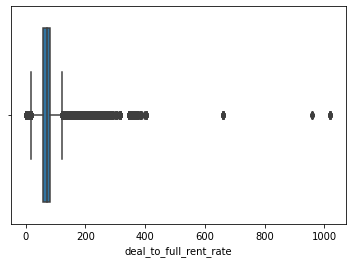

In [4]:
# 'deal_to_full_rent_rate'의 boxplot
sns.boxplot(data = df_train1, x = 'deal_to_full_rent_rate')
plt.show()

- 컬럼별로 이상치가 존재할 수 있음을 확인


>> 이전 전처리 과정 중에서 이상치를 고려를 안함 이상치들을 처리해야함

In [5]:
df_train1['deal_to_full_rent_rate'].describe()

count    7.200000e+06
mean     7.052581e+01
std      2.208217e+01
min      1.393728e+00
25%      5.755396e+01
50%      7.083334e+01
75%      8.301887e+01
max      1.020000e+03
Name: deal_to_full_rent_rate, dtype: float64

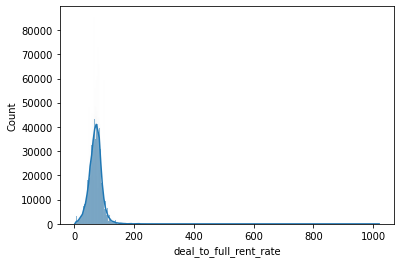

In [6]:
# 'deal_to_full_rent_rate'의 빈도수수들 파악
sns.histplot(data=df_train1, x='deal_to_full_rent_rate', kde=True)
plt.show()

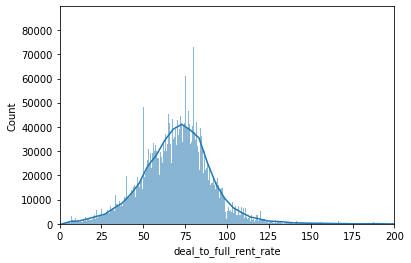

In [7]:
# 'deal_to_full_rent_rate'의 빈도수수들 파악2
import seaborn as sns
import matplotlib.pyplot as plt
# plot distplot
fig, ax = plt.subplots()
sns.histplot(data=df_train1, x='deal_to_full_rent_rate', kde=True, ax = ax)
 
# change the limits of X-axis
ax.set_xlim(0, 200)
plt.show()

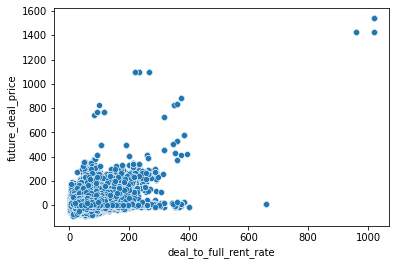

In [8]:
# 'deal_to_full_rent_rate' 와 'future_deal_price'의 비교1
import seaborn as sns
import matplotlib.pyplot as plt
# plot distplot
fig, ax = plt.subplots()
ax=sns.scatterplot(data=df_train1, x='deal_to_full_rent_rate', y='future_deal_price')
 

(0.0, 400.0)

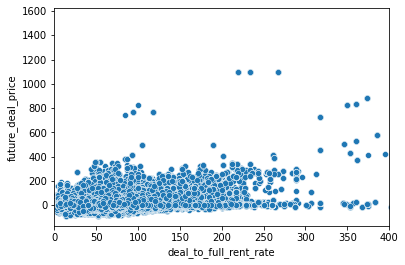

In [10]:
# 'deal_to_full_rent_rate' 와 'future_deal_price'의 비교2
import seaborn as sns
import matplotlib.pyplot as plt
# plot distplot
fig, ax = plt.subplots()
ax=sns.scatterplot(data=df_train1, x='deal_to_full_rent_rate', y='future_deal_price')
ax.set_xlim(0, 400)

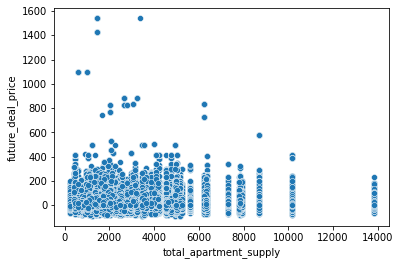

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# plot distplot
fig, ax = plt.subplots()
ax=sns.scatterplot(data=df_train1, x='total_apartment_supply', y='future_deal_price')